<a href="https://colab.research.google.com/github/hamidzangiabadi/sailfish-optimization-algorithm/blob/main/Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install ucimlrepo
# !pip install mealpy
# !pip install scikit-learn
!pip install uci-dataset

# import datasets

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
# iris = fetch_ucirepo(id=53) 
# breast_cancer = fetch_ucirepo(id=14)
# communities_and_crime = fetch_ucirepo(id=183) 
# zoo = fetch_ucirepo(id=111)
# automobile = fetch_ucirepo(id=10)
# lymphography = fetch_ucirepo(id=63)
# student_performance = fetch_ucirepo(id=320) 
# ionosphere = fetch_ucirepo(id=52)
# hepatitis = fetch_ucirepo(id=46) 
# letter_recognition = fetch_ucirepo(id=59)
# heart_disease = fetch_ucirepo(id=45) 
# tic_tac_toe_endgame = fetch_ucirepo(id=101) 
# cervical_cancer_behavior_risk = fetch_ucirepo(id=537) 
# connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151) 
# statlog_heart = fetch_ucirepo(id=145) 
# poker_hand = fetch_ucirepo(id=158) 
hepatitis = fetch_ucirepo(id=46) 

print("imported")

Datasets = [
            # { "name" : "Iris" , "dataset" : iris },
            # { "name" : "Breast Cancer" , "dataset" : breast_cancer },
            # { "name" : "Zoo" , "dataset" : zoo },
            # { "name" : "Automobile" , "dataset" : automobile },
#             { "name" : "Lymphography" , "dataset" : lymphography },
            # { "name" : "Student Performance" , "dataset" : student_performance },
            # { "name" : "Ionosphere" , "dataset" : ionosphere },
#             { "name" : "Cervical Cancer Behavior Risk" , "dataset" : cervical_cancer_behavior_risk },
            # { "name" : "Hepatitis" , "dataset" : hepatitis },
            # { "name" : "Communities and Crime" , "dataset" : communities_and_crime },
            # { "name" : "Letter Recognition" , "dataset" : letter_recognition },
            # { "name" : "Heart Disease" , "dataset" : heart_disease },
            # { "name" : "Tic-Tac-Toe Endgame" , "dataset" : tic_tac_toe_endgame },
#             { "name" : "Connectionist Bench" , "dataset" : connectionist_bench_sonar_mines_vs_rocks },
#             { "name" : "HeartEW", "dataset" : statlog_heart}
#               { "name" : "Poker Hand", "dataset" : poker_hand}
              { "name" : "Hepatitis", "dataset" : hepatitis}
           ]


dataset = hepatitis


imported


## Preprocessing



In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def encode_categorical_features(df):
    label_encoder = LabelEncoder()
    object_columns = df.select_dtypes(include=['object']).columns
    
    for column in object_columns:
        df[column + '_encoded'] = label_encoder.fit_transform(df[column])
    
    df.drop(columns=object_columns, inplace=True)

def preprocess_data(dataset):
    encode_categorical_features(dataset)
    encode_categorical_features(dataset)


preprocess_data(dataset.data.features)



data = pd.concat([dataset.data.features, dataset.data.targets], axis=1)
data.dropna(inplace=True)
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]
dataset.data.targets = y
dataset.data.features = X


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10380\135025821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=object_columns, inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_10380\135025821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=object_columns, inplace=True)


## Some required functions

In [3]:
import csv

def binary_conversion(X, dim):
    Xbin = np.zeros(dim)
    for d in range(dim):
        if X[d] > 0.5:
            Xbin[d] = 1
        else:
            Xbin[d] = 0

    return Xbin


def save_results(g_best, method_name, num_features,datasetName):
    
    selectedFeaturesSubset = binary_conversion(g_best.solution,num_features)
    featuresCount = int(sum(selectedFeaturesSubset))
    bestFitness = g_best.target.fitness
    
    print(f"Solution: {str(selectedFeaturesSubset)}, Fitness: {g_best.target.fitness}")
    print(f"No of features: {str(featuresCount)}")
    print(f"Reached accuracy: {str(checkAccuracy(selectedFeaturesSubset))}");
    
    acc = checkAccuracy(selectedFeaturesSubset)
    res = {
        "Method": method_name,
        "NumberOfFeatures": str(featuresCount),
        "Accuracy": acc,
        "Error":1-acc,
        "Fitness": bestFitness
    }
    # Save to CSV or any other preferred format
    # Example: Using pandas to save as CSV
    import pandas as pd
    df = pd.DataFrame([res])
    df.to_csv(f"{datasetName}_results.csv", mode='a', index=False, header=not pd.io.common.file_exists(f"{datasetName}_results.csv"))
    

## Evaluate the methods

In [4]:
import numpy as np
from mealpy import FloatVar, GA,SFO,WOA,EHO,GWO,DO,MVO,MFO
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


def checkAccuracy(features):
    max_feat = len(features)
    num_feat = np.sum(binary_conversion(features,num_features) == 1)
    if num_feat == 0 or num_feat == max_feat:
        return 1  

    targets = np.array(y).ravel()
    selected_features = binary_conversion(features,num_features);
    f =  X.iloc[:, selected_features == 1]
    X_train, X_test, y_train, y_test = train_test_split(f, targets, test_size=0.3)
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train.ravel())
    # Predict on test set
    y_pred = svm.predict(X_test)
    Ytest = np.array(y_test)
    num_valid = np.size(X_test, 0)
    yvalid  = Ytest.reshape(num_valid)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

def objective_function(features, X_train, X_test, y_train, y_test):
    max_feat = len(features)
    num_feat = np.sum(binary_conversion(features, num_features) == 1)
    
    # If no features or all features are selected, return a poor score
    if num_feat == 0 or num_feat == max_feat:
        return float('inf')  # Adjusted to return a poor score

    alpha = 0.6
    beta = 0.4

    selected_features = binary_conversion(features, X_train.shape[1])
    f_train = X_train.iloc[:, selected_features == 1]
    f_test = X_test.iloc[:, selected_features == 1]
    
    svm = SVC(kernel='linear')
    svm.fit(f_train, np.array(y_train).ravel())
    y_pred = svm.predict(f_test)

    accuracy = accuracy_score(y_test, y_pred)
    cost = (alpha * (1 - accuracy)) + (beta * (num_feat / max_feat))
    print(cost)
    return cost



for dataset in Datasets:
    X = dataset["dataset"].data.features
    y = dataset["dataset"].data.targets

    num_features = X.shape[1]
    search_space = np.array([0, 1] * num_features)

    lb = np.zeros(num_features)
    ub = np.ones(num_features)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
   
    
    problem_dict = {
    "bounds": FloatVar(lb=lb, ub=ub, ),
    "obj_func": lambda features: objective_function(features, X_train, X_test, y_train, y_test),
    "minmax": "min",
    }
    
    for i in range(10):
    
        SFOModel = SFO.OriginalSFO(epoch=30,pop_size=50, pp = 0.1, AP =4 ,epsilon = 0.01)
        g_best = SFOModel.solve(problem_dict)
        save_results(g_best,"SFO", num_features, dataset["name"])
        
        GAmodel = GA.BaseGA(epoch=30,pop_size=50,pc=0.7, pm=0.05)
        g_best = GAmodel.solve(problem_dict)
        save_results(g_best,"GA", num_features, dataset["name"])
        
        EHOModel = EHO.OriginalEHO(epoch=30,pop_size=50, alpha = 0.5, beta = 0.5, n_clans = 2)
        g_best = EHOModel.solve(problem_dict)
        save_results(g_best,"EHO", num_features, dataset["name"])

        GWOModel = GWO.OriginalGWO(epoch=30,pop_size=50)
        g_best = GWOModel.solve(problem_dict)
        save_results(g_best,"GWO", num_features, dataset["name"])

        WOAModel = WOA.OriginalWOA(epoch=30,pop_size=50)
        g_best = WOAModel.solve(problem_dict)
        save_results(g_best,"WOA", num_features, dataset["name"])

        MFOModel = MFO.OriginalMFO(epoch=30,pop_size=50)
        g_best = MFOModel.solve(problem_dict)
        save_results(g_best,"MFO", num_features, dataset["name"])


2024/05/22 02:21:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


0.29736842105263156
0.2644736842105263
0.2723684210526316
0.31447368421052635
0.2684210526315789
0.3355263157894737
0.3315789473684211
0.3855263157894736
0.3013157894736842
0.3394736842105263
0.4697368421052631
0.3434210526315789
0.2855263157894737
0.42763157894736836
0.2723684210526316
0.3934210526315789
0.40657894736842104
0.29736842105263156
0.3223684210526315
0.3855263157894736
0.3605263157894737
0.23026315789473686
0.37763157894736843
0.3815789473684211
0.2644736842105263
0.3644736842105263
0.40657894736842104
0.31447368421052635
0.3223684210526315
0.3223684210526315
0.31447368421052635
0.3855263157894736
0.2894736842105263
0.31842105263157894
0.3315789473684211
0.4236842105263158
0.3394736842105263
0.40657894736842104
0.3855263157894736
0.3644736842105263
0.2684210526315789
0.3526315789473684
0.3434210526315789
0.37763157894736843
0.37763157894736843
0.24342105263157893
0.3565789473684211
0.3565789473684211
0.2894736842105263
0.40263157894736845
0.3605263157894737
0.4065789473684

0.3315789473684211
0.3565789473684211
0.3644736842105263
0.2684210526315789
0.3855263157894736
0.4447368421052631
0.3394736842105263
0.3947368421052631
0.32763157894736844
0.18026315789473685
0.40263157894736845
0.3394736842105263
0.29736842105263156
0.41578947368421054
0.3907894736842106
0.3644736842105263
0.3394736842105263
0.2894736842105263
0.29342105263157897
0.3736842105263158
0.4486842105263158
0.31447368421052635
0.2263157894736842
0.3394736842105263
0.22236842105263155
0.3644736842105263
0.3605263157894737
0.3434210526315789
0.18421052631578944
0.3644736842105263
0.4236842105263158
0.3315789473684211
0.3013157894736842
0.3855263157894736
0.31052631578947365
0.22236842105263155
0.3605263157894737
0.3565789473684211
0.2855263157894737
0.2684210526315789
0.3565789473684211
0.40657894736842104
0.3526315789473684
0.37763157894736843
0.3644736842105263
0.3565789473684211
0.3315789473684211
0.2684210526315789
0.42763157894736836
0.3644736842105263
0.37763157894736843
0.32236842105263

2024/05/22 02:21:26 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.27380 seconds


0.3315789473684211
0.31842105263157894
0.3736842105263158
0.31842105263157894
0.3565789473684211
0.3526315789473684
0.2684210526315789
0.2763157894736842
0.2723684210526316
0.31052631578947365
0.3355263157894737
0.2263157894736842
0.2723684210526316
0.3315789473684211
0.2263157894736842
0.31052631578947365
0.37763157894736843
0.2723684210526316
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.2894736842105263
0.37763157894736843
0.2263157894736842
0.2894736842105263
0.2263157894736842
0.37763157894736843
0.2263157894736842
0.2894736842105263
0.2263157894736842
0.2263157894736842
0.4236842105263158
0.4447368421052631
0.2894736842105263
0.20526315789473681
0.2684210526315789
0.20526315789473681
0.23815789473684207
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.3355263157894737
0.18421052631578944
0.48289473684210527
0.2894736842105263
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2894736842105

2024/05/22 02:21:28 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.48709 seconds


0.3815789473684211
0.3355263157894737
0.22236842105263155
0.24342105263157893
0.24342105263157893
0.3855263157894736
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24342105263157893
0.2263157894736842
0.24342105263157893
0.24342105263157893
0.2263157894736842
0.24342105263157893
0.24342105263157893
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.24342105263157893
0.20526315789473681
0.2263157894736842
0.24342105263157893
0.2263157894736842
0.24342105263157893
0.2263157894736842
0.2263157894736842
0.31447368421052635
0.2263157894736842
0.2263157894736842
0.24342105263157893
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.31447368421052635
0.3434210526315789
0.22236842105263155
0.24342105263157893
0.24342105263157893
0.24342105263157893
0.18421052631578944
0.24736842105263154
0.22236842105263155
0.

2024/05/22 02:21:29 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.45707 seconds


0.3644736842105263
0.40657894736842104
0.2263157894736842
0.40263157894736845
0.24736842105263154
0.40263157894736845
0.20526315789473681
0.2723684210526316
0.2263157894736842
0.2723684210526316
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2723684210526316
0.2263157894736842
0.2723684210526316
0.2263157894736842
0.2723684210526316
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2723684210526316
0.2263157894736842
0.18421052631578944
0.2723684210526316
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.3605263157894737
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.2723684210526316
0.2263157894736842
0.2263157894736842
0.2723684210526316
0.2723684210526316
0.20526315789473681
0.2723684210526316
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.2723684210526316
0.37763157894736843
0.2723684210526

2024/05/22 02:21:30 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.99630 seconds


0.24342105263157893
0.1381578947368421
0.18421052631578944
0.17631578947368423
0.22236842105263155
0.1381578947368421
0.15526315789473685
0.31052631578947365
0.15526315789473685
0.18421052631578944
0.5039473684210527
0.16710526315789476
0.2092105263157895
0.4447368421052631
0.20131578947368423
0.19736842105263158
0.5078947368421053
0.18421052631578944
0.24342105263157893
0.17631578947368423
0.31052631578947365
0.1381578947368421
0.24736842105263154
0.46578947368421053
0.4197368421052632
0.17631578947368423
0.31052631578947365
0.12105263157894734
0.15526315789473685
0.22236842105263155
0.15526315789473685
0.12105263157894734
0.17631578947368423
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.24342105263157893
0.18421052631578944
0.31447368421052635
0.24736842105263154


2024/05/22 02:21:31 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.81931 seconds


0.3434210526315789
0.3394736842105263
0.40263157894736845
0.2894736842105263
0.2894736842105263
0.31447368421052635
0.5289473684210526
0.18421052631578944
0.24342105263157893
0.1381578947368421
0.23947368421052634
0.3736842105263158
0.22236842105263155
0.20131578947368423
0.3947368421052631
0.16710526315789476
0.2092105263157895
0.2092105263157895
0.23947368421052634
0.22236842105263155
0.5078947368421053
0.17631578947368423
0.24342105263157893
0.17631578947368423
0.22236842105263155
0.40263157894736845
0.25131578947368427
0.39868421052631586
0.24342105263157893
0.12105263157894734
0.3526315789473684
0.2815789473684211
0.15526315789473685
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.17631578947368423
0.15526315789473685
0.18421052631578944
0.1381578947368421
0.17631578947368423
0.17631578947368423
0.18421052631578944
0.17631578947368423
0.12105263157894734
0.3815789473684211


2024/05/22 02:21:32 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.71533 seconds


0.3434210526315789
0.2263157894736842
0.3815789473684211
0.3434210526315789
0.24736842105263154
0.31447368421052635
0.3605263157894737
0.3394736842105263
0.3394736842105263
0.4236842105263158
0.37763157894736843
0.37763157894736843
0.3855263157894736
0.18421052631578944
0.18421052631578944
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2684210526315789
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.1421052631578947
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.12105263157894734
0.2263157894736842
0.20526315789473681
0.2644736842105263
0.31842105263157894
0.12105263157894734
0.2263157894736842
0.3355263157894737
0.2263157894736842
0.2263157894736842
0.16315789473684209
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.2684210526315789
0.2263157

2024/05/22 02:21:32 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.71141 seconds


0.2684210526315789
0.3855263157894736
0.40657894736842104
0.42763157894736836
0.29736842105263156
0.3013157894736842
0.15526315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2684210526315789
0.17631578947368423
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.15526315789473685
0.39868421052631586
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.17631578947368423
0.24342105263157893
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.24342105263157893
0.15526315789473685
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3855263157894736
0.3223684210526315
0.31447368421052635
0.4236842105263158
0.42763157894736836


2024/05/22 02:21:33 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.51479 seconds


0.3855263157894736
0.3815789473684211
0.40657894736842104
0.4447368421052631
0.39868421052631586
0.3605263157894737
0.31447368421052635
0.15526315789473685
0.18421052631578944
0.22236842105263155
0.18421052631578944
0.1381578947368421
0.18421052631578944
0.22236842105263155
0.22236842105263155
0.1381578947368421
0.3355263157894737
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.15526315789473685
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.15526315789473685
0.24342105263157893
0.1381578947368421
0.12105263157894734
0.22236842105263155
0.15526315789473685
0.15526315789473685
0.1381578947368421
0.24342105263157893
0.22236842105263155
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.22236842105263155
0.12105263157894734
0.1381578947368421
0.15526315789473685
0.1421052631578947
0.18421052631578944
0.15526315789473685
0.12105263157894734
0.348684210526

2024/05/22 02:21:33 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.59162 seconds


0.29736842105263156
0.2263157894736842
0.1381578947368421
0.12105263157894734
0.17631578947368423
0.18421052631578944
0.12105263157894734
0.15526315789473685
0.24736842105263154
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.15526315789473685
0.15526315789473685
0.2263157894736842
0.24736842105263154
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.23947368421052634
0.1381578947368421
0.15526315789473685
0.18421052631578944
0.22236842105263155
0.1381578947368421
0.17631578947368423
0.17631578947368423
0.1381578947368421
0.22236842105263155
0.18421052631578944
0.12105263157894734
0.22236842105263155
0.24342105263157893
0.1381578947368421
0.1381578947368421
0.24342105263157893
0.15526315789473685
0.15526315789473685
0.12105263157894734
0.22236842105263155
0.1381578947368421
0.17631578947368423
0.17631578947368423
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1552631578

2024/05/22 02:21:34 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44994 seconds


0.3223684210526315
0.24736842105263154
0.3565789473684211
0.29342105263157897
0.3394736842105263
0.3526315789473684
0.2684210526315789
0.24342105263157893
0.40657894736842104
0.1381578947368421
0.22236842105263155
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1381578947368421
0.2263157894736842
0.24342105263157893
0.12105263157894734
0.1381578947368421
0.18421052631578944
0.15921052631578947
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1381578947368421
0.17631578947368423
0.12105263157894734
0.18421052631578944
0.1381578947368421
0.18421052631578944
0.17631578947368423
0.18421052631578944
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.24342105263157893
0.17631578947368423
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.18421052631578944
0.1381578947368421
0.1381578947368421
0.121052631578947

2024/05/22 02:21:34 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43071 seconds


0.24342105263157893
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.45789473684210524
0.3355263157894737
0.3815789473684211
0.18421052631578944
0.12105263157894734
0.17631578947368423
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.15526315789473685
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.18421052631578944
0.15526315789473685


2024/05/22 02:21:35 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27502 seconds


0.24342105263157893
0.22236842105263155
0.15526315789473685
0.18421052631578944
0.1381578947368421
0.24342105263157893
0.15526315789473685
0.12105263157894734
0.15526315789473685
0.17631578947368423
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.15526315789473685
0.24342105263157893
0.17631578947368423
0.17631578947368423
0.24342105263157893
0.15526315789473685
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.4197368421052632
0.1342105263157895
0.24342105263157893
0.12105263157894734
0.15526315789473685
0.1381578947368421
0.15526315789473685
0.12105263157894734
0.24342105263157893
0.17631578947368423
0.15526315789473685
0.12105263157894734
0.1210

2024/05/22 02:21:35 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33473 seconds


0.1381578947368421
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.15526315789473685
0.15526315789473685
0.12105263157894734
0.18421052631578944
0.15526315789473685
0.24342105263157893
0.15526315789473685
0.12105263157894734
0.1381578947368421
0.23947368421052634
0.15526315789473685
0.23947368421052634
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.22236842105263155
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.17631578947368423
0.15526315789473685
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.15526315789473685
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.18421052631578944


2024/05/22 02:21:35 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25741 seconds


0.15526315789473685
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.15526315789473685
0.12105263157894734
0.15526315789473685
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.12105263157894734
0.17631578947368423
0.24342105263157893
0.24342105263157893
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24342105263157893
0.1421052631578947
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.17631578947368423
0.121052

2024/05/22 02:21:35 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29462 seconds


0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.15526315789473685
0.4197368421052632
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.24342105263157893
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.18421052631578944
0.17631578947368423
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.22236842105263155
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.22236842105263155
0.18421052631578944


2024/05/22 02:21:36 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24887 seconds


0.24342105263157893
0.23947368421052634
0.24342105263157893
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.24342105263157893
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.24342105263157893
0.1381578947368421
0.12105263157894734
0.18421052631578944
0.22236842105263155
0.15526315789473685
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.24342105263157893
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.24342105263157893
0.15526315789473685
0.22236842105263155
0.22236842105263155
0.18421052631578944
0.17631578947368423
0.23947368421052634
0.1381578947368421


2024/05/22 02:21:36 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27973 seconds


0.22236842105263155
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.18421052631578944
0.1381578947368421
0.24342105263157893
0.18421052631578944
0.18421052631578944
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.17631578947368423
0.12105263157894734
0.1421052631578947
0.17631578947368423
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.17631578947368423
0.12105263157894734


2024/05/22 02:21:36 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23678 seconds


0.12105263157894734
0.15526315789473685
0.18421052631578944
0.18421052631578944
0.17631578947368423
0.1381578947368421
0.17631578947368423
0.12105263157894734
0.15526315789473685
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.23947368421052634
0.24342105263157893
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.17631578947368423
0.15526315789473685
0.18421052631578944
0.2263157894736842
0.15526315789473685
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.12105263157894734


2024/05/22 02:21:36 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32425 seconds


0.15526315789473685
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.24342105263157893
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.15526315789473685
0.18421052631578944
0.24342105263157893
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.22236842105263155
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.17631578947368423
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.17631578947368423
0.12105263157894734
0.18421052631578944
0.1381578947368421
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.22236842105263155
0.12105263157894734
0.184210

2024/05/22 02:21:37 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31077 seconds


0.1381578947368421
0.18421052631578944
0.17631578947368423
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.22236842105263155
0.15526315789473685
0.17631578947368423
0.12105263157894734
0.24342105263157893
0.24342105263157893
0.18421052631578944
0.15526315789473685
0.23947368421052634
0.18421052631578944
0.12105263157894734
0.15526315789473685
0.24342105263157893
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.24342105263157893
0.1381578947368421
0.15526315789473685
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24342105263157893
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.22236842105263155
0.17631578947368423
0.12105263157894734
0.18421052631578944
0.15526315789473685
0.2

2024/05/22 02:21:37 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42102 seconds


0.24342105263157893
0.12105263157894734
0.18421052631578944
0.15526315789473685
0.24342105263157893
0.18421052631578944
0.23947368421052634
0.22236842105263155
0.12105263157894734
0.1381578947368421
0.22236842105263155
0.23947368421052634
0.12105263157894734
0.18421052631578944
0.24342105263157893
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.15526315789473685
0.22236842105263155
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.22236842105263155
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.15526315789473685
0.1381578947368421
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.17631578947368423
0.12105

2024/05/22 02:21:38 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34677 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.17631578947368423
0.12105263157894734
0.24342105263157893
0.15526315789473685
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.24342105263157893
0.15526315789473685
0.22236842105263155
0.15526315789473685
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.17631578947368423
0.22236842105263155
0.18421052631578944
0.22236842105263155
0.12105263157894734
0.1381578947368421


2024/05/22 02:21:38 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.36953 seconds


0.18421052631578944
0.15526315789473685
0.24342105263157893
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.18421052631578944
0.17631578947368423
0.23947368421052634
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.22236842105263155
0.18421052631578944
0.17631578947368423
0.24342105263157893
0.22236842105263155
0.24342105263157893
0.17631578947368423
0.15526315789473685
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.15526315789473685
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.24342105263157893
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.155

2024/05/22 02:21:38 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41686 seconds


0.24342105263157893
0.12105263157894734
0.17631578947368423
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.15526315789473685
0.1381578947368421
0.12105263157894734
0.22236842105263155
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1381578947368421
0.1381578947368421
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.17631578947368423
0.24342105263157893
0.23947368421052634
0.23947368421052634
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:21:39 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38869 seconds


0.1381578947368421
0.12105263157894734
0.17631578947368423
0.12105263157894734
0.24342105263157893
0.12105263157894734
0.24342105263157893
0.1381578947368421
0.22236842105263155
0.24342105263157893
0.1381578947368421
0.12105263157894734
0.15526315789473685
0.17631578947368423
0.15526315789473685
0.24342105263157893
0.15526315789473685
0.24342105263157893
0.17631578947368423
0.18421052631578944
0.18421052631578944
0.15526315789473685
0.17631578947368423
0.15526315789473685
0.12105263157894734
0.24342105263157893
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.17631578947368423
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.17631578947368423
0.17631578947368423
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24342105263157893
0.18421052631578944
0.12105263157894734
0.24342105263157893
0.12105263157894734
0.184

2024/05/22 02:21:39 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.51340 seconds


0.15526315789473685
0.18421052631578944
0.17631578947368423
0.15526315789473685
0.12105263157894734
0.18421052631578944
0.24342105263157893
0.24342105263157893
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.1381578947368421
0.1381578947368421
0.24342105263157893
0.12105263157894734
0.18421052631578944
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.22236842105263155
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.1381578947368421
0.24342105263157893
0.24342105263157893
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.23947368421052634
0.15526315789473685
0.18421052631578944
0.24342105263157893
0.15526315789473685
0.12105263157894734
0.24342105263157893
0.12105263157894734
0.15526315789473685
0.24342105263157893
0.18421052631578944
0.12

2024/05/22 02:21:40 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.49731 seconds


0.18421052631578944
0.15526315789473685
0.1381578947368421
0.17631578947368423
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.15526315789473685
0.17631578947368423
0.12105263157894734
0.12105263157894734
0.17631578947368423
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.24342105263157893
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.15526315789473685
0.17631578947368423
0.1381578947368421
0.18421052631578944
0.15526315789473685
0.15526315789473685
0.1381578947368421
0.18421052631578944
0.1421052631578947
0.24342105263157893
0.12105263157894734
0.15526315789473685
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.24342105263157893
0.18421052631578944
0.12105263157894734
0.23947368421052634
0.15526315789473685
0.1210

2024/05/22 02:21:40 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.63929 seconds


0.15526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.17631578947368423
0.17631578947368423
0.12105263157894734
0.1381578947368421
0.17631578947368423
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.15526315789473685
0.17631578947368423
0.24342105263157893
0.12105263157894734
0.1381578947368421
0.17631578947368423
0.23947368421052634
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.17631578947368423
0.15526315789473685
0.15526315789473685
0.22236842105263155
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.15526315789473685
0.18421052631578944
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.24342105263157893
0.17631578947368423
0.1381

2024/05/22 02:21:41 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.58494 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.17631578947368423
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.17631578947368423
0.15526315789473685
0.15526315789473685
0.12105263157894734
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.15526315789473685
0.12105263157894734
0.18421052631578944
0.15526315789473685
0.18421052631578944
0.24342105263157893
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.22236842105263155
0.12105263157894734
0.17631578947368423
0.12105263157894734
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.22236842105263155
0.12105263157894734
0.22236842105263155
0.18421052631578944
0.1381578947368421
0.1381578947368421
0.17631578947368423
0.1381578947368421
0.15526315789473685
0.22236842105263155
0.12105263157894734
0.17631578947368423
0.12105263157894734
0.18421052631578944
0.24342105263157893
0.15526315789473685
0.18421

2024/05/22 02:21:42 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.65554 seconds
2024/05/22 02:21:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


0.1381578947368421
0.17631578947368423
0.24342105263157893
0.22236842105263155
0.12105263157894734
0.22236842105263155
0.24342105263157893
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.17631578947368423
0.18421052631578944
0.23947368421052634
0.1381578947368421
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24342105263157893
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.24342105263157893
0.17631578947368423
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.3605263157894737
0.4447368421052631
0.4447368421052631
0.31447368421052635
0.3565789473684211
0.29736842105263156
0.31052631578947365
0.2644736842105263
0.2894736842105263
0.3394736842105263
0.3815789473684211
0.3605263157894737
0.42763157894736836
0.314473684210526

2024/05/22 02:21:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.85922 seconds


0.29736842105263156
0.18421052631578944
0.31447368421052635
0.20526315789473681
0.24736842105263154
0.23947368421052634
0.20526315789473681
0.20526315789473681
0.24342105263157893
0.20526315789473681
0.18026315789473685
0.2263157894736842
0.2263157894736842
0.24342105263157893
0.2605263157894737
0.17631578947368423
0.16315789473684209
0.23026315789473686
0.2723684210526316
0.22236842105263155
0.18421052631578944
0.2263157894736842
0.19736842105263158
0.24736842105263154
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.2684210526315789
0.23421052631578948
0.2684210526315789
0.20526315789473681
0.24736842105263154
0.16315789473684209
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2684210526315789
0.22236842105263155
0.24736842105263154
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.2263157894736842


2024/05/22 02:21:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.12705 seconds


0.18421052631578944
0.2263157894736842
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.15526315789473685
0.20526315789473681
0.16315789473684209
0.28026315789473677
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.2263157894736842
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.15921052631578947
0.1421052631578947
0.18421052631578944
0.23026315789473686
0.1421052631578947
0.15526315789473685
0.18421052631578944
0.24736842105263154
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.18421052631578944
0.2092105263157895
0.22236842105263155
0.16315789473684209
0.18026315789473685
0.18421052631578944
0.16315789473684209


2024/05/22 02:21:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.14074 seconds


0.1421052631578947
0.15526315789473685
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.15921052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.17631578947368423
0.16710526315789476
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.23815789473684207
0.15921052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.2263157894736842
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.25131578947368427
0.18421052631578944
0.15921052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:21:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.36191 seconds


0.16315789473684209
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.1421052631578947
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2092105263157895
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23421052631578948
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:21:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24719 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16710526315789476
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:21:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24033 seconds


0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.28026315789473677
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:21:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28152 seconds


0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:21:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47527 seconds


0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:21:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42090 seconds


0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:21:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19833 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.24210526315789474
0.12105263157894734
0.26315789473684215
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.1421052631578947


2024/05/22 02:21:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25243 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.24210526315789474
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.24210526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.24210526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263

2024/05/22 02:21:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.49989 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:21:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22323 seconds


0.12105263157894734
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734


2024/05/22 02:21:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20613 seconds


0.12105263157894734
0.2131578947368421
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.1421052631578947
0.24210526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.18815789473684214
0.11710526315789474
0.2171052631578947
0.26315789473684215
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.24210526315789474
0.23815789473684207
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:21:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24123 seconds


0.11710526315789474
0.11710526315789474
0.23815789473684207
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18815789473684214
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421


2024/05/22 02:21:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24162 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.2092105263157895
0.11710526315789474
0.15921052631578947
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.18815789473684214


2024/05/22 02:21:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25297 seconds


0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.2092105263157895
0.11710526315789474
0.16315789473684209
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.15921052631578947
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421


2024/05/22 02:21:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24075 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.23421052631578948
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.25921052631578945
0.23815789473684207
0.11710526315789474
0.1171

2024/05/22 02:21:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26069 seconds


0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.25921052631578945
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.23815789473684207
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421


2024/05/22 02:21:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23361 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.25921052631578945
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.23815789473684207
0.11710526315789474
0.23815789473684207
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947


2024/05/22 02:21:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23921 seconds


0.11710526315789474
0.16315789473684209
0.18815789473684214
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:21:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24199 seconds


0.16315789473684209
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474


2024/05/22 02:21:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26945 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23421052631578948
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.25921052631578945
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.2171052631578947
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1171

2024/05/22 02:21:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27307 seconds


0.1381578947368421
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18026315789473685
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:21:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25052 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:21:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23749 seconds


0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:21:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22016 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.15921052631578947
0.16315789473684209
0.1381578947368421
0.2092105263157895
0.18815789473684214
0.2092105263157895
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421


2024/05/22 02:21:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26708 seconds


0.1381578947368421
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18421052631578944


2024/05/22 02:21:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24648 seconds


0.16315789473684209
0.2092105263157895
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.23421052631578948
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421


2024/05/22 02:21:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23108 seconds


0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.2171052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.16710526315789476
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2


2024/05/22 02:21:53 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


Reached accuracy: 0.875
0.31052631578947365
0.3855263157894736
0.3434210526315789
0.31052631578947365
0.24736842105263154
0.3434210526315789
0.4236842105263158
0.40263157894736845
0.4197368421052632
0.3434210526315789
0.18421052631578944
0.3434210526315789
0.37763157894736843
0.4236842105263158
0.3605263157894737
0.3815789473684211
0.29342105263157897
0.31052631578947365
0.42763157894736836
0.40657894736842104
0.3315789473684211
0.28026315789473677
0.29342105263157897
0.3815789473684211
0.4236842105263158
0.4236842105263158
0.3394736842105263
0.3565789473684211
0.40657894736842104
0.25921052631578945
0.40263157894736845
0.3394736842105263
0.29736842105263156
0.2644736842105263
0.23026315789473686
0.29342105263157897
0.39868421052631586
0.2644736842105263
0.39868421052631586
0.3355263157894737
0.42763157894736836
0.2684210526315789
0.31052631578947365
0.42763157894736836
0.31842105263157894
0.30657894736842106
0.3855263157894736
0.24736842105263154
0.3815789473684211
0.39868421052631586

2024/05/22 02:21:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 2.05358 seconds


0.3223684210526315
0.30657894736842106
0.3644736842105263
0.24736842105263154
0.2894736842105263
0.3947368421052631
0.29736842105263156
0.3355263157894737
0.24736842105263154
0.3013157894736842
0.2263157894736842
0.20526315789473681
0.28026315789473677
0.24736842105263154
0.3315789473684211
0.3315789473684211
0.3434210526315789
0.31447368421052635
0.29736842105263156
0.20526315789473681
0.3013157894736842
0.3355263157894737
0.3605263157894737
0.2684210526315789
0.37763157894736843
0.4236842105263158
0.3644736842105263
0.3394736842105263
0.2894736842105263
0.3605263157894737
0.4197368421052632
0.39868421052631586
0.3355263157894737
0.23026315789473686
0.22236842105263155
0.29736842105263156
0.2723684210526316
0.3013157894736842
0.2644736842105263
0.2723684210526316
0.3434210526315789
0.29736842105263156
0.3815789473684211
0.3315789473684211
0.31842105263157894
0.3013157894736842
0.3355263157894737
0.3394736842105263
0.3394736842105263


2024/05/22 02:21:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.12396 seconds


0.3526315789473684
0.3605263157894737
0.31842105263157894
0.3855263157894736
0.28026315789473677
0.4236842105263158
0.39868421052631586
0.24736842105263154
0.31842105263157894
0.4197368421052632
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.28026315789473677
0.24736842105263154
0.18421052631578944
0.28026315789473677
0.2894736842105263
0.29736842105263156
0.3223684210526315
0.31052631578947365
0.3315789473684211
0.29342105263157897
0.3223684210526315
0.2894736842105263
0.3355263157894737
0.3394736842105263
0.3394736842105263
0.3434210526315789
0.20526315789473681
0.37763157894736843
0.3605263157894737
0.3355263157894737
0.2723684210526316
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.2723684210526316
0.2684210526315789
0.28026315789473677
0.24342105263157893
0.2723684210526316
0.28026315789473677
0.2894736842105263
0.29736842105263156
0.29736842105263156
0.30657894736842106
0.31052631578947365
0.31842105263157894
0.29736842105263156
0.3355263157894737
0.3

2024/05/22 02:22:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.49591 seconds


0.42763157894736836
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.28026315789473677
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.25131578947368427
0.2723684210526316
0.2263157894736842
0.20526315789473681
0.3013157894736842
0.31052631578947365
0.31842105263157894
0.3434210526315789
0.3355263157894737
0.2263157894736842
0.3394736842105263
0.20526315789473681
0.16315789473684209
0.30526315789473685
0.25921052631578945
0.29736842105263156
0.23026315789473686
0.3223684210526315
0.25131578947368427
0.24736842105263154
0.2684210526315789
0.3013157894736842
0.2723684210526316
0.2763157894736842
0.2894736842105263
0.29736842105263156
0.20526315789473681
0.29736842105263156
0.3815789473684211
0.31052631578947365
0.31842105263157894
0.31842105263157894
0.3394736842105263
0.3394736842105263
0.31052631578947365
0.3644736842105263
0.3855263157894736
0.37763157894736843
0.3815789473684211


2024/05/22 02:22:01 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.34455 seconds


0.3394736842105263
0.3526315789473684
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.3013157894736842
0.18421052631578944
0.25921052631578945
0.31842105263157894
0.3013157894736842
0.30526315789473685
0.31052631578947365
0.3394736842105263
0.3434210526315789
0.29342105263157897
0.3394736842105263
0.2092105263157895
0.2723684210526316
0.23026315789473686
0.29736842105263156
0.3013157894736842
0.24736842105263154
0.2263157894736842
0.3013157894736842
0.2723684210526316
0.2763157894736842
0.2894736842105263
0.3013157894736842
0.2763157894736842
0.3815789473684211
0.31052631578947365
0.2723684210526316
0.31842105263157894
0.31842105263157894
0.3394736842105263
0.3815789473684211
0.3434210526315789


2024/05/22 02:22:03 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 2.22100 seconds


0.40657894736842104
0.3605263157894737
0.31052631578947365
0.2894736842105263
0.4447368421052631
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.3223684210526315
0.25921052631578945
0.31842105263157894
0.29342105263157897
0.2763157894736842
0.30526315789473685
0.31052631578947365
0.3394736842105263
0.3434210526315789
0.2894736842105263
0.2092105263157895
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.31842105263157894
0.23026315789473686
0.29342105263157897
0.3013157894736842
0.2723684210526316
0.20526315789473681
0.2763157894736842
0.2763157894736842
0.2894736842105263
0.29736842105263156
0.3815789473684211
0.3605263157894737
0.29342105263157897
0.31842105263157894
0.31842105263157894
0.3394736842105263
0.3815789473684211
0.3394736842105263
0.

2024/05/22 02:22:05 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.73982 seconds


0.31052631578947365
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.28026315789473677
0.25921052631578945
0.2723684210526316
0.2763157894736842
0.2894736842105263
0.29342105263157897
0.18421052631578944
0.3315789473684211
0.3394736842105263
0.42763157894736836
0.20526315789473681
0.2092105263157895
0.2263157894736842
0.24736842105263154
0.23026315789473686
0.2763157894736842
0.2723684210526316
0.29342105263157897
0.25921052631578945
0.2723684210526316
0.2723684210526316
0.2763157894736842
0.25526315789473686
0.3644736842105263
0.2723684210526316
0.3013157894736842


2024/05/22 02:22:07 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.76792 seconds


0.3815789473684211
0.31052631578947365
0.31842105263157894
0.31842105263157894
0.3394736842105263
0.3815789473684211
0.3394736842105263
0.31052631578947365
0.3355263157894737
0.3355263157894737
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.3013157894736842
0.25921052631578945
0.2723684210526316
0.3223684210526315
0.2894736842105263
0.29342105263157897
0.31052631578947365
0.3394736842105263
0.3355263157894737
0.20526315789473681
0.2092105263157895
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.3013157894736842
0.31842105263157894
0.29342105263157897
0.25526315789473686
0.25921052631578945
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2763157894736842
0.3644736842105263
0.29736842105263156


2024/05/22 02:22:08 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.64067 seconds


0.3815789473684211
0.31052631578947365
0.31052631578947365
0.31842105263157894
0.29736842105263156
0.3394736842105263
0.3815789473684211
0.3605263157894737
0.29342105263157897
0.2684210526315789
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.25131578947368427
0.25921052631578945
0.2723684210526316
0.3223684210526315
0.2894736842105263
0.2723684210526316
0.31052631578947365
0.3315789473684211
0.31447368421052635
0.20526315789473681
0.2092105263157895
0.22236842105263155
0.2723684210526316
0.23026315789473686
0.2763157894736842
0.22236842105263155
0.24736842105263154
0.25526315789473686
0.3013157894736842
0.29736842105263156
0.2723684210526316
0.2723684210526316
0.2763157894736842
0.2894736842105263
0.29736842105263156
0.29736842105263156

2024/05/22 02:22:10 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.30827 seconds


0.31052631578947365
0.31842105263157894
0.3565789473684211
0.3394736842105263
0.20131578947368423
0.39868421052631586
0.31052631578947365
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.3013157894736842
0.25921052631578945
0.31842105263157894
0.2723684210526316
0.3223684210526315
0.2894736842105263
0.31447368421052635
0.31052631578947365
0.39868421052631586
0.25131578947368427
0.25131578947368427
0.2092105263157895
0.15921052631578947
0.22236842105263155
0.22236842105263155
0.25131578947368427
0.2263157894736842
0.24736842105263154
0.2092105263157895
0.28026315789473677
0.2723684210526316
0.25131578947368427
0.2723684210526316
0.2092105263157895
0.2894736842105263
0.31842105263157894
0.23026315789473686
0.2894736842105263
0.3105263157894

2024/05/22 02:22:11 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.17249 seconds


0.3605263157894737
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.25131578947368427
0.25921052631578945
0.31842105263157894
0.2723684210526316
0.2763157894736842
0.2894736842105263
0.2723684210526316
0.31052631578947365
0.28026315789473677
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.2092105263157895
0.2092105263157895
0.2092105263157895
0.18421052631578944
0.22236842105263155
0.18421052631578944
0.23026315789473686
0.23026315789473686
0.29342105263157897
0.20131578947368423
0.25921052631578945
0.2723684210526316
0.2684210526315789
0.29342105263157897
0.2684210526315789
0.31842105263157894
0.31052631578947365
0.31052631578947365
0.31052631578947365
0.31842105263157894
0.3605263157894737


2024/05/22 02:22:12 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.34528 seconds


0.24736842105263154
0.40263157894736845
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.3013157894736842
0.25526315789473686
0.31842105263157894
0.2263157894736842
0.25131578947368427
0.3223684210526315
0.2763157894736842
0.2894736842105263
0.24736842105263154
0.20526315789473681
0.20526315789473681
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.25131578947368427
0.25131578947368427
0.25131578947368427
0.22236842105263155
0.23026315789473686
0.23026315789473686
0.24736842105263154
0.28026315789473677
0.24736842105263154
0.22236842105263155
0.2723684210526316
0.2894736842105263
0.2723684210526316
0.2894736842105263
0.31052631578947365
0.31052631578947365
0.31842105263157894


2024/05/22 02:22:14 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.22084 seconds


0.40263157894736845
0.31447368421052635
0.24736842105263154
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.3013157894736842
0.2684210526315789
0.25131578947368427
0.25921052631578945
0.3223684210526315
0.3223684210526315
0.23026315789473686
0.31447368421052635
0.20131578947368423
0.20526315789473681
0.20131578947368423
0.2263157894736842
0.25131578947368427
0.20526315789473681
0.23026315789473686
0.24736842105263154
0.2092105263157895
0.22236842105263155
0.22236842105263155
0.23026315789473686
0.25131578947368427
0.29342105263157897
0.24736842105263154
0.25921052631578945
0.2723684210526316
0.31842105263157894
0.29342105263157897
0.24342105263157893
0.2684210526315789
0.31052631578947365
0.31842105263157894
0.2473684

2024/05/22 02:22:15 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.02245 seconds


0.31842105263157894
0.25526315789473686
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2092105263157895
0.3013157894736842
0.24736842105263154
0.23026315789473686
0.25921052631578945
0.2723684210526316
0.2763157894736842
0.31842105263157894
0.18421052631578944
0.20526315789473681
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2092105263157895
0.2092105263157895
0.2092105263157895
0.22236842105263155
0.22236842105263155
0.23026315789473686
0.23026315789473686
0.20131578947368423
0.29342105263157897


2024/05/22 02:22:15 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.88066 seconds


0.24736842105263154
0.24736842105263154
0.28026315789473677
0.24342105263157893
0.2723684210526316
0.2723684210526316
0.29342105263157897
0.31052631578947365
0.23421052631578948
0.2684210526315789
0.3355263157894737
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2092105263157895
0.23026315789473686
0.3013157894736842
0.2684210526315789
0.25921052631578945
0.31842105263157894
0.3223684210526315
0.2684210526315789
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.25131578947368427
0.24736842105263154
0.25131578947368427
0.18026315789473685
0.24342105263157893
0.25131578947368427
0.23026315789473686
0.23026315789473686
0.218421052

2024/05/22 02:22:17 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.07408 seconds


0.2263157894736842
0.25921052631578945
0.2723684210526316
0.31842105263157894
0.29342105263157897
0.3355263157894737
0.31052631578947365
0.40657894736842104
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.23026315789473686
0.24736842105263154
0.29342105263157897
0.25921052631578945
0.2684210526315789
0.2723684210526316
0.2684210526315789
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.24736842105263154
0.25131578947368427


2024/05/22 02:22:17 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.95473 seconds


0.21842105263157896
0.22236842105263155
0.2263157894736842
0.25131578947368427
0.23026315789473686
0.24736842105263154
0.29342105263157897
0.24736842105263154
0.25921052631578945
0.2723684210526316
0.2723684210526316
0.2894736842105263
0.40657894736842104
0.3394736842105263
0.4486842105263158
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.23026315789473686
0.25131578947368427
0.24736842105263154
0.25921052631578945
0.2684210526315789
0.2684210526315789
0.3394736842105263
0.18026315789473685
0.15921052631578947
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.2092105263157895
0.2092105263157895
0.21842105263

2024/05/22 02:22:18 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.83421 seconds


0.40263157894736845
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.3013157894736842
0.2684210526315789
0.25921052631578945
0.2684210526315789
0.24736842105263154
0.2894736842105263
0.20526315789473681
0.20526315789473681
0.18026315789473685
0.20526315789473681
0.18421052631578944


2024/05/22 02:22:19 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.91701 seconds


0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2092105263157895
0.2092105263157895
0.23026315789473686
0.21842105263157896
0.24342105263157893
0.20526315789473681
0.23026315789473686
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.25921052631578945
0.2723684210526316
0.31842105263157894
0.29342105263157897
0.3815789473684211
0.3315789473684211
0.3605263157894737
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.3013157894736842
0.29342105263157897
0.2684210526315789
0.25921052631578945
0.2894736842105263
0.3526315789473684
0.20526315789473681
0.20526315789473681
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.201315789

2024/05/22 02:22:20 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.82194 seconds


0.3605263157894737
0.40657894736842104
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.23026315789473686
0.3013157894736842
0.29342105263157897
0.24736842105263154
0.25921052631578945
0.2684210526315789
0.3434210526315789
0.18421052631578944
0.15921052631578947
0.20526315789473681
0.18026315789473685
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.23026315789473686
0.2092105263157895
0.17631578947368423
0.24736842105263154
0.23026315789473686
0.23026315789473686
0.20526315789473681
0.24736842105263154


2024/05/22 02:22:21 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.98134 seconds


0.25921052631578945
0.2723684210526316
0.2723684210526316
0.37763157894736843
0.39868421052631586
0.2763157894736842
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.23026315789473686
0.3013157894736842
0.2684210526315789
0.24736842105263154
0.25921052631578945
0.2684210526315789
0.39868421052631586
0.20526315789473681
0.15921052631578947
0.17631578947368423
0.17631578947368423
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.2092105263157895
0.23026315789473686
0.25131578947368427
0.23026315789473686
0.24736842105263154
0.28026315

2024/05/22 02:22:22 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.98696 seconds


0.40263157894736845
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.28026315789473677
0.29342105263157897
0.2684210526315789
0.25526315789473686
0.2684210526315789
0.24736842105263154
0.20526315789473681
0.20526315789473681
0.17631578947368423
0.17631578947368423
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.25131578947368427
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.23026315789473686
0.24736842105263154
0.23026315789473686
0.23026315789473686
0.24736842105263154
0.25921052631578945
0.2723684210526316
0.2723684210526316


2024/05/22 02:22:23 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.83505 seconds


0.40263157894736845
0.3855263157894736
0.3565789473684211
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.3013157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.25921052631578945
0.3855263157894736
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.17631578947368423
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.25131578947368427
0.2263157894736842


2024/05/22 02:22:24 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.88749 seconds


0.20526315789473681
0.20526315789473681
0.2092105263157895
0.2092105263157895
0.23026315789473686
0.23026315789473686
0.23026315789473686
0.24736842105263154
0.25921052631578945
0.2723684210526316
0.31842105263157894
0.3565789473684211
0.3605263157894737
0.3394736842105263
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.23026315789473686
0.3013157894736842
0.29342105263157897
0.25921052631578945
0.3605263157894737
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.17631578947368423
0.18026315789473685


2024/05/22 02:22:24 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.65999 seconds


0.18421052631578944
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.25131578947368427
0.24736842105263154
0.23026315789473686
0.23026315789473686
0.24736842105263154
0.25921052631578945
0.2723684210526316
0.31842105263157894
0.29736842105263156
0.3815789473684211
0.2684210526315789
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.3013157894736842
0.2684210526315789
0.25526315789473686
0.3644736842105263
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.17631578947368423
0.18026315789473685
0.2052631

2024/05/22 02:22:25 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.89738 seconds


0.20526315789473681
0.20526315789473681
0.2092105263157895
0.2092105263157895
0.23026315789473686
0.25131578947368427
0.23026315789473686
0.2263157894736842
0.25921052631578945
0.2723684210526316
0.31842105263157894
0.2684210526315789
0.3644736842105263
0.3013157894736842
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.3013157894736842
0.24736842105263154
0.25921052631578945


2024/05/22 02:22:26 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.75636 seconds


0.3434210526315789
0.20526315789473681
0.15921052631578947
0.17631578947368423
0.17631578947368423
0.18026315789473685
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2092105263157895
0.25131578947368427
0.24736842105263154
0.24736842105263154
0.23026315789473686
0.25131578947368427
0.28026315789473677
0.2684210526315789
0.2723684210526316
0.28026315789473677
0.31842105263157894
0.30657894736842106
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.3013157894736842
0.24736842105263154
0.25921052631578945
0.209210

2024/05/22 02:22:27 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.84431 seconds


0.2684210526315789
0.2723684210526316
0.30657894736842106
0.3565789473684211
0.4447368421052631
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.23026315789473686
0.3223684210526315
0.29342105263157897
0.42763157894736836
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423


2024/05/22 02:22:28 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.00653 seconds


0.20131578947368423
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.2092105263157895
0.2263157894736842
0.25131578947368427
0.23026315789473686
0.25131578947368427
0.25921052631578945
0.2684210526315789
0.2723684210526316
0.40263157894736845
0.24736842105263154
0.40263157894736845
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2092105263157895
0.23026315789473686
0.3223684210526315
0.29342105263157897
0.24736842105263154
0.15921052631578947
0.20526315789473681
0.20526315789473681
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.20131578947368423
0.226315

2024/05/22 02:22:29 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.88128 seconds


0.24736842105263154
0.25131578947368427
0.25131578947368427
0.23026315789473686
0.25921052631578945
0.2684210526315789
0.2723684210526316
0.3815789473684211
0.4486842105263158
0.2684210526315789
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.25131578947368427
0.23026315789473686
0.3013157894736842
0.2684210526315789
0.3855263157894736
0.20526315789473681
0.15921052631578947
0.17631578947368423
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.24736842105263154
0.18421052

2024/05/22 02:22:30 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.30237 seconds
2024/05/22 02:22:30 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


0.2684210526315789
0.2723684210526316
0.24736842105263154
0.2684210526315789
0.21842105263157896
Solution: [1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.15921052631578947
No of features: 4
Reached accuracy: 0.875
0.2763157894736842
0.3855263157894736
0.3434210526315789
0.31052631578947365
0.3644736842105263
0.20526315789473681
0.37763157894736843
0.40263157894736845
0.3394736842105263
0.2763157894736842
0.3565789473684211
0.3355263157894737
0.3526315789473684
0.40657894736842104
0.31842105263157894
0.24736842105263154
0.2894736842105263
0.29342105263157897
0.40657894736842104
0.31052631578947365
0.18421052631578944
0.3565789473684211
0.29342105263157897
0.3815789473684211
0.2644736842105263
0.2894736842105263
0.4236842105263158
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.42763157894736836
0.3394736842105263
0.20131578947368423
0.40657894736842104
0.2723684210526316
0.3605263157894737
0.29342105263157897
0.2684210526315789
0.3605263157894737
0.2

2024/05/22 02:22:32 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.64061 seconds


0.20131578947368423
0.3434210526315789
0.23026315789473686
0.3013157894736842
0.2263157894736842
0.16315789473684209
0.24736842105263154
0.3644736842105263
0.16315789473684209
0.24736842105263154
0.16315789473684209
0.25131578947368427
0.2763157894736842
0.3434210526315789
0.25921052631578945
0.18421052631578944
0.2763157894736842
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.22236842105263155
0.3223684210526315
0.20526315789473681
0.25526315789473686
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.2894736842105263
0.25921052631578945
0.3223684210526315
0.16315789473684209
0.12105263157894734
0.2723684210526316
0.31842105263157894
0.25921052631578945
0.23026315789473686
0.2263157894736842
0.20131578947368423
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2723684210526316
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.23026315789473686


2024/05/22 02:22:33 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.89700 seconds


0.3223684210526315
0.2263157894736842
0.18421052631578944
0.3394736842105263
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.28421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.28026315789473677
0.23815789473684207
0.23815789473684207
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.28026315789473677
0.1421052631578947
0.16315789473684209
0.23815789473684207
0.3013157894736842
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.25526315789473686
0.12105263157894734
0.16315789473684209
0.2263157894736842
0.23815789473684207


2024/05/22 02:22:33 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30925 seconds


0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.3223684210526315
0.23815789473684207
0.2763157894736842
0.1421052631578947
0.1421052631578947
0.28026315789473677
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.16710526315789476
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.25131578947368427
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.24210526315789474
0.1421052631578947
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.25526315789473686
0.1421052631578947
0.1421052631578947


2024/05/22 02:22:34 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41283 seconds


0.23815789473684207
0.19605263157894734
0.16710526315789476
0.1421052631578947
0.16315789473684209
0.18815789473684214
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.26315789473684215
0.20526315789473681
0.2131578947368421
0.1421052631578947
0.23815789473684207
0.2171052631578947
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.26315789473684215
0.2171052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:22:35 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.31681 seconds


0.1421052631578947
0.16315789473684209
0.28026315789473677
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23815789473684207
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.25921052631578945
0.16315789473684209
0.16315789473684209
0.19210526315789472
0.23421052631578948
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.26315789473684215
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.16710526315789476
0.12105263157894734


2024/05/22 02:22:36 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.64662 seconds


0.1421052631578947
0.24210526315789474
0.28421052631578947
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.26315789473684215
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.23421052631578948
0.16710526315789476
0.26315789473684215
0.1421052631578947
0.1421052631578947
0.25526315789473686
0.16315789473684209
0.12105263157894734
0.26315789473684215


2024/05/22 02:22:36 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31537 seconds


0.18026315789473685
0.12105263157894734
0.2131578947368421
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23421052631578948
0.16315789473684209
0.12105263157894734
0.16710526315789476
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.23815789473684207
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.2171052631578947
0.23815789473684207
0.1421052631578947
0.23815789473684207
0.26315789473684215
0.2171052631578947
0.16315789473684209
0.23815789473684207


2024/05/22 02:22:36 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28898 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.25921052631578945
0.28421052631578947
0.2131578947368421
0.2092105263157895
0.28026315789473677
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.23815789473684207
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.28026315789473677
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1210526315789473

2024/05/22 02:22:37 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25047 seconds


0.12105263157894734
0.12105263157894734
0.28421052631578947
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.26315789473684215
0.23815789473684207
0.1421052631578947
0.12105263157894734


2024/05/22 02:22:37 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52492 seconds


0.1421052631578947
0.16710526315789476
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:22:37 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24434 seconds


0.23815789473684207
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209


2024/05/22 02:22:38 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21278 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.26315789473684215
0.16315789473684209
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.2092105263157895
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.2171052631578947
0.25921052631578945
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.23815789473684207


2024/05/22 02:22:38 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25019 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28421052631578947
0.12105263157894734
0.12105263157894734
0.26315789473684215
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.28421052631578947
0.16315789473684209
0.1421052631578947


2024/05/22 02:22:38 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21797 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.19605263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:22:38 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22040 seconds


0.19605263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.23421052631578948
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2131578947368421


2024/05/22 02:22:38 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16297 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24210526315789474
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.121052

2024/05/22 02:22:39 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16008 seconds
2024/05/22 02:22:39 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14779 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19605263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24210526315789474
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:22:39 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.12920 seconds
2024/05/22 02:22:39 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.11538 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19605263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:22:39 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.11916 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:22:39 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.09565 seconds
2024/05/22 02:22:39 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.09941 seconds
2024/05/22 02:22:39 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.07810 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:22:40 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.08831 seconds
2024/05/22 02:22:40 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.04694 seconds
2024/05/22 02:22:40 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.04248 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:22:40 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.01831 seconds
2024/05/22 02:22:40 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.00812 seconds
2024/05/22 02:22:40 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.00717 seconds
2024/05/22 02:22:40 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
Solution: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.875
0.3394736842105263
0.3013157894736842
0.30657894736842106
0.2684210526315789
0.3526315789473684
0.2894736842105263
0.3855263157894736
0.18026315789473685
0.2684210526315789
0.3565789473684211
0.2894736842105263
0.46184210526315794
0.3605263157894737
0.37763157894736843
0.2723684210526316
0.3434210526315789
0.3394736842105263
0.2894736842105263
0.24736842105263154
0.3605263157894737
0.15526315789473685
0.31447368421052635
0.2723684210526316
0.3736842105263158
0.3355263157894737
0.4236842105263158
0.3223684210526315
0.2684210526315789
0.4197368421052632
0.2723684210526316
0.22236842105263155
0.3013157894736842
0.3394736842105263
0.3605263157894737
0.31052631578947365
0.3644736842105263
0.3855263157894736
0.3644736842105263
0.3815789473684211
0.24736842105263154
0.2894736842105263
0.31842105263157894
0.33947368

2024/05/22 02:22:42 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.67883 seconds


0.4197368421052632
0.18421052631578944
0.41578947368421054
0.15526315789473685
0.15526315789473685
0.15526315789473685
0.15526315789473685
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.11710526315789474
0.48684210526315785
0.12105263157894734
0.1381578947368421
0.46184210526315794
0.2855263157894737
0.11710526315789474
0.20131578947368423
0.11710526315789474
0.15526315789473685
0.1342105263157895
0.30657894736842106
0.11710526315789474
0.11710526315789474
0.46578947368421053
0.1381578947368421
0.3355263157894737
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.31447368421052635
0.12105263157894734
0.12105263157894734
0.37763157894736843
0.11710526315789474
0.2263157894736842
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.46184210526315794


2024/05/22 02:22:42 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.37803 seconds


0.2644736842105263
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.20131578947368423
0.11710526315789474
0.1381578947368421
0.2684210526315789
0.12105263157894734
0.20131578947368423
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.4447368421052631
0.12105263157894734
0.46578947368421053
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.11710526315789474


2024/05/22 02:22:42 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24349 seconds


0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.43684210526315786
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.42763157894736836
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.4789473684210526
0.11710526315789474
0.1381578947368421
0.40263157894736845
0.48289473684210527


2024/05/22 02:22:43 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29799 seconds


0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.46184210526315794
0.12105263157894734
0.5039473684210527
0.11710526315789474
0.48289473684210527
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.20131578947368423
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.46578947368421053
0.1381578947368421
0.12105263157894734
0.4697368421052631
0.3565789473684211
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.5039473684210527
0.11710526315789474
0.12105263157894734
0.3644736842105263
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.4407894736842106


2024/05/22 02:22:43 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.34691 seconds


0.43684210526315786
0.3355263157894737
0.11710526315789474
0.11710526315789474
0.18026315789473685
0.15526315789473685
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.4236842105263158
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.4236842105263158
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.4697368421052631
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.46184210526315794
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:43 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24535 seconds


0.29342105263157897
0.2684210526315789
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.30657894736842106
0.5039473684210527
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.29342105263157897
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1342105263157895
0.18421052631578944
0.11710526315789474
0.3394736842105263
0.4407894736842106
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:43 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25052 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.2684210526315789
0.18026315789473685
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.30657894736842106
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:22:44 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21536 seconds


0.46578947368421053
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.46578947368421053
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.4697368421052631
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.32763157894736844
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944


2024/05/22 02:22:44 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21215 seconds


0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.40263157894736845
0.11710526315789474


2024/05/22 02:22:44 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25296 seconds


0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.30657894736842106
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.20526315789473681
0.46578947368421053
0.11710526315789474
0.4236842105263158
0.1

2024/05/22 02:22:44 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.30504 seconds


0.18026315789473685
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.18026315789473685
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:45 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21466 seconds


0.4697368421052631
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18026315789473685
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.2263157894736842
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:45 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26705 seconds


0.37763157894736843
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734


2024/05/22 02:22:45 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.16935 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734


2024/05/22 02:22:45 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20438 seconds
2024/05/22 02:22:45 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.18402 seconds


0.18026315789473685
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:46 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.18637 seconds


0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:46 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.18515 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.18421052631578944


2024/05/22 02:22:46 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.17621 seconds


0.18421052631578944
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:46 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20038 seconds


0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.

2024/05/22 02:22:46 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19146 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18026315789473685
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1

2024/05/22 02:22:47 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.18046 seconds


0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.

2024/05/22 02:22:47 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19471 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1

2024/05/22 02:22:47 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19595 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944


2024/05/22 02:22:47 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19474 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1342105263157895
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.1

2024/05/22 02:22:47 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19663 seconds


0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:48 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19966 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:48 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21239 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:22:48 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20769 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474


2024/05/22 02:22:48 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20471 seconds
2024/05/22 02:22:48 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.8333333333333334
0.3394736842105263
0.3815789473684211
0.3947368421052631
0.3434210526315789
0.30657894736842106
0.2855263157894737
0.4697368421052631
0.25131578947368427
0.3394736842105263
0.3355263157894737
0.4197368421052632
0.3434210526315789
0.24736842105263154
0.3605263157894737
0.21842105263157896
0.3644736842105263
0.2894736842105263
0.3223684210526315
0.2684210526315789
0.31447368421052635
0.3394736842105263
0.31447368421052635
0.3605263157894737
0.3815789473684211
0.3013157894736842
0.31052631578947365
0.4236842105263158
0.3855263157894736
0.3223684210526315
0.29736842105263156
0.2894736842105263
0.2644736842105263
0.3394736842105263
0.40263157894736845
0.24342105263157893
0.3605263157894737
0.4276315789

2024/05/22 02:22:51 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 1.17694 seconds


0.31842105263157894
0.24342105263157893
0.29736842105263156
0.31842105263157894
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2894736842105263
0.2894736842105263
0.3394736842105263
0.2263157894736842
0.2723684210526316
0.24342105263157893
0.2644736842105263
0.15921052631578947
0.3605263157894737
0.3855263157894736
0.31842105263157894
0.2644736842105263
0.2894736842105263
0.3486842105263158
0.3605263157894737
0.31447368421052635
0.3565789473684211
0.24736842105263154
0.3394736842105263
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.40263157894736845
0.2894736842105263
0.2684210526315789
0.31447368421052635
0.2723684210526316
0.3644736842105263
0.31052631578947365
0.3605263157894737
0.2263157894736842
0.3013157894736842
0.24736842105263154
0.2723684210526316
0.2894736842105263
0.3605263157894737
0.39868421052631586
0.31842105263157894
0.3815789473684211


2024/05/22 02:22:52 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.24614 seconds


0.42763157894736836
0.3565789473684211
0.2684210526315789
0.24736842105263154
0.24342105263157893
0.25131578947368427
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.29342105263157897
0.2684210526315789
0.2894736842105263
0.3855263157894736
0.4236842105263158
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.21842105263157896
0.31052631578947365
0.19736842105263158
0.2684210526315789
0.29736842105263156
0.25131578947368427
0.2263157894736842
0.3394736842105263
0.25526315789473686
0.31842105263157894
0.3223684210526315
0.2894736842105263
0.3815789473684211
0.30657894736842106
0.2723684210526316
0.3394736842105263
0.2763157894736842
0.20526315789473681
0.3434210526315789
0.20526315789473681
0.31842105263157894
0.3394736842105263
0.3315789473684211
0.3644736842105263
0.40657894736842104
0.3394736842105263
0.31842105263157894


2024/05/22 02:22:53 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.95914 seconds


0.3526315789473684
0.2894736842105263
0.2723684210526316
0.3644736842105263
0.2723684210526316
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.20131578947368423
0.20526315789473681
0.22236842105263155
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.28026315789473677
0.2263157894736842
0.3355263157894737
0.25131578947368427
0.2723684210526316
0.22236842105263155
0.3223684210526315
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.3223684210526315
0.24736842105263154
0.24736842105263154
0.29342105263157897
0.3605263157894737
0.25526315789473686
0.22236842105263155
0.37763157894736843
0.25526315789473686
0.3644736842105263
0.31447368421052635
0.2684210526315789
0.3394736842105263
0.3605263157894737
0.2894736842105263
0.29736842105263156
0.3644736842105263
0.2263157894736842
0.31447368421052635
0.2894736842105263
0.31052631578947365
0.3855263157894736
0.31052631578947365
0.2263157894736842
0.20526315789473681
0.31842

2024/05/22 02:22:54 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.01522 seconds


0.2605263157894737
0.18421052631578944
0.20526315789473681
0.20131578947368423
0.18421052631578944
0.2092105263157895
0.24342105263157893
0.2644736842105263
0.2263157894736842
0.20526315789473681
0.29736842105263156
0.2263157894736842
0.15921052631578947
0.23026315789473686
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.29342105263157897
0.24736842105263154
0.24342105263157893
0.3565789473684211
0.2894736842105263
0.20526315789473681
0.24736842105263154
0.18421052631578944
0.24736842105263154
0.24736842105263154
0.20526315789473681
0.2684210526315789
0.25131578947368427
0.3605263157894737
0.3565789473684211
0.20526315789473681
0.23421052631578948
0.2763157894736842
0.2684210526315789
0.23947368421052634
0.3223684210526315
0.24736842105263154
0.3736842105263158
0.2723684210526316
0.3815789473684211
0.2723684210526316
0.29342105263157897
0.23026315789473686
0.3315789473684211


2024/05/22 02:22:55 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.71170 seconds


0.20526315789473681
0.24736842105263154
0.2684210526315789
0.2092105263157895
0.16710526315789476
0.2263157894736842
0.16315789473684209
0.24736842105263154
0.1421052631578947
0.23026315789473686
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.31447368421052635
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.20526315789473681
0.24736842105263154
0.2684210526315789
0.20526315789473681
0.2763157894736842
0.18421052631578944
0.3013157894736842
0.24736842105263154
0.15921052631578947
0.24342105263157893
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.24736842105263154
0.20526315789473681
0.31052631578947365
0.20526315789473681
0.2263157894736842
0.23421052631578948
0.18421052631578944
0.24736842105263154
0.31447368421052635
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.20526315789473681
0.24736842105263154
0.29342105263157897
0.29342105263157897
0.29342105263157897
0.222368421052

2024/05/22 02:22:55 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.76373 seconds


0.2763157894736842
0.22236842105263155
0.2263157894736842
0.25921052631578945
0.1421052631578947
0.2894736842105263
0.20526315789473681
0.2723684210526316
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.2092105263157895
0.25921052631578945
0.20526315789473681
0.18421052631578944
0.2092105263157895
0.21842105263157896
0.2263157894736842
0.2263157894736842
0.28026315789473677
0.20526315789473681
0.23026315789473686
0.24736842105263154
0.3394736842105263
0.12105263157894734
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.2644736842105263
0.18026315789473685
0.29342105263157897
0.2684210526315789
0.2263157894736842
0.3013157894736842
0.31842105263157894
0.29342105263157897
0.23026315789473686
0.25526315789473686
0.3013157894736842
0.1421052631578947
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.1421052631578947
0.25921052631578945
0.

2024/05/22 02:22:56 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.56564 seconds


0.2263157894736842
0.25131578947368427
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.25526315789473686
0.1421052631578947
0.18421052631578944
0.2684210526315789
0.2723684210526316
0.23815789473684207
0.2263157894736842
0.2092105263157895
0.24736842105263154
0.2263157894736842
0.29736842105263156
0.29736842105263156
0.20526315789473681
0.16315789473684209
0.24342105263157893
0.18421052631578944
0.19736842105263158
0.2684210526315789
0.28026315789473677
0.18421052631578944
0.2263157894736842
0.2684210526315789
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.25526315789473686
0.2263157894736842
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.2723684210526316
0.25131578947368427
0.29736842105263156
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.2763157894736842


2024/05/22 02:22:56 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47510 seconds


0.2723684210526316
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.18026315789473685
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.2263157894736842
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.25921052631578945
0.24736842105263154
0.15921052631578947
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.20526315789473681
0.25526315789473686
0.18421052631578944
0.16315789473684209
0.15921052631578947
0.31447368421052635
0.20526315789473681
0.18421052631578944
0.25526315789473686
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.31447368421052635
0.24736842105263154
0.20131578947368423
0.28026315789473677
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.20526315789473681


2024/05/22 02:22:57 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.49376 seconds


0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.25526315789473686
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.24736842105263154
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.2263157894736842
0.18421052631578944
0.23421052631578948
0.1421052631578947
0.18421052631578944
0.23026315789473686
0.1381578947368421
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.22236842105263155
0.16315789473684209
0.16315789473684209
0.29342105263157897
0.16315789473684209
0.18421052631578944
0.2684210526315789
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.15921052631578947
0.20526315789473681
0.12105263157894734
0.1881578947368

2024/05/22 02:22:57 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.37272 seconds


0.16315789473684209
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20526315789473681


2024/05/22 02:22:58 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38867 seconds


0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.12105263157894734
0.18815789473684214
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.2263157894736842
0.2171052631578947
0.18421052631578944
0.18421052631578944
0.23026315789473686
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.15921052631578947
0.18815789473684214
0.12105263157894734
0.23421052631578948
0.1421052631578947
0.11710526315789474
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.2763157894736842
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.18421052631578944
0.18815789473684214
0.1342105263157895
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.163157894736842

2024/05/22 02:22:58 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.46897 seconds


0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.23026315789473686
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.18815789473684214
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.2131578947368421
0.1421052631578947
0.18421052631578944
0.15921052631578947
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.1381578947368421
0.18421052631578944
0.20526315789473681
0.11710526315789474
0.1421052631578947


2024/05/22 02:22:58 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.31547 seconds


0.15921052631578947
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.28026315789473677
0.11710526315789474
0.2263157894736842
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.15921052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.1342105263157895
0.12105263157894734


2024/05/22 02:22:59 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.30131 seconds


0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.15526315789473685
0.18421052631578944
0.15921052631578947
0.1421052631578947
0.15921052631578947
0.11710526315789474
0.25921052631578945
0.25131578947368427
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.2263157894736842
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.25526315789473686
0.11710526315789474
0.1421052631578947
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.25131578947368427
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.23815789473684207
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.14210526

2024/05/22 02:22:59 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.33383 seconds


0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.25921052631578945
0.16315789473684209
0.25921052631578945
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.18815789473684214
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.12105263157894734
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.23026315789473686
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.1421052631578947
0.2092105263157895
0.1171052631

2024/05/22 02:22:59 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.39301 seconds


0.11710526315789474
0.1381578947368421
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.23421052631578948
0.16315789473684209
0.23026315789473686
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.23026315789473686
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.25921052631578945
0.18026315789473685
0.16315789473684209
0.16315789

2024/05/22 02:23:00 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.89492 seconds


0.16315789473684209
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.23815789473684207
0.18421052631578944
0.1381578947368421
0.1421052631578947
0.11710526315789474
0.2171052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.15921052631578947
0.15921052631578947
0.1421052631578947
0.11710526315789474
0.20526315789473681
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.20131578947368423
0.12105263157894734


2024/05/22 02:23:01 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29060 seconds


0.1381578947368421
0.11710526315789474
0.1421052631578947
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1342105263157895
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.2092105263157895
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1381578947368421


2024/05/22 02:23:01 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.28303 seconds


0.20526315789473681
0.15921052631578947
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.20526315789473681
0.2763157894736842
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.15526315789473685
0.11710526315789474
0.18815789473684214
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.23815789473684207
0.163157894

2024/05/22 02:23:01 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.44874 seconds


0.20131578947368423
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18815789473684214
0.20526315789473681
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474


2024/05/22 02:23:02 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29561 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.11710526315789474
0.1381578947368421
0.11710

2024/05/22 02:23:02 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.35031 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16710526315789476
0.18421052631578944
0.1421052631578947
0.23815789473684207
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.18815789473684214
0.18026315789473685
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1171

2024/05/22 02:23:02 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.34574 seconds


0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421


2024/05/22 02:23:03 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.32289 seconds


0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.2092105263157895
0.1381578947368421


2024/05/22 02:23:03 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.28665 seconds


0.16315789473684209
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710

2024/05/22 02:23:03 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24096 seconds


0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.18815789473684214
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474


2024/05/22 02:23:03 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22834 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.23421052631578948
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:23:04 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21765 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:23:04 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23109 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:23:04 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24660 seconds
2024/05/22 02:23:04 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.23815789473684207
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.8333333333333334
0.3223684210526315
0.3434210526315789
0.3394736842105263
0.2763157894736842
0.40263157894736845
0.3605263157894737
0.2684210526315789
0.2263157894736842
0.3815789473684211
0.30657894736842106
0.2684210526315789
0.31447368421052635
0.3605263157894737
0.24736842105263154
0.32763157894736844
0.3605263157894737
0.31842105263157894
0.3815789473684211
0.31052631578947365
0.3855263157894736
0.3815789473684211
0.3434210526315789
0.3815789473684211
0.3355263157894737
0.2684210526315789
0.31842105263157894
0.3013157894736842
0.37763157894736843
0.3736842105263158
0.33947

0.3223684210526315
0.29736842105263156
0.3434210526315789
0.31447368421052635
0.3565789473684211
0.3644736842105263
0.31842105263157894
0.3355263157894737
0.3223684210526315
0.31052631578947365
0.2894736842105263
0.48684210526315785
0.2723684210526316
0.42763157894736836
0.3315789473684211
0.40657894736842104
0.32763157894736844
0.37763157894736843
0.3605263157894737
0.40263157894736845
0.3736842105263158
0.31842105263157894
0.2684210526315789
0.3315789473684211
0.29342105263157897
0.29342105263157897
0.37763157894736843
0.3486842105263158
0.3434210526315789
0.3855263157894736
0.3605263157894737
0.3605263157894737
0.40263157894736845
0.3013157894736842
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.20526315789473681
0.24342105263157893
0.3315789473684211
0.2894736842105263
0.42763157894736836
0.4236842105263158
0.2855263157894737
0.3644736842105263
0.31447368421052635
0.40657894736842104
0.3355263157894737
0.3394736842105263
0.3605263157894737
0.38157894

2024/05/22 02:23:19 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.49791 seconds


0.42763157894736836
0.2894736842105263
0.2263157894736842
0.2723684210526316
0.2894736842105263
0.2684210526315789
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.24736842105263154
0.2723684210526316
0.24342105263157893
0.30657894736842106
0.2684210526315789
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.3315789473684211
0.18421052631578944
0.2263157894736842
0.32763157894736844
0.24736842105263154
0.2723684210526316
0.2684210526315789
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.2894736842105263
0.2723684210526316
0.3486842105263158
0.24342105263157893
0.2894736842105263
0.22236842105263155
0.2684210526315789
0.31052631578947365
0.20526315789473681
0.31447368421052635
0.2723684210526316
0.20526315789473681
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.4407894736842106
0.1421052631578947
0.20526315789473681
0.4407894736842106
0.20526315789473681
0.31052631578947365
0.4407894736842106
0.3486842

2024/05/22 02:23:21 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.98744 seconds


0.2263157894736842
0.40657894736842104
0.3565789473684211
0.31842105263157894
0.3815789473684211
0.40657894736842104
0.2263157894736842
0.22236842105263155
0.3355263157894737
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.31447368421052635
0.2263157894736842
0.2263157894736842
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.21842105263157896
0.31447368421052635
0.2263157894736842
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.22236842105263155
0.21842105263157896
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.37763157894736843
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.37763157894736843
0.18421052631578944
0.20526315789473681
0.3355263157894737
0.3486842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.32763157894736844
0

2024/05/22 02:23:22 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.07321 seconds


0.18421052631578944
0.2855263157894737
0.3263157894736842
0.4236842105263158
0.3355263157894737
0.2763157894736842
0.31052631578947365
0.40657894736842104
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.2684210526315789
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.12105263157894734
0.16315789473684209
0.2644736842105263
0.24736842105263154
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.40263157894736

2024/05/22 02:23:24 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.04483 seconds


0.3434210526315789
0.3355263157894737
0.3394736842105263
0.2684210526315789
0.29342105263157897
0.12105263157894734
0.4697368421052631
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.2894736842105263
0.40263157894736845
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3434210526315789
0.18421052631578944
0.12105263157894734
0.3434210526315789
0.40657894736842104
0.25921052631578945
0.3565789473684211
0.12105263157894734
0.2894736842105263
0.40263157894736845
0.12105263157894734
0.40657894736842104
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.16315789473684209
0.3315789473684211
0.12105263157894734
0.3315789473684211
0.41578947368421054


2024/05/22 02:23:24 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52577 seconds


0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.48684210526315785
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3355263157894737
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.28026315789473677
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.3526315789473684
0.1421052631578947
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3947368421052631
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.28026315

2024/05/22 02:23:24 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41959 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2894736842105263
0.40263157894736845
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.5039473684210527
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3315789473684211
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.3315789473684211
0.3947368421052631
0.12105263157894734
0.28026315789473677
0.12105263157894734


2024/05/22 02:23:25 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.40584 seconds


0.28026315789473677
0.3947368421052631
0.41578947368421054
0.18421052631578944
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.2723684210526316
0.3315789473684211
0.41578947368421054
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.1421052631578947
0.41578947368421054
0.12105263157894734
0.3013157894736842
0.28026315789473677
0.1421052631

2024/05/22 02:23:25 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.57756 seconds


0.3947368421052631
0.18421052631578944
0.12105263157894734
0.28026315789473677
0.3315789473684211
0.4407894736842106
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.25526315789473686
0.3315789473684211
0.3355263157894737
0.12105263157894734
0.3947368421052631
0.3355263157894737
0.3947368421052631
0.12105263157894734
0.23815789473684207
0.2894736842105263
0.3315789473684211
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.3013157894736842
0.3947368421052631
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.28026315789473677
0.2894736842105263
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734

2024/05/22 02:23:26 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.67217 seconds


0.3947368421052631
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.40657894736842104
0.3355263157894737
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.3013157894736842
0.1421052631578947
0.2894736842105263
0.18421052631578944
0.4236842105263158
0.12105263157894734
0.39868421052631586
0.3013157894736842
0.41578947368421054
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3315789473684211
0.1421052631578947
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3947368421052631
0.3315789473684211


2024/05/22 02:23:27 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.67320 seconds


0.3947368421052631
0.3526315789473684
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3605263157894737
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.3013157894736842
0.1421052631578947
0.18421052631578944
0.3315789473684211
0.3947368421052631
0.3013157894736842
0.3315789473684211
0.3526315789473684
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.18421052631578944
0.2894736842105263


2024/05/22 02:23:27 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42179 seconds


0.3947368421052631
0.1421052631578947
0.3315789473684211
0.12105263157894734
0.3526315789473684
0.29342105263157897
0.12105263157894734
0.2894736842105263
0.28026315789473677
0.3315789473684211
0.12105263157894734
0.3315789473684211
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.3947368421052631
0.1421052631578947
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.29342105263157897
0.28026315789473677
0.16315789473684209
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.28026315789473677
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.28026315789473677
0.12105263157894734
0.331578947368

2024/05/22 02:23:28 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.40068 seconds


0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.28026315789473677
0.1421052631578947


2024/05/22 02:23:28 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33786 seconds


0.2894736842105263
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.41578947368421054
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263

2024/05/22 02:23:29 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.59752 seconds


0.12105263157894734
0.3315789473684211
0.3315789473684211
0.3013157894736842
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.3315789473684211
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.2894736842105263
0.2894736842105263
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.28026315789473677
0.12105263157

2024/05/22 02:23:29 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.53615 seconds


0.3947368421052631
0.12105263157894734
0.29342105263157897
0.3947368421052631
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.28026315789473677
0.2894736842105263
0.3526315789473684
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.3947368421052631
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734


2024/05/22 02:23:30 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.48282 seconds


0.3947368421052631
0.2723684210526316
0.3315789473684211
0.28026315789473677
0.3526315789473684
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.3315789473684211
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.18421052631578944
0.3013157894736842
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.29342105263157897
0.12105263157

2024/05/22 02:23:30 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.77377 seconds


0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.3947368421052631
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.28026315789473677
0.3947368421052631
0.12105263157894734
0.2723684210526316
0.2894736842105263
0.3315789473684211
0.41578947368421054
0.28026315789473677
0.2723684210526316
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.1842105263157

2024/05/22 02:23:31 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.68279 seconds


0.28026315789473677
0.2894736842105263
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.18421052631578944
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.2894736842105263
0.28026315789473677
0.12105263157894734
0.1421052631578947
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.18421052631578944
0.29342105263157897
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.289473

2024/05/22 02:23:32 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.63226 seconds


0.2894736842105263
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.3013157894736842
0.3947368421052631
0.28026315789473677
0.12105263157894734
0.18421052631578944
0.3526315789473684
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.28026315789473677
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.41578947368421054
0.28026315789473677
0.12105263157894734
0.41578947368421054
0.1421052631578947
0.2894736842105263
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157

2024/05/22 02:23:33 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.18417 seconds


0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.16315789473684209
0.2894736842105263
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.48684210526315785
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.28026315789473677
0.2894736842105263
0.12105263157894734
0.3526315789473684
0.28947

2024/05/22 02:23:34 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.86562 seconds


0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.2723684210526316
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.28026315789473677
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.1421052631578947
0.3947368421

2024/05/22 02:23:35 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.83205 seconds


0.12105263157894734
0.18421052631578944
0.3947368421052631
0.3947368421052631
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.28026315789473677
0.1421052631578947
0.12105263157894734
0.28026315789473677
0.3315789473684211
0.3947368421052631
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.2894736842105263
0.41578947368421054
0.2894736842105263
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3315789473684211
0.3947368421052631
0.331578947368421

2024/05/22 02:23:35 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.83473 seconds


0.3315789473684211
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.1421052631578947
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.3947368421052631
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3947368421052631
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.1421052631

2024/05/22 02:23:36 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.96323 seconds


0.1421052631578947
0.12105263157894734
0.3013157894736842
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3315789473684211
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.39868421052631586
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.18421052631578944
0.41578947368421054
0.12105263157894734
0.3315789473684211
0.3947368421052631
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.28026315789473677
0.12105263157

2024/05/22 02:23:37 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.85311 seconds


0.41578947368421054
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3947368421052631
0.3013157894736842
0.28026315789473677
0.3526315789473684
0.3526315789473684
0.3013157894736842
0.12105263157894734
0.41578947368421054
0.1421052631578947
0.28026315789473677
0.48684210526315785
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.41578947368421054
0.3947368421052631
0.163157894

2024/05/22 02:23:38 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.80634 seconds


0.3315789473684211
0.28026315789473677
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.3315789473684211
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.2723684210526316
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.28026315789473677
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.3947368421052631
0.12105263157

2024/05/22 02:23:39 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.30910 seconds


0.3947368421052631
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.48684210526315785
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.3315789473684211
0.28026315789473677
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.41578947368421054
0.3315789473684211
0.28026315789473677
0.1421052631578947
0.3315789473684211
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.2723684210526316
0.1421052631578947
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.35263157894

2024/05/22 02:23:41 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.23960 seconds


0.41578947368421054
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.28026315789473677
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.3947368421052631
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.3315789473684211
0.41578947368421054
0.28026315

2024/05/22 02:23:42 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.43129 seconds


0.3315789473684211
0.3013157894736842
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.41578947368421054
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.18421052631578944
0.28026315789473677
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.3526315789473684
0.28026315789473677
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.2802631578

2024/05/22 02:23:43 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.17830 seconds
2024/05/22 02:23:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


0.18421052631578944
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.3947368421052631
0.3526315789473684
0.28026315789473677
0.28026315789473677
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.9166666666666666
0.2894736842105263
0.3355263157894737
0.31052631578947365
0.40263157894736845
0.3013157894736842
0.3947368421052631
0.3736842105263158
0.15921052631578947
0.2894736842105263
0.4236842105263158
0.3815789473684211
0.4236842105263158
0.3736842105263158
0.3223684210526315
0.3736842105263158
0.3605263157894737
0.3565789473684211
0.3394736842105263
0.4736842105263158
0.2263157894736842
0.3605263157894737
0.2684210526315789
0.3355263157894737
0.4236842105263158
0.2684210526315789
0.2894736842105263
0.3526315789473684
0.3434210526315789
0.3223684210526315
0.2763157894736842
0.33947368421052

2024/05/22 02:23:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.91207 seconds


0.18421052631578944
0.18421052631578944
0.25526315789473686
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.25131578947368427
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.18421052631578944
0.16315789473684209
0.1342105263157895
0.22236842105263155
0.2263157894736842
0.2894736842105263
0.18421052631578944
0.17631578947368423
0.20526315789473681
0.20131578947368423
0.16315789473684209
0.2855263157894737
0.18421052631578944
0.16315789473684209
0.24342105263157893
0.18026315789473685
0.19210526315789472
0.18421052631578944


2024/05/22 02:23:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.1342105263157895, Global best: 0.1342105263157895, Runtime: 0.78308 seconds


0.24736842105263154
0.25921052631578945
0.3013157894736842
0.24736842105263154
0.2092105263157895
0.20131578947368423
0.18421052631578944
0.1421052631578947
0.22236842105263155
0.20526315789473681
0.19736842105263158
0.16315789473684209
0.16315789473684209
0.19736842105263158
0.20131578947368423
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.25526315789473686
0.17631578947368423
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.23815789473684207
0.25921052631578945
0.2263157894736842
0.25131578947368427
0.12105263157894734
0.16315789473684209
0.17631578947368423
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.16315789473684209


2024/05/22 02:23:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.48395 seconds


0.20526315789473681
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.15921052631578947
0.18421052631578944
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.2092105263157895
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734


2024/05/22 02:23:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42634 seconds


0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.26315789473684215
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.26315789473684215
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.24210526315789474
0.24210526315789474
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734


2024/05/22 02:23:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28311 seconds


0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.19605263157894734
0.19605263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2092105263157895
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:23:47 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21835 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1210526315789

2024/05/22 02:23:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34389 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.19605263157894734
0.16315789473684209
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.14210526315

2024/05/22 02:23:48 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52204 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734


2024/05/22 02:23:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30102 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947


2024/05/22 02:23:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30184 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1210526315789

2024/05/22 02:23:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26846 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.23421052631578948
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:23:49 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23378 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:23:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27415 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.23421052631578948


2024/05/22 02:23:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28448 seconds


0.18421052631578944
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.16315789473684209
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.24210526315789474
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:23:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22544 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24210526315789474
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:23:50 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19754 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:23:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32147 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:23:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29466 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:23:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22021 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:23:51 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21043 seconds


0.16315789473684209
0.1421052631578947
0.1421052631578947
0.23421052631578948
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:23:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23139 seconds


0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209


2024/05/22 02:23:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21380 seconds


0.2131578947368421
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.23421052631578948
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947


2024/05/22 02:23:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23047 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.15921052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.19605263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1210526315

2024/05/22 02:23:52 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19348 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:23:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28799 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:23:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21950 seconds


0.12105263157894734
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.23815789473684207
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:23:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19771 seconds


0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23421052631578948
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1210526315

2024/05/22 02:23:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19482 seconds


0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.2171052631578947
0.19210526315789472
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.121052631

2024/05/22 02:23:53 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19180 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734

2024/05/22 02:23:54 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20568 seconds
2024/05/22 02:23:54 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.23815789473684207
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.24736842105263154
0.3855263157894736
0.3644736842105263
0.24736842105263154
0.3223684210526315
0.3013157894736842
0.3855263157894736
0.2644736842105263
0.42763157894736836
0.40263157894736845
0.24736842105263154
0.31052631578947365
0.3394736842105263
0.3605263157894737
0.3434210526315789
0.37763157894736843
0.3605263157894737
0.2894736842105263
0.31052631578947365
0.3315789473684211
0.40657894736842104
0.3736842105263158
0.3644736842105263
0.2263157894736842
0.3355263157894737
0.3394736842105263
0.25131578947368427
0.29342105263157897
0.3394736842105263
0.2894736842105263
0.314473

2024/05/22 02:23:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.2263157894736842, Global best: 0.2263157894736842, Runtime: 1.46306 seconds


0.3263157894736842
0.3315789473684211
0.2894736842105263
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2723684210526316
0.3013157894736842
0.22236842105263155
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.3223684210526315
0.3013157894736842
0.3394736842105263
0.3434210526315789
0.3223684210526315
0.3565789473684211
0.3855263157894736
0.34736842105263155
0.3605263157894737
0.24736842105263154
0.3223684210526315
0.3355263157894737
0.40263157894736845
0.3394736842105263
0.18026315789473685
0.25131578947368427
0.22236842105263155
0.29342105263157897
0.28026315789473677
0.2263157894736842
0.24736842105263154
0.3605263157894737
0.3013157894736842
0.3013157894736842
0.31052631578947365
0.3355263157894737
0.31842105263157894
0.3223684210526315
0.3263157894736842
0.3565789473684211
0.3434210526315789
0.3605263157894737
0.3434210526315789
0.3644736842105263
0.3355263157894737


2024/05/22 02:23:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.63883 seconds


0.40657894736842104
0.3815789473684211
0.3223684210526315
0.3815789473684211
0.2894736842105263
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24342105263157893
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.2644736842105263
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.31842105263157894
0.3223684210526315
0.25131578947368427
0.3315789473684211
0.3355263157894737
0.3394736842105263
0.3434210526315789
0.34736842105263155
0.3565789473684211
0.3894736842105263
0.3605263157894737
0.3355263157894737
0.18026315789473685
0.2263157894736842
0.24736842105263154
0.2894736842105263
0.25131578947368427
0.2723684210526316
0.20526315789473681
0.2723684210526316
0.3355263157894737
0.28026315789473677
0.23421052631578948
0.24736842105263154
0.3355263157894737
0.3394736842105263
0.18421052631578944
0.3223684210526315
0.3394736842105263
0.3355263157894737


2024/05/22 02:24:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.69942 seconds


0.3605263157894737
0.29342105263157897
0.2723684210526316
0.3565789473684211
0.20526315789473681
0.31447368421052635
0.31447368421052635
0.29342105263157897
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.31842105263157894
0.3223684210526315
0.3315789473684211
0.3355263157894737
0.2684210526315789
0.3394736842105263
0.3434210526315789
0.34736842105263155
0.3815789473684211
0.3565789473684211
0.31447368421052635
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.25526315789473686
0.24736842105263154
0.20526315789473681
0.20131578947368423
0.25131578947368427
0.25131578947368427
0.25131578947368427
0.25526315789473686
0.28026315789473677
0.2894736842105263
0.29342105263157897
0.2723684210526316
0.31447368421052635
0.31842105263157894


2024/05/22 02:24:02 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.96843 seconds


0.3355263157894737
0.3434210526315789
0.2723684210526316
0.42763157894736836
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.31842105263157894
0.31842105263157894
0.3013157894736842
0.3315789473684211
0.3355263157894737
0.31842105263157894
0.3434210526315789
0.34736842105263155
0.3605263157894737
0.42763157894736836
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.25526315789473686
0.24736842105263154
0.25131578947368427
0.25131578947368427
0.20526315789473681
0.25526315789473686
0.2723684210526316
0.2723684210526316
0.2092105263157895
0.2894736842105263
0.3355263157894737
0.28421052631578947
0.31447368421052635
0.31842105263157894
0.3394736842105263


2024/05/22 02:24:04 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.79189 seconds


0.3355263157894737
0.24736842105263154
0.42763157894736836
0.3815789473684211
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.2644736842105263
0.3013157894736842
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.31447368421052635
0.18421052631578944
0.3434210526315789
0.3315789473684211
0.31842105263157894
0.3434210526315789
0.34736842105263155
0.3815789473684211
0.42763157894736836
0.18026315789473685
0.20526315789473681
0.18026315789473685
0.20131578947368423
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.25131578947368427
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.24736842105263154
0.25131578947368427
0.18421052631578944
0.25526315789473686
0.2723684210526316
0.2263157894736842
0.2092105263157895
0.31447368421052635
0.29342105263157897
0.3355263157894737
0.31842105263157894
0.31842105263157894


2024/05/22 02:24:06 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.84706 seconds


0.3855263157894736
0.30657894736842106
0.31447368421052635
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.25131578947368427
0.2684210526315789
0.2684210526315789
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.31447368421052635
0.3434210526315789
0.20526315789473681
0.3315789473684211
0.3434210526315789
0.34736842105263155
0.3565789473684211
0.2855263157894737
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.20131578947368423
0.18421052631578944
0.24342105263157893
0.18026315789473685
0.25526315789473686
0.16315789473684209
0.20526315789473681
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.25131578947368427
0.23421052631578948
0.2723684210526316
0.31447368421052635
0.29342105263157897
0.31447368421052635
0.31842105263157894
0.2263157894736842


2024/05/22 02:24:07 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.82116 seconds


0.31447368421052635
0.3434210526315789
0.2894736842105263
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2684210526315789
0.25131578947368427
0.2644736842105263
0.3013157894736842
0.2723684210526316
0.2605263157894737
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.2684210526315789
0.31842105263157894
0.3315789473684211
0.3434210526315789
0.34736842105263155
0.3434210526315789
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.19736842105263158
0.18421052631578944
0.25526315789473686
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.24736842105263154
0.2894736842105263
0.25131578947368427
0.20131578947368423
0.2894736842105263
0.3565789473684211
0.31447368421052635
0.31842105263157894
0.2894736842105263

2024/05/22 02:24:09 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.76306 seconds


0.3315789473684211
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.31842105263157894
0.2644736842105263
0.2684210526315789
0.3013157894736842
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.31842105263157894
0.3315789473684211
0.3434210526315789
0.3644736842105263
0.31052631578947365
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.19736842105263158
0.20526315789473681
0.20131578947368423
0.25526315789473686
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.2684210526315789
0.24736842105263154
0.25131578947368427
0.29342105263157897
0.2894736842105263
0.3355263157894737
0.3355263157894737


2024/05/22 02:24:11 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.94761 seconds


0.3315789473684211
0.3394736842105263
0.4447368421052631
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.2723684210526316
0.2684210526315789
0.3013157894736842
0.25921052631578945
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.3223684210526315
0.31842105263157894
0.3315789473684211
0.3434210526315789
0.3394736842105263
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.20131578947368423
0.25526315789473686
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.2684210526315789
0.24736842105263154


2024/05/22 02:24:13 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.75348 seconds


0.25131578947368427
0.2894736842105263
0.2894736842105263
0.3394736842105263
0.3565789473684211
0.4447368421052631
0.3565789473684211
0.3526315789473684
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.25921052631578945
0.31842105263157894
0.2644736842105263
0.3013157894736842
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.31052631578947365
0.31842105263157894
0.3315789473684211
0.3394736842105263
0.3355263157894737
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.18421052631578944
0.25526315789473686
0.2263157894736842
0.23421052631578948
0.23421052631578948
0.2684210526315789
0.24736842105263154


2024/05/22 02:24:15 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.71856 seconds


0.25131578947368427
0.2894736842105263
0.2894736842105263
0.3565789473684211
0.31447368421052635
0.3526315789473684
0.3815789473684211
0.30657894736842106
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.25921052631578945
0.31842105263157894
0.2644736842105263
0.2684210526315789
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.31052631578947365
0.31842105263157894
0.3315789473684211
0.31447368421052635
0.3815789473684211
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.16315789473684209
0.24736842105263154
0.20131578947368423
0.25526315789473686
0.24736842105263154
0.23421052631578948
0.23421052631578948
0.2684210526315789
0.2894736842105263
0.297368421052631

2024/05/22 02:24:16 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.74943 seconds


0.29736842105263156
0.31447368421052635
0.40657894736842104
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.25921052631578945
0.31842105263157894
0.2644736842105263
0.2684210526315789
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.31052631578947365
0.24736842105263154
0.3434210526315789
0.3605263157894737
0.31447368421052635
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.24342105263157893
0.20131578947368423
0.25526315789473686
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.2684210526315789
0.24736842105263154
0.25131578947368427
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.29736842105263156
0.42763157894

2024/05/22 02:24:18 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.86643 seconds


0.19736842105263158
0.3394736842105263
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2684210526315789
0.25131578947368427
0.25131578947368427
0.28026315789473677
0.31842105263157894
0.2684210526315789
0.2684210526315789
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.31052631578947365
0.31447368421052635
0.31842105263157894
0.19736842105263158
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.25526315789473686
0.2263157894736842
0.23421052631578948
0.23421052631578948
0.2684210526315789
0.24736842105263154
0.25131578947368427
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.29736842105263156
0.31842105263157894
0.314473684210

2024/05/22 02:24:20 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.99531 seconds


0.41578947368421054
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.25131578947368427
0.28026315789473677
0.2723684210526316
0.2684210526315789
0.3013157894736842
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.31052631578947365
0.31447368421052635
0.2763157894736842
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.25526315789473686
0.2263157894736842
0.23421052631578948
0.23421052631578948
0.2684210526315789
0.24736842105263154
0.29736842105263156
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.29736842105263156


2024/05/22 02:24:22 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.99538 seconds


0.3486842105263158
0.3605263157894737
0.3434210526315789
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.25131578947368427
0.28026315789473677
0.2684210526315789
0.2684210526315789
0.3013157894736842
0.28026315789473677
0.2763157894736842
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.31842105263157894
0.3605263157894737
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.2092105263157895
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.24736842105263154
0.24736842105263154


2024/05/22 02:24:24 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.69811 seconds


0.25131578947368427
0.2894736842105263
0.2894736842105263
0.3565789473684211
0.25526315789473686
0.3223684210526315
0.3315789473684211
0.3644736842105263
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.25921052631578945
0.31842105263157894
0.2644736842105263
0.2684210526315789
0.28026315789473677
0.2763157894736842
0.3013157894736842
0.3013157894736842
0.3223684210526315
0.31052631578947365
0.3315789473684211
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.25526315789473686
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.2684210526315789
0.24736842105263154


2024/05/22 02:24:26 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.80634 seconds


0.25131578947368427
0.25526315789473686
0.2894736842105263
0.2894736842105263
0.3565789473684211
0.3644736842105263
0.3605263157894737
0.31052631578947365
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.25131578947368427
0.25921052631578945
0.2723684210526316
0.2644736842105263
0.2684210526315789
0.2723684210526316
0.2763157894736842
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.3394736842105263
0.3605263157894737
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.23421052631578948
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.24736842105263154
0.2894736842105263


2024/05/22 02:24:28 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 2.20386 seconds


0.25131578947368427
0.25526315789473686
0.2894736842105263
0.2894736842105263
0.3355263157894737
0.31052631578947365
0.24736842105263154
0.3394736842105263
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.28026315789473677
0.31842105263157894
0.2644736842105263
0.24736842105263154
0.3013157894736842
0.2763157894736842
0.3013157894736842
0.3013157894736842
0.3223684210526315
0.3223684210526315
0.31842105263157894
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.24736842105263154
0.20131578947368423
0.25526315789473686
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.24736842105263154
0.24736842105263154


2024/05/22 02:24:30 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.76000 seconds


0.25131578947368427
0.25526315789473686
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.2763157894736842
0.24342105263157893
0.2894736842105263
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.28026315789473677
0.2723684210526316
0.2684210526315789
0.2723684210526316
0.2763157894736842
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.2894736842105263
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.25526315789473686
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.2684210526315789
0.24736842105263154


2024/05/22 02:24:31 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.80130 seconds


0.25131578947368427
0.25526315789473686
0.3434210526315789
0.2894736842105263
0.2894736842105263
0.31052631578947365
0.4447368421052631
0.3315789473684211
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.24342105263157893
0.25131578947368427
0.3013157894736842
0.24736842105263154
0.25131578947368427
0.25921052631578945
0.2723684210526316
0.2684210526315789
0.2723684210526316
0.2763157894736842
0.3013157894736842
0.3013157894736842
0.4447368421052631
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.25526315789473686
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.24736842105263154
0.24736842105263154


2024/05/22 02:24:33 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.87961 seconds


0.25131578947368427
0.16315789473684209
0.18421052631578944
0.2894736842105263
0.2894736842105263
0.3315789473684211
0.3605263157894737
0.31052631578947365
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.24342105263157893
0.25131578947368427
0.3013157894736842
0.24736842105263154
0.25131578947368427
0.28026315789473677
0.2723684210526316
0.2644736842105263
0.2723684210526316
0.2763157894736842
0.3013157894736842
0.3013157894736842
0.31842105263157894
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.16315789473684209
0.24736842105263154
0.20131578947368423
0.25526315789473686
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.2473684210

2024/05/22 02:24:35 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.72107 seconds


0.25131578947368427
0.2894736842105263
0.2894736842105263
0.23947368421052634
0.3855263157894736
0.31842105263157894
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2894736842105263
0.25131578947368427
0.3013157894736842
0.31842105263157894
0.25131578947368427
0.25921052631578945
0.2723684210526316
0.2684210526315789
0.28026315789473677
0.25526315789473686
0.3013157894736842
0.3013157894736842
0.3855263157894736
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.25526315789473686
0.2263157894736842
0.23421052631578948
0.23421052631578948
0.23947368421052634
0.2684210526315789
0.289473684210

2024/05/22 02:24:37 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.97780 seconds


0.25131578947368427
0.2894736842105263
0.29736842105263156
0.3565789473684211
0.31842105263157894
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2894736842105263
0.25131578947368427
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.1421052631578947
0.28026315789473677
0.31842105263157894
0.2644736842105263
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.3565789473684211
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.25526315789473686
0.25131578947368427


2024/05/22 02:24:39 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.71806 seconds


0.23421052631578948
0.23421052631578948
0.23947368421052634
0.24736842105263154
0.2894736842105263
0.29736842105263156
0.2894736842105263
0.2723684210526316
0.3355263157894737
0.4486842105263158
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.20526315789473681
0.25921052631578945
0.24736842105263154
0.20526315789473681
0.25921052631578945
0.31842105263157894
0.2644736842105263
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.3394736842105263
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.23421052631578948
0.25131578947368427
0.234210526315

2024/05/22 02:24:41 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 2.15968 seconds


0.42763157894736836
0.3223684210526315
0.3223684210526315
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.2894736842105263
0.24736842105263154
0.31842105263157894
0.25921052631578945
0.25131578947368427
0.2644736842105263
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.3223684210526315
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.2263157894736842
0.25526315789473686
0.2263157894736842
0.23421052631578948
0.23421052631578948
0.23947368421052634
0.24736842105263154
0.2894736842105263
0.25131578947368427


2024/05/22 02:24:43 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 2.19727 seconds


0.3434210526315789
0.41578947368421054
0.23026315789473686
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.19736842105263158
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2894736842105263
0.3013157894736842
0.31842105263157894
0.20526315789473681
0.25921052631578945
0.2644736842105263
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.41578947368421054
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.2263157894736842
0.23421052631578948
0.25131578947368427
0.23421052631578948
0.23421052631578948
0.23947368421052634
0.2684210526315789
0.2894736842105263
0.25131578947368427
0.2302631578947

2024/05/22 02:24:45 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.99843 seconds


0.2684210526315789
0.3355263157894737
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.19736842105263158
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.2684210526315789
0.3013157894736842
0.24736842105263154
0.23815789473684207
0.2644736842105263
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.2894736842105263
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.25526315789473686
0.25131578947368427
0.23026315789473686


2024/05/22 02:24:47 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.83382 seconds


0.23421052631578948
0.23421052631578948
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.31447368421052635
0.3644736842105263
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.19736842105263158
0.20526315789473681
0.2263157894736842
0.23815789473684207
0.2894736842105263
0.3013157894736842
0.31842105263157894
0.2644736842105263
0.2894736842105263
0.3013157894736842
0.3013157894736842
0.3644736842105263
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.2263157894736842
0.25526315789473686
0.25131578947368427
0.23026315789473686
0.23421052631578

2024/05/22 02:24:49 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.75583 seconds


0.2855263157894737
0.3605263157894737
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.2263157894736842
0.23815789473684207
0.2894736842105263
0.24736842105263154
0.31842105263157894
0.2644736842105263
0.2894736842105263
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.24736842105263154
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.25526315789473686
0.24736842105263154
0.23026315789473686
0.23421052631578948
0.23421052631578948


2024/05/22 02:24:50 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.79952 seconds
2024/05/22 02:24:51 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


0.23947368421052634
0.2684210526315789
0.31447368421052635
0.3815789473684211
0.31447368421052635
Solution: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Fitness: 0.1421052631578947
No of features: 2
Reached accuracy: 0.7916666666666666
0.3565789473684211
0.3315789473684211
0.3355263157894737
0.20526315789473681
0.28026315789473677
0.3565789473684211
0.3644736842105263
0.3605263157894737
0.2263157894736842
0.24736842105263154
0.29342105263157897
0.31052631578947365
0.3605263157894737
0.31447368421052635
0.4236842105263158
0.3605263157894737
0.28026315789473677
0.3605263157894737
0.3394736842105263
0.3394736842105263
0.20526315789473681
0.2263157894736842
0.2855263157894737
0.31842105263157894
0.2855263157894737
0.3486842105263158
0.31447368421052635
0.32763157894736844
0.3434210526315789
0.3223684210526315
0.37763157894736843
0.31447368421052635
0.3605263157894737
0.23026315789473686
0.3315789473684211
0.3644736842105263
0.31052631578947365
0.3565789473684211
0.3605263157

2024/05/22 02:24:53 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.92531 seconds


0.2723684210526316
0.18421052631578944
0.29736842105263156
0.22236842105263155
0.24736842105263154
0.31052631578947365
0.1381578947368421
0.3315789473684211
0.3013157894736842
0.3013157894736842
0.31842105263157894
0.368421052631579
0.2684210526315789
0.16315789473684209
0.3644736842105263
0.20131578947368423
0.16315789473684209
0.2263157894736842
0.15921052631578947
0.29736842105263156
0.1421052631578947
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.18421052631578944
0.1421052631578947
0.2263157894736842
0.16315789473684209
0.2684210526315789
0.21842105263157896
0.30526315789473685
0.18421052631578944
0.3013157894736842
0.20526315789473681
0.24342105263157893
0.2263157894736842
0.25131578947368427
0.18421052631578944
0.3434210526315789
0.3013157894736842
0.18421052631578944
0.2684210526315789
0.24736842105263154
0.16315789473684209
0.18421052631578944
0.22236842105263155
0.18026315789473685
0.3223684210526315
0.23421052631578948
0.20526315789473681
0.20526315789473681
0

2024/05/22 02:24:53 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.47455 seconds


0.28026315789473677
0.20526315789473681
0.25921052631578945
0.24736842105263154
0.15921052631578947
0.2171052631578947
0.1421052631578947
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.25921052631578945
0.1421052631578947
0.15921052631578947
0.18421052631578944
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2092105263157895
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.15921052631578947
0.1421052631578947
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.28026315789473677
0.20526315789473681
0.23815789473684207
0.19210526315789472


2024/05/22 02:24:54 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23923 seconds


0.16315789473684209
0.1421052631578947
0.18421052631578944
0.28026315789473677
0.3013157894736842
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.15921052631578947
0.12105263157894734
0.28026315789473677
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.23815789473684207
0.1421052631578947


2024/05/22 02:24:54 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23516 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.25131578947368427
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2263157894736842
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.2171052631578947


2024/05/22 02:24:54 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19094 seconds


0.16315789473684209
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.1421052631578947
0.2763157894736842
0.18421052631578944
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.15921052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.2131578947368421
0.23421052631578948
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2131578947368421
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.1421052631578947


2024/05/22 02:24:54 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17998 seconds
2024/05/22 02:24:54 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15843 seconds


0.2131578947368421
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.16315789473684209
0.23026315789473686
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.2131578947368421
0.12105263157894734


2024/05/22 02:24:55 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15577 seconds


0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.23421052631578948
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:24:55 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16545 seconds


0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:24:55 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14491 seconds
2024/05/22 02:24:55 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.11615 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157

2024/05/22 02:24:55 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18010 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209


2024/05/22 02:24:55 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.13528 seconds
2024/05/22 02:24:55 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.11837 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121052631

2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.09969 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.10851 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157

2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.11210 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.08907 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.121052

2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.08451 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.07980 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.07875 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263

2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.06651 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.06376 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.06796 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.03088 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.03075 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.01953 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.00788 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.00760 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.00777 seconds
2024/05/22 02:24:56 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.9583333333333334
0.3644736842105263
0.3565789473684211
0.25921052631578945
0.3605263157894737
0.29342105263157897
0.3815789473684211
0.4236842105263158
0.3355263157894737
0.31052631578947365
0.2894736842105263
0.24736842105263154
0.3855263157894736
0.3355263157894737
0.2644736842105263
0.3855263157894736
0.3434210526315789
0.3565789473684211
0.3315789473684211
0.2894736842105263
0.4197368421052632
0.3855263157894736
0.31052631578947365
0.37763157894736843
0.31052631578947365
0.31052631578947365
0.40263157894736845
0.3434210526315789
0.3355263157894737
0.30657894736842106
0.29342105263157897
0.2684210526315789
0.3315789473684211
0.2763157894736842
0.3644736842105263
0.2815789473684211
0.30657894736842106
0.3526315789473684
0.3644736842105263
0.3565789473684211
0.3605263157894737
0.301315789473

2024/05/22 02:24:59 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.39671 seconds


0.4236842105263158
0.3907894736842106
0.3736842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.48684210526315785
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3486842105263158
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3736842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.48289473684210527
0.32763157894736844
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.48289473684210527
0.16315789473684209
0.3565789473684211
0.48289473684210527
0.12105263157894734
0.12105263157894734


2024/05/22 02:24:59 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47004 seconds


0.4407894736842106
0.40657894736842104
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3736842105263158
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4407894736842106
0.12105263157894734
0.4197368421052632


2024/05/22 02:25:00 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47608 seconds


0.3565789473684211
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.31447368421052635
0.1421052631578947
0.16315789473684209
0.2644736842105263
0.46184210526315794
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.48684210526315785
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.1421052631578947
0.46184210526315794
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.3394736842105263
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:00 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43709 seconds


0.39868421052631586
0.12105263157894734
0.37763157894736843
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.4197368421052632
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.5078947368421053
0.1421052631578947
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1631578

2024/05/22 02:25:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.49270 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.5078947368421053
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3644736842105263
0.12105263157894734


2024/05/22 02:25:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28612 seconds


0.31447368421052635
0.12105263157894734
0.1421052631578947
0.41578947368421054
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.42763157894736836
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.4197368421052632
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25089 seconds


0.43684210526315786
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.32763157894736844
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.39868421052631586
0.12105263157894734
0.12105263157894734
0.3736842105263158
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734


2024/05/22 02:25:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26813 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.39868421052631586
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3736842105263158
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.39868421052631586
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263

2024/05/22 02:25:02 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31389 seconds


0.3526315789473684
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3644736842105263
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734


2024/05/22 02:25:02 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25183 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.4486842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:02 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32251 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3223684210526315
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.42763157894736836
0.12105263157894734
0.12105263157894734
0.3855263157894736
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.32368421052631585
0.12105263157894734
0.2644736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.1210526315

2024/05/22 02:25:03 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.48409 seconds


0.49473684210526314
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.46578947368421053
0.12105263157894734
0.4407894736842106
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.49078947368421055
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31447368421052635
0.12105263157894734


2024/05/22 02:25:03 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43034 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:03 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21831 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:25:04 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24824 seconds


0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:25:04 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25094 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:04 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26744 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.20526315789473681
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:25:04 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24361 seconds


0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1210526

2024/05/22 02:25:05 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24079 seconds


0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:05 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27717 seconds


0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:05 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25637 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105

2024/05/22 02:25:06 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47542 seconds


0.25131578947368427
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:06 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27498 seconds


0.40657894736842104
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.25131578947368427
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:06 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25787 seconds


0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3223684210526315
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.1421052631

2024/05/22 02:25:06 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23701 seconds
2024/05/22 02:25:07 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19695 seconds


0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1210526

2024/05/22 02:25:07 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21673 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:25:07 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25127 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:07 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23340 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:08 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28220 seconds
2024/05/22 02:25:08 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.9583333333333334
0.2263157894736842
0.40263157894736845
0.3605263157894737
0.31052631578947365
0.20131578947368423
0.40657894736842104
0.3315789473684211
0.39868421052631586
0.2894736842105263
0.2644736842105263
0.4236842105263158
0.3394736842105263
0.3605263157894737
0.3605263157894737
0.3565789473684211
0.25131578947368427
0.3315789473684211
0.37763157894736843
0.29736842105263156
0.3776315789473684

2024/05/22 02:25:10 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.23009 seconds


0.4236842105263158
0.3565789473684211
0.2605263157894737
0.18421052631578944
0.31842105263157894
0.2894736842105263
0.20131578947368423
0.20131578947368423
0.3855263157894736
0.2263157894736842
0.2894736842105263
0.24736842105263154
0.31842105263157894
0.24736842105263154
0.3223684210526315
0.2684210526315789
0.3605263157894737
0.40263157894736845
0.2723684210526316
0.29736842105263156
0.31447368421052635
0.30657894736842106
0.3855263157894736
0.2263157894736842
0.31842105263157894
0.32763157894736844
0.37763157894736843
0.2684210526315789
0.3394736842105263
0.3223684210526315
0.3394736842105263
0.3223684210526315
0.31052631578947365
0.3434210526315789
0.2723684210526316
0.3223684210526315
0.3315789473684211
0.4236842105263158
0.3394736842105263
0.3394736842105263
0.40657894736842104
0.3013157894736842
0.4447368421052631
0.40657894736842104
0.32763157894736844
0.31052631578947365
0.3434210526315789
0.3355263157894737
0.3565789473684211
0.3394736842105263
0.3644736842105263
0.2473684210

2024/05/22 02:25:11 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.08181 seconds


0.3355263157894737
0.29736842105263156
0.2855263157894737
0.20131578947368423
0.20131578947368423
0.24736842105263154
0.29342105263157897
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.31052631578947365
0.31052631578947365
0.2263157894736842
0.3644736842105263
0.2723684210526316
0.24736842105263154
0.31447368421052635
0.22236842105263155
0.2894736842105263
0.3315789473684211
0.31052631578947365
0.24736842105263154
0.31842105263157894
0.3394736842105263
0.20526315789473681
0.28026315789473677
0.3815789473684211
0.3394736842105263
0.31842105263157894
0.31842105263157894
0.3223684210526315
0.18421052631578944
0.3644736842105263
0.32763157894736844
0.3486842105263158
0.3815789473684211
0.3315789473684211
0.3394736842105263
0.37763157894736843
0.31842105263157894
0.29342105263157897
0.3815789473684211
0.31842105263157894


2024/05/22 02:25:13 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.31384 seconds


0.3223684210526315
0.3565789473684211
0.3434210526315789
0.18421052631578944
0.1421052631578947
0.29736842105263156
0.29736842105263156
0.25131578947368427
0.3434210526315789
0.1421052631578947
0.20526315789473681
0.25131578947368427
0.22236842105263155
0.24736842105263154
0.1421052631578947
0.20526315789473681
0.20131578947368423
0.3013157894736842
0.2263157894736842
0.3644736842105263
0.3394736842105263
0.25921052631578945
0.2684210526315789
0.2263157894736842
0.2763157894736842
0.2894736842105263
0.2684210526315789
0.2263157894736842
0.31447368421052635
0.3434210526315789
0.3855263157894736
0.29342105263157897
0.31447368421052635
0.3315789473684211
0.3013157894736842
0.31052631578947365
0.31447368421052635
0.29342105263157897
0.2684210526315789
0.3434210526315789
0.2263157894736842
0.3013157894736842
0.42763157894736836
0.31052631578947365
0.3565789473684211
0.3605263157894737
0.31842105263157894
0.29736842105263156
0.3223684210526315
0.4236842105263158
0.18421052631578944
0.2263157

2024/05/22 02:25:14 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 1.16242 seconds


0.23026315789473686
0.1381578947368421
0.20526315789473681
0.2263157894736842
0.2763157894736842
0.1421052631578947
0.18421052631578944
0.23026315789473686
0.2263157894736842
0.3223684210526315
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.29736842105263156
0.24736842105263154
0.29736842105263156
0.2894736842105263
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.29342105263157897
0.3394736842105263
0.2684210526315789
0.2763157894736842
0.3394736842105263
0.3394736842105263
0.2684210526315789
0.2263157894736842
0.20131578947368423
0.29342105263157897
0.29342105263157897
0.3013157894736842
0.40263157894736845
0.31842105263157894
0.2684210526315789
0.2894736842105263
0.28026315789473677
0.2263157894736842
0.3355263157894737
0.2894736842105263
0.29736842105263156
0.2723684210526316
0.3013157894736842
0.24736842105263154
0.31052631578947365
0.18421052631578944
0.18421052631578944
0.29736842105263156


2024/05/22 02:25:15 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 1.68503 seconds


0.20526315789473681
0.18026315789473685
0.23026315789473686
0.22236842105263155
0.25131578947368427
0.15921052631578947
0.18026315789473685
0.1421052631578947
0.16315789473684209
0.2263157894736842
0.3013157894736842
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.24342105263157893
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.20526315789473681
0.18421052631578944
0.2092105263157895
0.2723684210526316
0.20526315789473681
0.21842105263157896
0.2723684210526316
0.20526315789473681
0.34736842105263155
0.3434210526315789
0.3223684210526315
0.2894736842105263
0.22236842105263155
0.3013157894736842
0.30526315789473685
0.24736842105263154
0.3644736842105263
0.24736842105263154
0.2723684210526316
0.24736842105263154
0.2644736842105263
0.24736842105263154


2024/05/22 02:25:17 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 1.37536 seconds


0.3855263157894736
0.2894736842105263
0.3565789473684211
0.29342105263157897
0.24736842105263154
0.15921052631578947
0.15921052631578947
0.2263157894736842
0.16710526315789476
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2723684210526316
0.2894736842105263
0.16315789473684209
0.20526315789473681
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.24736842105263154
0.24736842105263154
0.18026315789473685
0.3605263157894737
0.20526315789473681
0.16315789473684209
0.2763157894736842
0.16315789473684209
0.2894736842105263
0.29736842105263156
0.20131578947368423
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.2894736842105263
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.2723684210526316
0.20526315789473681
0.20526315789473681
0.2644736842105263
0.2684210526315789
0.2684210526315789
0.29342105263157897
0.29342105263157897
0.2684210526315789
0.2855263157894737
0.24736842105263154
0.2684210526315789
0.24342105263157893
0.2684210526315789
0

2024/05/22 02:25:18 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 1.11094 seconds


0.29736842105263156
0.2263157894736842
0.2763157894736842
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.23026315789473686
0.2684210526315789
0.18026315789473685
0.3223684210526315
0.18421052631578944
0.20526315789473681
0.15921052631578947
0.23026315789473686
0.18421052631578944
0.16315789473684209
0.3263157894736842
0.20526315789473681
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.23815789473684207
0.16315789473684209
0.2092105263157895
0.3013157894736842
0.2263157894736842
0.20526315789473681
0.2092105263157895
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.3434210526315789
0.15921052631578947
0.18026315789473685
0.24736842105263154
0.20526315789473681
0.20131578947368423
0.20526315789473681
0.2644736842105263
0.2263157894736842
0.24736842105263154
0.3315789473684211
0.3434210526315789
0.24736842105263154
0.20526315789473681
0.31052631578947365
0.24736842105263154
0.20131578947368423


2024/05/22 02:25:19 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.88939 seconds


0.20131578947368423
0.20526315789473681
0.15921052631578947
0.2092105263157895
0.22236842105263155
0.22236842105263155
0.2723684210526316
0.18421052631578944
0.20526315789473681
0.24342105263157893
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.28026315789473677
0.16315789473684209
0.18421052631578944
0.2763157894736842
0.28421052631578947
0.24736842105263154
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.28026315789473677
0.24736842105263154
0.28026315789473677
0.18421052631578944
0.2092105263157895
0.16315789473684209
0.2684210526315789
0.20526315789473681
0.25921052631578945
0.2263157894736842
0.29342105263157897
0.3013157894736842
0.20526315789473681
0.3394736842105263
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.24342105263157893
0.22236842105263155
0.3394736842105263
0.18421052631578944


2024/05/22 02:25:19 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.72627 seconds


0.24736842105263154
0.28026315789473677
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.15921052631578947
0.24342105263157893
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.3013157894736842
0.16315789473684209
0.18815789473684214
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.20131578947368423
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.24736842105263154
0.18421052631578944
0.23026315789473686
0.20526315789473681
0.18026315789473685
0.20131578947368423
0.15921052631578947
0.15921052631578947
0.2684210526315789
0.2723684210526316
0.2763157894736842
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.31447368421052635
0.201315

2024/05/22 02:25:20 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.62227 seconds


0.18421052631578944
0.18026315789473685
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.20131578947368423
0.2684210526315789
0.15921052631578947
0.18026315789473685
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.1421052631578947
0.15921052631578947
0.15921052631578947
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.15921052631578947
0.18026315789473685
0.12105263157894734
0.16315789473684209
0.25131578947368427
0.30526315789473685
0.1421052631578947
0.2263157894736842
0.24736842105263154
0.23026315789473686
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2092105263157895
0.2263157894736842
0.18026315789473685
0.17631578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.23421052631578948
0.25921052631578945
0.18421052631578944
0.15921052631578947
0.1381578947368421


2024/05/22 02:25:21 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.54180 seconds


0.20526315789473681
0.1421052631578947
0.18421052631578944
0.15921052631578947
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.15921052631578947
0.1381578947368421
0.15921052631578947
0.1381578947368421
0.2263157894736842
0.25131578947368427
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.23026315789473686
0.23815789473684207
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.18026315789473685
0.15921052631578947
0.1421052631578947
0.28026315789473677
0.15921052631578947
0.16315789473684209
0.28026315789473677
0.20526315789473681
0.2263157894736842


2024/05/22 02:25:21 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.39052 seconds


0.11710526315789474
0.23026315789473686
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.1421052631578947
0.1381578947368421
0.1381578947368421
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.15526315789473685
0.18815789473684214
0.11710526315789474
0.1381578947368421
0.2263157894736842
0.18421052631578944
0.24736842105263154
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.15921052631578947
0.18421052631578944
0.1381578947368421
0.24736842105263154
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.18026315789473685
0.16315789473684209
0.18421052631578

2024/05/22 02:25:21 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.42498 seconds


0.15921052631578947
0.18026315789473685
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.15921052631578947
0.17631578947368423
0.16315789473684209
0.1381578947368421
0.23026315789473686
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.15921052631578947
0.1381578947368421
0.20526315789473681
0.20131578947368423
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.20526315789473681
0.28026315789473677
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.11710526315789474
0.12105263157894734
0.2263157894736842
0.18421052631578944
0.2092105263157895
0.11710526315789474
0.18815789473

2024/05/22 02:25:22 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.32815 seconds


0.15921052631578947
0.16315789473684209
0.18026315789473685
0.1421052631578947
0.25921052631578945
0.15921052631578947
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.20526315789473681
0.15921052631578947
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.20131578947368423
0.11710526315789474


2024/05/22 02:25:22 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.32233 seconds


0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.18421052631578944
0.2263157894736842
0.15921052631578947
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.24736842105263154
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.23421052631578948
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2092105263157895
0.1421052631578947
0.11710526315789474
0.1421052631578947
0.18026315789473685
0.15921052631578947
0.1381578947368421
0.1210526315789473

2024/05/22 02:25:22 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.37832 seconds


0.16315789473684209
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.1421052631578947
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.15921052631578947
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.25131578947368427
0.1381578947368421
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.2763157894736842
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474


2024/05/22 02:25:23 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.71820 seconds


0.18421052631578944
0.1381578947368421
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.1381578947368421
0.20526315789473681
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.15921052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.1381578947368421
0.15921052631578947
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.15921052631578947
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.2263157894736842
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.163157894736842

2024/05/22 02:25:24 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.34962 seconds


0.16315789473684209
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.18421052631578944
0.11710526315789474
0.12105263157894734


2024/05/22 02:25:24 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.34463 seconds


0.11710526315789474
0.11710526315789474
0.1381578947368421
0.20526315789473681
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.20526315789473681
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.15921052631578947
0.15921052631578947
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.18421052

2024/05/22 02:25:24 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29256 seconds


0.18421052631578944
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.18421052631578944


2024/05/22 02:25:24 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.30296 seconds


0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.18421052631578944
0.25921052631578945
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209


2024/05/22 02:25:25 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27220 seconds


0.16315789473684209
0.11710526315789474
0.1381578947368421
0.23815789473684207
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:25:25 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23134 seconds


0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:25:25 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24508 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.23815789473684207
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.117105

2024/05/22 02:25:25 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22925 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:25:26 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22704 seconds


0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:25:26 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22569 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:25:26 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21732 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:25:26 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21446 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:25:27 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21081 seconds
2024/05/22 02:25:27 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.7916666666666666
0.3815789473684211
0.2723684210526316
0.3605263157894737
0.3315789473684211
0.39868421052631586
0.3394736842105263
0.3394736842105263
0.3434210526315789
0.3815789473684211
0.31447368421052635
0.3855263157894736
0.3605263157894737
0.24736842105263154
0.40263157894736845
0.31842105263157894
0.40263157894736845
0.3565789473684211
0.3355263157894737
0.3815789473684211
0.40263157894736845
0.3644736842105263
0.2684210526315789
0.3394736842105263
0.31842105263157894
0.2723684210526316
0.40263157894736845
0.40263157894736845
0.46184210526315794
0.3605263157894737
0.16315789473684209
0.3223684210526315
0.3815789473684211
0.3526315789473684
0.31447368421052635
0.31447

0.2894736842105263
0.3736842105263158
0.3565789473684211
0.40657894736842104
0.4236842105263158
0.2894736842105263
0.2684210526315789
0.31052631578947365
0.4447368421052631
0.3394736842105263
0.3605263157894737
0.3644736842105263
0.3394736842105263
0.2263157894736842
0.4236842105263158
0.2894736842105263
0.24736842105263154
0.2684210526315789
0.3223684210526315
0.3815789473684211
0.3394736842105263
0.3434210526315789
0.3855263157894736
0.3565789473684211
0.24736842105263154
0.31842105263157894
0.40263157894736845
0.3565789473684211
0.3394736842105263
0.31447368421052635
0.4236842105263158
0.2855263157894737
0.3394736842105263
0.32368421052631585
0.31842105263157894
0.31447368421052635
0.18026315789473685
0.4447368421052631
0.3394736842105263
0.20526315789473681
0.2684210526315789
0.3526315789473684
0.31842105263157894
0.3815789473684211
0.2684210526315789
0.31052631578947365
0.3355263157894737
0.3605263157894737
0.31052631578947365
0.3644736842105263
0.29342105263157897
0.4486842105263

2024/05/22 02:25:41 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.89046 seconds


0.39868421052631586
0.3394736842105263
0.3315789473684211
0.28026315789473677
0.40263157894736845
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.31842105263157894
0.31052631578947365
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.31052631578947365
0.18421052631578944
0.31052631578947365
0.2684210526315789
0.31052631578947365
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.2684210526315789
0.31842105263157894
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.3263157894736842
0.20526315789473681
0.31052631578947365
0.3315789473684211
0.20526315789473681
0.3263157894736842
0.2723684210526316
0.18421052631578944
0.2894736842105263
0.2684210526315789
0.3263157894736842
0.3263157894736842
0.2684210526315789
0.3565789473684211
0.2894736842105263
0.20526315789473681
0.36973684210526314
0.2684210526315789
0.368421052631579
0.18421052631578944
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.48684210526315785
0

2024/05/22 02:25:42 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.54206 seconds


0.32763157894736844
0.31052631578947365
0.3434210526315789
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2684210526315789
0.3644736842105263
0.24736842105263154
0.3644736842105263
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2684210526315789
0.3605263157894737
0.18421052631578944
0.18421052631578944
0.2684210526315789
0.3605263157894737
0.24736842105263154
0.18421052631578944
0.20131578947368423
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.3223684210526315
0.20526315789473681
0.18421052631578944
0.2684210526315789
0.2684210526315789
0.18421052631578944
0.18421052631578944
0.31447368421052635
0.20526315789473681
0.3947368421052631
0.2263157894736842
0.31052631578947365
0.20131578947368423
0.2684210526315789
0.16315789473684209
0.2684210526315789
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.28026315789473677
0.20526315789473681
0.31052631578947365
0.20526315789473681
0.3526315789473684
0.18421052631578944
0.18421052631578

2024/05/22 02:25:44 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.52662 seconds


0.3223684210526315
0.3315789473684211
0.3434210526315789
0.3605263157894737
0.31447368421052635
0.3013157894736842
0.40657894736842104
0.2644736842105263
0.3526315789473684
0.31842105263157894
0.3434210526315789
0.24342105263157893
0.24342105263157893
0.22236842105263155
0.2644736842105263
0.2644736842105263
0.2644736842105263
0.2644736842105263
0.2644736842105263
0.2855263157894737
0.3947368421052631
0.2644736842105263
0.3947368421052631
0.24342105263157893
0.16315789473684209
0.2644736842105263
0.2855263157894737
0.2644736842105263
0.2644736842105263
0.2644736842105263
0.2644736842105263
0.2644736842105263
0.24342105263157893
0.2855263157894737
0.2644736842105263
0.41578947368421054
0.2855263157894737
0.24342105263157893
0.2644736842105263
0.24342105263157893
0.3947368421052631
0.24342105263157893
0.1421052631578947
0.24342105263157893
0.24342105263157893
0.24342105263157893
0.2855263157894737
0.22236842105263155
0.24342105263157893
0.3315789473684211
0.2644736842105263
0.26447368421

2024/05/22 02:25:45 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.17353 seconds


0.37763157894736843
0.29736842105263156
0.40657894736842104
0.3644736842105263
0.3605263157894737
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.24736842105263154
0.18421052631578944
0.3605263157894737
0.3394736842105263
0.2263157894736842
0.20526315789473681
0.3605263157894737
0.3605263157894737
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.16315789473684209
0.3605263157894737
0.20526315789473681
0.40263157894736845
0.3605263157894737
0.3605263157894737
0.24736842105263154
0.3815789473684211
0.2263157894736842
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.3394736842105263
0.16315789473684209
0.20526315789473681
0.46578947368421053
0.3815789473684211
0.20526315789473681
0.20526315789473681
0.18421052631578944
0

2024/05/22 02:25:47 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.61426 seconds


0.40263157894736845
0.28421052631578947
0.25526315789473686
0.2684210526315789
0.34736842105263155
0.23421052631578948
0.2644736842105263
0.3736842105263158
0.4789473684210526
0.3013157894736842
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.20526315789473681
0.2644736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1210526315

2024/05/22 02:25:47 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33805 seconds


0.46578947368421053
0.12105263157894734
0.31447368421052635
0.3013157894736842
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947


2024/05/22 02:25:47 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33584 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.1421052631578947
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.22236842105263155
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121052

2024/05/22 02:25:48 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24547 seconds


0.1421052631578947
0.23026315789473686
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.2684210526315789
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:48 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17106 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734


2024/05/22 02:25:48 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22258 seconds


0.1421052631578947
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.3013157894736842
0.12105263157894734


2024/05/22 02:25:48 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24991 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.23026315789473686
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:48 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22680 seconds


0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734


2024/05/22 02:25:49 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20294 seconds


0.12105263157894734
0.2684210526315789
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:49 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25297 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2723684210526316
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.2723684210526316
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3013157894736842
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:49 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24096 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.1421052631578947
0.12105263157894734
0.2684210526315789
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.23026315789473686
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3013157894736842
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210

2024/05/22 02:25:49 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27793 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:25:50 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20514 seconds


0.2684210526315789
0.23026315789473686
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.3013157894736842
0.12105263157894734
0.16315789473684209


2024/05/22 02:25:50 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34202 seconds


0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.2723684210526316
0.16315789473684209
0.23026315789473686
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.16315789473684209
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.16315789473684209
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.3013157894736842
0.23026315789473686
0.12105263157894734
0.12105263157

2024/05/22 02:25:50 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33696 seconds


0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1210

2024/05/22 02:25:51 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30328 seconds


0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:25:51 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32371 seconds


0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.3013157894736842
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315

2024/05/22 02:25:51 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.36287 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.3013157894736842
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105

2024/05/22 02:25:52 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35880 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.23026315789473686
0.16315789473684209
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.23026315789473686


2024/05/22 02:25:52 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34351 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.2684210526315789
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1631578

2024/05/22 02:25:52 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41576 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.18421052631578944
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.121052

2024/05/22 02:25:53 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42537 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.16315789473684209
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.1842105

2024/05/22 02:25:53 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41949 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2684210526315789
0.16315789473684209
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2723684210526316
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.1210

2024/05/22 02:25:54 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.45908 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.2684210526315789
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121

2024/05/22 02:25:54 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.46036 seconds


0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1210

2024/05/22 02:25:55 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.53083 seconds
2024/05/22 02:25:55 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


0.16315789473684209
0.2723684210526316
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.7916666666666666
0.23026315789473686
0.2894736842105263
0.31447368421052635
0.3644736842105263
0.39868421052631586
0.2263157894736842
0.3315789473684211
0.3565789473684211
0.2763157894736842
0.3223684210526315
0.3815789473684211
0.3605263157894737
0.2855263157894737
0.29342105263157897
0.39868421052631586
0.3434210526315789
0.2684210526315789
0.31052631578947365
0.25131578947368427
0.31842105263157894
0.4447368421052631
0.

2024/05/22 02:25:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.05296 seconds


0.29342105263157897
0.25131578947368427
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.16315789473684209
0.29736842105263156
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.22236842105263155
0.1421052631578947
0.18421052631578944
0.2894736842105263
0.16315789473684209
0.1421052631578947
0.31842105263157894
0.20526315789473681
0.1421052631578947
0.2763157894736842
0.20526315789473681
0.26315789473684215
0.31447368421052635
0.20526315789473681
0.2263157894736842
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.2092105263157895
0.16315789473684209
0.2263157894736842
0.1421052631578947
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.12105263157894734
0.18421052631578944


2024/05/22 02:25:57 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.72599 seconds


0.2263157894736842
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.2763157894736842
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.18026315789473685
0.16315789473684209
0.15921052631578947
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.15921052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.2092105263157895
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.1421052631578947
0.25921052631578945
0.16315789473684209
0.16315789473684209
0.1421052631578

2024/05/22 02:25:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.75846 seconds


0.20526315789473681
0.16315789473684209
0.23421052631578948
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.28421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.15921052631578947
0.1381578947368421


2024/05/22 02:25:58 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33379 seconds


0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.23815789473684207
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.18421052631578944


2024/05/22 02:25:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.48081 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:25:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20877 seconds


0.2092105263157895
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.16710526315789476
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209


2024/05/22 02:25:59 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33851 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894

2024/05/22 02:26:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19192 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.24210526315789474
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.24210526315789474
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:26:00 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.60501 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:26:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22577 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157

2024/05/22 02:26:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19582 seconds


0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:26:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18770 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.2171052631578947
0.16315789473684209


2024/05/22 02:26:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35256 seconds


0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734


2024/05/22 02:26:01 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23953 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2131578947368421
0.1421052631578947
0.12105263157894734
0

2024/05/22 02:26:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.53235 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947


2024/05/22 02:26:02 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19630 seconds


0.1421052631578947
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.2092105263157895
0.2171052631578947
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:26:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.31717 seconds


0.16315789473684209
0.2092105263157895
0.16315789473684209
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.11710526315789474
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.12105263157894734
0.15921052631578947
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.25921052631578945
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.16315789473684209


2024/05/22 02:26:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23599 seconds


0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16710526315789476
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1631578

2024/05/22 02:26:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29342 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474


2024/05/22 02:26:03 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25505 seconds


0.11710526315789474
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.25921052631578945
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.25921052631578945
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:26:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25481 seconds


0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.18026315789473685
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.15921052631578947
0.11710526315789474


2024/05/22 02:26:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27644 seconds


0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.25921052631578945
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474


2024/05/22 02:26:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26316 seconds


0.1381578947368421
0.23026315789473686
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.20526315789473681
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.15921052631578947
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.25526315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.163157

2024/05/22 02:26:04 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22574 seconds


0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.18815789473684214
0.18026315789473685
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474


2024/05/22 02:26:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23674 seconds


0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.18815789473684214
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.15921052631578947


2024/05/22 02:26:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25453 seconds


0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1342105263157895
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474


2024/05/22 02:26:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24336 seconds


0.16315789473684209
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474


2024/05/22 02:26:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22209 seconds


0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.25921052631578945
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474


2024/05/22 02:26:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22556 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474


2024/05/22 02:26:06 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23680 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.28026315789473677
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.2092105263157895
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2


2024/05/22 02:26:06 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


Reached accuracy: 0.75
0.29342105263157897
0.31052631578947365
0.48684210526315785
0.2263157894736842
0.3644736842105263
0.31842105263157894
0.29342105263157897
0.3394736842105263
0.3355263157894737
0.3644736842105263
0.3605263157894737
0.46578947368421053
0.37763157894736843
0.3355263157894737
0.40263157894736845
0.3526315789473684
0.29342105263157897
0.31052631578947365
0.3605263157894737
0.3605263157894737
0.3605263157894737
0.31447368421052635
0.42763157894736836
0.3815789473684211
0.3315789473684211
0.3434210526315789
0.40263157894736845
0.3013157894736842
0.2684210526315789
0.29342105263157897
0.3605263157894737
0.25131578947368427
0.3315789473684211
0.3815789473684211
0.30657894736842106
0.3605263157894737
0.2684210526315789
0.3394736842105263
0.3815789473684211
0.3223684210526315
0.2263157894736842
0.2263157894736842
0.3315789473684211
0.29342105263157897
0.31052631578947365
0.2684210526315789
0.3223684210526315
0.4236842105263158
0.3855263157894736
0.24736842105263154
0.335526

2024/05/22 02:26:09 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.21105 seconds


0.31447368421052635
0.3315789473684211
0.46578947368421053
0.3855263157894736
0.24736842105263154
0.3736842105263158
0.4236842105263158
0.3315789473684211
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.31447368421052635
0.30657894736842106
0.31052631578947365
0.31842105263157894
0.31842105263157894
0.3315789473684211
0.31842105263157894
0.3223684210526315
0.40263157894736845
0.31447368421052635
0.3605263157894737
0.3605263157894737
0.3605263157894737
0.3434210526315789
0.31842105263157894
0.3315789473684211
0.3815789473684211
0.3815789473684211
0.4236842105263158
0.42763157894736836
0.4486842105263158
0.22236842105263155
0.24736842105263154
0.23026315789473686
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.29342105263157897
0.29342105263157897
0.23026315789473686
0.30657894736842106
0.3815789473684211
0.3644736842105263
0.3223684210526315
0.37763157894736843


2024/05/22 02:26:10 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.27315 seconds


0.3315789473684211
0.3565789473684211
0.3394736842105263
0.3394736842105263
0.3605263157894737
0.3815789473684211
0.3434210526315789
0.2894736842105263
0.3605263157894737
0.2855263157894737
0.3223684210526315
0.4197368421052632
0.2684210526315789
0.24736842105263154
0.3394736842105263
0.31447368421052635
0.30657894736842106
0.31052631578947365
0.2894736842105263
0.29736842105263156
0.31842105263157894
0.3434210526315789
0.3394736842105263
0.3434210526315789
0.3315789473684211
0.2684210526315789
0.3434210526315789
0.3526315789473684
0.3394736842105263
0.3605263157894737
0.3605263157894737
0.3815789473684211
0.3605263157894737
0.37763157894736843
0.4486842105263158
0.3223684210526315
0.2263157894736842
0.2763157894736842
0.29342105263157897
0.2684210526315789
0.22236842105263155
0.2684210526315789
0.3355263157894737
0.2684210526315789
0.24736842105263154
0.29342105263157897
0.29342105263157897
0.30657894736842106
0.3565789473684211
0.31842105263157894
0.3644736842105263
0.398684210526315

2024/05/22 02:26:11 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.44499 seconds


0.39868421052631586
0.40657894736842104
0.3644736842105263
0.24736842105263154
0.2263157894736842
0.2723684210526316
0.2263157894736842
0.2684210526315789
0.29342105263157897
0.2763157894736842
0.2644736842105263
0.31052631578947365
0.31842105263157894
0.3434210526315789
0.3394736842105263
0.3434210526315789
0.3223684210526315
0.3315789473684211
0.3394736842105263
0.3434210526315789
0.3315789473684211
0.3605263157894737
0.3605263157894737
0.29342105263157897
0.37763157894736843
0.3815789473684211
0.3855263157894736
0.22236842105263155
0.2263157894736842
0.2763157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.31447368421052635
0.29342105263157897
0.29342105263157897
0.29342105263157897
0.30657894736842106
0.3315789473684211
0.31842105263157894
0.31842105263157894
0.30657894736842106
0.3526315789473684
0.3815789473684211
0.29342105263157897
0.3394736842105263
0.3394736842105263
0.31447368421052635
0.3644736842105263


2024/05/22 02:26:13 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.96748 seconds


0.3434210526315789
0.3815789473684211
0.31842105263157894
0.24736842105263154
0.22236842105263155
0.2684210526315789
0.22236842105263155
0.3394736842105263
0.2684210526315789
0.3013157894736842
0.31447368421052635
0.24736842105263154
0.31052631578947365
0.31842105263157894
0.3434210526315789
0.31842105263157894
0.3434210526315789
0.3223684210526315
0.3315789473684211
0.40263157894736845
0.3223684210526315
0.3434210526315789
0.3605263157894737
0.3605263157894737
0.37763157894736843
0.3815789473684211
0.3815789473684211
0.22236842105263155
0.2263157894736842
0.2763157894736842
0.29342105263157897
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.3355263157894737
0.2723684210526316
0.29342105263157897
0.29342105263157897
0.29342105263157897
0.30657894736842106
0.2894736842105263
0.3315789473684211
0.2684210526315789
0.31842105263157894
0.29342105263157897
0.32763157894736844
0.40263157894736845
0.3394736842105263
0.3605263157894737
0.3434210526315789


2024/05/22 02:26:15 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.59575 seconds


0.2263157894736842
0.3355263157894737
0.3644736842105263
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.2684210526315789
0.3013157894736842
0.31447368421052635
0.31052631578947365
0.31842105263157894
0.3394736842105263
0.3394736842105263
0.3434210526315789
0.3223684210526315
0.24736842105263154
0.3315789473684211
0.3315789473684211
0.3434210526315789
0.3605263157894737
0.3605263157894737
0.37763157894736843
0.30657894736842106
0.3355263157894737
0.24342105263157893
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.31447368421052635
0.2723684210526316
0.24736842105263154
0.24342105263157893
0.24736842105263154
0.29342105263157897
0.24342105263157893
0.29342105263157897
0.2855263157894737
0.3355263157894737
0.31842105263157894
0.2684210526315789
0.3815789473684211
0.3394736842105263


2024/05/22 02:26:17 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.70603 seconds


0.3605263157894737
0.3644736842105263
0.3855263157894736
0.29342105263157897
0.22236842105263155
0.22236842105263155
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.3394736842105263
0.2684210526315789
0.3013157894736842
0.2723684210526316
0.30657894736842106
0.31052631578947365
0.31842105263157894
0.3434210526315789
0.31842105263157894
0.3434210526315789
0.3223684210526315
0.3315789473684211
0.3315789473684211
0.3355263157894737
0.3434210526315789
0.3605263157894737
0.3605263157894737
0.3855263157894736
0.22236842105263155
0.2263157894736842
0.2684210526315789
0.2763157894736842
0.23026315789473686
0.22236842105263155
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2263157894736842
0.2684210526315789
0.3644736842105263
0.2723684210526316
0.2684210526315789
0.2894736842105263
0.29342105263157897
0.29342105263157897
0.3565789473684211
0.31842105263157894
0.40263157894736845
0.3394736842105263


2024/05/22 02:26:18 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.59062 seconds


0.3605263157894737
0.29342105263157897
0.3855263157894736
0.3815789473684211
0.22236842105263155
0.22236842105263155
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.3394736842105263
0.2684210526315789
0.2723684210526316
0.3013157894736842
0.31052631578947365
0.31052631578947365
0.3394736842105263
0.3434210526315789
0.3394736842105263
0.3223684210526315
0.3223684210526315
0.3315789473684211
0.31052631578947365
0.3355263157894737
0.3434210526315789
0.3605263157894737
0.3605263157894737
0.3855263157894736
0.24342105263157893
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2723684210526316
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2894736842105263
0.31447368421052635
0.2723684210526316
0.2684210526315789
0.24736842105263154
0.2894736842105263
0.3223684210526315
0.2723684210526316
0.3565789473684211
0.31842105263157894
0.3815789473684211


2024/05/22 02:26:20 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.55146 seconds


0.3394736842105263
0.3605263157894737
0.2894736842105263
0.3223684210526315
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.3394736842105263
0.2684210526315789
0.2723684210526316
0.24342105263157893
0.2894736842105263
0.31052631578947365
0.31447368421052635
0.31842105263157894
0.3434210526315789
0.24736842105263154
0.3223684210526315
0.3223684210526315
0.3315789473684211
0.3355263157894737
0.3434210526315789
0.40657894736842104
0.3605263157894737
0.2894736842105263
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.31842105263157894
0.2723684210526316
0.23026315789473686
0.24342105263157893
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.3355263157894737
0.2684210526315789
0.24736842105263154
0.2723684210526316
0.2684210526315789
0.3223684210526315
0.31052631578947365
0.31842105263157894
0.3815789473684211


2024/05/22 02:26:21 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.30306 seconds


0.3394736842105263
0.24736842105263154
0.24736842105263154
0.3644736842105263
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.22236842105263155
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.2723684210526316
0.2684210526315789
0.2723684210526316
0.2894736842105263
0.2894736842105263
0.31052631578947365
0.31052631578947365
0.29736842105263156
0.3434210526315789
0.3434210526315789
0.3223684210526315
0.3315789473684211
0.3355263157894737
0.3434210526315789
0.3605263157894737
0.22236842105263155
0.24342105263157893
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.31842105263157894
0.2763157894736842
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.2684210526315789
0.3644736842105263
0.24736842105263154
0.2644736842105263
0.25131578947368427
0.25131578947368427
0.3315789473684211
0.3394736842105263
0.3605263157894737


2024/05/22 02:26:23 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.62760 seconds


0.40657894736842104
0.3644736842105263
0.3394736842105263
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.2723684210526316
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.3394736842105263
0.2684210526315789
0.2723684210526316
0.2644736842105263
0.31052631578947365
0.3394736842105263
0.31052631578947365
0.31052631578947365
0.3434210526315789
0.3223684210526315
0.3223684210526315
0.3315789473684211
0.3355263157894737
0.3434210526315789
0.3644736842105263
0.22236842105263155
0.22236842105263155
0.23026315789473686
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.29342105263157897
0.29342105263157897
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.25131578947368427
0.24736842105263154
0.2684210526315789
0.3644736842105263


2024/05/22 02:26:24 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.70296 seconds


0.31052631578947365
0.31842105263157894
0.3815789473684211
0.31842105263157894
0.3394736842105263
0.30526315789473685
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2644736842105263
0.3394736842105263
0.2684210526315789
0.2723684210526316
0.2894736842105263
0.29736842105263156
0.31052631578947365
0.31052631578947365
0.3434210526315789
0.3223684210526315
0.3223684210526315
0.3315789473684211
0.2684210526315789
0.3434210526315789
0.3605263157894737
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.31842105263157894
0.2263157894736842
0.2263157894736842
0.2763157894736842
0.29342105263157897
0.24342105263157893
0.2684210526315789
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.20526315789473681
0.2684210526315789


2024/05/22 02:26:26 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 1.63543 seconds


0.3355263157894737
0.31052631578947365
0.31842105263157894
0.31842105263157894
0.25526315789473686
0.2894736842105263
0.40263157894736845
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.22236842105263155
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2644736842105263
0.3394736842105263
0.2684210526315789
0.24736842105263154
0.2723684210526316
0.2894736842105263
0.31842105263157894
0.31052631578947365
0.31052631578947365
0.3434210526315789
0.3223684210526315
0.3223684210526315
0.3315789473684211
0.3605263157894737
0.2684210526315789
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2723684210526316
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.2723684210526316
0.25526315789473686
0.2684210526315789
0.2

2024/05/22 02:26:28 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 2.09949 seconds


0.4236842105263158
0.2894736842105263
0.3394736842105263
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.29342105263157897
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.2723684210526316
0.2684210526315789
0.2894736842105263
0.29342105263157897
0.2894736842105263
0.31842105263157894
0.31052631578947365
0.31052631578947365
0.3434210526315789
0.3434210526315789
0.3223684210526315
0.3315789473684211
0.2894736842105263
0.20526315789473681
0.20526315789473681
0.20131578947368423
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.31842105263157894
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2763157894736842
0.2723684210526316
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.18421052631578944
0.2684210526315789
0.3355263157894737
0.3355263157894737
0.31842105263157894
0.2763157894736842
0.4447

2024/05/22 02:26:30 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 2.34667 seconds


0.3013157894736842
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.2723684210526316
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.3394736842105263
0.2684210526315789
0.2894736842105263
0.2723684210526316
0.2894736842105263
0.2894736842105263
0.31842105263157894
0.31052631578947365
0.2684210526315789
0.3434210526315789
0.3434210526315789
0.3223684210526315
0.4236842105263158
0.22236842105263155
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.29736842105263156
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.29736842105263156
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.25131578947368427
0.2684210526315789
0.3434210526315789
0.18026315789473685
0.3315789473684211
0.3223684210526315
0.32763157894736844


2024/05/22 02:26:33 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 2.48837 seconds


0.24736842105263154
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.22236842105263155
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.3394736842105263
0.2684210526315789
0.2894736842105263
0.2684210526315789
0.2723684210526316
0.2894736842105263
0.2894736842105263
0.31842105263157894
0.31052631578947365
0.3394736842105263
0.3223684210526315
0.3223684210526315
0.30657894736842106
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.31842105263157894
0.20526315789473681
0.2263157894736842
0.18026315789473685
0.2763157894736842
0.2763157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.3434210526315789
0.2263157894736842
0.30657894736842106


2024/05/22 02:26:35 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 2.21215 seconds


0.24736842105263154
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.29342105263157897
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.2644736842105263
0.2723684210526316
0.2684210526315789
0.2894736842105263
0.2684210526315789
0.2723684210526316
0.2894736842105263
0.2894736842105263
0.31842105263157894
0.2855263157894737
0.31052631578947365
0.3434210526315789
0.3434210526315789
0.30657894736842106
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2763157894736842
0.23026315789473686
0.24736842105263154
0.24736842105263154


2024/05/22 02:26:38 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 2.32536 seconds


0.24736842105263154
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2263157894736842
0.31842105263157894
0.3644736842105263
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.29342105263157897
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.3394736842105263
0.2684210526315789
0.2894736842105263
0.2684210526315789
0.2723684210526316
0.2855263157894737
0.2894736842105263
0.2894736842105263
0.31842105263157894
0.30657894736842106
0.31052631578947365
0.3434210526315789
0.3434210526315789
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.31842105263157894
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2763157894736842
0.23026315789473686
0.24736842105263154
0.24736842105263154


2024/05/22 02:26:40 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 2.61825 seconds


0.24736842105263154
0.2723684210526316
0.2684210526315789
0.3644736842105263
0.18421052631578944
0.4105263157894737
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.29342105263157897
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.2644736842105263
0.3394736842105263
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2723684210526316
0.2644736842105263
0.2894736842105263
0.2894736842105263
0.31842105263157894
0.30657894736842106
0.31052631578947365
0.3434210526315789
0.20526315789473681
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.29736842105263156
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.2763157894736842
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.2684210526315789


2024/05/22 02:26:43 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 2.47624 seconds


0.2723684210526316
0.24736842105263154
0.43157894736842106
0.18421052631578944
0.31447368421052635
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.2723684210526316
0.2684210526315789
0.20526315789473681
0.24736842105263154
0.3434210526315789
0.31052631578947365
0.2723684210526316
0.3355263157894737
0.2894736842105263
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.20526315789473681
0.20526315789473681
0.18026315789473685
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.31842105263157894
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.2763157894736842
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.22631578947368

2024/05/22 02:26:45 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 2.77947 seconds


0.2763157894736842
0.31447368421052635
0.28026315789473677
0.29736842105263156
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.22236842105263155
0.22236842105263155
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2763157894736842
0.2684210526315789
0.2684210526315789
0.25131578947368427
0.2684210526315789
0.2894736842105263
0.2684210526315789
0.28026315789473677
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.2763157894736842
0.23026315789473686


2024/05/22 02:26:47 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.99380 seconds


0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2763157894736842
0.2763157894736842
0.31052631578947365
0.31842105263157894
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.22236842105263155
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.20526315789473681
0.23026315789473686
0.2684210526315789
0.2684210526315789
0.2894736842105263
0.2684210526315789
0.2263157894736842
0.28026315789473677
0.31052631578947365
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.2763157894736842
0.20526315789473681
0.24736842105

2024/05/22 02:26:50 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 2.36794 seconds


0.2723684210526316
0.2723684210526316
0.29342105263157897
0.40657894736842104
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.29736842105263156
0.2684210526315789
0.2894736842105263
0.2684210526315789
0.28026315789473677
0.19736842105263158
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.24736842105263154
0.2763157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25526315

2024/05/22 02:26:52 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 2.10616 seconds


0.32763157894736844
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.24736842105263154
0.24736842105263154
0.29736842105263156
0.2684210526315789
0.2894736842105263
0.3013157894736842
0.30657894736842106
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.31842105263157894
0.24736842105263154
0.24736842105263154
0.2763157894736842
0.24736842105263154
0.24736842105263154


2024/05/22 02:26:54 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 2.10466 seconds


0.2684210526315789
0.25526315789473686
0.32763157894736844
0.2263157894736842
0.32763157894736844
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2263157894736842
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.31842105263157894
0.24736842105263154
0.24736842105263154
0.2763157894736842
0.24736842105263154
0.24736842105263154
0.2473684210

2024/05/22 02:26:56 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 2.04002 seconds


0.40657894736842104
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.23026315789473686
0.2263157894736842
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2763157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2723684210526316
0.40657894736842104
0.31052631578947365


2024/05/22 02:26:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 2.12951 seconds


0.2263157894736842
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.31052631578947365
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.29736842105263156
0.24736842105263154
0.24736842105263154
0.2763157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154


2024/05/22 02:27:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 2.05521 seconds


0.2723684210526316
0.2684210526315789
0.31842105263157894
0.31842105263157894
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.19736842105263158
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.29736842105263156
0.2684210526315789
0.2894736842105263
0.29736842105263156
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.31842105263157894
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.2763157894736842
0.24736842105263154
0.24736842105263154


2024/05/22 02:27:02 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 2.05315 seconds


0.2684210526315789
0.31842105263157894
0.2723684210526316
0.3394736842105263
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2723684210526316
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.31842105263157894
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.2763157894736842
0.24736842105263154
0.24736842105263154


2024/05/22 02:27:04 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 2.04009 seconds


0.2684210526315789
0.3644736842105263
0.3815789473684211
0.3815789473684211
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.19736842105263158
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.2763157894736842
0.2684210526315789
0.24736842105263154
0.3815789473684211
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.23026315789473686
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.31842105263157894
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2763157894736842
0.24736842105263154
0.24736842105263154


2024/05/22 02:27:06 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 2.06971 seconds
2024/05/22 02:27:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


0.2684210526315789
0.40657894736842104
0.31842105263157894
0.3434210526315789
Solution: [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.1421052631578947
No of features: 2
Reached accuracy: 0.7916666666666666
0.29342105263157897
0.24736842105263154
0.3315789473684211
0.37763157894736843
0.24736842105263154
0.3947368421052631
0.2894736842105263
0.3565789473684211
0.31052631578947365
0.29342105263157897
0.4407894736842106
0.31052631578947365
0.4236842105263158
0.31052631578947365
0.3605263157894737
0.2684210526315789
0.3223684210526315
0.3815789473684211
0.3434210526315789
0.3223684210526315
0.31842105263157894
0.3355263157894737
0.3355263157894737
0.40263157894736845
0.40657894736842104
0.4236842105263158
0.3855263157894736
0.31052631578947365
0.31052631578947365
0.2894736842105263
0.3394736842105263
0.20131578947368423
0.2763157894736842
0.3644736842105263
0.2763157894736842
0.31052631578947365
0.31842105263157894
0.3815789473684211
0.3526315789473684
0.4065789473

2024/05/22 02:27:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.99439 seconds


0.2684210526315789
0.3565789473684211
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.2894736842105263
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.2684210526315789
0.15921052631578947
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.24736842105263154
0.22236842105263155
0.23026315789473686
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18026315789473685
0.2263157894736842
0.24736842105263154
0.22236842105263155
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.18421052631578944


2024/05/22 02:27:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.26320 seconds


0.20526315789473681
0.3394736842105263
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.23815789473684207
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20131578947368423
0.15921052631578947
0.18421052631578944
0.15921052631578947
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.20526315789473681
0.18026315789473685
0.1421052631578947
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18026315789473685
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.12105263157894734
0.18421052

2024/05/22 02:27:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.99458 seconds


0.2263157894736842
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.16315789473684209


2024/05/22 02:27:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.70168 seconds


0.1421052631578947
0.18026315789473685
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.15921052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734


2024/05/22 02:27:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34169 seconds


0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157

2024/05/22 02:27:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28285 seconds


0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:27:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17536 seconds
2024/05/22 02:27:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17618 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.121052631578

2024/05/22 02:27:15 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14324 seconds


0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:15 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16213 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1210526315789473

2024/05/22 02:27:15 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15805 seconds
2024/05/22 02:27:15 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19362 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:15 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18575 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:27:16 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18054 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:16 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20856 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:16 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20294 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1210

2024/05/22 02:27:16 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20995 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052

2024/05/22 02:27:16 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19197 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19775 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121

2024/05/22 02:27:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19170 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.121

2024/05/22 02:27:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19191 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1

2024/05/22 02:27:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19708 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19047 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:27:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19408 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0

2024/05/22 02:27:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19429 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0

2024/05/22 02:27:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19297 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19068 seconds
2024/05/22 02:27:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19246 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19439 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:19 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19438 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.


Reached accuracy: 0.875
0.30657894736842106
0.40657894736842104
0.3605263157894737
0.3605263157894737
0.3526315789473684
0.3434210526315789
0.31052631578947365
0.3355263157894737
0.3736842105263158
0.3644736842105263
0.37763157894736843
0.29342105263157897
0.3315789473684211
0.40263157894736845
0.40263157894736845
0.2723684210526316
0.3394736842105263
0.4236842105263158
0.24736842105263154
0.2684210526315789
0.3394736842105263
0.37763157894736843
0.3355263157894737
0.29736842105263156
0.31447368421052635
0.46578947368421053
0.3605263157894737
0.3394736842105263
0.31052631578947365
0.3815789473684211
0.3605263157894737
0.3736842105263158
0.4697368421052631
0.3815789473684211
0.3605263157894737
0.31842105263157894
0.3315789473684211
0.4447368421052631
0.2684210526315789
0.2723684210526316
0.2894736842105263
0.3565789473684211
0.3355263157894737
0.3394736842105263
0.3526315789473684
0.3815789473684211
0.3855263157894736
0.3315789473684211
0.40263157894736845
0.2894736842105263
0.310526315

2024/05/22 02:27:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.05099 seconds


0.3907894736842106
0.12105263157894734
0.3355263157894737
0.4447368421052631
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.3526315789473684
0.18421052631578944
0.48684210526315785
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.46184210526315794
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.4236842105263158
0.4197368421052632
0.40263157894736845
0.46578947368421053
0.12105263157894734
0.4447368421052631
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.32763157894736844
0.16315789473684209


2024/05/22 02:27:22 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.63599 seconds


0.12105263157894734
0.48684210526315785
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.48289473684210527
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.5078947368421053
0.46578947368421053
0.31052631578947365
0.12105263157894734


2024/05/22 02:27:22 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34639 seconds


0.4447368421052631
0.1421052631578947
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.46184210526315794
0.22236842105263155
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.48289473684210527
0.49078947368421055
0.4447368421052631
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.43684210526315786
0.5039473684210527
0.12105263157894734


2024/05/22 02:27:22 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.55626 seconds


0.4197368421052632
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.31052631578947365
0.12105263157894734
0.3815789473684211
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3907894736842106
0.24736842105263154
0.12105263157894734
0.46578947368421053
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31447368421052635
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734


2024/05/22 02:27:23 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23132 seconds


0.3315789473684211
0.12105263157894734
0.3815789473684211
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.31447368421052635
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.46184210526315794
0.1421052631578947
0.12105263157894734


2024/05/22 02:27:23 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25489 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.4447368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.32763157894736844
0.12105263157894734
0.12105263157894734
0.31447368421052635
0.3736842105263158
0.1421052631578947
0.12105263157894734
0.37763157894736843
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.32763157894736844
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.4789473684210526
0.4407894736842106
0.12105263157894734
0.16315789473684209
0.18421052631578944


2024/05/22 02:27:23 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.46749 seconds


0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.4197368421052632
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.48684210526315785
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.31447368421052635
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:24 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35380 seconds


0.20526315789473681
0.46578947368421053
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.25131578947368427
0.12105263157894734
0.20526315789473681
0.3855263157894736
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3605263157894737
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.43684210526315786
0.12105263157894734


2024/05/22 02:27:24 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28011 seconds


0.49078947368421055
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.3907894736842106
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.32763157894736844
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842


2024/05/22 02:27:24 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17242 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3815789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.3907894736842106
0.12105263157894734
0.1421052631578947
0.3315789473684211
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:25 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28222 seconds


0.3907894736842106
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.36973684210526314
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.32763157894736844
0.12105263157894734
0.12105263157894734
0.37763157894736843
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:25 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28652 seconds


0.24736842105263154
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.37763157894736843
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.20131578947368423
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:25 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28219 seconds


0.41578947368421054
0.49078947368421055
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.20526315789473681


2024/05/22 02:27:25 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25820 seconds


0.24736842105263154
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20131578947368423
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:26 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24804 seconds


0.24736842105263154
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.31842105263157894
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.3355263157894737
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.1421052631578947


2024/05/22 02:27:26 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23505 seconds


0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:26 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15779 seconds


0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.2263157894736842
0.2263157894736842


2024/05/22 02:27:26 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29997 seconds


0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3434210526315789
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:27 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21760 seconds


0.2263157894736842
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:27 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18148 seconds


0.20526315789473681
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.22236842105263155
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:27 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17163 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:27 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20623 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:27 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15307 seconds
2024/05/22 02:27:27 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15584 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:27:28 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29045 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:28 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18439 seconds
2024/05/22 02:27:28 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16867 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0

2024/05/22 02:27:28 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18600 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:28 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16471 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:29 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19325 seconds
2024/05/22 02:27:29 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.7916666666666666
0.31052631578947365
0.3355263157894737
0.3644736842105263
0.3394736842105263
0.4447368421052631
0.3355263157894737
0.3434210526315789
0.24342105263157893
0.2684210526315789
0.3815789473684211
0.3815789473684211
0.22236842105263155
0.40657894736842104
0.37763157894736843
0.2263157894736842
0.31842105263157894
0.24736842105263154
0.37763157894736843
0.2855263157894737
0.2263157894736842
0.3394736842105263
0.22236842105263155
0.24736842105263154
0.2894736842105263
0.3855263157894736
0

2024/05/22 02:27:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 1.35114 seconds


0.20526315789473681
0.3605263157894737
0.4236842105263158
0.22236842105263155
0.3394736842105263
0.2263157894736842
0.22236842105263155
0.31447368421052635
0.29736842105263156
0.2684210526315789
0.3315789473684211
0.24736842105263154
0.20526315789473681
0.2684210526315789
0.3223684210526315
0.2855263157894737
0.2684210526315789
0.3565789473684211
0.2263157894736842
0.3223684210526315
0.2723684210526316
0.20526315789473681
0.31447368421052635
0.2263157894736842
0.3394736842105263
0.31052631578947365
0.37763157894736843
0.2644736842105263
0.29342105263157897
0.39868421052631586
0.2263157894736842
0.3855263157894736
0.29736842105263156
0.2763157894736842
0.29736842105263156
0.3394736842105263
0.2684210526315789
0.3565789473684211
0.3434210526315789
0.2723684210526316
0.3394736842105263
0.3526315789473684
0.37763157894736843
0.4447368421052631
0.3736842105263158
0.3605263157894737
0.30657894736842106


2024/05/22 02:27:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 1.30405 seconds


0.3605263157894737
0.3315789473684211
0.3355263157894737
0.31052631578947365
0.3605263157894737
0.2894736842105263
0.24736842105263154
0.2644736842105263
0.20131578947368423
0.24736842105263154
0.29342105263157897
0.23026315789473686
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.29342105263157897
0.29342105263157897
0.39868421052631586
0.24342105263157893
0.2723684210526316
0.24736842105263154
0.29736842105263156
0.31447368421052635
0.2684210526315789
0.24736842105263154
0.22236842105263155
0.2263157894736842
0.2684210526315789
0.3644736842105263
0.3315789473684211
0.2263157894736842
0.2855263157894737
0.20526315789473681
0.3565789473684211
0.3013157894736842
0.29342105263157897
0.3855263157894736
0.24342105263157893
0.3315789473684211
0.2763157894736842
0.3013157894736842
0.29736842105263156
0.4197368421052632
0.42763157894736836
0.2894736842105263
0.3394736842105263
0.3644736842105263
0.31052631578947365
0.31052631578947365
0.2855263157894737
0.3434210526315789
0.285526

2024/05/22 02:27:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 0.91650 seconds


0.22236842105263155
0.2644736842105263
0.31842105263157894
0.3355263157894737
0.31447368421052635
0.20131578947368423
0.37763157894736843
0.2263157894736842
0.24736842105263154
0.23026315789473686
0.2684210526315789
0.24342105263157893
0.22236842105263155
0.2263157894736842
0.29342105263157897
0.2263157894736842
0.2263157894736842
0.37763157894736843
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.29342105263157897
0.2684210526315789
0.24736842105263154
0.2644736842105263
0.31842105263157894
0.2684210526315789
0.2723684210526316
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.29342105263157897
0.29736842105263156
0.21842105263157896
0.3355263157894737
0.2894736842105263
0.31052631578947365
0.3315789473684211
0.22236842105263155
0.3394736842105263
0.31842105263157894
0.3013157894736842
0.40657894736842104
0.20131578947368423
0.24342105263157893


2024/05/22 02:27:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 0.96202 seconds


0.29342105263157897
0.3315789473684211
0.2263157894736842
0.3315789473684211
0.3394736842105263
0.20131578947368423
0.23421052631578948
0.20131578947368423
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.31052631578947365
0.1421052631578947
0.18026315789473685
0.20526315789473681
0.2894736842105263
0.29342105263157897
0.2723684210526316
0.20526315789473681
0.24342105263157893
0.2644736842105263
0.2263157894736842
0.2894736842105263
0.2263157894736842
0.2263157894736842
0.2723684210526316
0.20526315789473681
0.31447368421052635
0.2684210526315789
0.2894736842105263
0.29342105263157897
0.3355263157894737
0.20526315789473681
0.23026315789473686
0.22236842105263155
0.2263157894736842
0.2894736842105263
0.2894736842105263
0.3644736842105263
0.24736842105263154
0.31052631578947365
0.31052631578947365
0.29736842105263156
0.3565789473684211
0.22236842105263155
0.3394736842105263
0.2684210526315789
0.2723684210526316
0.2894736842105263
0.3815789473684211


2024/05/22 02:27:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.71602 seconds


0.2644736842105263
0.17631578947368423
0.2894736842105263
0.3526315789473684
0.24342105263157893
0.20526315789473681
0.24342105263157893
0.19736842105263158
0.18421052631578944
0.31842105263157894
0.3526315789473684
0.22236842105263155
0.2684210526315789
0.3394736842105263
0.3434210526315789
0.3434210526315789
0.24736842105263154
0.3223684210526315
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.20131578947368423
0.2644736842105263
0.22236842105263155
0.29342105263157897
0.2263157894736842
0.31842105263157894
0.22236842105263155
0.22236842105263155
0.23421052631578948
0.2684210526315789
0.31052631578947365
0.3434210526315789
0.2894736842105263
0.31052631578947365
0.2131578947368421
0.31447368421052635
0.3355263157894737
0.18421052631578944
0.24342105263157893
0.20131578947368423
0.2644736842105263
0.2263157894736842
0.25526315789473686
0.23026315789473686
0.12105263157894734
0.22236842105263155
0.16315789473684209
0.24342105263157893

2024/05/22 02:27:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.12912 seconds


0.2263157894736842
0.2092105263157895
0.16315789473684209
0.23026315789473686
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.17631578947368423
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.20526315789473681
0.3315789473684211
0.2684210526315789
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.2684210526315789
0.3223684210526315
0.20526315789473681
0.20526315789473681
0.20131578947368423
0.20526315789473681
0.23026315789473686
0.16315789473684209
0.2092105263157895
0.24342105263157893
0.25131578947368427
0.22236842105263155
0.20526315789473681
0.22236842105263155
0.29736842105263156
0.20526315789473681
0.3855263157894736
0.24736842105263154
0.2723684210526316
0.2263157894736842
0.24342105263157893
0.1421052631578947
0.18421052631578944
0.18421052631578944


2024/05/22 02:27:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.02180 seconds


0.18421052631578944
0.18421052631578944
0.2131578947368421
0.18421052631578944
0.25131578947368427
0.16315789473684209
0.23421052631578948
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.25131578947368427
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2684210526315789
0.2644736842105263
0.20526315789473681
0.2723684210526316
0.2723684210526316
0.18421052631578944
0.23026315789473686
0.22236842105263155
0.1421052631578947
0.24736842105263154
0.18421052631578944
0.24342105263157893
0.20131578947368423
0.31842105263157894
0.24342105263157893
0.2263157894736842
0.31842105263157894


2024/05/22 02:27:38 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.54464 seconds


0.20526315789473681
0.2894736842105263
0.2263157894736842
0.20526315789473681
0.3315789473684211
0.18026315789473685
0.22236842105263155
0.29736842105263156
0.2263157894736842
0.2263157894736842
0.25921052631578945
0.2092105263157895
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1342105263157895
0.2131578947368421
0.12105263157894734
0.16315789473684209
0.23026315789473686
0.1421052631578947
0.18421052631578944
0.2763157894736842
0.12105263157894734
0.1421052631578947
0.2263157894736842
0.12105263157894734
0.2263157894736842
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.18026315789473685
0.1421052631578947
0.20526315789473681
0.25526315789473686
0.15526315789473685
0.18421052631578944
0.15921052631578947
0.23026315789473686
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.24736842105263154
0.25921052631578945
0.2263157894736842
0.20526315789473681
0.2473684210526315

2024/05/22 02:27:38 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52304 seconds


0.23421052631578948
0.16315789473684209
0.25526315789473686
0.17631578947368423
0.2763157894736842
0.12105263157894734
0.25921052631578945
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.25526315789473686
0.1421052631578947
0.1421052631578947
0.18026315789473685
0.1421052631578947
0.23421052631578948
0.20526315789473681
0.20131578947368423
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.15526315789473685
0.2684210526315789
0.18815789473684214
0.25526315789473686
0.23421052631578948
0.2763157894736842
0.18026315789473685
0.22236842105263155
0.20526315789473681
0.22236842105263155
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.18421052631578944


2024/05/22 02:27:39 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.54048 seconds


0.2684210526315789
0.18815789473684214
0.3013157894736842
0.20526315789473681
0.23421052631578948
0.16315789473684209
0.18421052631578944
0.19210526315789472
0.20526315789473681
0.20526315789473681
0.23421052631578948
0.2763157894736842
0.2263157894736842
0.19210526315789472
0.19210526315789472
0.1421052631578947
0.25526315789473686
0.2723684210526316
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.23421052631578948
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.2092105263157895
0.15921052631578947
0.1421052631578947
0.23026315789473686
0.25131578947368427
0.25526315789473686
0.25131578947368427
0.25526315789473686
0.20526315789473681
0.15921052631578947
0.24736842105263154
0.2263157894736842
0.1842105263

2024/05/22 02:27:39 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.62700 seconds


0.12105263157894734
0.12105263157894734
0.18421052631578944
0.2763157894736842
0.20526315789473681
0.23815789473684207
0.25526315789473686
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.25921052631578945
0.2131578947368421
0.25526315789473686
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.25921052631578945
0.20526315789473681
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.25526315789473686
0.18421052631578944
0.20526315789473681
0.15921052631578947
0.2171052631578947
0.20526315789473681
0.20526315789473681
0.20131578947368423


2024/05/22 02:27:40 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.53051 seconds


0.20526315789473681
0.2763157894736842
0.12105263157894734
0.29736842105263156
0.23421052631578948
0.2092105263157895
0.25921052631578945
0.28026315789473677
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.23421052631578948
0.1421052631578947
0.25526315789473686
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.29736842105263156
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2131578947368421
0.16315789473684209
0.24736842105263154
0.12105263157894734
0.1421052631578947
0.18026315789473685
0.20526315789473681


2024/05/22 02:27:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.94851 seconds


0.28026315789473677
0.20526315789473681
0.1421052631578947
0.23815789473684207
0.18421052631578944
0.2131578947368421
0.22236842105263155
0.2171052631578947
0.23421052631578948
0.19605263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.2171052631578947
0.12105263157894734
0.25526315789473686
0.16315789473684209
0.16315789473684209
0.19210526315789472
0.29736842105263156
0.16315789473684209
0.2131578947368421
0.25526315789473686
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.19210526315789472
0.23421052631578948
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.24210526315789474
0.16315789473684209
0.25526315789473686
0.31842105263157894
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.2131578947368421
0.25526315789473686
0.2131578

2024/05/22 02:27:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42259 seconds


0.23421052631578948
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.23421052631578948
0.16315789473684209
0.16315789473684209
0.28026315789473677
0.1421052631578947
0.23421052631578948
0.23421052631578948
0.2131578947368421
0.2131578947368421
0.19210526315789472
0.16315789473684209
0.23421052631578948
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.1421052631578947
0.25921052631578945
0.16315789473684209
0.1421052631578947


2024/05/22 02:27:42 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31901 seconds


0.16315789473684209
0.25921052631578945
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2131578947368421
0.23815789473684207
0.23815789473684207
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.2131578947368421
0.16315789473684209
0.18421052631578944
0.18815789473684214
0.23421052631578948
0.1421052631578947
0.19605263157894734
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23421052631578948
0.23421052631578948
0.25921052631578945
0.23421052631578948
0.12105263157894734
0.1421052631578947
0.23421052631578948
0.1421052631578947
0.2131578947368421
0.2131578947368421
0.19210526315789472
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23421052631578948
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578

2024/05/22 02:27:42 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30915 seconds


0.15921052631578947
0.19210526315789472
0.23026315789473686
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.18815789473684214
0.2092105263157895
0.1421052631578947
0.12105263157894734
0.19605263157894734
0.23421052631578948
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.23421052631578948
0.25526315789473686
0.19210526315789472
0.19210526315789472
0.23421052631578948
0.1421052631578947
0.16315789473684209
0.16315789473684209


2024/05/22 02:27:42 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32606 seconds


0.25526315789473686
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.23421052631578948
0.23421052631578948
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.2131578947368421
0.2092105263157895
0.19210526315789472
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:43 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20604 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.25526315789473686
0.19210526315789472
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23815789473684207
0.2131578947368421
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157

2024/05/22 02:27:43 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22907 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.23421052631578948
0.2131578947368421
0.28026315789473677
0.1421052631578947
0.23421052631578948
0.2131578947368421
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.16315789473684209


2024/05/22 02:27:43 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25766 seconds


0.2131578947368421
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.19210526315789472
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.23421052631578948
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23421052631578948
0.12105263157894734
0.28026315789473677
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.19210526315789472


2024/05/22 02:27:43 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22491 seconds


0.1421052631578947
0.12105263157894734
0.19210526315789472
0.19210526315789472
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.25921052631578945
0.2131578947368421
0.23421052631578948
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.3013157894736842
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.1421052631578947
0.2131578947368421


2024/05/22 02:27:43 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20922 seconds


0.12105263157894734
0.19210526315789472
0.19210526315789472
0.1421052631578947
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.19210526315789472
0.19210526315789472
0.1421052631578947
0.2131578947368421
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.19210526315789472
0.1421052631578947
0.19210526315789472
0.12105263157

2024/05/22 02:27:44 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20650 seconds


0.1421052631578947
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.12105263157894734
0.19210526315789472
0.23421052631578948
0.1421052631578947
0.12105263157894734
0.23421052631578948
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.19210526315789472
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.19210526315789472
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.14210

2024/05/22 02:27:44 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20145 seconds


0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.2131578947368421
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.2131578947368421
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.19210526

2024/05/22 02:27:44 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20366 seconds
2024/05/22 02:27:44 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19139 seconds


0.16315789473684209
0.23421052631578948
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.19210526315789472
0.19210526315789472
0.1421052631578947
0.121

2024/05/22 02:27:44 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19451 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734


2024/05/22 02:27:45 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19773 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.23421052631578948


2024/05/22 02:27:45 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19813 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:27:45 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19177 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:27:45 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


Reached accuracy: 0.7916666666666666
0.3355263157894737
0.3394736842105263
0.3434210526315789
0.18421052631578944
0.2263157894736842
0.3815789473684211
0.3644736842105263
0.40657894736842104
0.3394736842105263
0.40263157894736845
0.3434210526315789
0.29736842105263156
0.3605263157894737
0.3355263157894737
0.3815789473684211
0.2894736842105263
0.25526315789473686
0.2723684210526316
0.3644736842105263
0.3315789473684211
0.37763157894736843
0.31447368421052635
0.3394736842105263
0.3355263157894737
0.3355263157894737
0.2684210526315789
0.3815789473684211
0.2644736842105263
0.4197368421052632
0.4236842105263158
0.2894736842105263
0.31052631578947365
0.3394736842105263
0.24736842105263154
0.31447368421052635
0.32763157894736844
0.3434210526315789
0.3815789473684211
0.4697368421052631
0.3565789473684211
0.31447368421052635
0.2605263157894737
0.39868421052631586
0.4236842105263158
0.31842105263157894
0.2763157894736842
0.3223684210526315
0.40263157894736845
0.3355263157894737
0.314473684210526

0.3355263157894737
0.2263157894736842
0.3315789473684211
0.40657894736842104
0.18421052631578944
0.3894736842105263
0.40657894736842104
0.3315789473684211
0.3526315789473684
0.3223684210526315
0.40657894736842104
0.2855263157894737
0.37763157894736843
0.23026315789473686
0.30657894736842106
0.3526315789473684
0.3644736842105263
0.2894736842105263
0.3315789473684211
0.2684210526315789
0.42763157894736836
0.3434210526315789
0.29342105263157897
0.3434210526315789
0.40263157894736845
0.31052631578947365
0.3394736842105263
0.2684210526315789
0.40657894736842104
0.3434210526315789
0.29342105263157897
0.3855263157894736
0.3434210526315789
0.3394736842105263
0.3605263157894737
0.4236842105263158
0.29342105263157897
0.3565789473684211
0.3394736842105263
0.3526315789473684
0.3605263157894737
0.3644736842105263
0.4236842105263158
0.24342105263157893
0.46578947368421053
0.3605263157894737
0.3394736842105263
0.40263157894736845
0.18421052631578944
0.3355263157894737
0.2684210526315789
0.42368421052

2024/05/22 02:28:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 3.21447 seconds


0.2263157894736842
0.3565789473684211
0.31842105263157894
0.3644736842105263
0.3434210526315789
0.3223684210526315
0.3355263157894737
0.3855263157894736
0.24736842105263154
0.40263157894736845
0.2263157894736842
0.3394736842105263
0.2684210526315789
0.3394736842105263
0.2263157894736842
0.2263157894736842
0.3394736842105263
0.2723684210526316
0.18421052631578944
0.3394736842105263
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.24736842105263154
0.40263157894736845
0.2684210526315789
0.2263157894736842
0.31842105263157894
0.25131578947368427
0.24736842105263154
0.3394736842105263
0.2723684210526316
0.2684210526315789
0.2684210526315789
0.3394736842105263
0.31842105263157894
0.3605263157894737
0.2263157894736842
0.16315789473684209
0.40263157894736845
0.4447368421052631
0.2263157894736842
0.3815789473684211
0.2263157894736842
0.29736842105263156
0.24736842105263154
0.31842105263157894
0.2263157894736842
0.3394736842105263
0.18421052631578944
0.3394736842105263
0.226315789473

2024/05/22 02:28:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.38567 seconds


0.39868421052631586
0.2894736842105263
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.3815789473684211
0.3815789473684211
0.2263157894736842
0.3815789473684211
0.20526315789473681
0.2684210526315789
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.2263157894736842
0.1421052631578947
0.20526315789473681
0.2894736842105263
0.42763157894736836
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.2263157894736842
0.20526315789473681
0.1421052631578947
0.24736842105263154
0.20526315789473681
0.3315789473684211
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.1421052631578947
0.3605263157894737
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.3815789473684211
0.2052

2024/05/22 02:28:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.30601 seconds


0.40657894736842104
0.2855263157894737
0.24342105263157893
0.24342105263157893
0.24342105263157893
0.20526315789473681
0.20526315789473681
0.24342105263157893
0.2855263157894737
0.2644736842105263
0.46184210526315794
0.24342105263157893
0.20526315789473681
0.24342105263157893
0.2855263157894737
0.24342105263157893
0.32763157894736844
0.2644736842105263
0.2263157894736842
0.2644736842105263
0.24342105263157893
0.24342105263157893
0.2855263157894737
0.20526315789473681
0.20526315789473681
0.2644736842105263
0.24342105263157893
0.32763157894736844
0.20526315789473681
0.24342105263157893
0.24342105263157893
0.2644736842105263
0.20526315789473681
0.2644736842105263
0.30657894736842106
0.20526315789473681
0.24342105263157893
0.2644736842105263
0.20131578947368423
0.20131578947368423
0.2644736842105263
0.2855263157894737
0.24342105263157893
0.24342105263157893
0.24342105263157893
0.37763157894736843
0.18026315789473685
0.2644736842105263
0.2644736842105263
0.22236842105263155
0.26447368421052

2024/05/22 02:28:08 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.94660 seconds


0.31447368421052635
0.24342105263157893
0.29736842105263156
0.3815789473684211
0.3815789473684211
0.24736842105263154
0.31052631578947365
0.24342105263157893
0.36973684210526314
0.24736842105263154
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.24342105263157893
0.24342105263157893
0.20526315789473681
0.15921052631578947
0.24342105263157893
0.15921052631578947
0.24342105263157893
0.24736842105263154
0.15921052631578947
0.2855263157894737
0.2894736842105263
0.24736842105263154
0.15921052631578947
0.2855263157894737
0.2894736842105263
0.12105263157894734
0.2855263157894737
0.2855263157894737
0.20526315789473681
0.2894736842105263
0.24342105263157893
0.2894736842105263
0.2855263157894737
0.20526315789473681
0.24736842105263154
0.2855263157894737
0.24736842105263154
0.20526315789473681
0.24342105263157893
0.2855263157894737
0.24736842105263154
0.2894736842105263
0.24342105263157893
0.2263157894736842
0.20526315789473681
0.2855263157894737
0.24342105263157893
0.20526315789473

2024/05/22 02:28:09 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.64258 seconds


0.32763157894736844
0.32763157894736844
0.36973684210526314
0.31052631578947365
0.28026315789473677
0.3605263157894737
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.2894736842105263
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:28:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38215 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:28:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26595 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23072 seconds


0.24736842105263154
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:11 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31668 seconds


0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.24736842105263154
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.16315789473684209
0.1210

2024/05/22 02:28:11 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34148 seconds


0.20526315789473681
0.2684210526315789
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734


2024/05/22 02:28:11 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44342 seconds


0.20526315789473681
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:12 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33732 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.12105263157894734


2024/05/22 02:28:12 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44649 seconds


0.20526315789473681
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.24736842105263154
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421

2024/05/22 02:28:13 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43097 seconds


0.20526315789473681
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:13 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41349 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.20526315789473681
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:13 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.36979 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.24736842105263154
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1210

2024/05/22 02:28:14 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.45739 seconds


0.2263157894736842
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.12105263157894734


2024/05/22 02:28:14 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.50109 seconds


0.24736842105263154
0.12105263157894734
0.24736842105263154
0.24736842105263154
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.121052631

2024/05/22 02:28:15 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.71755 seconds


0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263

2024/05/22 02:28:16 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.68226 seconds


0.12105263157894734
0.24736842105263154
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.24736842105263154
0.12105263157894734
0.2263157894736842
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052

2024/05/22 02:28:16 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.56605 seconds


0.2263157894736842
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.2684210526315789
0.12105263157894734
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421

2024/05/22 02:28:17 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.77834 seconds


0.20526315789473681
0.1421052631578947
0.24736842105263154
0.1421052631578947
0.18421052631578944
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105

2024/05/22 02:28:18 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.61014 seconds


0.20526315789473681
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.16315789473684209
0.121052

2024/05/22 02:28:18 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.67395 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:28:19 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.76411 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1

2024/05/22 02:28:20 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.76706 seconds


0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.24736842105263154
0.16315789473684209
0.2263157894736842
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1631578

2024/05/22 02:28:21 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.80696 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.24736842105263154
0.20526315789473681
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.20526315789473681
0.12105

2024/05/22 02:28:22 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.03891 seconds


0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.2263157894736842
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12

2024/05/22 02:28:23 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.95692 seconds


0.12105263157894734
0.20526315789473681
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2263157894736842
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.24736842105263154
0.24736842105263154
0.12105263157894734
0.24736842

2024/05/22 02:28:24 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.34314 seconds


0.20526315789473681
0.20526315789473681
0.12105263157894734
0.2684210526315789
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.18421052631578944
0.12105263157894734
Solution: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1


2024/05/22 02:28:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Reached accuracy: 0.8333333333333334
0.3355263157894737
0.2894736842105263
0.2763157894736842
0.3223684210526315
0.3736842105263158
0.3855263157894736
0.2894736842105263
0.29342105263157897
0.3223684210526315
0.3355263157894737
0.2263157894736842
0.3815789473684211
0.3394736842105263
0.31842105263157894
0.40263157894736845
0.3394736842105263
0.3434210526315789
0.3815789473684211
0.3315789473684211
0.2723684210526316
0.29342105263157897
0.3565789473684211
0.2263157894736842
0.40263157894736845
0.32763157894736844
0.3605263157894737
0.16315789473684209
0.31447368421052635
0.22236842105263155
0.31447368421052635
0.31052631578947365
0.3013157894736842
0.3355263157894737
0.3526315789473684
0.3394736842105263
0.2263157894736842
0.39868421052631586
0.3394736842105263
0.31842105263157894
0.3855263157894736
0.3394736842105263
0.3223684210526315
0.29736842105263156
0.40263157894736845
0.3644736842105263
0.31842105263157894
0.3565789473684211
0.3434210526315789
0.32763157894736844
0.3144736842105

2024/05/22 02:28:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.95090 seconds


0.24736842105263154
0.2763157894736842
0.22236842105263155
0.18421052631578944
0.29736842105263156
0.3315789473684211
0.18421052631578944
0.2092105263157895
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.24736842105263154
0.16315789473684209
0.23026315789473686
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.34736842105263155
0.2092105263157895
0.12105263157894734
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2723684210526316
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.25526315789473686
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.14210526

2024/05/22 02:28:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.89323 seconds


0.25131578947368427
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.2723684210526316
0.18815789473684214
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.2263157894736842
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.19210526315789472
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.20526315789473681


2024/05/22 02:28:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.54633 seconds


0.1421052631578947
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.25131578947368427
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16710526315789476
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:28:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25961 seconds


0.1421052631578947
0.18815789473684214
0.1421052631578947
0.18815789473684214
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.19210526315789472
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:28:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24835 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19364 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28779 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:28:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20938 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:28:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25118 seconds


0.12105263157894734
0.18815789473684214
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.16315789473684209
0.2131578947368421
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25845 seconds


0.1421052631578947
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:28:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18426 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:28:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27402 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20409 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25059 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.2092105263157895
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19605263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.

2024/05/22 02:28:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25625 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.15921052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734


2024/05/22 02:28:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25623 seconds


0.18421052631578944
0.19210526315789472
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1210526315

2024/05/22 02:28:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19483 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23421052631578948
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:28:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19032 seconds


0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21417 seconds
2024/05/22 02:28:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17285 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.213157894736842

2024/05/22 02:28:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21291 seconds
2024/05/22 02:28:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18440 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209


2024/05/22 02:28:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17581 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.19210526315789472
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734

2024/05/22 02:28:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17849 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.23421052631578948
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16

2024/05/22 02:28:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18845 seconds


0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2131578947368421
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.142105263157

2024/05/22 02:28:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18476 seconds


0.25921052631578945
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.2131578947368421
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:28:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35946 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.16315789473684209
0.19210526315789472
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.16710526315789476
0.2092105263157895
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.188157894

2024/05/22 02:28:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18636 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.19210526315789472
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.23815789473684

2024/05/22 02:28:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18733 seconds


0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.19210526315789472
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.12105263157894734
0.14210526

2024/05/22 02:28:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19279 seconds
2024/05/22 02:28:34 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23421052631578948
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.9166666666666666
0.4486842105263158
0.4697368421052631
0.4197368421052632
0.37763157894736843
0.3315789473684211
0.31052631578947365
0.3855263157894736
0.3223684210526315
0.3355263157894737
0.3565789473684211
0.4407894736842106
0.24736842105263154
0.31842105263157894
0.3434210526315789
0.24342105263157893
0.3644736842105263
0.40263157894736845
0.25131578947368427
0.2684210526315789
0.3644736842105263
0.28026315789473677
0.

2024/05/22 02:28:36 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 1.18490 seconds


0.40263157894736845
0.3013157894736842
0.3315789473684211
0.2684210526315789
0.3315789473684211
0.25526315789473686
0.3526315789473684
0.22236842105263155
0.20526315789473681
0.2723684210526316
0.25131578947368427
0.25131578947368427
0.3013157894736842
0.3223684210526315
0.31052631578947365
0.2684210526315789
0.3223684210526315
0.31052631578947365
0.29342105263157897
0.40263157894736845
0.3605263157894737
0.3434210526315789
0.3644736842105263
0.37763157894736843
0.3565789473684211
0.3434210526315789
0.3947368421052631
0.3736842105263158
0.3315789473684211
0.3355263157894737
0.25526315789473686
0.24342105263157893
0.24736842105263154
0.25131578947368427
0.31052631578947365
0.2763157894736842
0.2855263157894737
0.2894736842105263
0.2894736842105263
0.2605263157894737
0.25921052631578945
0.31052631578947365
0.31447368421052635
0.2763157894736842
0.2684210526315789
0.3355263157894737
0.3355263157894737
0.3355263157894737
0.23026315789473686


2024/05/22 02:28:37 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 1.06246 seconds


0.3434210526315789
0.3605263157894737
0.3605263157894737
0.3855263157894736
0.40657894736842104
0.4236842105263158
0.2894736842105263
0.3565789473684211
0.24342105263157893
0.20526315789473681
0.2684210526315789
0.23026315789473686
0.25131578947368427
0.25131578947368427
0.2684210526315789
0.3013157894736842
0.31447368421052635
0.2894736842105263
0.2894736842105263
0.25131578947368427
0.24736842105263154
0.24736842105263154
0.3355263157894737
0.20131578947368423
0.3434210526315789
0.40263157894736845
0.2894736842105263
0.3815789473684211
0.3394736842105263
0.24736842105263154
0.37763157894736843
0.2894736842105263
0.23026315789473686
0.2723684210526316
0.24736842105263154
0.20526315789473681
0.23815789473684207
0.29342105263157897
0.31052631578947365
0.2684210526315789
0.2763157894736842
0.2763157894736842
0.24736842105263154
0.2263157894736842
0.29342105263157897
0.2684210526315789
0.29342105263157897
0.31052631578947365
0.3565789473684211
0.2644736842105263
0.3434210526315789


2024/05/22 02:28:39 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 1.25816 seconds


0.3526315789473684
0.40263157894736845
0.3394736842105263
0.3855263157894736
0.3526315789473684
0.41578947368421054
0.4236842105263158
0.2263157894736842
0.2092105263157895
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.29342105263157897
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.25131578947368427
0.25131578947368427
0.20526315789473681
0.28026315789473677
0.3434210526315789
0.24736842105263154
0.2894736842105263
0.2684210526315789
0.31052631578947365
0.2723684210526316
0.3394736842105263
0.3434210526315789
0.3565789473684211
0.3434210526315789
0.41578947368421054
0.29342105263157897
0.2263157894736842
0.29736842105263156
0.2763157894736842
0.2723684210526316
0.24736842105263154
0.2263157894736842
0.31447368421052635
0.24342105263157893
0.31052631578947365
0.31447368421052635
0.24736842105263154
0.3223684210526315
0.29736842105263156
0.29342105263157897
0.29342105263157897
0.2723684210526316
0.3565789473684211


2024/05/22 02:28:40 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 1.21212 seconds


0.31447368421052635
0.3223684210526315
0.3526315789473684
0.40263157894736845
0.3565789473684211
0.4236842105263158
0.3855263157894736
0.2644736842105263
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2763157894736842
0.25131578947368427
0.20526315789473681
0.24736842105263154
0.2684210526315789
0.28026315789473677
0.3434210526315789
0.2894736842105263
0.2894736842105263
0.3394736842105263
0.3434210526315789
0.3605263157894737
0.3565789473684211
0.31447368421052635
0.29342105263157897
0.2263157894736842
0.2263157894736842
0.29736842105263156
0.2763157894736842
0.24342105263157893
0.29736842105263156
0.25131578947368427
0.2263157894736842
0.31447368421052635
0.31052631578947365
0.31447368421052635
0.2723684210526316
0.2763157894736842
0.31842105263157894
0.29342105263157897
0.31447368421052635
0.31447368421052635
0.25131578947368427
0.27

2024/05/22 02:28:41 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 1.35167 seconds


0.40263157894736845
0.3526315789473684
0.2644736842105263
0.3394736842105263
0.3565789473684211
0.2263157894736842
0.2092105263157895
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.24736842105263154
0.29342105263157897
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.20526315789473681
0.20131578947368423
0.28026315789473677
0.3434210526315789
0.2894736842105263
0.30657894736842106
0.31447368421052635
0.29342105263157897
0.3434210526315789
0.29342105263157897
0.3394736842105263
0.29342105263157897
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.29736842105263156
0.2763157894736842
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.25131578947368427
0.31447368421052635
0.24342105263157893
0.2894736842105263
0.2684210526315789
0.2723684210526316
0.25131578947368427
0.2763157894736842
0.2763157894736842
0.29342105263157897
0.29342105263157897
0.29342105263157897
0.3394736842105263
0

2024/05/22 02:28:43 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 1.43547 seconds


0.3315789473684211
0.2263157894736842
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.20131578947368423
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.28026315789473677
0.3434210526315789
0.2894736842105263
0.2894736842105263
0.3394736842105263
0.2723684210526316
0.24736842105263154
0.3605263157894737
0.3315789473684211
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.2763157894736842
0.24342105263157893
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.25131578947368427
0.25131578947368427
0.31447368421052635
0.31052631578947365
0.24736842105263154
0.2723684210526316
0.2763157894736842
0.29736842105263156
0.22236842105263155
0.29342105263157897
0.29342105263157897
0.3394736842105263


2024/05/22 02:28:44 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.29589 seconds


0.4236842105263158
0.18421052631578944
0.2855263157894737
0.2684210526315789
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2092105263157895
0.24736842105263154
0.2263157894736842
0.22236842105263155
0.22236842105263155
0.24736842105263154
0.2723684210526316
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.20131578947368423
0.2763157894736842
0.2723684210526316
0.28026315789473677
0.3434210526315789
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.3315789473684211
0.24342105263157893
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.25921052631578945
0.2684210526315789
0.29342105263157897
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.25131578947368427
0.31447368421052635
0.2684210526315789
0.2723684210526316
0.25526315789473686
0.2763157894736842


2024/05/22 02:28:45 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 0.87530 seconds


0.20526315789473681
0.3434210526315789
0.3394736842105263
0.2894736842105263
0.40263157894736845
0.3815789473684211
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2092105263157895
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.22236842105263155
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2763157894736842
0.2723684210526316
0.28026315789473677
0.3434210526315789
0.2894736842105263
0.2894736842105263
0.3394736842105263
0.40263157894736845
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.23815789473684207
0.2644736842105263
0.2763157894736842
0.2644736842105263
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.25131578947368427
0.2763157894736842


2024/05/22 02:28:46 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.93627 seconds


0.31447368421052635
0.2684210526315789
0.2894736842105263
0.2723684210526316
0.31842105263157894
0.3434210526315789
0.31842105263157894
0.3394736842105263
0.40263157894736845
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2092105263157895
0.2263157894736842
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2723684210526316
0.28026315789473677
0.3434210526315789
0.2894736842105263
0.2894736842105263
0.3394736842105263
0.3394736842105263
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.23026315789473686
0.25921052631578945
0.24342105263157893
0.29342105263157897
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.25131578947368427


2024/05/22 02:28:47 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.88951 seconds


0.2763157894736842
0.31447368421052635
0.2684210526315789
0.2684210526315789
0.2263157894736842
0.29736842105263156
0.3434210526315789
0.3565789473684211
0.24736842105263154
0.3815789473684211
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20131578947368423
0.24736842105263154
0.24736842105263154
0.22236842105263155
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2723684210526316
0.28026315789473677
0.3223684210526315
0.2684210526315789
0.2894736842105263
0.3394736842105263
0.24736842105263154
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.23026315789473686
0.25921052631578945
0.2644736842105263
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2052631578947

2024/05/22 02:28:47 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.82717 seconds


0.3394736842105263
0.3605263157894737
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2092105263157895
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.24736842105263154
0.29342105263157897
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.24736842105263154
0.2723684210526316
0.28026315789473677
0.3434210526315789
0.2894736842105263
0.3394736842105263
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.23026315789473686
0.16315789473684209
0.2644736842105263
0.31052631578947365
0.2644736842105263
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2763157894736842
0.31447368421052635
0.21842105263157896
0.2684210526315789
0.2684210526315789
0.20526315789473681
0.3605263157894737
0.22631578947368

2024/05/22 02:28:48 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.89189 seconds


0.31842105263157894
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.20131578947368423
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2723684210526316
0.28026315789473677
0.3223684210526315
0.2894736842105263
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.2684210526315789


2024/05/22 02:28:49 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.88082 seconds


0.24736842105263154
0.24736842105263154
0.25526315789473686
0.31447368421052635
0.2684210526315789
0.2684210526315789
0.31842105263157894
0.3855263157894736
0.29736842105263156
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.29342105263157897
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2723684210526316
0.28026315789473677
0.3434210526315789
0.31052631578947365
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.23026315789473686
0.2644736842105263
0.24342105263157893
0.2644736842105263
0.24736842105263154
0.2473684210

2024/05/22 02:28:50 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.74026 seconds


0.2684210526315789
0.29736842105263156
0.3605263157894737
0.31447368421052635
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2723684210526316
0.28026315789473677
0.3434210526315789
0.31842105263157894
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.23026315789473686
0.2644736842105263
0.29342105263157897
0.2684210526315789


2024/05/22 02:28:51 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.82594 seconds


0.2723684210526316
0.24736842105263154
0.25526315789473686
0.31447368421052635
0.2684210526315789
0.31052631578947365
0.29342105263157897
0.3223684210526315
0.20526315789473681
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24342105263157893
0.24736842105263154
0.2723684210526316
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2723684210526316
0.28026315789473677
0.3434210526315789
0.2763157894736842
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.31052631578947365
0.2263157894736842
0.2473684210

2024/05/22 02:28:52 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.95374 seconds


0.24736842105263154
0.25526315789473686
0.31447368421052635
0.2684210526315789
0.2894736842105263
0.20526315789473681
0.29736842105263156
0.42763157894736836
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2092105263157895
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.2763157894736842
0.28026315789473677
0.3434210526315789
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686


2024/05/22 02:28:52 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.71571 seconds


0.24342105263157893
0.29342105263157897
0.24736842105263154
0.24736842105263154
0.2763157894736842
0.2723684210526316
0.2684210526315789
0.3355263157894737
0.40263157894736845
0.4236842105263158
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.23026315789473686
0.28026315789473677
0.3815789473684211
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686


2024/05/22 02:28:53 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.72600 seconds


0.24342105263157893
0.24342105263157893
0.2684210526315789
0.24736842105263154
0.2763157894736842
0.31447368421052635
0.2684210526315789
0.4236842105263158
0.3565789473684211
0.3605263157894737
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2092105263157895
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24342105263157893
0.23026315789473686
0.24736842105263154
0.2723684210526316
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.28026315789473677
0.3565789473684211
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.24342105263157

2024/05/22 02:28:54 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.81388 seconds


0.2763157894736842
0.31447368421052635
0.2684210526315789
0.3013157894736842
0.31842105263157894
0.3394736842105263
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.20131578947368423
0.25131578947368427
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.28026315789473677
0.24736842105263154
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.2644736842105263
0.29342105263157897
0.24736842105263154
0.24736842105263154
0.27631578

2024/05/22 02:28:55 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.66795 seconds


0.31447368421052635
0.2684210526315789
0.3394736842105263
0.40263157894736845
0.24342105263157893
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2092105263157895
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24342105263157893
0.23026315789473686
0.24736842105263154
0.2723684210526316
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.37763157894736843
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.23026315789473686
0.2644736842105263
0.29342105263157897


2024/05/22 02:28:55 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.80097 seconds


0.2723684210526316
0.24736842105263154
0.2763157894736842
0.31447368421052635
0.2684210526315789
0.2894736842105263
0.2723684210526316
0.29736842105263156
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.18421052631578944
0.23026315789473686


2024/05/22 02:28:56 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.71932 seconds


0.2644736842105263
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.25526315789473686
0.31447368421052635
0.29736842105263156
0.31052631578947365
0.3223684210526315
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.31052631578947365
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.23026315789473686
0.26447

2024/05/22 02:28:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.72567 seconds


0.3434210526315789
0.31447368421052635
0.3855263157894736
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2092105263157895
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24342105263157893
0.24736842105263154
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.31447368421052635
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.29342105263157897
0.24342105263157893


2024/05/22 02:28:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.80073 seconds


0.24736842105263154
0.24736842105263154
0.2763157894736842
0.31447368421052635
0.3855263157894736
0.3315789473684211
0.2263157894736842
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2092105263157895
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.3315789473684211
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.23026315789473686
0.2644736842105263
0.31052631578947365
0.24342105263157893
0.247368421

2024/05/22 02:28:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.70051 seconds


0.24736842105263154
0.25526315789473686
0.31447368421052635
0.24736842105263154
0.29342105263157897
0.4236842105263158
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24342105263157893
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.23026315789473686
0.2644736842105263
0.24342105263157893
0.2894736842105263
0.247368

2024/05/22 02:28:59 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.80636 seconds


0.2763157894736842
0.4236842105263158
0.2644736842105263
0.3355263157894737
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24342105263157893
0.24736842105263154
0.23026315789473686
0.24736842105263154
0.2723684210526316
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.2644736842105263
0.29342105263157897


2024/05/22 02:29:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.69666 seconds


0.24342105263157893
0.2684210526315789
0.24736842105263154
0.25526315789473686
0.3355263157894737
0.31842105263157894
0.40657894736842104
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2092105263157895
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24342105263157893
0.24736842105263154
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.3644736842105263
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.23026315789473686
0.2644736842105263
0.29342105263157897
0.24342105

2024/05/22 02:29:01 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.86376 seconds


0.24736842105263154
0.2763157894736842
0.40657894736842104
0.18421052631578944
0.3526315789473684
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.23026315789473686
0.24736842105263154
0.29342105263157897
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.23026315789473686
0.2644736842105263
0.31052631578947365
0.24342105263157893
0.24736842105263154
0.247368

2024/05/22 02:29:01 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.73138 seconds


0.4447368421052631
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.25526315789473686
0.3013157894736842
0.20526315789473681
0.24736842105263154
0.18421052631578944
0.18421052631578944
0.2763157894736842
0.31052631578947365
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.23026315789473686
0.2644736842105263
0.31052631578947365
0.24342105263157893
0.2723684210526316
0.24736842105263154


2024/05/22 02:29:02 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.04650 seconds
2024/05/22 02:29:03 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


0.2763157894736842
0.4236842105263158
0.25526315789473686
0.40263157894736845
Solution: [0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.16315789473684209
No of features: 3
Reached accuracy: 0.8333333333333334
0.31842105263157894
0.3223684210526315
0.16315789473684209
0.25921052631578945
0.31842105263157894
0.31052631578947365
0.2894736842105263
0.24736842105263154
0.3526315789473684
0.3355263157894737
0.40263157894736845
0.2723684210526316
0.3355263157894737
0.40263157894736845
0.29342105263157897
0.31842105263157894
0.40263157894736845
0.3013157894736842
0.31842105263157894
0.3315789473684211
0.3605263157894737
0.2894736842105263
0.2684210526315789
0.29736842105263156
0.3223684210526315
0.2684210526315789
0.40657894736842104
0.24736842105263154
0.3394736842105263
0.3526315789473684
0.48684210526315785
0.3644736842105263
0.2723684210526316
0.2894736842105263
0.30657894736842106
0.41578947368421054
0.3644736842105263
0.3223684210526315
0.37763157894736843
0.364473

2024/05/22 02:29:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.02580 seconds


0.20526315789473681
0.2684210526315789
0.20526315789473681
0.3434210526315789
0.2684210526315789
0.3644736842105263
0.18026315789473685
0.2263157894736842
0.21842105263157896
0.31447368421052635
0.18026315789473685
0.2263157894736842
0.2092105263157895
0.1421052631578947
0.2263157894736842
0.3013157894736842
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.15921052631578947
0.30526315789473685
0.1421052631578947
0.2263157894736842
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.20526315789473681
0.20526315789473681
0.28421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.1381578947368421
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.18026315789473685
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.20131578947368423
0.25921052631578945
0.16315789473684209
0.18421052631578944
0.27236842105263

2024/05/22 02:29:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.66646 seconds


0.28421052631578947
0.28421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.23815789473684207
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3013157894736842
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.15921052631578947


2024/05/22 02:29:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32737 seconds


0.23421052631578948
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.26315789473684215
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.23026315789473686
0.12105263157894734


2024/05/22 02:29:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23121 seconds


0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734


2024/05/22 02:29:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18283 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2092105263157895
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:29:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19277 seconds
2024/05/22 02:29:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.17797 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.163

2024/05/22 02:29:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21098 seconds


0.23815789473684207
0.12105263157894734
0.16315789473684209
0.18026315789473685
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16710526315789476
0.1381578947368421
0.1421052631578947
0.2092105263157895
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.2171052631578947
0.11710526315789474
0.2092105263157895
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.2131578947368421
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.16315789473684209


2024/05/22 02:29:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23848 seconds


0.12105263157894734
0.18421052631578944
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.18815789473684214
0.23026315789473686
0.1421052631578947
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.15921052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1381578947368421
0.18421052631578944
0.2131578947368421
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1381578947368421
0.15921052631578947
0.2092105263157895
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.12105263157894734
0.18815789473684214
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.12105263157894734
0.21710526315

2024/05/22 02:29:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24411 seconds


0.11710526315789474
0.12105263157894734
0.18421052631578944
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947


2024/05/22 02:29:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24022 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.2171052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209


2024/05/22 02:29:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23415 seconds


0.12105263157894734
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734


2024/05/22 02:29:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23357 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23708 seconds


0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22222 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474


2024/05/22 02:29:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23536 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21741 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21801 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21665 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21601 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21699 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21533 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21753 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21328 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21578 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21502 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21514 seconds
2024/05/22 02:29:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21464 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21270 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21905 seconds
2024/05/22 02:29:12 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.8333333333333334
0.3855263157894736
0.39868421052631586
0.18421052631578944
0.37763157894736843
0.3355263157894737
0.42763157894736836
0.3315789473684211
0.3736842105263158
0.4236842105263158
0.3315789473684211
0.4407894736842106
0.3815789473684211
0.3434210526315789
0.31052631578947365
0.31447368421052635
0.39868421052631586
0.3355263157894737
0.3355263157894737
0.31842105263157894
0.3565789473684211
0.4486842105263158
0.31842105263157894
0.3644736842105263
0.3815789473684211
0.29736842105263156
0.2855263157894737
0.29736842105263156
0.39868421052631586
0.2894736842105263
0.4486842105263158
0.2684210526315789
0.2763157894736842
0.3434210526315789
0.30657894736842106
0.3565789473684211
0.29342105263157897
0.29736842105263156
0.3815789473684211
0.3184210

2024/05/22 02:29:14 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.92313 seconds


0.46578947368421053
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.18421052631578944
0.5289473684210526
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.24736842105263154
0.4447368421052631
0.3315789473684211
0.12105263157894734
0.46184210526315794
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.48684210526315785
0.11710526315789474
0.11710526315789474
0.24736842105263154
0.12105263157894734
0.4236842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16710526315789476


2024/05/22 02:29:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.49702 seconds


0.4407894736842106
0.12105263157894734
0.48289473684210527
0.16315789473684209
0.23026315789473686
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.5289473684210526
0.45789473684210524
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.3736842105263158
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27938 seconds


0.11710526315789474
0.12105263157894734
0.12105263157894734
0.37763157894736843
0.16315789473684209
0.11710526315789474
0.39868421052631586
0.2723684210526316
0.12105263157894734
0.40263157894736845
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.25131578947368427
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.23421052631578948
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.46578947368421053
0.18421052631578944
0.11710526315789474
0.18815789473684214
0.25131578947368427
0.3605263157894737
0.25526315789473686
0.11710526315789474
0.16315789473684209
0.5039473684210527
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.48289473684210527
0.11710526315789474
0.3526315789473684
0.39868421052631586
0.2894736842105263
0.11710526315789474
0.25131578947368427
0.3315789473684211
0.29342105263157897


2024/05/22 02:29:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.43675 seconds


0.48684210526315785
0.3736842105263158
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.48684210526315785
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.3605263157894737
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.3526315789473684
0.23026315789473686
0.18421052631578944
0.31447368421052635
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.2723684210526316
0.12105263157894734
0.43684210526315786
0.40263157894736845
0.39868421052631586
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.31447368421052635
0.4236842105263158
0.2723684210526316
0.3315789473684211
0.11710526315789474
0.12105263157894734


2024/05/22 02:29:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.38976 seconds


0.29342105263157897
0.46184210526315794
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.23026315789473686
0.5289473684210526
0.41578947368421054
0.12105263157894734
0.2263157894736842
0.11710526315789474


2024/05/22 02:29:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.35594 seconds


0.11710526315789474
0.11710526315789474
0.23026315789473686
0.16315789473684209
0.11710526315789474
0.3394736842105263
0.11710526315789474
0.29342105263157897
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.43684210526315786
0.16315789473684209
0.23026315789473686
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.5078947368421053
0.12105263157894734
0.23026315789473686
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.23421052631578948
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.20526315789473681
0.40263157894736845
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.2723684210526316
0.3605263157894737
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11

2024/05/22 02:29:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.39366 seconds


0.16315789473684209
0.3947368421052631
0.4447368421052631
0.4486842105263158
0.16315789473684209
0.12105263157894734
0.4447368421052631
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.3486842105263158
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.4236842105263158
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.3394736842105263
0.18421052631578944
0.40263157894736845
0.11710526315789474
0.11710526315789474
0.46184210526315794
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.29342105263157897
0.16315789473684209
0.11710526315789474


2024/05/22 02:29:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.31884 seconds


0.41578947368421054
0.2092105263157895
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.25131578947368427
0.11710526315789474
0.4236842105263158
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.3947368421052631
0.4197368421052632
0.11710526315789474
0.23026315789473686
0.12105263157894734


2024/05/22 02:29:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.33033 seconds


0.45789473684210524
0.12105263157894734
0.3605263157894737
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.3526315789473684
0.11710526315789474
0.3394736842105263
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.3565789473684211
0.11710526315789474
0.43684210526315786
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.3947368421052631
0.12105263157894734


2024/05/22 02:29:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24283 seconds


0.11710526315789474
0.23421052631578948
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.3815789473684211
0.25131578947368427
0.23026315789473686
0.23026315789473686
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.23026315789473686
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.25131578947368427
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.3394736842105263
0.11710526315789474


2024/05/22 02:29:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19935 seconds


0.3815789473684211
0.23026315789473686
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.37763157894736843
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.25131578947368427
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.23421052631578948
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.25131578947368427
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23026315789473686
0.16315789473684209
0.23026315789473686


2024/05/22 02:29:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.17943 seconds


0.23026315789473686
0.23026315789473686
0.11710526315789474
0.25131578947368427
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.3736842105263158
0.23026315789473686
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.16315789473684209
0.25131578947368427
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734


2024/05/22 02:29:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21003 seconds


0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.20526315789473681
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.25131578947368427
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.25131578947368427
0.16315789473684209
0.11710526315789474
0.23026315789473686
0.12105263157894734
0.25131578947368427
0.16315789473684209


2024/05/22 02:29:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21056 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.25131578947368427
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.25131578947368427
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.16315789473684209
0.11710526315789474
0.23026315789473686
0.16315789473684209
0.25131578947368427
0.12105263157894734
0.23421052631578948
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21461 seconds
2024/05/22 02:29:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.18665 seconds


0.23026315789473686
0.25131578947368427
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.25131578947368427
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.18421052631578944
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.23421052631578948
0.25131578947368427
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0

2024/05/22 02:29:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24025 seconds
2024/05/22 02:29:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.18336 seconds


0.16315789473684209
0.25131578947368427
0.11710526315789474
0.11710526315789474
0.23421052631578948
0.11710526315789474
0.25131578947368427
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.25131578947368427
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.12105263157894734
0.23026315789473686
0.12105263157894734


2024/05/22 02:29:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20343 seconds


0.12105263157894734
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.25131578947368427
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.23026315789473686
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.23026315789473686
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.12105263157894734


2024/05/22 02:29:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22914 seconds


0.16315789473684209
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.23421052631578948
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.23026315789473686
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.23026315789473686
0.11710526315789474
0.16315789473684209


2024/05/22 02:29:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20004 seconds


0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.23026315789473686
0.23026315789473686
0.11710526315789474
0.23026315789473686
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20252 seconds
2024/05/22 02:29:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.17658 seconds


0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474


2024/05/22 02:29:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19794 seconds
2024/05/22 02:29:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20666 seconds


0.23421052631578948
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.23026315789473686
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.23026315789473686
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209


2024/05/22 02:29:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20219 seconds
2024/05/22 02:29:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20738 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21306 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474


2024/05/22 02:29:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20666 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21535 seconds
2024/05/22 02:29:21 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.7916666666666666
0.4236842105263158
0.3855263157894736
0.25921052631578945
0.22236842105263155
0.3315789473684211
0.3815789473684211
0.39868421052631586
0.3394736842105263
0.24736842105263154
0.2855263157894737
0.3815789473684211
0.24736842105263154
0.3644736842105263
0.3855263157894736
0.31052631578947365
0.42763157894736836
0.24736842105263154
0.3315789473684211
0.3565789473684211
0.3013157894736842
0.3815789473684211
0.3355263157894737
0.3605263157894737
0.3355263157894737
0.31447368421052635
0.3605263157894737
0.3394736842105263
0.37763157894736843
0.2644736842105263
0.2894736842105263
0.3644736842105263
0.29736842105263156
0.31447368421052635
0.3394736842105263
0.4486842105263158
0.24736842105263154
0.40657894736842104
0.31447368421052635
0.3644736842105263
0.33552631

2024/05/22 02:29:24 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.25899 seconds


0.4486842105263158
0.37763157894736843
0.3565789473684211
0.40657894736842104
0.24736842105263154
0.24342105263157893
0.2263157894736842
0.2723684210526316
0.23947368421052634
0.18421052631578944
0.31052631578947365
0.25131578947368427
0.2723684210526316
0.24736842105263154
0.3394736842105263
0.31052631578947365
0.3644736842105263
0.24736842105263154
0.28026315789473677
0.3394736842105263
0.3394736842105263
0.2263157894736842
0.2855263157894737
0.24736842105263154
0.25131578947368427
0.3394736842105263
0.3355263157894737
0.3434210526315789
0.3736842105263158
0.2723684210526316
0.28026315789473677
0.31447368421052635
0.25131578947368427
0.3315789473684211
0.29736842105263156
0.40657894736842104
0.3223684210526315
0.3605263157894737
0.2605263157894737
0.31447368421052635
0.3355263157894737
0.40263157894736845
0.31447368421052635
0.3013157894736842
0.3526315789473684
0.2894736842105263
0.3565789473684211
0.31447368421052635
0.40657894736842104
0.3644736842105263
0.3815789473684211


2024/05/22 02:29:25 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 0.85629 seconds


0.3815789473684211
0.3605263157894737
0.3605263157894737
0.2894736842105263
0.3815789473684211
0.18815789473684214
0.29342105263157897
0.2723684210526316
0.20526315789473681
0.2684210526315789
0.2894736842105263
0.3315789473684211
0.24736842105263154
0.24736842105263154
0.3855263157894736
0.24736842105263154
0.24736842105263154
0.3644736842105263
0.3355263157894737
0.3394736842105263
0.3605263157894737
0.2723684210526316
0.2644736842105263
0.3315789473684211
0.3355263157894737
0.31447368421052635
0.21842105263157896
0.3013157894736842
0.2763157894736842
0.3605263157894737
0.3855263157894736
0.3315789473684211
0.3013157894736842
0.31447368421052635
0.3434210526315789
0.3526315789473684
0.2723684210526316
0.2894736842105263
0.3605263157894737
0.3644736842105263
0.2644736842105263
0.31447368421052635
0.3394736842105263
0.3223684210526315
0.29342105263157897
0.31052631578947365
0.3315789473684211
0.29736842105263156
0.24736842105263154
0.30657894736842106
0.23026315789473686
0.226315789473

2024/05/22 02:29:26 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.14998 seconds


0.31052631578947365
0.25921052631578945
0.3013157894736842
0.11710526315789474
0.2131578947368421
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2894736842105263
0.24736842105263154
0.23026315789473686
0.24342105263157893
0.2263157894736842
0.31447368421052635
0.20526315789473681
0.2763157894736842
0.2644736842105263
0.2684210526315789
0.2684210526315789
0.3855263157894736
0.2684210526315789
0.3644736842105263
0.31842105263157894
0.3815789473684211
0.3434210526315789
0.3434210526315789
0.2723684210526316
0.2894736842105263
0.3355263157894737
0.24736842105263154
0.31842105263157894
0.29342105263157897
0.3394736842105263
0.23421052631578948
0.2684210526315789
0.31052631578947365
0.31052631578947365
0.24342105263157893


2024/05/22 02:29:27 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.84086 seconds


0.34736842105263155
0.28026315789473677
0.3013157894736842
0.31447368421052635
0.3315789473684211
0.2763157894736842
0.29342105263157897
0.3355263157894737
0.18026315789473685
0.18421052631578944
0.2763157894736842
0.2684210526315789
0.2684210526315789
0.2894736842105263
0.31842105263157894
0.11710526315789474
0.18026315789473685
0.2763157894736842
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.21842105263157896
0.2723684210526316
0.2684210526315789
0.2263157894736842
0.20526315789473681
0.3223684210526315
0.31447368421052635
0.20526315789473681
0.2644736842105263
0.2763157894736842
0.31447368421052635
0.30657894736842106
0.24736842105263154
0.3223684210526315
0.2684210526315789
0.2894736842105263
0.31052631578947365
0.2263157894736842
0.1421052631578947
0.20526315789473681
0.2763157894736842
0.31052631578947365
0.31447368421052635
0.37763157894736843
0.24736842105263154
0.31447368421052635
0.2644736842105263
0.29736842105263156
0.24736842105263154
0.2092105263157895
0.3

2024/05/22 02:29:27 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.86231 seconds


0.29342105263157897
0.2763157894736842
0.24736842105263154
0.31052631578947365
0.29342105263157897
0.23026315789473686
0.3434210526315789
0.18421052631578944
0.16315789473684209
0.25131578947368427
0.20526315789473681
0.3013157894736842
0.3434210526315789
0.11710526315789474
0.12105263157894734
0.2092105263157895
0.18026315789473685
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.23026315789473686
0.20526315789473681
0.28026315789473677
0.2723684210526316
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.3315789473684211
0.22236842105263155
0.24736842105263154
0.3013157894736842
0.18421052631578944
0.31052631578947365
0.2723684210526316
0.2092105263157895
0.22236842105263155
0.20526315789473681
0.2644736842105263
0.2644736842105263
0.2894736842105263
0.2263157894736842
0.2263157894736842
0.2644736842105263
0.3394736842105263
0.22236842105263155
0.3394736842105263
0.2644736842105263
0.3315789473684211
0.24342105263157893
0.3315789473684211
0.28

2024/05/22 02:29:28 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.94688 seconds


0.3434210526315789
0.15921052631578947
0.20526315789473681
0.20131578947368423
0.28026315789473677
0.2723684210526316
0.24736842105263154
0.15921052631578947
0.11710526315789474
0.12105263157894734
0.25921052631578945
0.20131578947368423
0.20131578947368423
0.23815789473684207
0.2894736842105263
0.20526315789473681
0.2723684210526316
0.31842105263157894
0.24736842105263154
0.2684210526315789
0.20526315789473681
0.3855263157894736
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2263157894736842
0.2763157894736842
0.28026315789473677
0.24342105263157893
0.20131578947368423
0.31447368421052635
0.24342105263157893
0.2263157894736842
0.20526315789473681
0.20526315789473681


2024/05/22 02:29:29 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.71329 seconds


0.18421052631578944
0.22236842105263155
0.3855263157894736
0.2092105263157895
0.2644736842105263
0.2763157894736842
0.2815789473684211
0.2684210526315789
0.39868421052631586
0.18026315789473685
0.20526315789473681
0.2263157894736842
0.3013157894736842
0.23026315789473686
0.24736842105263154
0.2723684210526316
0.2723684210526316
0.2263157894736842
0.24342105263157893
0.25921052631578945
0.11710526315789474
0.12105263157894734
0.20526315789473681
0.3223684210526315
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.24342105263157893
0.17631578947368423
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.2092105263157895
0.2263157894736842
0.20526315789473681
0.24342105263157893
0.2092105263157895
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.23026315789473686
0.17631578947368423
0.20526315789473681
0.34736842105263155
0.24342105263157893
0.18421052631578944
0.15921052631578947
0.17631578947368423
0.2263157894736842

2024/05/22 02:29:30 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.98020 seconds


0.2263157894736842
0.16315789473684209
0.20526315789473681
0.15921052631578947
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.1421052631578947
0.15921052631578947
0.2092105263157895
0.18421052631578944
0.22236842105263155
0.22236842105263155
0.3434210526315789
0.29736842105263156
0.24736842105263154
0.24736842105263154
0.20526315789473681
0.18421052631578944
0.24736842105263154
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.25921052631578945
0.2763157894736842
0.3263157894736842
0.29736842105263156
0.24736842105263154
0.2684210526315789
0.20526315789473681
0.24736842105263154
0.25131578947368427
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.11710526315789474
0.22236842105263155
0.24342105263157893
0.24342105263157893
0.18026315789473685
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.2723684210526316
0.24736842105263154
0.3013157894

2024/05/22 02:29:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.62696 seconds


0.18421052631578944
0.20526315789473681
0.11710526315789474
0.28026315789473677
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.2131578947368421
0.18026315789473685
0.1421052631578947
0.11710526315789474
0.24736842105263154
0.29736842105263156
0.20526315789473681
0.26315789473684215
0.2763157894736842
0.3013157894736842
0.18421052631578944
0.18026315789473685
0.22236842105263155
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.18421052631578944
0.2263157894736842
0.1421052631578947
0.24736842105263154
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.29736842105263156
0.24736842105263154
0.18421052631578944
0.25921052631578945
0.2684210526315789
0.20526315789473681


2024/05/22 02:29:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.80111 seconds


0.18421052631578944
0.1381578947368421
0.12105263157894734
0.28026315789473677
0.18421052631578944
0.22236842105263155
0.2684210526315789
0.23815789473684207
0.18026315789473685
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.2263157894736842
0.22236842105263155
0.11710526315789474
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.24736842105263154
0.18026315789473685
0.15921052631578947
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.23026315789473686
0.18026315789473685
0.20526315789473681
0.3013157894736842
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.2723684210526316
0.23421052631578948
0.2263157894736842
0.31842105263157894
0.2263157894736842
0.20526315789473681
0.15921052631578947
0.2263157894736842
0.1381578947368421
0.22631578947368

2024/05/22 02:29:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.66340 seconds


0.24736842105263154
0.18421052631578944
0.24736842105263154
0.20526315789473681
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.20526315789473681
0.16315789473684209
0.1381578947368421
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.3434210526315789
0.15921052631578947
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.28026315789473677
0.16315789473684209
0.20526315789473681
0.20131578947368423
0.18421052631578944
0.24736842105263154
0.15921052631578947
0.18026315789473685
0.18421052631578944
0.15921052631578947
0.23026315789473686
0.16315789473684209
0.16315789473684209
0.2092105263157895


2024/05/22 02:29:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.38063 seconds


0.2263157894736842
0.20526315789473681
0.20526315789473681
0.15921052631578947
0.2171052631578947
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.2263157894736842
0.22236842105263155
0.1381578947368421
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.11710526315789474
0.1421052631578947
0.24342105263157893
0.20131578947368423
0.16315789473684209
0.16315789473684209
0.2171052631578947
0.16315789473684209
0.11710526315789474
0.15921052631578947
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.23026315789473686
0.2263157894736842
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.28026315789473677
0.18421052631578944
0.1421052631578947
0.24736842105263154
0.24736842105263154
0.16315789473684209
0.2684210526315789
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.28026315789473677
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.28026315789

2024/05/22 02:29:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.73324 seconds


0.18421052631578944
0.18421052631578944
0.15921052631578947
0.24736842105263154
0.22236842105263155
0.1342105263157895
0.18421052631578944
0.2263157894736842
0.3013157894736842
0.18421052631578944
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.20526315789473681
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.15921052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.2131578947368421
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.22236842105263155
0.3223684210526315
0.24736842105263154
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.24342105263157893
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.3013157894736842
0.280263157894

2024/05/22 02:29:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.58076 seconds


0.18026315789473685
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.3013157894736842
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.18026315789473685
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.2723684210526316
0.11710526315789474
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.2092105263157895
0.18421052631578944
0.24736842105263154
0.18421052631578944


2024/05/22 02:29:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.76664 seconds


0.20526315789473681
0.3013157894736842
0.2092105263157895
0.15921052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.18026315789473685
0.2763157894736842
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.15921052631578947
0.16315789473684209
0.18026315789473685
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.25921052631578945
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.20131578947368423
0.18421052631578944
0.24736842105263154
0.20131578947368423
0.15921052631578947
0.24736842105263154
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.2855263157894737
0.1421052631578947
0.28026315789473677
0.28026315789473677
0.15921052631578947
0.3223684210526315
0.15921052

2024/05/22 02:29:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.52370 seconds


0.20131578947368423
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.28026315789473677
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.12105263157894734
0.23815789473684207
0.16315789473684209
0.1381578947368421
0.25921052631578945
0.11710526315789474
0.18421052631578944
0.15921052631578947
0.16315789473684209
0.18421052631578944
0.28026315789473677
0.20526315789473681
0.23815789473684207
0.16315789473684209
0.11710526315789474
0.28026315789473677
0.20526315789473681
0.2263157894736842


2024/05/22 02:29:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.53429 seconds


0.2092105263157895
0.18421052631578944
0.1421052631578947
0.1381578947368421
0.18421052631578944
0.15921052631578947
0.18421052631578944
0.1421052631578947
0.18026315789473685
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.28026315789473677
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.1381578947368421
0.28026315789473677
0.15921052631578947
0.18421052631578944
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209


2024/05/22 02:29:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.32408 seconds


0.16315789473684209
0.23026315789473686
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.1381578947368421
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.12105263157894734
0.20131578947368423
0.1381578947368421
0.23815789473684207
0.28026315789473677
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.20526315789473681
0.28026315789473677
0.11710526315789474
0.11710526315789474
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.28026315789473677
0.16315789473684209
0.1421052631578947
0.28026315789473677
0.25921052631578945
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.1842105263

2024/05/22 02:29:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.33555 seconds


0.28026315789473677
0.18421052631578944
0.2092105263157895
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.18026315789473685
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.20526315789473681
0.11710526315789474
0.2092105263157895
0.28026315789473677
0.28026315789473677
0.16315789473684209
0.2092105263157895
0.18421052631578944


2024/05/22 02:29:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.33565 seconds


0.15921052631578947
0.23026315789473686
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.28026315789473677
0.15921052631578947
0.16315789473684209
0.1342105263157895
0.1381578947368421
0.2263157894736842
0.18026315789473685
0.18421052631578944
0.11710526315789474
0.2171052631578947
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.15921052631578947
0.1421052631578947
0.18026315789473685
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.25921052631578945
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.28026315789473677
0.16315789473684209
0.205263157

2024/05/22 02:29:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.42936 seconds


0.18421052631578944
0.18421052631578944
0.18421052631578944
0.28026315789473677
0.18421052631578944
0.2171052631578947
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.16315789473684209
0.18421052631578944
0.28026315789473677
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.11710526315789474
0.18026315789473685
0.23026315789473686
0.23026315789473686
0.12105263157894734
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.20526315789473681
0.1421052631578947
0.3013157894736842
0.18421052631578944
0.3013157894736842
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.15921052631578947
0.1381578947368421
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.22631

2024/05/22 02:29:38 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.48531 seconds


0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.18421052631578944
0.1381578947368421
0.18421052631578944
0.3434210526315789
0.11710526315789474
0.16315789473684209
0.2894736842105263
0.20526315789473681
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.25921052631578945
0.16315789473684209
0.16315789473684209


2024/05/22 02:29:38 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.35491 seconds


0.28026315789473677
0.18421052631578944
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1342105263157895
0.23026315789473686
0.1421052631578947
0.18421052631578944
0.25131578947368427
0.3013157894736842
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.25921052631578945
0.2171052631578947
0.18421052631578944
0.20526315789473681
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.2263157894736842
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.28026315789

2024/05/22 02:29:38 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.42422 seconds


0.1421052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.20526315789473681
0.28026315789473677
0.1381578947368421
0.16315789473684209
0.23815789473684207
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.20131578947368423
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.1421052631578947
0.20526315789473681
0.28026315789473677
0.24736842105263154
0.18421052631578944
0.11710526315789474
0.20526315789473681
0.18421052631578944
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.25921052631578945
0.24736842105263154
0.28026315789473677
0.18421052631578944
0.142105

2024/05/22 02:29:39 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.89147 seconds


0.20131578947368423
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.1421052631578947
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.2092105263157895
0.23026315789473686
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.15921052631578947
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.2263157894736842
0.18421052631578944
0.11710

2024/05/22 02:29:40 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.30845 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18026315789473685
0.18421052631578944
0.1381578947368421
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.25921052631578945
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.25921052631578945
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.18421052631578944
0.20526315789473681


2024/05/22 02:29:40 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.51398 seconds


0.20526315789473681
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.1381578947368421
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.16315789473684209
0.25921052631578945
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.20526315789473681
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.18

2024/05/22 02:29:40 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.39125 seconds


0.18421052631578944
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.18026315789473685
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.15921052631578947
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474


2024/05/22 02:29:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29732 seconds


0.15921052631578947
0.11710526315789474
0.11710526315789474
0.1342105263157895
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.2263157894736842
0.1381578947368421
0.20526315789473681
0.1381578947368421
0.16315789473684209


2024/05/22 02:29:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.31286 seconds


0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.2263157894736842
0.16315789473684209
0.28026315789473677
0.16315789473684209


2024/05/22 02:29:41 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.75
0.31447368421052635
0.3223684210526315
0.3644736842105263
0.31842105263157894
0.3644736842105263
0.2894736842105263
0.31052631578947365
0.31447368421052635
0.3605263157894737
0.3394736842105263
0.2894736842105263
0.31842105263157894
0.31052631578947365
0.3394736842105263
0.24736842105263154
0.3644736842105263
0.4197368421052632
0.3565789473684211
0.2894736842105263
0.3736842105263158
0.3855263157894736
0.40263157894736845
0.31842105263157894
0.3855263157894736
0.42763157894736836
0.39868421052631586
0.29342105263157897
0.3815789473684211
0.3815789473684211
0.4447368421052631
0.2263157894736842
0.37763157894736843
0.3013157894736842
0.18421052631578944
0.3644736842105263
0.3223684210526315
0.40263157894736845
0.24736842105263154
0.2723684210526316
0.3565789473684211
0.40657894736842104
0.40263157894736845
0.3605263157894737
0.30657894736842106
0.276

0.31052631578947365
0.3605263157894737
0.39868421052631586
0.3565789473684211
0.2723684210526316
0.2263157894736842
0.4447368421052631
0.3815789473684211
0.3223684210526315
0.40263157894736845
0.40657894736842104
0.3355263157894737
0.3605263157894737
0.24736842105263154
0.3815789473684211
0.42763157894736836
0.3013157894736842
0.3013157894736842
0.3223684210526315
0.24736842105263154
0.31447368421052635
0.31447368421052635
0.2263157894736842
0.3394736842105263
0.4236842105263158
0.18421052631578944
0.3355263157894737
0.3565789473684211
0.37763157894736843
0.3947368421052631
0.37763157894736843
0.2684210526315789
0.3355263157894737
0.3565789473684211
0.3736842105263158
0.3394736842105263
0.30526315789473685
0.3736842105263158
0.37763157894736843
0.2723684210526316
0.28026315789473677
0.3736842105263158
0.2855263157894737
0.4486842105263158
0.2684210526315789
0.3644736842105263
0.3223684210526315
0.2894736842105263
0.3855263157894736
0.24736842105263154
0.2763157894736842
0.3355263157894

2024/05/22 02:29:56 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.11113 seconds


0.40657894736842104
0.2894736842105263
0.3315789473684211
0.20526315789473681
0.2723684210526316
0.25921052631578945
0.2723684210526316
0.25131578947368427
0.18815789473684214
0.1421052631578947
0.25921052631578945
0.18815789473684214
0.18815789473684214
0.25131578947368427
0.29342105263157897
0.1421052631578947
0.1421052631578947
0.39868421052631586
0.18421052631578944
0.18815789473684214
0.25526315789473686
0.29342105263157897
0.18815789473684214
0.18815789473684214
0.18815789473684214
0.25921052631578945
0.1421052631578947
0.2092105263157895
0.18421052631578944
0.18815789473684214
0.25526315789473686
0.29342105263157897
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.3394736842105263
0.25526315789473686
0.3644736842105263
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.25526315789473686
0.39868421052631586
0.12105263157894734
0.16315789473684209
0.18815789473684214
0.25131578947368427
0.18815789473684214
0.4026315789473684

2024/05/22 02:29:57 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.39629 seconds


0.3223684210526315
0.18421052631578944
0.3605263157894737
0.3644736842105263
0.40657894736842104
0.3855263157894736
0.2894736842105263
0.3013157894736842
0.20526315789473681
0.31842105263157894
0.4197368421052632
0.3644736842105263
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.3013157894736842
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.3223684210526315
0.18421052631578944
0.3223684210526315
0.3223684210526315
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.3434210526315789
0.3644736842105263
0.16315789473684209
0.16315789473684209
0.3815789473684211
0.3434210526315789
0.3815789473684211
0.20526315789473681
0.18421052631578944
0.3855263157894736
0.40657894736842104
0.18421052631578944
0.3644736842105263
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.3644736842105263
0.3855263157894736
0.2263157894736842
0.20526315789473681
0.42763157894736836
0.18421052631578944
0.3223684210526315
0.3855

2024/05/22 02:29:59 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.10147 seconds


0.3223684210526315
0.2263157894736842
0.12105263157894734
0.18421052631578944
0.3907894736842106
0.2263157894736842
0.5039473684210527
0.18421052631578944
0.48684210526315785
0.24736842105263154
0.3486842105263158
0.5039473684210527
0.48684210526315785
0.1421052631578947
0.2684210526315789
0.48684210526315785
0.24736842105263154
0.20526315789473681
0.12105263157894734
0.31052631578947365
0.5039473684210527
0.1421052631578947
0.4197368421052632
0.24342105263157893
0.2263157894736842
0.2263157894736842
0.37763157894736843
0.1421052631578947
0.2263157894736842
0.18421052631578944
0.1421052631578947
0.24736842105263154
0.1421052631578947
0.1421052631578947
0.20131578947368423
0.3355263157894737
0.16315789473684209
0.24736842105263154
0.2263157894736842
0.3947368421052631
0.1421052631578947
0.3263157894736842
0.3263157894736842
0.3434210526315789
0.3263157894736842
0.34736842105263155
0.3263157894736842
0.12105263157894734
0.34736842105263155
0.28421052631578947
0.34736842105263155
0.347368

2024/05/22 02:30:00 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.72120 seconds


0.3855263157894736
0.4447368421052631
0.2723684210526316
0.2263157894736842
0.3315789473684211
0.3565789473684211
0.2894736842105263
0.3355263157894737
0.2894736842105263
0.37763157894736843
0.20526315789473681
0.29342105263157897
0.2263157894736842
0.18421052631578944
0.29342105263157897
0.18421052631578944
0.18421052631578944
0.3355263157894737
0.2723684210526316
0.31447368421052635
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.31447368421052635
0.4197368421052632
0.37763157894736843
0.2263157894736842
0.31447368421052635
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.3565789473684211
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.31447368421052635
0.18421052631578944
0.16315789473684209
0.2723684210526316
0.2723684210526316
0.18421052631578944
0.31447368421052635
0.37763157894736843
0.31447368421052635
0.2263157894736842
0.20526315789473681
0.29342105263157897
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.20

2024/05/22 02:30:01 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.64671 seconds


0.40263157894736845
0.31052631578947365
0.24736842105263154
0.4447368421052631
0.3434210526315789
0.30657894736842106
0.24736842105263154
0.3434210526315789
0.18421052631578944
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.3434210526315789
0.24736842105263154
0.30657894736842106
0.24736842105263154
0.24736842105263154
0.18421052631578944
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.30657894736842106
0.2855263157894737
0.24736842105263154
0.12105263157894734
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.24736842105263154
0.3434210526315789
0.30657894736842106
0.3434210526315789
0.24736842105263154
0.3434210526315789
0.20526315789473681
0.2263157894736842
0.30657894736842106
0.30657894736842106
0.2855263157894737
0.2263157894736842
0.24736842105263154
0.18421052631578944
0.24736842105263154
0.3355263157894737
0.20526315789473681
0.2684210526315789
0.2644736842105263
0.3223684210526315
0.24736842105263154
0.24736842105263154
0.2473684210526315

2024/05/22 02:30:02 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.32450 seconds


0.3815789473684211
0.3565789473684211
0.2855263157894737
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.3526315789473684
0.41578947368421054
0.20526315789473681
0.24736842105263154
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.41578947368421054
0.24736842105263154
0.2263157894736842
0.3526315789473684
0.24736842105263154
0.2855263157894737
0.18421052631578944
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.3947368421052631
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.3486842105263158
0.2263157894736842
0.2894736842105263
0.24736842105263154
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.30657894736842106
0.2263157894736842
0.3526315789473684
0.30657894736842106
0.2894736842105263
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.3315789473684211
0.20526315789473681
0.23947368421052634
0.

2024/05/22 02:30:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.77292 seconds


0.37763157894736843
0.22236842105263155
0.3815789473684211
0.42763157894736836
0.22236842105263155
0.24342105263157893
0.2855263157894737
0.22236842105263155
0.22236842105263155
0.20131578947368423
0.22236842105263155
0.3526315789473684
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.2644736842105263
0.22236842105263155
0.22236842105263155
0.2644736842105263
0.22236842105263155
0.20526315789473681
0.24342105263157893
0.22236842105263155
0.3486842105263158
0.2263157894736842
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.2855263157894737
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.3026315789473685
0.30657894736842106
0.18421052631578944
0.20131578947368423
0.22236842105263155
0.3026315789473685
0.22236842105263155
0.3947368421052631
0.3026315789473685
0.24342105263157893
0.3486842105263158
0.20131578947368423
0.24342105263157893
0.22236842105263155
0.22236842105263155
0.20131578947368423
0.22236842105

2024/05/22 02:30:04 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.79439 seconds


0.40657894736842104
0.3855263157894736
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.3355263157894737
0.48684210526315785
0.2684210526315789
0.3736842105263158
0.2684210526315789
0.3526315789473684
0.2684210526315789
0.2684210526315789
0.16315789473684209
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2894736842105263
0.3565789473684211
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.1421052631578947
0.2684210526315789
0.3526315789473684
0.2684210526315789
0.3565789473684211
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.3526315789473684
0.20526315789473681
0.2684210526315789
0.18421052631578944
0.2684210526315789
0.3526315789473684
0.3526315789473684
0.2684210526315789
0.3565789473684211
0.3526315789473684
0.2684210526315789
0.3355263157894737
0.2684210526315789
0.2684210526315789
0.31447368421052635
0.2684210526315789
0.31052631578947365
0.34736842105263155
0.3

2024/05/22 02:30:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.72417 seconds


0.2644736842105263
0.5078947368421053
0.12105263157894734
0.2684210526315789
0.3263157894736842
0.1421052631578947
0.12105263157894734
0.3644736842105263
0.16315789473684209
0.31447368421052635
0.12105263157894734
0.3263157894736842
0.1421052631578947
0.3434210526315789
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.31447368421052635
0.16315789473684209
0.12105263157894734
0.31447368421052635
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.16315789473684209
0.3263157894736842
0.16315789473684209
0.12105263157894734


2024/05/22 02:30:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35513 seconds


0.12105263157894734
0.16315789473684209
0.3263157894736842
0.34736842105263155
0.31447368421052635
0.12105263157894734
0.34736842105263155
0.16315789473684209
0.12105263157894734
0.3565789473684211
0.12105263157894734
0.3263157894736842
0.30526315789473685
0.16315789473684209
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.31447368421052635
0.3565789473684211
0.34736842105263155
0.34736842105263155
0.3263157894736842
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.34736842105263155
0.34736842105263155
0.34736842105263155
0.16315789473684209
0.31447368421052635
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734


2024/05/22 02:30:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43126 seconds


0.34736842105263155
0.3434210526315789
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.12105263157894734
0.3565789473684211
0.3263157894736842
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.2263157894736842
0.16315789473684209
0.48289473684210527
0.3434210526315789
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.24736842105263154
0.16315789473684209
0.34736842105263155
0.12105263157894734
0.1421052631578947
0.30526315789473685
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.16315789473684209
0.34736842105263155
0.34736842105263155
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.34736842105263155
0.3565789473684211


2024/05/22 02:30:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.50090 seconds


0.31447368421052635
0.3263157894736842
0.3565789473684211
0.16315789473684209
0.1421052631578947
0.31447368421052635
0.3263157894736842
0.3565789473684211
0.1421052631578947
0.3565789473684211
0.3434210526315789
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.3263157894736842
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.3565789473684211
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.3565789473684211
0.34736842105263155
0.12105263157894734
0.1421052631578947
0.3263157894736842
0.3355263157894737
0.3263157894736842
0.12105263157894734
0.1421052631578947
0.34736842105263155
0.28421052631578947
0.16315789473684209
0.34736842105263155
0.3565789473684211
0.12105263157894734
0.1421052631578947
0.3565789473684211
0.12105263157894734
0.1421052631578947
0.326

2024/05/22 02:30:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.54177 seconds


0.3263157894736842
0.16315789473684209
0.3355263157894737
0.31447368421052635
0.31447368421052635
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.3355263157894737
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.31447368421052635
0.12105263157894734
0.3565789473684211
0.3263157894736842
0.12105263157894734
0.31447368421052635
0.3355263157894737
0.12105263157894734
0.30526315789473685
0.28421052631578947
0.3263157894736842
0.31447368421052635
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.30526315789473685
0.3263157894736842
0.34736842105263155
0.12105263157894734
0.1421052631578947
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.3263157894736842
0.3565789473684211
0.12105263157894734
0.3263157894736842
0.34736842105263155


2024/05/22 02:30:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44959 seconds


0.3565789473684211
0.16315789473684209
0.12105263157894734
0.3565789473684211
0.3355263157894737
0.34736842105263155
0.18421052631578944
0.12105263157894734
0.3263157894736842
0.34736842105263155
0.12105263157894734
0.34736842105263155
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.34736842105263155
0.3263157894736842
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.31447368421052635
0.3263157894736842
0.3565789473684211
0.16315789473684209
0.3263157894736842
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.3434210526315789
0.3434210526315789
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.28421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:30:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.40440 seconds


0.12105263157894734
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.12105263157894734
0.3434210526315789
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.30526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.3263157894736842
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.12105263157894734
0.34736842105263155
0.3434210526315789
0.3565789473684211
0.34736842105263155
0.34736842105263155
0.3263157894736842
0.3565789473684211
0.12105263157894734
0.34736842105263155
0.34736842105263155
0.34736842105263155
0.16315789473684209
0.3565789473684211
0.34736842105263155
0.35657894736842

2024/05/22 02:30:08 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.63615 seconds


0.3565789473684211
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.3263157894736842
0.3263157894736842
0.16315789473684209
0.34736842105263155
0.12105263157894734
0.12105263157894734
0.3565789473684211
0.24736842105263154
0.28421052631578947
0.28421052631578947
0.12105263157894734
0.3434210526315789
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.3565789473684211
0.3565789473684211
0.12105263157894734
0.3263157894736842
0.34736842105263155
0.3263157894736842
0.12105263157894734
0.31447368421052635
0.3263157894736842
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3434210526315789


2024/05/22 02:30:08 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.51176 seconds


0.3355263157894737
0.12105263157894734
0.3263157894736842
0.16315789473684209
0.3263157894736842
0.3263157894736842
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.3565789473684211
0.34736842105263155
0.3263157894736842
0.1421052631578947
0.48289473684210527
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3355263157894737
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.1421052631578947
0.3565789473684211
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.3565789473684211
0.3263157894736842
0.3263157894736842
0.3565789473684211
0.3263157894736842
0.3263157894736842
0.1421052631578947
0.12105263157894734
0.14

2024/05/22 02:30:09 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.62430 seconds


0.12105263157894734
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.3565789473684211
0.31447368421052635
0.3263157894736842
0.12105263157894734
0.3434210526315789
0.12105263157894734
0.30526315789473685
0.3565789473684211
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.3565789473684211
0.34736842105263155
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.3434210526315789
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3263157894736842
0.3434210526315789
0.3263157894736842
0.12105263157894734
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.30526315789473685
0.1421052631578947
0.12105263157894734
0.3565789473684211
0.1421052631578947


2024/05/22 02:30:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.54580 seconds


0.3565789473684211
0.3355263157894737
0.28421052631578947
0.3565789473684211
0.16315789473684209
0.31447368421052635
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.16315789473684209
0.16315789473684209
0.3263157894736842
0.34736842105263155
0.3565789473684211
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.3434210526315789
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.34736842105263155
0.1421052631578947
0.12105263157894734
0.3263157894736842
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.3355263157894737
0.12105263157894734
0.34736842105263155
0.16315789473684209
0.12105263157894734
0.3565789473684211
0.28421052631578947
0.16315789473684209
0.12105263157894734
0.34736842105263155
0.3263157894736842

2024/05/22 02:30:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.76997 seconds


0.3565789473684211
0.3263157894736842
0.31447368421052635
0.31447368421052635
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.3434210526315789
0.34736842105263155
0.16315789473684209
0.28421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3565789473684211
0.12105263157894734
0.48289473684210527
0.12105263157894734
0.3263157894736842
0.1421052631578947
0.12105263157894734
0.3565789473684211
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.3565789473684211
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.34736842105263155
0.31447368421052635
0.31447368421052635
0.31447368421052635
0.12105263157894734
0.34736842105263155
0.1421052631578947
0.3263157894736842
0.3263157894736842
0.3263157894736842
0.16315789473684209
0.12105263157894734
0.34736842105263155
0.16315789473684209
0.3263157894736842
0.1421052631578947
0.12105263157894734
0.3565789473684211
0.1421052631578947


2024/05/22 02:30:11 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.59726 seconds


0.34736842105263155
0.1421052631578947
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.16315789473684209
0.1421052631578947
0.34736842105263155
0.16315789473684209
0.3263157894736842
0.1421052631578947
0.12105263157894734
0.34736842105263155
0.1421052631578947
0.31447368421052635
0.3263157894736842
0.3263157894736842
0.3263157894736842
0.12105263157894734
0.3263157894736842
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.3565789473684211
0.34736842105263155
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.3565789473684211
0.34736842105263155
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.3263157894736842
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.

2024/05/22 02:30:12 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.74691 seconds


0.31447368421052635
0.12105263157894734
0.3263157894736842
0.16315789473684209
0.1421052631578947
0.3565789473684211
0.16315789473684209
0.3434210526315789
0.3263157894736842
0.34736842105263155
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.3263157894736842
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.34736842105263155
0.31447368421052635
0.30526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.3263157894736842
0.34736842105263155
0.3263157894736842
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.1421052631578947
0.34736842105263155
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3263157894736842
0.3565789473684211
0.31447368421052635
0.3355263157894737
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.12105263157894734
0

2024/05/22 02:30:12 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.71645 seconds


0.34736842105263155
0.16315789473684209
0.34736842105263155
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.34736842105263155
0.3434210526315789
0.1421052631578947
0.3565789473684211
0.12105263157894734
0.1421052631578947
0.34736842105263155
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.1421052631578947
0.31447368421052635
0.3434210526315789
0.34736842105263155
0.16315789473684209
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.30526315789473685
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.31447368421052635
0.34736842105263155
0.31447368421052635
0.12105263157894734
0.1421052631578947
0.31447368421052635
0.3263157894736842
0.34736842105263155
0.34736842105263155
0.31447368421052635
0.3355263157894737
0.12105263157894734
0.34736842105263155
0.3434210526315789
0.12105263157894734
0.3263157894736842
0.347368421052631

2024/05/22 02:30:13 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.80930 seconds


0.3263157894736842
0.1421052631578947
0.30526315789473685
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31447368421052635
0.16315789473684209
0.3263157894736842
0.3355263157894737
0.3263157894736842
0.3263157894736842
0.12105263157894734
0.1421052631578947
0.34736842105263155
0.3565789473684211
0.3565789473684211
0.12105263157894734
0.16315789473684209
0.28421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.34736842105263155
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.1421052631578947
0.3263157894736842
0.34736842105263155
0.12105263157894734
0.3565789473684211
0.3263157894736842
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.31447368421052635
0.3263157894736842

2024/05/22 02:30:14 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.84045 seconds


0.34736842105263155
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.3263157894736842
0.30526315789473685
0.3565789473684211
0.12105263157894734
0.3263157894736842
0.1421052631578947
0.30526315789473685
0.16315789473684209
0.12105263157894734
0.3263157894736842
0.3434210526315789
0.12105263157894734
0.12105263157894734
0.28421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3434210526315789
0.3263157894736842
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.12105263157894734
0.16315789473684209
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3565789473684211
0.30526315789473685
0.3565789473684211
0.3263157894736842
0.32631578947368

2024/05/22 02:30:15 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.12154 seconds


0.3565789473684211
0.3263157894736842
0.3263157894736842
0.30526315789473685
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3434210526315789
0.12105263157894734
0.3263157894736842
0.1421052631578947
0.3434210526315789
0.3263157894736842
0.16315789473684209
0.12105263157894734
0.3355263157894737
0.31447368421052635
0.34736842105263155
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3565789473684211
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.3355263157894737
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.34736842105263155
0.3263157894736842
0.3263157894736842
0.3355263157894737
0.3434210526315789
0.3565789473684211
0.3565789473684211
0.12105263157894734
0.12

2024/05/22 02:30:16 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.31466 seconds


0.34736842105263155
0.3263157894736842
0.3263157894736842
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.16315789473684209
0.3355263157894737
0.31447368421052635
0.30526315789473685
0.31447368421052635
0.3263157894736842
0.12105263157894734
0.34736842105263155
0.3263157894736842
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3434210526315789
0.16315789473684209
0.31447368421052635
0.3263157894736842
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.3565789473684211
0.16315789473684209
0.34736842105263155
0.34736842105263155
0.12105263157894734
0.3263157894736842
0.3263157894736842
0.12105263157894734
0.1421052631578947
0.3434210526315789
0.12105263157894734
0.3263157894736842
0.16315789473684209
0.28421052631578947
0.1421052631578947
0.3565789473684211
0.3

2024/05/22 02:30:17 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.03011 seconds


0.34736842105263155
0.1421052631578947
0.3565789473684211
0.12105263157894734
0.30526315789473685
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.34736842105263155
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.31447368421052635
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.16315789473684209
0.16315789473684209
0.3565789473684211
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.3263157894736842
0.12105263157894734
0.3263157894736842
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.3263157894736842
0.3263157894736842
0.3263157894736842
0.34736842105263155
0.3565789473684211
0.34736842105263155
0.1421052631578947
0.3263157894736842
0.16315789473684209
0.28421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.3565789473684211
0.31447368421052635
0

2024/05/22 02:30:19 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.15210 seconds


0.3565789473684211
0.1421052631578947
0.34736842105263155
0.3434210526315789
0.12105263157894734
0.3263157894736842
0.34736842105263155
0.3263157894736842
0.3355263157894737
0.1421052631578947
0.1421052631578947
0.30526315789473685
0.12105263157894734
0.30526315789473685
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3565789473684211
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.1421052631578947
0.3263157894736842
0.3263157894736842
0.16315789473684209
0.3263157894736842
0.34736842105263155
0.3565789473684211
0.3565789473684211
0.31447368421052635
0.3263157894736842
0.3263157894736842
0.3565789473684211
0.3263157894736842
0.12105263157894734
0.12105263157894734
0.31447368421052635
0.1421052631578947
0.3263157894736842
0.12105263157894734
0.1421052631578947
0.3565789473684211
0.12105263157894734
0.28421052631578947
0.1421

2024/05/22 02:30:20 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.45113 seconds
2024/05/22 02:30:20 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


0.3355263157894737
0.12105263157894734
0.12105263157894734
0.3263157894736842
0.12105263157894734
0.3565789473684211
0.3263157894736842
0.1421052631578947
Solution: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.7916666666666666
0.3605263157894737
0.29342105263157897
0.31842105263157894
0.3223684210526315
0.42763157894736836
0.42763157894736836
0.3434210526315789
0.3815789473684211
0.3355263157894737
0.2644736842105263
0.40263157894736845
0.31052631578947365
0.3565789473684211
0.42763157894736836
0.2894736842105263
0.4486842105263158
0.3605263157894737
0.3315789473684211
0.3526315789473684
0.2684210526315789
0.3526315789473684
0.3223684210526315
0.3605263157894737
0.29342105263157897
0.3815789473684211
0.3605263157894737
0.42763157894736836
0.40657894736842104
0.31052631578947365
0.3815789473684211
0.3223684210526315
0.3315789473684211
0.31842105263157894
0.3644736842105263
0.42763157894736836
0.36052631578

2024/05/22 02:30:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.19736842105263158, Global best: 0.19736842105263158, Runtime: 1.03875 seconds


0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2894736842105263
0.2723684210526316
0.22236842105263155
0.2894736842105263
0.3355263157894737
0.24736842105263154
0.2723684210526316
0.20131578947368423
0.2644736842105263
0.22236842105263155
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.2855263157894737
0.19736842105263158
0.2644736842105263
0.20131578947368423
0.24736842105263154
0.2723684210526316
0.2644736842105263
0.3394736842105263
0.22236842105263155
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.2723684210526316
0.2684210526315789
0.23026315789473686
0.2684210526315789
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.31052631578947365
0.18026315789473685
0.24736842105263154
0.22236842105263155
0.24342105263157893
0.2894736842105263
0.24342105263157893
0.24736842105263154
0.2723684210526316
0.2684210526315789
0.19736842105263158
0.22236842105263155
0.28421052631578947
0.31842105263157894
0.20526315789473681
0.2

2024/05/22 02:30:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.29380 seconds


0.24342105263157893
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.24342105263157893
0.20526315789473681
0.2263157894736842
0.3223684210526315
0.2263157894736842
0.23815789473684207
0.20131578947368423
0.22236842105263155
0.25131578947368427
0.20131578947368423
0.22236842105263155
0.18421052631578944
0.18026315789473685
0.20526315789473681
0.20131578947368423
0.22236842105263155
0.24736842105263154
0.20526315789473681
0.18421052631578944
0.19736842105263158
0.31447368421052635
0.18026315789473685
0.18421052631578944
0.3223684210526315
0.18026315789473685
0.20131578947368423
0.3223684210526315
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.20131578947368423
0.22236842105263155
0.2723684210526316
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.29342105263157897
0.18026315789473685
0.20526315789473681
0.24342105263157893
0.18421052631578944
0.19736842105263158
0.22236842105263155
0.20526315789473681
0.24736842105263154
0.2263157

2024/05/22 02:30:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.09841 seconds


0.24736842105263154
0.18421052631578944
0.16315789473684209
0.2684210526315789
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.2763157894736842
0.20526315789473681
0.20526315789473681
0.3013157894736842
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.29736842105263156
0.20131578947368423
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.18026315789473685
0.20526315789473681
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.22236842105263155
0.18421052631578944
0.29736842105263156
0.2263157894736842
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.18026315789473685
0.18421052631578944
0.2723684210526316
0.16315789473684209
0.22236842105263155
0.16315789473684209
0.20131578947368423
0.23026315789473686
0.18421052631578944


2024/05/22 02:30:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.97987 seconds


0.15921052631578947
0.20131578947368423
0.1421052631578947
0.24736842105263154
0.16315789473684209
0.15921052631578947
0.1421052631578947
0.11710526315789474
0.18026315789473685
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.1381578947368421
0.24342105263157893
0.1381578947368421
0.20526315789473681
0.16315789473684209
0.18815789473684214
0.16315789473684209
0.15921052631578947
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.11710526315789474
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.2263157894736842
0.1421052631578947
0.18421052631578944
0.18026315789473685
0.16315789473684209
0.18026315789473685
0.16315789473684209
0.16315789473684209
0.25921052631578945
0.1210526315

2024/05/22 02:30:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.63123 seconds


0.18026315789473685
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.2263157894736842
0.16315789473684209
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.15921052631578947
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.15921052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.19605263157894734
0.12105263157894734
0.18421052631578944
0.1381578947368421
0.1421052631578947


2024/05/22 02:30:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29013 seconds


0.18026315789473685
0.16315789473684209
0.12105263157894734
0.18026315789473685
0.16315789473684209
0.2092105263157895
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.15921052631578947
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.12105263157894734
0.1381578947368421
0.1421052631578947


2024/05/22 02:30:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27492 seconds


0.28026315789473677
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.23421052631578948
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.23815789473684207
0.18421052631578944
0.11710526315789474
0.15921052631578947
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.20526315789473681
0.18421052631578944
0.11710526315789474
0.18815789473684214
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.12105263157894734


2024/05/22 02:30:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24389 seconds


0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.15921052631578947
0.15921052631578947
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1171052

2024/05/22 02:30:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.33046 seconds


0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.25921052631578945
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.25526315789473686
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:30:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27574 seconds


0.1381578947368421
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:30:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27283 seconds


0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.2171052631578947
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.16315789473684209
0.11710526315789474


2024/05/22 02:30:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25153 seconds


0.16315789473684209
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.18815789473684214
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.2092105263157895
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:30:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22886 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.25921052631578945
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474


2024/05/22 02:30:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23558 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.2092105263157895
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1842

2024/05/22 02:30:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27414 seconds


0.11710526315789474
0.18421052631578944
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.18815789473684214
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.1381578947368421
0.2263157894736842
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.23815789473684207


2024/05/22 02:30:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27724 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.25921052631578945
0.16315789473684209
0.23815789473684207
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:30:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22797 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.24210526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.1381578947368421
0.1381578947368421


2024/05/22 02:30:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26711 seconds


0.1381578947368421
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.25921052631578945
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421


2024/05/22 02:30:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22518 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.23815789473684207
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710

2024/05/22 02:30:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24224 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.15921052631578947
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.25921052631578945
0.15921052631578947
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:30:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27936 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.18815789473684214
0.11710526315789474
0.11710526315789474


2024/05/22 02:30:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23569 seconds


0.18421052631578944
0.11710526315789474
0.1421052631578947
0.18026315789473685
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474


2024/05/22 02:30:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25600 seconds


0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:30:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27686 seconds


0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.23815789473684207
0.1381578947368421
0.11710526315789474
0.2092105263157895
0.15921052631578947
0.11710526315789474
0.18026315789473685
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944


2024/05/22 02:30:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25542 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1342105263157895
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1342105263157895
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710

2024/05/22 02:30:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29644 seconds


0.11710526315789474
0.11710526315789474
0.1381578947368421
0.24736842105263154
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209


2024/05/22 02:30:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26379 seconds


0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.2092105263157895


2024/05/22 02:30:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24417 seconds


0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.117

2024/05/22 02:30:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25417 seconds


0.16315789473684209
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209


2024/05/22 02:30:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23886 seconds
2024/05/22 02:30:33 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


0.16315789473684209
0.18421052631578944
0.15921052631578947
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.7916666666666666
0.2894736842105263
0.29342105263157897
0.42763157894736836
0.3434210526315789
0.25921052631578945
0.28026315789473677
0.42763157894736836
0.34736842105263155
0.3434210526315789
0.3565789473684211
0.29342105263157897
0.2763157894736842
0.3605263157894737
0.40657894736842104
0.40263157894736845
0.3605263157894737
0.42763157894736836
0.3565789473684211
0.25131578947368427
0.3565789473684211
0.4236842105263158
0.40657894736842104
0.2894736842105263
0.3644736842105263
0.4236842105263158
0.3815789473684211
0.42763157894736836
0.42763157894736836
0.37763157894736843
0.22

2024/05/22 02:30:36 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.63388 seconds


0.3394736842105263
0.39868421052631586
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.3223684210526315
0.3315789473684211
0.3013157894736842
0.31447368421052635
0.3565789473684211
0.3605263157894737
0.29342105263157897
0.3013157894736842
0.3644736842105263
0.29342105263157897
0.3815789473684211
0.3394736842105263
0.40263157894736845
0.4236842105263158
0.40657894736842104
0.24342105263157893
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.21842105263157896
0.2723684210526316
0.2894736842105263
0.2894736842105263
0.31052631578947365
0.31447368421052635
0.31842105263157894
0.31842105263157894
0.2894736842105263
0.31052631578947365
0.31447368421052635
0.3013157894736842
0.3565789473684211
0.3855263157894736
0.3644736842105263
0.40263157894736845
0.40657894736842104
0.3394736842105263
0.46578947368421053
0.40657894736842104


2024/05/22 02:30:38 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.79576 seconds


0.37763157894736843
0.3565789473684211
0.2684210526315789
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.20131578947368423
0.2263157894736842
0.2684210526315789
0.25131578947368427
0.3434210526315789
0.3223684210526315
0.3013157894736842
0.29736842105263156
0.31052631578947365
0.31447368421052635
0.2263157894736842
0.3565789473684211
0.3394736842105263
0.3434210526315789
0.19736842105263158
0.3815789473684211
0.3855263157894736
0.3565789473684211
0.2684210526315789
0.18026315789473685
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.18026315789473685
0.31052631578947365
0.22236842105263155
0.29342105263157897
0.2894736842105263
0.31842105263157894
0.31447368421052635


2024/05/22 02:30:39 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.67065 seconds


0.3394736842105263
0.31052631578947365
0.3605263157894737
0.3013157894736842
0.32368421052631585
0.39868421052631586
0.3394736842105263
0.3855263157894736
0.2894736842105263
0.3434210526315789
0.2684210526315789
0.18421052631578944
0.15921052631578947
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.29736842105263156
0.3223684210526315
0.25921052631578945
0.31052631578947365
0.2684210526315789
0.3013157894736842
0.3223684210526315
0.3565789473684211
0.31447368421052635
0.3605263157894737
0.3223684210526315
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.25131578947368427
0.25131578947368427
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2894736842105263
0.25131578947368427
0.25526315789473686
0.2894736842105263
0.31052631578947365
0.31

2024/05/22 02:30:40 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.27838 seconds


0.3013157894736842
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.19736842105263158
0.20131578947368423
0.20131578947368423
0.18026315789473685
0.2263157894736842
0.16315789473684209
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.15921052631578947
0.2684210526315789
0.29736842105263156
0.3434210526315789
0.2263157894736842
0.2723684210526316
0.31447368421052635
0.20526315789473681
0.3013157894736842
0.3565789473684211
0.2263157894736842
0.20131578947368423
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.25131578947368427
0.25131578947368427
0.25131578947368427
0.20526315789473681
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2894736842105263
0.2684210526315789


2024/05/22 02:30:41 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.90970 seconds


0.20131578947368423
0.31447368421052635
0.2644736842105263
0.2763157894736842
0.2894736842105263
0.2894736842105263
0.24736842105263154
0.3394736842105263
0.31842105263157894
0.20526315789473681
0.3526315789473684
0.3355263157894737
0.15921052631578947
0.18421052631578944
0.15921052631578947
0.15921052631578947
0.18026315789473685
0.16315789473684209
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20131578947368423
0.20526315789473681
0.15921052631578947
0.2263157894736842
0.2684210526315789
0.23026315789473686
0.18421052631578944
0.3013157894736842
0.25131578947368427
0.31447368421052635
0.31052631578947365
0.24736842105263154
0.18026315789473685
0.18026315789473685
0.24736842105263154
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.15921052631578947
0.20526315789473681
0.24736842105263154
0.25131578947368427
0.2723684210526316
0.2263157894736842
0.2684210526315789
0.268421052631

2024/05/22 02:30:42 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.79921 seconds


0.20526315789473681
0.31447368421052635
0.2894736842105263
0.2894736842105263
0.31842105263157894
0.3355263157894737
0.368421052631579
0.20131578947368423
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.1421052631578947
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.17631578947368423
0.20131578947368423
0.20131578947368423
0.18026315789473685
0.15921052631578947
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.23026315789473686
0.2684210526315789
0.20131578947368423
0.2894736842105263
0.368421052631579
0.18026315789473685
0.15921052631578947
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.18026315789473685
0.24736842105263154
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.2684210526315789

2024/05/22 02:30:43 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.01140 seconds


0.2894736842105263
0.20131578947368423
0.22236842105263155
0.31842105263157894
0.20131578947368423
0.2723684210526316
0.31052631578947365
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.1421052631578947
0.15921052631578947
0.18026315789473685
0.16315789473684209
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.25526315789473686
0.18421052631578944
0.18421052631578944
0.2684210526315789
0.2263157894736842
0.2723684210526316
0.15921052631578947
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.1381578947368421
0.15921052631578947
0.16315789473684209
0.24736842105263154
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.24342105263157893
0.2263157894736842
0.2263157894736842
0.18026315789473685
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.2684210526

2024/05/22 02:30:44 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.87828 seconds


0.31052631578947365
0.2263157894736842
0.40657894736842104
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.23815789473684207
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.15921052631578947
0.1381578947368421
0.20526315789473681
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.2723684210526316
0.20526315789473681
0.2684210526315789
0.2894736842105263
0.2684210526315789
0.31842105263

2024/05/22 02:30:45 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.81388 seconds


0.2723684210526316
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.23815789473684207
0.18421052631578944
0.2684210526315789
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.18026315789473685
0.24736842105263154
0.22236842105263155
0.20131578947368423
0.18026315789473685
0.2263157894736842
0.25131578947368427
0.2894736842105263
0.2894736842105263
0.2684210526315789
0.2723684210526316
0.3644736842105263


2024/05/22 02:30:46 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.98472 seconds


0.31052631578947365
0.1421052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.23815789473684207
0.3855263157894736
0.1381578947368421
0.15921052631578947
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.24736842105263154
0.20131578947368423
0.2263157894736842
0.2723684210526316
0.2684210526315789
0.2684210526315789
0.2684210526315789


2024/05/22 02:30:47 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.73287 seconds


0.3394736842105263
0.4236842105263158
0.3315789473684211
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.23815789473684207
0.4236842105263158
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.22236842105263155


2024/05/22 02:30:47 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.71218 seconds


0.2263157894736842
0.25131578947368427
0.2894736842105263
0.2894736842105263
0.2684210526315789
0.2894736842105263
0.3434210526315789
0.3605263157894737
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.23815789473684207
0.3434210526315789
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.22236842105263155
0.2263157894

2024/05/22 02:30:48 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.76017 seconds


0.2684210526315789
0.2894736842105263
0.2684210526315789
0.3605263157894737
0.31842105263157894
0.2894736842105263
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.23815789473684207
0.3013157894736842
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.25131578947368427
0.26842105

2024/05/22 02:30:49 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.69180 seconds


0.2894736842105263
0.2684210526315789
0.2894736842105263
0.36973684210526314
0.31842105263157894
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.23815789473684207
0.2855263157894737
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.25131578947368427
0.2684210526315789


2024/05/22 02:30:49 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.72799 seconds


0.2684210526315789
0.2684210526315789
0.31842105263157894
0.3434210526315789
0.3565789473684211
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.23815789473684207
0.3013157894736842
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.25131578947368427
0.2684210526315789
0.289473684

2024/05/22 02:30:50 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.72034 seconds


0.3565789473684211
0.40263157894736845
0.3815789473684211
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.40263157894736845
0.1381578947368421
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842


2024/05/22 02:30:51 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.83356 seconds


0.22236842105263155
0.2263157894736842
0.20131578947368423
0.25131578947368427
0.2684210526315789
0.2684210526315789
0.31842105263157894
0.29736842105263156
0.3605263157894737
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.25526315789473686
0.29736842105263156
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.18026315789473685
0.2052631

2024/05/22 02:30:52 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.77627 seconds


0.22236842105263155
0.2263157894736842
0.2723684210526316
0.2684210526315789
0.2684210526315789
0.3394736842105263
0.28026315789473677
0.3855263157894736
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.23421052631578948
0.28026315789473677
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.222368421

2024/05/22 02:30:53 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.75413 seconds


0.25131578947368427
0.2684210526315789
0.2684210526315789
0.3394736842105263
0.24736842105263154
0.3394736842105263
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.23815789473684207
0.24736842105263154
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.22236842105263155


2024/05/22 02:30:53 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.67258 seconds


0.2263157894736842
0.25131578947368427
0.2894736842105263
0.2684210526315789
0.3394736842105263
0.3605263157894737
0.24736842105263154
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.23815789473684207
0.22236842105263155
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.22236842105263155
0.22631578

2024/05/22 02:30:54 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.70446 seconds


0.2684210526315789
0.2894736842105263
0.24736842105263154
0.3355263157894737
0.20131578947368423
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.2684210526315789
0.3355263157894737
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.251315789

2024/05/22 02:30:55 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.60102 seconds


0.24342105263157893
0.3605263157894737
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.2644736842105263
0.1381578947368421
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681


2024/05/22 02:30:55 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.76222 seconds


0.22236842105263155
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.3605263157894737
0.2894736842105263
0.3855263157894736
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.19736842105263158
0.2894736842105263
0.1381578947368421
0.15921052631578947
0.15921052631578947
0.18421052631578944
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.2223684

2024/05/22 02:30:56 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.61710 seconds


0.3644736842105263
0.3605263157894737
0.2684210526315789
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.31842105263157894
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685


2024/05/22 02:30:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.56544 seconds


0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.20526315789473681
0.31052631578947365
0.3605263157894737
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.31052631578947365
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.1802

2024/05/22 02:30:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.75475 seconds


0.22236842105263155
0.2263157894736842
0.24736842105263154
0.3605263157894737
0.31052631578947365
0.24736842105263154
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.24342105263157893
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.16315789473684209


2024/05/22 02:30:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.81671 seconds


0.22236842105263155
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.29736842105263156
0.3565789473684211
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.3223684210526315
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.1381578947368421
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.205263

2024/05/22 02:30:59 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.77662 seconds


0.40657894736842104
0.3605263157894737
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.3644736842105263
0.1381578947368421
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.20131578947368423


2024/05/22 02:31:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.76644 seconds


0.20131578947368423
0.2263157894736842
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.3605263157894737
0.2723684210526316
0.3434210526315789
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.1381578947368421
0.1381578947368421
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.20131578947368423
0.20131578947

2024/05/22 02:31:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.75278 seconds
2024/05/22 02:31:00 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


0.18026315789473685
0.22236842105263155
0.2263157894736842
0.3434210526315789
0.24736842105263154
0.3355263157894737
Solution: [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.1381578947368421
No of features: 3
Reached accuracy: 0.8333333333333334
0.31052631578947365
0.24736842105263154
0.31842105263157894
0.3736842105263158
0.3315789473684211
0.3355263157894737
0.3644736842105263
0.24736842105263154
0.4407894736842106
0.40657894736842104
0.3644736842105263
0.3013157894736842
0.31052631578947365
0.3605263157894737
0.31052631578947365
0.3736842105263158
0.30657894736842106
0.29736842105263156
0.4236842105263158
0.39868421052631586
0.22236842105263155
0.3355263157894737
0.3736842105263158
0.40657894736842104
0.2263157894736842
0.40263157894736845
0.3644736842105263
0.31447368421052635
0.3644736842105263
0.3855263157894736
0.3815789473684211
0.3394736842105263
0.40263157894736845
0.31052631578947365
0.3565789473684211
0.2644736842105263
0.37763157894736843
0.33552631

2024/05/22 02:31:03 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 1.54084 seconds


0.24736842105263154
0.3855263157894736
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2894736842105263
0.23026315789473686
0.18026315789473685
0.25131578947368427
0.29736842105263156
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.2684210526315789
0.16315789473684209
0.2263157894736842
0.24736842105263154
0.40657894736842104
0.20131578947368423
0.24736842105263154
0.20131578947368423
0.18421052631578944
0.28026315789473677
0.20131578947368423
0.28026315789473677
0.2684210526315789
0.18421052631578944
0.30657894736842106
0.20526315789473681
0.29736842105263156
0.31842105263157894
0.2644736842105263
0.3394736842105263
0.3644736842105263
0.18026315789473685
0.2263157894736842
0.31052631578947365
0.2263157894736842
0.23026315789473686


2024/05/22 02:31:04 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.53217 seconds


0.20526315789473681
0.18421052631578944
0.3605263157894737
0.29342105263157897
0.2263157894736842
0.3223684210526315
0.2723684210526316
0.22236842105263155
0.21842105263157896
0.28026315789473677
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.28026315789473677
0.2092105263157895
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23421052631578948
0.2263157894736842
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.1381578947368421
0.18421052631578944


2024/05/22 02:31:04 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.36932 seconds


0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.2763157894736842
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20131578947368423
0.2263157894736842
0.18421052631578944
0.20131578947368423
0.18815789473684214
0.12105263157894734
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.15921052631578947
0.24736842105263154
0.18421052631578944
0.18421052631578944
0.23815789473684207
0.22236842105263155
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.20131578947368423
0.11710526

2024/05/22 02:31:04 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.24965 seconds


0.16315789473684209
0.19736842105263158
0.16315789473684209
0.2092105263157895
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.2092105263157895
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:31:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.50817 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.11710526315789474


2024/05/22 02:31:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21165 seconds


0.12105263157894734
0.12105263157894734
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.117105

2024/05/22 02:31:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21048 seconds


0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474


2024/05/22 02:31:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20695 seconds


0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.117

2024/05/22 02:31:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21191 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21387 seconds


0.12105263157894734
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.12105263157894734


2024/05/22 02:31:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20989 seconds


0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21627 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734


2024/05/22 02:31:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21327 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1

2024/05/22 02:31:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21426 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11

2024/05/22 02:31:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21152 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.

2024/05/22 02:31:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21515 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21788 seconds


0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.11710526315789474


2024/05/22 02:31:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21455 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21512 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0

2024/05/22 02:31:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21452 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21577 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21662 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21408 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21694 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25975 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21524 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21523 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21800 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21642 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21830 seconds
2024/05/22 02:31:10 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.75
0.31447368421052635


2024/05/22 02:31:12 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.75381 seconds


0.48289473684210527
0.1421052631578947
0.19605263157894734
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.3815789473684211
0.29342105263157897
0.20526315789473681
0.3947368421052631
0.16315789473684209
0.31447368421052635
0.12105263157894734
0.18421052631578944
0.4197368421052632
0.1421052631578947
0.46578947368421053
0.12105263157894734
0.31447368421052635
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.43684210526315786
0.12105263157894734
0.4447368421052631
0.1421052631578947
0.1421052631578947
0.3815789473684211
0.46184210526315794
0.1421052631578947
0.20526315789473681
0.4407894736842106
0.48289473684210527
0.3605263157894737
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.5039473684210527


2024/05/22 02:31:12 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33510 seconds


0.5078947368421053
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.12105263157894734
0.1421052631578947
0.5289473684210526
0.29736842105263156
0.12105263157894734
0.31842105263157894
0.4236842105263158
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3736842105263158
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.46578947368421053
0.16315789473684209
0.42763157894736836
0.3355263157894737
0.4486842105263158
0.2894736842105263
0.12105263157894734
0.1421052631578947
0.5078947368421053
0.2263157894736842
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944


2024/05/22 02:31:13 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.46263 seconds


0.18421052631578944
0.3815789473684211
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.3736842105263158
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.46578947368421053
0.16315789473684209
0.4236842105263158


2024/05/22 02:31:13 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41157 seconds


0.24342105263157893
0.18421052631578944
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.5078947368421053
0.1421052631578947
0.3736842105263158
0.5078947368421053
0.5039473684210527
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3815789473684211
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.41578947368421054
0.46578947368421053
0.1421052631578947
0.12105263157894734
0.46184210526315794
0.12105263157894734
0.16315789473684209
0.4236842105263158
0.31447368421052635
0.2263157894736842
0.2263157894736842
0.48289473684210527
0.31447368421052635
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.46578947368421053
0.1421052631578947
0.12105263157894734
0.4407894736842106
0.12105263157894734
0.24342105263157893


2024/05/22 02:31:13 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.49038 seconds


0.3605263157894737
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3013157894736842
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.46578947368421053
0.3736842105263158
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.39868421052631586
0.1421052631578947
0.1421052631578947
0.2263157894736842


2024/05/22 02:31:14 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39760 seconds


0.16315789473684209
0.5039473684210527
0.3394736842105263
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.4697368421052631
0.12105263157894734
0.1421052631578947
0.41578947368421054
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.3315789473684211
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.24342105263157893
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3736842105263158
0.46578947368421053
0.1421052631578947
0.2263157894736842
0.24342105263157893
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.3855263157894736
0.1421052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:31:14 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.37859 seconds


0.20526315789473681
0.37763157894736843
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.5039473684210527
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.3815789473684211
0.39868421052631586
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.48289473684210527
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.3605263157894737
0.16315789473684209
0.12105263157894734
0.4197368421052632
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.4236842105263158
0.12105263157894734
0.12105263157894734


2024/05/22 02:31:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33023 seconds


0.46184210526315794
0.31447368421052635
0.30526315789473685
0.4486842105263158
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.4697368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3355263157894737
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.2263157894736842
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2855263157894737
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2263157894736842
0.1421052631578947


2024/05/22 02:31:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23882 seconds


0.4697368421052631
0.12105263157894734
0.1421052631578947
0.39868421052631586
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3605263157894737
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734


2024/05/22 02:31:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30042 seconds


0.3434210526315789
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.48289473684210527
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.20526315789473681
0.29342105263157897
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.24736842105263154
0.12105263157894734
0.3355263157894737
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2263157894736842


2024/05/22 02:31:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23462 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3526315789473684
0.20526315789473681
0.3355263157894737
0.12105263157894734
0.18421052631578944
0.24736842105263154
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.3263157894736842
0.12105263157894734
0.2263157894736842
0.3736842105263158
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:31:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25677 seconds


0.3355263157894737
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.3355263157894737
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.4447368421052631
0.3565789473684211
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.24736842105263154


2024/05/22 02:31:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22326 seconds


0.24736842105263154
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2263157894736842
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.46578947368421053
0.20526315789473681
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:31:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26405 seconds


0.3355263157894737
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.30526315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.3355263157894737
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.5078947368421053
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.142105263157

2024/05/22 02:31:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22481 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2263157894736842
0.12105263157894734
0.24736842105263154
0.3565789473684211
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.2763157894736842
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3355263157894737
0.12105263157894734
0.3565789473684211
0.12105263157894734
0.2263157894736842


2024/05/22 02:31:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28589 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3355263157894737
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.3565789473684211
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2763157894736842
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209


2024/05/22 02:31:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23090 seconds


0.3355263157894737
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24342105263157893
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:31:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15936 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.3815789473684211
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.24736842105263154
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:31:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24970 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3355263157894737
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.20526315789473681


2024/05/22 02:31:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15993 seconds
2024/05/22 02:31:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15756 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2263157894736842
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.20526315789473681
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:31:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15584 seconds


0.1421052631578947
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.30526315789473685
0.3736842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:31:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16695 seconds


0.1421052631578947
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.25526315789473686
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1631578947368

2024/05/22 02:31:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15872 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:31:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17347 seconds
2024/05/22 02:31:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15248 seconds


0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209


2024/05/22 02:31:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17867 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578

2024/05/22 02:31:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18517 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.37763157894736843
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263

2024/05/22 02:31:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18260 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.29342105263157897
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1210526315789473

2024/05/22 02:31:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19789 seconds
2024/05/22 02:31:19 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.7916666666666666
0.2855263157894737
0.2855263157894737
0.2894736842105263
0.49078947368421055
0.3394736842105263
0.40263157894736845
0.31052631578947365
0.2263157894736842
0.3855263157894736
0.3315789473684211
0.3013157894736842

2024/05/22 02:31:22 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.21842105263157896, Global best: 0.21842105263157896, Runtime: 1.39799 seconds


0.3815789473684211
0.40657894736842104
0.3394736842105263
0.3223684210526315
0.2644736842105263
0.20526315789473681
0.2723684210526316
0.2263157894736842
0.3434210526315789
0.3223684210526315
0.2263157894736842
0.3565789473684211
0.20131578947368423
0.3815789473684211
0.20131578947368423
0.3605263157894737
0.3223684210526315
0.2684210526315789
0.40263157894736845
0.31052631578947365
0.3223684210526315
0.2684210526315789
0.31842105263157894
0.3223684210526315
0.42763157894736836
0.3644736842105263
0.39868421052631586
0.3815789473684211
0.31052631578947365
0.2684210526315789
0.3394736842105263
0.2894736842105263
0.20131578947368423
0.3644736842105263
0.3565789473684211
0.3315789473684211
0.3394736842105263
0.2684210526315789
0.31842105263157894
0.4236842105263158
0.3315789473684211
0.3605263157894737
0.31052631578947365
0.3223684210526315


2024/05/22 02:31:23 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 0.90978 seconds


0.4197368421052632
0.3434210526315789
0.34736842105263155
0.37763157894736843
0.3605263157894737
0.24342105263157893
0.3355263157894737
0.2723684210526316
0.3223684210526315
0.20131578947368423
0.2894736842105263
0.2894736842105263
0.3434210526315789
0.20131578947368423
0.24736842105263154
0.24342105263157893
0.22236842105263155
0.24736842105263154
0.3223684210526315
0.22236842105263155
0.24736842105263154
0.2644736842105263
0.3605263157894737
0.31052631578947365
0.29736842105263156
0.2894736842105263
0.3394736842105263
0.3644736842105263
0.2684210526315789
0.28026315789473677
0.3223684210526315
0.29736842105263156
0.24342105263157893
0.29736842105263156
0.3855263157894736
0.3223684210526315
0.22236842105263155
0.3565789473684211
0.29342105263157897
0.29342105263157897
0.3815789473684211
0.2894736842105263
0.25131578947368427
0.31842105263157894
0.3434210526315789
0.3394736842105263
0.3434210526315789
0.3434210526315789
0.3434210526315789
0.31447368421052635
0.3565789473684211
0.339473

2024/05/22 02:31:24 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 1.41759 seconds


0.2263157894736842
0.2723684210526316
0.3223684210526315
0.19736842105263158
0.24736842105263154
0.2263157894736842
0.3394736842105263
0.2263157894736842
0.2894736842105263
0.29342105263157897
0.3434210526315789
0.24736842105263154
0.31447368421052635
0.3434210526315789
0.31052631578947365
0.2263157894736842
0.3223684210526315
0.24736842105263154
0.3394736842105263
0.2644736842105263
0.29342105263157897
0.3736842105263158
0.25131578947368427
0.3565789473684211
0.2684210526315789
0.3315789473684211
0.25526315789473686
0.2894736842105263
0.2855263157894737
0.24736842105263154
0.3644736842105263
0.2723684210526316
0.3605263157894737
0.3223684210526315
0.2092105263157895
0.24736842105263154
0.3223684210526315
0.24736842105263154
0.2684210526315789
0.2894736842105263
0.28421052631578947
0.29736842105263156
0.2763157894736842
0.2894736842105263


2024/05/22 02:31:25 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.19736842105263158, Global best: 0.19736842105263158, Runtime: 0.99122 seconds


0.2723684210526316
0.3355263157894737
0.20131578947368423
0.29342105263157897
0.31052631578947365
0.2855263157894737
0.31052631578947365
0.2644736842105263
0.19736842105263158
0.19736842105263158
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.18026315789473685
0.2723684210526316
0.21842105263157896
0.23026315789473686
0.2644736842105263
0.3434210526315789
0.15526315789473685
0.3644736842105263
0.20526315789473681
0.24736842105263154
0.2723684210526316
0.2684210526315789
0.2644736842105263
0.2263157894736842
0.23026315789473686
0.20526315789473681
0.3526315789473684
0.2723684210526316
0.3355263157894737
0.2263157894736842
0.3315789473684211
0.31447368421052635
0.2684210526315789
0.29342105263157897
0.2763157894736842
0.2644736842105263
0.2894736842105263
0.29736842105263156
0.3013157894736842
0.31052631578947365
0.24736842105263154
0.3526315789473684
0.20526315789473681
0.3605263157894737


2024/05/22 02:31:26 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.15526315789473685, Global best: 0.15526315789473685, Runtime: 0.79229 seconds


0.2684210526315789
0.28421052631578947
0.2684210526315789
0.20131578947368423
0.24736842105263154
0.20131578947368423
0.2684210526315789
0.29736842105263156
0.2684210526315789
0.24736842105263154
0.21842105263157896
0.3315789473684211
0.2723684210526316
0.23421052631578948
0.17631578947368423
0.23947368421052634
0.1381578947368421
0.29342105263157897
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.18026315789473685
0.2894736842105263
0.3434210526315789
0.29342105263157897
0.29736842105263156
0.3565789473684211
0.2894736842105263
0.24736842105263154
0.2894736842105263
0.2263157894736842
0.2684210526315789
0.2894736842105263
0.3644736842105263
0.29342105263157897
0.20526315789473681
0.29736842105263156
0.18421052631578944
0.28026315789473677
0.2644736842105263
0.2763157894736842
0.24342105263157893
0.2644736842105263
0.2894736842105263
0.25131578947368427
0.2263157894736842
0.32763157894736844
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.3105

2024/05/22 02:31:27 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 1.29172 seconds


0.17631578947368423
0.29342105263157897
0.29342105263157897
0.3605263157894737
0.3223684210526315
0.18421052631578944
0.2263157894736842
0.31447368421052635
0.22236842105263155
0.20131578947368423
0.2684210526315789
0.20526315789473681
0.2644736842105263
0.23026315789473686
0.2723684210526316
0.2894736842105263
0.3565789473684211
0.24736842105263154
0.20131578947368423
0.19736842105263158
0.20526315789473681
0.2263157894736842
0.31447368421052635
0.3223684210526315
0.28421052631578947
0.3565789473684211
0.2684210526315789
0.3815789473684211
0.23947368421052634
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.2723684210526316
0.25131578947368427
0.22236842105263155
0.28026315789473677
0.24736842105263154


2024/05/22 02:31:28 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.99662 seconds


0.2644736842105263
0.24736842105263154
0.15921052631578947
0.2644736842105263
0.31052631578947365
0.24342105263157893
0.20526315789473681
0.2263157894736842
0.15921052631578947
0.2644736842105263
0.24736842105263154
0.2894736842105263
0.23421052631578948
0.2263157894736842
0.18026315789473685
0.25526315789473686
0.20526315789473681
0.25526315789473686
0.18026315789473685
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.24736842105263154
0.17631578947368423
0.18026315789473685
0.20131578947368423
0.25131578947368427
0.2263157894736842
0.22236842105263155
0.29342105263157897
0.24736842105263154
0.22236842105263155
0.19736842105263158
0.2263157894736842
0.3394736842105263
0.18421052631578944
0.31842105263157894
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.24736842105263154
0.16315789473684209
0.18026315789473685
0.3013157894736842
0.16315789473684209
0.2263157894736842
0.31052631578947365
0.31842105263157894
0.2684210526315789
0.31052631578947365
0.1802631578947

2024/05/22 02:31:29 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.98885 seconds


0.2263157894736842
0.2263157894736842
0.1381578947368421
0.20131578947368423
0.3223684210526315
0.2763157894736842
0.2723684210526316
0.18026315789473685
0.18421052631578944
0.24736842105263154
0.20131578947368423
0.25526315789473686
0.20131578947368423
0.31052631578947365
0.15921052631578947
0.16315789473684209
0.31447368421052635
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.3013157894736842
0.16315789473684209
0.28026315789473677
0.16315789473684209
0.2684210526315789
0.3605263157894737
0.24736842105263154
0.2263157894736842
0.20131578947368423
0.18026315789473685
0.18421052631578944
0.16315789473684209
0.31447368421052635
0.20526315789473681
0.2763157894736842
0.24342105263157893
0.24342105263157893
0.2263157894736842
0.29736842105263156
0.22236842105263155
0.3013157894736842
0.31052631578947365
0.2684210526315789
0.20131578947368423
0.16315789473684209
0.18421052631578944
0.24342105263157893
0.2263157894736842
0.18421052631578944
0.301315789473684

2024/05/22 02:31:30 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.83050 seconds


0.2263157894736842
0.15921052631578947
0.1381578947368421
0.22236842105263155
0.25131578947368427
0.20526315789473681
0.1381578947368421
0.18421052631578944
0.2263157894736842
0.3013157894736842
0.18421052631578944
0.23815789473684207
0.16315789473684209
0.15921052631578947
0.20526315789473681
0.2763157894736842
0.2894736842105263
0.24736842105263154
0.15921052631578947
0.15921052631578947
0.24342105263157893
0.29342105263157897
0.22236842105263155
0.3855263157894736
0.24736842105263154
0.22236842105263155
0.24736842105263154
0.18421052631578944
0.3644736842105263
0.24736842105263154
0.2644736842105263
0.17631578947368423
0.23026315789473686
0.18026315789473685
0.2092105263157895
0.2723684210526316
0.20526315789473681
0.3644736842105263
0.29736842105263156
0.18026315789473685
0.22236842105263155
0.18026315789473685
0.2263157894736842
0.18026315789473685
0.3013157894736842
0.2894736842105263


2024/05/22 02:31:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.82544 seconds


0.2723684210526316
0.18026315789473685
0.2263157894736842
0.18026315789473685
0.20526315789473681
0.18026315789473685
0.18421052631578944
0.1381578947368421
0.16315789473684209
0.15921052631578947
0.2723684210526316
0.22236842105263155
0.24736842105263154
0.24736842105263154
0.29736842105263156
0.2894736842105263
0.20526315789473681
0.18421052631578944
0.3013157894736842
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.28026315789473677
0.18421052631578944
0.2684210526315789
0.22236842105263155
0.19736842105263158
0.29342105263157897
0.18421052631578944
0.2684210526315789
0.2723684210526316
0.2723684210526316
0.19736842105263158
0.29736842105263156
0.25526315789473686
0.2263157894736842
0.18421052631578944
0.1421052631578947


2024/05/22 02:31:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.53212 seconds


0.2263157894736842
0.23026315789473686
0.18421052631578944
0.18026315789473685
0.29342105263157897
0.1381578947368421
0.15921052631578947
0.16315789473684209
0.18421052631578944
0.2092105263157895
0.16315789473684209
0.23026315789473686
0.1381578947368421
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.1381578947368421
0.20526315789473681
0.1342105263157895
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.1381578947368421
0.20526315789473681
0.1381578947368421
0.20131578947368423
0.15526315789473685
0.20526315789473681
0.15921052631578947
0.20526315789473681
0.15526315789473685
0.2723684210526316
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.24736842105263154
0.20526315789473681
0.20526315789473681
0.23815789473684207
0.1421052631578947
0.25131578947368427
0.16315789473684209
0.20526315789473681
0.23947368421052634
0.20526315789473681
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.18026315789473685
0.14210526315789

2024/05/22 02:31:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.1342105263157895, Global best: 0.1342105263157895, Runtime: 0.61076 seconds


0.3565789473684211
0.1381578947368421
0.1381578947368421
0.2684210526315789
0.25526315789473686
0.20526315789473681
0.23421052631578948
0.3223684210526315
0.15921052631578947
0.20526315789473681
0.1421052631578947
0.18026315789473685
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.25921052631578945
0.18815789473684214
0.2263157894736842
0.15921052631578947
0.16315789473684209
0.15526315789473685
0.18026315789473685
0.1421052631578947
0.18421052631578944
0.2263157894736842
0.15921052631578947
0.20526315789473681
0.20131578947368423
0.2263157894736842
0.16315789473684209
0.18026315789473685
0.2263157894736842
0.1342105263157895
0.2263157894736842
0.20526315789473681
0.18026315789473685
0.18026315789473685
0.23026315789473686
0.2263157894736842
0.16315789473684209
0.2434210526315789

2024/05/22 02:31:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.1342105263157895, Global best: 0.1342105263157895, Runtime: 0.39062 seconds


0.22236842105263155
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.18026315789473685
0.1381578947368421
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.15921052631578947
0.25526315789473686
0.2263157894736842
0.1381578947368421
0.18815789473684214
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.23421052631578948
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.2092105263157895
0.16315789473684209
0.2684210526315789
0.18815789473684214
0.16315789473684209
0.24342105263157893
0.20131578947368423
0.18026315789473685
0.1342105263157895
0.2723684210526316


2024/05/22 02:31:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30248 seconds


0.18026315789473685
0.25131578947368427
0.20526315789473681
0.1381578947368421
0.20131578947368423
0.20526315789473681
0.18026315789473685
0.15921052631578947
0.19736842105263158
0.15921052631578947
0.1342105263157895
0.1342105263157895
0.17631578947368423
0.1342105263157895
0.20131578947368423
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.1421052631578947
0.20131578947368423
0.1342105263157895
0.23026315789473686
0.25131578947368427
0.18026315789473685
0.24342105263157893
0.18026315789473685
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.3013157894736842
0.16315789473684209
0.1421052631578947
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.18026315789473685
0.15921052631578947
0.1381578947368421
0.20526315789473681
0.2263157894736842
0.15921052631578947
0.16315789473684209


2024/05/22 02:31:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.31075 seconds


0.18421052631578944
0.18026315789473685
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.12105263157894734
0.2092105263157895
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.1342105263157895
0.1342105263157895
0.23026315789473686
0.20526315789473681
0.18421052631578944
0.18026315789473685
0.1381578947368421
0.18421052631578944
0.1421052631578947
0.2263157894736842
0.18815789473684214
0.1381578947368421
0.25526315789473686
0.15921052631578947
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.25921052631578945
0.1381578947368421
0

2024/05/22 02:31:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26185 seconds


0.1381578947368421
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18026315789473685
0.11710526315789474
0.2092105263157895
0.11710526315789474
0.15921052631578947
0.20526315789473681
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.28026315789473677
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.20526315789473681
0.2263157894736842
0.1381578947368421
0.2263157894736842
0.1381578947368421
0.20131578947368423
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.20526315789473681
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.23026315789473686
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.18026315789473685


2024/05/22 02:31:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25871 seconds


0.23026315789473686
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.15921052631578947
0.1421052631578947
0.18421052631578944
0.1381578947368421
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.25921052631578945
0.20526315789473681
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.11710526315789474
0.2092105263157895
0.1421052631578947
0.16315789473684209
0.2092105263157895
0.15921052631578947
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.23421052631578948
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.1342105263157895
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.24342105263157893
0.1381578947368

2024/05/22 02:31:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.37649 seconds


0.15526315789473685
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.1381578947368421
0.23815789473684207
0.2263157894736842
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.18421052631578944
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1342105263157895
0.20131578947368423
0.25131578947368427
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.1381578947368421
0.20526315789473681
0.25131578947368427


2024/05/22 02:31:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29467 seconds


0.16315789473684209
0.1421052631578947
0.15921052631578947
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.1381578947368421
0.23421052631578948
0.11710526315789474
0.1421052631578947
0.2263157894736842
0.1342105263157895
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.2092105263157895
0.1342105263157895
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.2131578947368421
0.23815789473684207
0.20526315789473681
0.23815789473684207


2024/05/22 02:31:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29160 seconds


0.18026315789473685
0.18421052631578944
0.2092105263157895
0.20526315789473681
0.1421052631578947
0.25131578947368427
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.23026315789473686
0.1381578947368421
0.20526315789473681
0.16315789473684209
0.26315789473684215
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1342105263157895
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.15921052631578947
0.11710526315789474
0.15526315789473685
0.1381578947368421
0.15921052631578947
0.1842105263157

2024/05/22 02:31:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25238 seconds


0.2263157894736842
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.24210526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.25921052631578945
0.1421052631578947
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.15921052631578947


2024/05/22 02:31:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22727 seconds


0.1381578947368421
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.25921052631578945
0.18421052631578944
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.15526315789473685
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.15921052631578947
0.1381578947368421
0.11710526315789474
0.23026315789473686
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474


2024/05/22 02:31:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23013 seconds


0.11710526315789474
0.20526315789473681
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.23421052631578948
0.16315789473684209
0.15921052631578947
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.28421052631578947
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23186 seconds


0.20526315789473681
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.25921052631578945
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921

2024/05/22 02:31:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21243 seconds


0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18026315789473685
0.11710526315789474
0.1342105263157895
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.24210526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.13

2024/05/22 02:31:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20916 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.12105263157894734
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11

2024/05/22 02:31:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20836 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21004 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1171

2024/05/22 02:31:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20825 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:31:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20880 seconds
2024/05/22 02:31:37 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.9166666666666666
0.3013157894736842
0.39868421052631586
0.3434210526315789
0.3855263157894736
0.22236842105263155
0.3855263157894736
0.24736842105263154
0.2723684210526316
0.18421052631578944
0.2684210526315789
0.4236842105263158
0.42763157894736836
0.31842105263157894
0.3815789473684211
0.3223684210526315
0.3394736842105263
0.31447368421052635
0.31842105263157894
0.3855263157894736
0.3855263157894736
0.3565789473684211
0.3434210526315789
0.40657894736842104
0.3394736842105263
0.3

0.31842105263157894
0.3526315789473684
0.24736842105263154
0.3315789473684211
0.3355263157894737
0.3526315789473684
0.3815789473684211
0.31447368421052635
0.29342105263157897
0.3565789473684211
0.4236842105263158
0.40263157894736845
0.40263157894736845
0.31447368421052635
0.3486842105263158
0.3013157894736842
0.3223684210526315
0.2684210526315789
0.18421052631578944
0.31052631578947365
0.2855263157894737
0.3434210526315789
0.3434210526315789
0.2723684210526316
0.3223684210526315
0.37763157894736843
0.2684210526315789
0.42763157894736836
0.2723684210526316
0.2894736842105263
0.3434210526315789
0.29342105263157897
0.3815789473684211
0.3815789473684211
0.4236842105263158
0.3223684210526315
0.2684210526315789
0.24736842105263154
0.3486842105263158
0.3565789473684211
0.3644736842105263
0.368421052631579
0.2894736842105263
0.3855263157894736
0.4697368421052631
0.3013157894736842
0.3394736842105263
0.40263157894736845
0.3605263157894737
0.40657894736842104
0.31842105263157894
0.41973684210526

2024/05/22 02:31:53 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 2.39973 seconds


0.2263157894736842
0.2263157894736842
0.20526315789473681
0.18026315789473685
0.24736842105263154
0.18421052631578944
0.18026315789473685
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.4197368421052632
0.18421052631578944
0.18026315789473685
0.2263157894736842
0.48684210526315785
0.2263157894736842
0.2263157894736842
0.3223684210526315
0.18026315789473685
0.16315789473684209
0.18421052631578944
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.37763157894736843
0.2263157894736842
0.4197368421052632
0.18421052631578944
0.2855263157894737
0.18026315789473685
0.2684210526315789
0.48684210526315785
0.2263157894736842
0.2263157894736842
0.5078947368421053
0.2263157894736842
0.24736842105263154
0.4197368421052632
0.4197368421052632
0.18026315789473685
0.4407894736842106
0.24736842105263154
0.2263157894736842
0.18026315789473685
0.33552

2024/05/22 02:31:58 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 4.83860 seconds


0.3815789473684211
0.3644736842105263
0.3526315789473684
0.29342105263157897
0.3315789473684211
0.30657894736842106
0.3355263157894737
0.3013157894736842
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.28026315789473677
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.3223684210526315
0.3644736842105263
0.16315789473684209
0.3565789473684211
0.18421052631578944
0.3013157894736842
0.3013157894736842
0.18026315789473685
0.39868421052631586
0.16315789473684209
0.3013157894736842
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.41578947368421054
0.3013157894736842
0.18026315789473685
0.28026315789473677
0.18421052631578944
0.18421052631578944
0.3013157894736842
0.18026315789473685
0.18421052631578944
0.18026315789473685
0.37763157894736843
0.18421052631578944
0.3013157894736842
0.18026315789473685
0.16315789473684209
0.3855263157894736
0.3605263157894737
0.142105263157894

2024/05/22 02:32:01 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 3.39277 seconds


0.31052631578947365
0.2684210526315789
0.3855263157894736
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.25131578947368427
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.3855263157894736
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.2723684210526316
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.25131578947368427
0.40263157894736845
0.18421052631578944
0.18421052631578944
0.3855263157894736
0.1421052631578947
0.12105263157

2024/05/22 02:32:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.16902 seconds


0.2894736842105263
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.3315789473684211
0.1421052631578947
0.3394736842105263
0.29736842105263156
0.1421052631578947
0.24736842105263154
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.2723684210526316
0.1421052631578947
0.31842105263157894
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154
0.42763157894736836
0.37763157894736843
0.3526315789473684
0.3855263157894736


2024/05/22 02:32:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.65682 seconds


0.2263157894736842
0.3526315789473684
0.4236842105263158
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.4236842105263158
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.3394736842105263
0.2684210526315789
0.2684210526315789


2024/05/22 02:32:04 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44801 seconds


0.3013157894736842
0.3223684210526315
0.3394736842105263
0.3605263157894737
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.3736842105263158
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.2763157894736842
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947


2024/05/22 02:32:04 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39789 seconds


0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2263157894736842
0.40263157894736845
0.40263157894736845
0.3013157894736842
0.4236842105263158
0.2763157894736842
0.20526315789473681
0.2723684210526316
0.2894736842105263
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.48684210526315785
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0

2024/05/22 02:32:04 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44628 seconds


0.4447368421052631
0.18421052631578944
0.49078947368421055
0.16315789473684209
0.31447368421052635
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734


2024/05/22 02:32:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39798 seconds


0.18421052631578944
0.2763157894736842
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.28026315789473677
0.39868421052631586
0.3223684210526315
0.2894736842105263
0.34736842105263155
0.1421052631578947
0.4236842105263158
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.2763157894736842
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.18421052631578

2024/05/22 02:32:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29668 seconds


0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.48289473684210527
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944


2024/05/22 02:32:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23044 seconds


0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944


2024/05/22 02:32:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28538 seconds


0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263

2024/05/22 02:32:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31391 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2763157894736842
0.12105263157894734
0.18421052631578944


2024/05/22 02:32:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26811 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.3815789473684211
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734


2024/05/22 02:32:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27390 seconds


0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2763157894736842
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.25131578947368427
0.16315789473684209
0.2763157894736842
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1210526315789

2024/05/22 02:32:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.36383 seconds


0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3605263157894737
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.121052

2024/05/22 02:32:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29528 seconds


0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.2763157894736842
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944


2024/05/22 02:32:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27205 seconds


0.18421052631578944
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.2763157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:32:08 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27315 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2763157894736842
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.2763157894736842
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.2763157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1631578947

2024/05/22 02:32:08 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30212 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.2763157894736842


2024/05/22 02:32:08 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34793 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2763157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.184210

2024/05/22 02:32:09 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35826 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1210526315789

2024/05/22 02:32:09 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41247 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2763157894736842
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2763157894736842
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944


2024/05/22 02:32:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35424 seconds


0.2763157894736842
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.184210526

2024/05/22 02:32:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47208 seconds


0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.2763157894736842
0.12105263157894734
0.2763157894736842
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.2763157894736842
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1210526315

2024/05/22 02:32:11 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.51844 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2763157894736842
0.2763157894736842
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.1631578947368420

2024/05/22 02:32:11 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.55207 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.184210526315

2024/05/22 02:32:12 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.49764 seconds


0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2763157894736842
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157

2024/05/22 02:32:12 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52555 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2763157894736842
0.2763157894736842
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2763157894736842
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1210526315

2024/05/22 02:32:13 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.63703 seconds


0.16315789473684209
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.2763157894736842
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.12105263157894734
No of features: 1


2024/05/22 02:32:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


Reached accuracy: 0.7083333333333334
0.4486842105263158
0.3434210526315789
0.3315789473684211
0.4236842105263158
0.20526315789473681
0.2684210526315789
0.3013157894736842
0.2684210526315789
0.3644736842105263
0.25131578947368427
0.40657894736842104
0.23947368421052634
0.31052631578947365
0.3565789473684211
0.3855263157894736
0.3815789473684211
0.40263157894736845
0.2894736842105263
0.25131578947368427
0.31447368421052635
0.31842105263157894
0.40263157894736845
0.29342105263157897
0.40657894736842104
0.3315789473684211
0.24736842105263154
0.31447368421052635
0.2263157894736842
0.3815789473684211
0.24736842105263154
0.31842105263157894
0.31447368421052635
0.39868421052631586
0.3565789473684211
0.39868421052631586
0.3644736842105263
0.42763157894736836
0.2894736842105263
0.3855263157894736
0.3815789473684211
0.3855263157894736
0.40263157894736845
0.40657894736842104
0.2684210526315789
0.2763157894736842
0.2894736842105263
0.3315789473684211
0.46578947368421053
0.31842105263157894
0.289473

2024/05/22 02:32:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.46396 seconds


0.29342105263157897
0.2092105263157895
0.2684210526315789
0.2263157894736842
0.20131578947368423
0.16315789473684209
0.29342105263157897
0.2723684210526316
0.18421052631578944
0.2763157894736842
0.2684210526315789
0.24736842105263154
0.19736842105263158
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.18421052631578944
0.2684210526315789
0.19736842105263158
0.2894736842105263
0.16315789473684209
0.31447368421052635
0.2894736842105263
0.2263157894736842
0.20131578947368423
0.2644736842105263
0.20131578947368423
0.20131578947368423
0.2263157894736842
0.23026315789473686
0.20526315789473681
0.2263157894736842
0.2644736842105263
0.20131578947368423
0.18421052631578944
0.18026315789473685
0.16315789473684209
0.2855263157894737
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.2684210526315789


2024/05/22 02:32:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.36324 seconds


0.22236842105263155
0.21842105263157896
0.20131578947368423
0.24736842105263154
0.2684210526315789
0.2092105263157895
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.24736842105263154
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.20131578947368423
0.18421052631578944
0.18421052631578944
0.2092105263157895
0.24342105263157893
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.24736842105263154
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.12105263157894734
0.2263157894736842
0.16315789473684209
0.18026315789473685
0.16315789473684209
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18815789473684214
0.18421052631578944
0.20526315789473681
0.18421052631578944


2024/05/22 02:32:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.94846 seconds


0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.2263157894736842
0.2723684210526316
0.2092105263157895
0.20526315789473681
0.18421052631578944
0.2092105263157895
0.16315789473684209
0.24736842105263154
0.24736842105263154
0.1421052631578947
0.2763157894736842
0.16315789473684209
0.25526315789473686
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.25921052631578945
0.16315789473684209
0.16315789473684209
0.25921052631578945
0.12105263157894734
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.23421052631578948
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.184210526

2024/05/22 02:32:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32289 seconds


0.20131578947368423
0.16315789473684209
0.2263157894736842
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.2171052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.19210526315789472
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:32:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47567 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.23815789473684207
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:32:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22986 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.19605263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947


2024/05/22 02:32:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21622 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:32:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26263 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16710526315789476
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209


2024/05/22 02:32:20 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.37559 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2092105263157895
0.12105263157894734
0.23421052631578948
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.19210526315789472
0.12105263157894734


2024/05/22 02:32:20 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20530 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.25526315789473686
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:32:20 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20913 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:32:21 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.37389 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052

2024/05/22 02:32:21 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.46969 seconds


0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:32:22 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.48265 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:32:22 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20601 seconds


0.18815789473684214
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.19605263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209


2024/05/22 02:32:22 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20890 seconds


0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2092105263157895
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.121052631578947

2024/05/22 02:32:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.69846 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:32:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26451 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734


2024/05/22 02:32:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20454 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578

2024/05/22 02:32:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20295 seconds


0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:32:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22021 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.14210526315789

2024/05/22 02:32:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20945 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:32:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22045 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1210526315

2024/05/22 02:32:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.50525 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209


2024/05/22 02:32:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52547 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:32:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47737 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157

2024/05/22 02:32:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.53377 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:32:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.48721 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:32:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23331 seconds


0.1421052631578947
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:32:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21475 seconds
2024/05/22 02:32:27 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.3223684210526315
0.28026315789473677
0.3013157894736842
0.3644736842105263
0.3394736842105263
0.32763157894736844
0.40263157894736845
0.24736842105263154
0.3815789473684211
0.2894736842105263
0.41578947368421054
0.3394736842105263
0.3013157894736842
0.3605263157894737
0.2894736842105263
0.40657894736842104
0.3565789473684211
0.31052631578947365
0.3394736842105263
0.23026315789473686
0.3605263157894737
0.3605263157894737
0.3434210526315789
0.2644736842105263
0.2684210526315789
0.3355263157894737
0.3644736842105263
0.29736842105263156
0.42763157894736836
0.3355263157894737
0.3855263157894736
0.3644736842105263
0.3315789473684211
0.3013157894736842
0.30657894736

2024/05/22 02:32:29 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.12741 seconds


0.3605263157894737
0.31052631578947365
0.3565789473684211
0.3605263157894737
0.3605263157894737
0.3434210526315789
0.23026315789473686
0.24736842105263154
0.2263157894736842
0.2644736842105263
0.29736842105263156
0.3013157894736842
0.28026315789473677
0.2894736842105263
0.2894736842105263
0.2723684210526316
0.28026315789473677
0.3013157894736842
0.31052631578947365
0.31447368421052635
0.31842105263157894
0.32763157894736844
0.3605263157894737
0.3434210526315789
0.3565789473684211
0.3605263157894737
0.3605263157894737
0.3434210526315789
0.3815789473684211
0.3644736842105263
0.2723684210526316
0.2723684210526316
0.29736842105263156
0.29736842105263156
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.31052631578947365
0.24342105263157893
0.3355263157894737
0.3315789473684211
0.3315789473684211
0.3605263157894737
0.3394736842105263
0.3526315789473684
0.2894736842105263
0.3605263157894737
0.3605263157894737
0.3644736842105263
0.3644736842105263
0.3815789473684211
0.38157894736842

2024/05/22 02:32:31 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.69266 seconds


0.3223684210526315
0.3815789473684211
0.3605263157894737
0.23026315789473686
0.2263157894736842
0.24342105263157893
0.2644736842105263
0.29736842105263156
0.2684210526315789
0.25131578947368427
0.28026315789473677
0.25921052631578945
0.2894736842105263
0.2894736842105263
0.3013157894736842
0.3434210526315789
0.31447368421052635
0.31842105263157894
0.3526315789473684
0.3355263157894737
0.3644736842105263
0.3434210526315789
0.3565789473684211
0.3815789473684211
0.3605263157894737
0.29342105263157897
0.3644736842105263
0.31842105263157894
0.2723684210526316
0.31842105263157894
0.29342105263157897
0.29736842105263156
0.29736842105263156
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.31447368421052635
0.3355263157894737
0.3223684210526315
0.3315789473684211
0.3355263157894737
0.3394736842105263
0.3394736842105263
0.30657894736842106
0.3605263157894737


2024/05/22 02:32:33 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.22236842105263155, Global best: 0.22236842105263155, Runtime: 1.80506 seconds


0.3434210526315789
0.3644736842105263
0.3644736842105263
0.3855263157894736
0.3815789473684211
0.3605263157894737
0.31842105263157894
0.3644736842105263
0.23026315789473686
0.3013157894736842
0.24342105263157893
0.20526315789473681
0.25921052631578945
0.2684210526315789
0.2763157894736842
0.3223684210526315
0.3013157894736842
0.2894736842105263
0.2684210526315789
0.29342105263157897
0.3013157894736842
0.31052631578947365
0.3434210526315789
0.31842105263157894
0.3486842105263158
0.3355263157894737
0.3434210526315789
0.3223684210526315
0.3355263157894737
0.3605263157894737
0.3605263157894737
0.3223684210526315
0.31842105263157894
0.2723684210526316
0.31842105263157894
0.2894736842105263
0.29736842105263156
0.29736842105263156
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.30657894736842106
0.3605263157894737
0.3355263157894737
0.3223684210526315
0.3526315789473684
0.3315789473684211
0.3605263157894737
0.3355263157894737
0.3223684210526315
0.3605263157894737
0.360526315789473

2024/05/22 02:32:34 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 1.57472 seconds


0.3434210526315789
0.3644736842105263
0.3855263157894736
0.3815789473684211
0.31447368421052635
0.3315789473684211
0.2263157894736842
0.2263157894736842
0.2763157894736842
0.24342105263157893
0.28026315789473677
0.2644736842105263
0.29736842105263156
0.2684210526315789
0.3013157894736842
0.28026315789473677
0.2894736842105263
0.29342105263157897
0.3013157894736842
0.31052631578947365
0.31447368421052635
0.20526315789473681
0.31842105263157894
0.18421052631578944
0.3486842105263158
0.3355263157894737
0.3355263157894737
0.3644736842105263
0.3605263157894737
0.3223684210526315
0.31052631578947365
0.2723684210526316
0.3644736842105263
0.2894736842105263
0.29736842105263156
0.29736842105263156
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.2894736842105263
0.3815789473684211
0.31447368421052635
0.3223684210526315
0.3644736842105263
0.3315789473684211
0.3355263157894737
0.3355263157894737
0.3394736842105263
0.3434210526315789


2024/05/22 02:32:36 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.69013 seconds


0.3605263157894737
0.3394736842105263
0.3644736842105263
0.3815789473684211
0.37763157894736843
0.24736842105263154
0.3644736842105263
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.28026315789473677
0.24342105263157893
0.25921052631578945
0.2644736842105263
0.25526315789473686
0.2684210526315789
0.29342105263157897
0.3013157894736842
0.2894736842105263
0.31447368421052635
0.3013157894736842
0.2894736842105263
0.31447368421052635
0.31447368421052635
0.3223684210526315
0.3486842105263158
0.3355263157894737
0.3355263157894737
0.3394736842105263
0.20526315789473681
0.24342105263157893
0.2723684210526316
0.31842105263157894
0.29342105263157897
0.2684210526315789
0.29736842105263156
0.29736842105263156
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.3605263157894737
0.31052631578947365
0.3434210526315789
0.3434210526315789
0.3526315789473684
0.3315789473684211
0.37763157894736843


2024/05/22 02:32:37 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.19141 seconds


0.40263157894736845
0.3394736842105263
0.3394736842105263
0.3355263157894737
0.3605263157894737
0.3644736842105263
0.3644736842105263
0.3486842105263158
0.2684210526315789
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2092105263157895
0.23026315789473686
0.24342105263157893
0.25526315789473686
0.28026315789473677
0.2894736842105263
0.2684210526315789
0.25526315789473686
0.28026315789473677
0.2894736842105263
0.3434210526315789
0.29342105263157897
0.3223684210526315
0.3434210526315789
0.3223684210526315
0.3223684210526315
0.37763157894736843
0.3355263157894737
0.31842105263157894
0.32763157894736844
0.31447368421052635
0.24736842105263154
0.2723684210526316
0.31842105263157894
0.2894736842105263
0.29736842105263156
0.29736842105263156
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.3605263157894737
0.31447368421052635
0.3223684210526315
0.3434210526315789
0.3526315789473684
0.3315789473684211
0.37763157894736843


2024/05/22 02:32:39 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.78360 seconds


0.3355263157894737
0.3355263157894737
0.3394736842105263
0.3434210526315789
0.3605263157894737
0.3644736842105263
0.24736842105263154
0.24736842105263154
0.3644736842105263
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.23026315789473686
0.24342105263157893
0.18421052631578944
0.25526315789473686
0.28026315789473677
0.2644736842105263
0.3223684210526315
0.28026315789473677
0.3355263157894737
0.3434210526315789
0.29342105263157897
0.3223684210526315
0.31447368421052635
0.31447368421052635
0.3223684210526315
0.3223684210526315
0.37763157894736843
0.3355263157894737
0.24736842105263154
0.24342105263157893
0.2684210526315789
0.24736842105263154
0.2723684210526316
0.31842105263157894
0.2894736842105263
0.29736842105263156
0.29736842105263156
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.3815789473684211
0.31447368421052635
0.3223684210526315
0.3644736842105263
0.3315789473684211
0.3315789473684211
0.37763157894736843


2024/05/22 02:32:40 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.70121 seconds


0.40263157894736845
0.3355263157894737
0.3394736842105263
0.2263157894736842
0.3605263157894737
0.3644736842105263
0.3013157894736842
0.3815789473684211
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.18815789473684214
0.2263157894736842
0.24736842105263154
0.25526315789473686
0.23815789473684207
0.2855263157894737
0.2684210526315789
0.3013157894736842
0.2894736842105263
0.2894736842105263
0.2723684210526316
0.3013157894736842
0.3223684210526315
0.31447368421052635
0.3223684210526315
0.3223684210526315
0.3486842105263158
0.25921052631578945
0.24736842105263154
0.31447368421052635
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.31842105263157894
0.2894736842105263
0.29736842105263156
0.31842105263157894
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.3605263157894737
0.31447368421052635
0.3434210526315789
0.3434210526315789
0.3315789473684211
0.3355263157894737
0.3315789473684211
0.3355263

2024/05/22 02:32:42 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.26265 seconds


0.3605263157894737
0.3394736842105263
0.3605263157894737
0.3815789473684211
0.22236842105263155
0.21842105263157896
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.18815789473684214
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.24736842105263154
0.25526315789473686
0.28026315789473677
0.2644736842105263
0.2684210526315789
0.2723684210526316
0.28026315789473677
0.2894736842105263
0.2894736842105263
0.3013157894736842
0.31447368421052635
0.31447368421052635
0.3223684210526315
0.31842105263157894
0.24342105263157893
0.2263157894736842
0.24342105263157893
0.22236842105263155
0.24736842105263154
0.2723684210526316
0.31842105263157894
0.2894736842105263
0.2763157894736842
0.29736842105263156
0.3013157894736842
0.3013157894736842
0.30657894736842106
0.3605263157894737
0.31447368421052635
0.3223684210526315
0.3434210526315789
0.3315789473684211
0.3315789473684211
0.37763157894736843


2024/05/22 02:32:44 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.80337 seconds


0.40263157894736845
0.3605263157894737
0.3394736842105263
0.3605263157894737
0.24736842105263154
0.42763157894736836
0.3644736842105263
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18815789473684214
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.24736842105263154
0.16315789473684209
0.28026315789473677
0.2644736842105263
0.28026315789473677
0.18421052631578944
0.28026315789473677
0.24736842105263154
0.2894736842105263
0.3013157894736842
0.31447368421052635
0.31447368421052635
0.3223684210526315
0.40657894736842104
0.24342105263157893
0.22236842105263155
0.24736842105263154
0.31842105263157894
0.24736842105263154
0.3223684210526315
0.2723684210526316
0.2763157894736842
0.2894736842105263
0.29736842105263156
0.28026315789473677
0.3223684210526315
0.30657894736842106
0.31052631578947365
0.3434210526315789
0.3223684210526315
0.3644736842105263
0.3315789473684211


2024/05/22 02:32:45 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.10092 seconds


0.31842105263157894
0.3565789473684211
0.2684210526315789
0.31842105263157894
0.3394736842105263
0.3815789473684211
0.39868421052631586
0.3605263157894737
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18815789473684214
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.24736842105263154
0.18421052631578944
0.28026315789473677
0.2644736842105263
0.2263157894736842
0.28026315789473677
0.3223684210526315
0.3223684210526315
0.3434210526315789
0.31447368421052635
0.3223684210526315
0.3565789473684211
0.24736842105263154
0.24342105263157893
0.24736842105263154
0.31842105263157894
0.22236842105263155
0.2894736842105263
0.2723684210526316
0.2723684210526316
0.29736842105263156
0.3013157894736842
0.2894736842105263
0.3394736842105263
0.3013157894736842
0.31447368421052635
0.3815789473684211
0.3644736842105263
0.24736842105263154
0.2684210526315789


2024/05/22 02:32:46 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.65749 seconds


0.3223684210526315
0.3644736842105263
0.3315789473684211
0.3815789473684211
0.3223684210526315
0.3394736842105263
0.3644736842105263
0.3526315789473684
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18815789473684214
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.25921052631578945
0.24736842105263154
0.25921052631578945
0.2644736842105263
0.28026315789473677
0.2894736842105263
0.3013157894736842
0.3434210526315789
0.31447368421052635
0.3223684210526315
0.3644736842105263
0.22236842105263155
0.2684210526315789
0.21842105263157896
0.24736842105263154
0.24342105263157893
0.29342105263157897
0.2684210526315789
0.24736842105263154
0.3434210526315789
0.2723684210526316
0.2763157894736842
0.3223684210526315
0.2894736842105263
0.3394736842105263
0.3434210526315789
0.30657894736842106
0.40263157894736845
0.3355263157894737


2024/05/22 02:32:48 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.80371 seconds


0.3223684210526315
0.3855263157894736
0.3434210526315789
0.3315789473684211
0.3315789473684211
0.3644736842105263
0.40263157894736845
0.3315789473684211
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.18421052631578944
0.20526315789473681
0.24342105263157893
0.25921052631578945
0.24736842105263154
0.28026315789473677
0.2894736842105263
0.28026315789473677
0.3644736842105263
0.3013157894736842
0.3434210526315789
0.31447368421052635
0.31842105263157894
0.3644736842105263
0.21842105263157896
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.29736842105263156
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.3434210526315789
0.29342105263157897
0.2763157894736842
0.3223684210526315
0.2263157894736842
0.29736842105263156
0.3013157894736842
0.3605263157894737
0.31052631578947365
0.3394736842105263
0.3434210526315789


2024/05/22 02:32:49 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.00304 seconds


0.3855263157894736
0.3223684210526315
0.3315789473684211
0.3315789473684211
0.3315789473684211
0.24736842105263154
0.29342105263157897
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.20526315789473681
0.22236842105263155
0.28026315789473677
0.24736842105263154
0.28026315789473677
0.2894736842105263
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.3434210526315789
0.31447368421052635
0.31842105263157894
0.20526315789473681
0.21842105263157896
0.24342105263157893
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.29736842105263156
0.29342105263157897
0.24736842105263154
0.2894736842105263
0.3434210526315789
0.2723684210526316
0.2763157894736842
0.28026315789473677
0.3394736842105263
0.3223684210526315
0.2684210526315789
0.3815789473684211
0.3434210526315789


2024/05/22 02:32:51 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.64100 seconds


0.3223684210526315
0.3434210526315789
0.3434210526315789
0.31052631578947365
0.3565789473684211
0.29342105263157897
0.3736842105263158
0.3355263157894737
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.28026315789473677
0.24736842105263154
0.25921052631578945
0.2644736842105263
0.28026315789473677
0.3434210526315789
0.3013157894736842
0.3434210526315789
0.3434210526315789
0.3565789473684211
0.21842105263157896
0.22236842105263155
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.3394736842105263
0.29342105263157897
0.24736842105263154
0.2894736842105263
0.2723684210526316
0.3434210526315789
0.29342105263157897
0.19736842105263158
0.28026315789473677
0.29342105263157897
0.3394736842105263
0.3013157894736842
0.31052631578947365
0.3434210526315789
0.3

2024/05/22 02:32:52 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.50743 seconds


0.3223684210526315
0.3434210526315789
0.3223684210526315
0.2644736842105263
0.2894736842105263
0.3605263157894737
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.24342105263157893
0.28026315789473677
0.24736842105263154
0.25921052631578945
0.2644736842105263
0.28026315789473677
0.3434210526315789
0.3013157894736842
0.3223684210526315
0.31447368421052635
0.24736842105263154
0.21842105263157896
0.21842105263157896
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.19736842105263158
0.24342105263157893
0.24736842105263154
0.21842105263157896
0.24342105263157893
0.2684210526315789
0.24736842105263154
0.2723684210526316
0.2723684210526316
0.29736842105263156
0.29342105263157897
0.31842105263157894
0.3013157894736842
0.3815789473684211
0.3644736842105263
0.2644736842105263


2024/05/22 02:32:54 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.55268 seconds


0.3223684210526315
0.3394736842105263
0.31842105263157894
0.42763157894736836
0.3947368421052631
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.22236842105263155
0.25921052631578945
0.24736842105263154
0.24736842105263154
0.23421052631578948
0.2894736842105263
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.3434210526315789
0.3815789473684211
0.19736842105263158
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.29736842105263156
0.24342105263157893
0.24736842105263154
0.24342105263157893
0.24342105263157893
0.2684210526315789
0.2723684210526316
0.2723684210526316
0.31842105263157894
0.29342105263157897
0.3223684210526315
0.3013157894736842
0.3815789473684211
0.31052631578947365
0.31842105263157

2024/05/22 02:32:55 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.41569 seconds


0.3223684210526315
0.3526315789473684
0.3315789473684211
0.3315789473684211
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.25921052631578945
0.16315789473684209
0.24736842105263154
0.18421052631578944
0.2894736842105263
0.28026315789473677
0.2894736842105263
0.3013157894736842
0.3434210526315789
0.3315789473684211
0.19736842105263158
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.29736842105263156
0.2684210526315789
0.2644736842105263
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.2723684210526316
0.2723684210526316
0.29736842105263156
0.29342105263157897
0.29736842105263156
0.3013157894736842
0.31052631578947365
0.3394736842105263
0.31842105263157894


2024/05/22 02:32:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.52894 seconds


0.3223684210526315
0.31447368421052635
0.24736842105263154
0.3315789473684211
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.22236842105263155
0.25921052631578945
0.24736842105263154
0.2644736842105263
0.28026315789473677
0.3434210526315789
0.3013157894736842
0.3434210526315789
0.24736842105263154
0.19736842105263158
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.20526315789473681
0.2763157894736842
0.22236842105263155
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.2723684210526316
0.2723684210526316
0.28026315789473677
0.29342105263157897
0.31842105263157894


2024/05/22 02:32:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.71196 seconds


0.3013157894736842
0.3815789473684211
0.3644736842105263
0.31447368421052635
0.2763157894736842
0.3315789473684211
0.39868421052631586
0.29736842105263156
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.24342105263157893
0.28026315789473677
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.28026315789473677
0.3434210526315789
0.3013157894736842
0.42763157894736836
0.19736842105263158
0.24736842105263154
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.31447368421052635
0.24342105263157893
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.29342105263157897
0.2723684210526316
0.29736842105263156
0.31842105263157894
0.29342105263157897


2024/05/22 02:32:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.66958 seconds


0.31842105263157894
0.3013157894736842
0.31052631578947365
0.3644736842105263
0.31447368421052635
0.29736842105263156
0.3013157894736842
0.3394736842105263
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.28026315789473677
0.24736842105263154
0.24736842105263154
0.2855263157894737
0.28026315789473677
0.3644736842105263
0.3013157894736842
0.3013157894736842
0.19736842105263158
0.24736842105263154
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.2684210526315789
0.2763157894736842
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.2723684210526316
0.2763157894736842
0.29736842105263156
0.29342105263157897
0.2973684210526

2024/05/22 02:32:59 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.63813 seconds


0.3013157894736842
0.3815789473684211
0.3394736842105263
0.3223684210526315
0.31842105263157894
0.39868421052631586
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.28026315789473677
0.24736842105263154
0.2684210526315789
0.2894736842105263
0.28026315789473677
0.3223684210526315
0.3013157894736842
0.31842105263157894
0.19736842105263158
0.20131578947368423
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.2684210526315789
0.20526315789473681
0.2644736842105263
0.24342105263157893
0.24736842105263154
0.21842105263157896
0.2723684210526316
0.2723684210526316
0.2763157894736842
0.29736842105263156
0.29342105263157897


2024/05/22 02:33:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.81775 seconds


0.31842105263157894
0.2263157894736842
0.3013157894736842
0.31052631578947365
0.3605263157894737
0.39868421052631586
0.3355263157894737
0.3815789473684211
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.25921052631578945
0.24736842105263154
0.2684210526315789
0.2644736842105263
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.3355263157894737
0.19736842105263158
0.24736842105263154
0.20526315789473681
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.31447368421052635
0.20526315789473681
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.2723684210526316
0.29736842105263156


2024/05/22 02:33:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.66222 seconds


0.29736842105263156
0.29342105263157897
0.29736842105263156
0.3013157894736842
0.3815789473684211
0.3394736842105263
0.3815789473684211
0.3605263157894737
0.3565789473684211
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.25921052631578945
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.3644736842105263
0.19736842105263158
0.24736842105263154
0.20526315789473681
0.20526315789473681
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.31447368421052635
0.24342105263157893
0.2263157894736842
0.24736842105263154
0.2723684210526316
0.2723684210526316
0.29736842105263156
0.2802631578947

2024/05/22 02:33:01 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.63862 seconds


0.31842105263157894
0.3013157894736842
0.3815789473684211
0.3605263157894737
0.3565789473684211
0.25526315789473686
0.31052631578947365
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.28026315789473677
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.28026315789473677
0.3434210526315789
0.3013157894736842
0.23421052631578948
0.19736842105263158
0.24736842105263154
0.20526315789473681
0.18421052631578944
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.22236842105263155
0.2684210526315789
0.2263157894736842
0.24342105263157893
0.24736842105263154
0.2723684210526316
0.2723684210526316
0.2763157894736842
0.28026315789473677
0.29342105263157897
0.297368421052

2024/05/22 02:33:02 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.83520 seconds


0.24342105263157893
0.3315789473684211
0.42763157894736836
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.24342105263157893
0.2263157894736842
0.23421052631578948
0.24736842105263154
0.2684210526315789
0.2644736842105263
0.28026315789473677
0.3434210526315789
0.3315789473684211
0.21842105263157896
0.17631578947368423
0.20526315789473681
0.18026315789473685
0.19736842105263158
0.19736842105263158
0.21842105263157896
0.2263157894736842
0.24342105263157893
0.22236842105263155
0.2894736842105263
0.24342105263157893
0.2894736842105263
0.24342105263157893
0.3013157894736842
0.2763157894736842
0.2723684210526316
0.2763157894736842


2024/05/22 02:33:02 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.67241 seconds


0.28026315789473677
0.2723684210526316
0.28026315789473677
0.3013157894736842
0.3815789473684211
0.31447368421052635
0.31052631578947365
0.24342105263157893
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.28026315789473677
0.23421052631578948
0.24736842105263154
0.2684210526315789
0.2644736842105263
0.28026315789473677
0.3434210526315789
0.2894736842105263
0.2263157894736842
0.20526315789473681
0.19736842105263158
0.21842105263157896
0.19736842105263158
0.20131578947368423
0.21842105263157896
0.21842105263157896
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.19736842105263158
0.24342105263157893
0.24342105263157893


2024/05/22 02:33:03 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.73303 seconds


0.24736842105263154
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2763157894736842
0.28026315789473677
0.3223684210526315
0.3013157894736842
0.3815789473684211
0.24342105263157893
0.2644736842105263
0.4236842105263158
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.25921052631578945
0.23421052631578948
0.24736842105263154
0.2684210526315789
0.2644736842105263
0.28026315789473677
0.3223684210526315
0.2644736842105263
0.2263157894736842
0.20526315789473681
0.19736842105263158
0.21842105263157896
0.19736842105263158
0.19736842105263158
0.20526315789473681
0.21842105263157896
0.21842105263157896
0.22236842105263155
0.2263157894736842
0.2684210526315789
0.24342105263157893
0.31842105263157894
0.2434210526315789

2024/05/22 02:33:04 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.74955 seconds


0.28026315789473677
0.2684210526315789
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.28026315789473677
0.23421052631578948
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.24736842105263154
0.28026315789473677
0.3013157894736842
0.2263157894736842
0.20526315789473681
0.19736842105263158
0.21842105263157896
0.19736842105263158
0.19736842105263158
0.24736842105263154
0.21842105263157896
0.21842105263157896
0.2263157894736842
0.22236842105263155
0.22236842105263155
0.2644736842105263
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.2723684210526316
0.2723684210526316
0.2763157894736842
0.3223684210526315
0.3013157894736842
0.3013157894736842
0.2684210526315789
0.339473684210526

2024/05/22 02:33:05 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.86202 seconds
2024/05/22 02:33:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


0.31052631578947365
Solution: [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.1421052631578947
No of features: 2
Reached accuracy: 0.9166666666666666
0.31052631578947365
0.42763157894736836
0.2894736842105263
0.3434210526315789
0.2263157894736842
0.31842105263157894
0.3855263157894736
0.2263157894736842
0.3855263157894736
0.4236842105263158
0.2894736842105263
0.3565789473684211
0.3565789473684211
0.29342105263157897
0.31052631578947365
0.3815789473684211
0.3263157894736842
0.40657894736842104
0.3223684210526315
0.3315789473684211
0.40657894736842104
0.3394736842105263
0.2894736842105263
0.31052631578947365
0.3605263157894737
0.2723684210526316
0.4236842105263158
0.3394736842105263
0.18421052631578944
0.3815789473684211
0.4447368421052631
0.3855263157894736
0.4197368421052632
0.3355263157894737
0.2723684210526316
0.3815789473684211
0.40657894736842104
0.3355263157894737
0.3644736842105263
0.3644736842105263
0.31447368421052635
0.4486842105263158
0.3526315789473684

2024/05/22 02:33:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.58621 seconds


0.2894736842105263
0.3644736842105263
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.21842105263157896
0.30657894736842106
0.3013157894736842
0.3223684210526315
0.17631578947368423
0.3434210526315789
0.29736842105263156
0.2263157894736842
0.22236842105263155
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.29342105263157897
0.2723684210526316
0.31447368421052635
0.18026315789473685
0.1421052631578947
0.28026315789473677
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.19736842105263158
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.3013157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.17631578947368423
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.22236842105263155
0.1421052631578947
0.23815789473684207
0.1421052631578947
0.16315789473684209
0.2684210526315789
0.184210526315789

2024/05/22 02:33:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.71486 seconds


0.2263157894736842
0.20526315789473681
0.23421052631578948
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.24736842105263154
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.1421052631578947
0.28421052631578947
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.28026315789473677
0.30526315789473685
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.25921052631578945
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.2763157894736842
0.18421052631578944
0.16315789473684209
0.2171052631578947
0.16315789473684209
0.28421052631578947
0.1421052631578947
0.2263157894736842
0.28421052631578947
0.25131578947368427
0.18421052631578944
0.184210526

2024/05/22 02:33:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.78840 seconds


0.25526315789473686
0.12105263157894734
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.30526315789473685
0.3263157894736842
0.2263157894736842
0.16315789473684209
0.1421052631578947
0.26315789473684215
0.2131578947368421
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.26315789473684215
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.18421052631578944
0.26315789473684215
0.28421052631578947
0.16315789473684209
0.25921052631578945
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.24736842105263154
0.12105263157894734


2024/05/22 02:33:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47678 seconds


0.12105263157894734
0.23421052631578948
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.28421052631578947
0.3013157894736842
0.1421052631578947
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.2131578947368421
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.2092105263157895
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.3223684210526315
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209


2024/05/22 02:33:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52116 seconds


0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.23815789473684207
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.25526315789473686
0.18421052631578944
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.2171052631578947
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.25921052631578945
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.19605263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734

2024/05/22 02:33:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15720 seconds
2024/05/22 02:33:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15088 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.19605263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.19605263157894734
0.12105263157894734
0.12105263157894734
0.19605263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.15921052631578947
0.121052631

2024/05/22 02:33:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16469 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.142105263

2024/05/22 02:33:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15907 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.19605263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0

2024/05/22 02:33:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16967 seconds


0.23815789473684207
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1210526315789473

2024/05/22 02:33:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17647 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.19605263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.19605263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0

2024/05/22 02:33:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15977 seconds
2024/05/22 02:33:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16071 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.2171052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.142105263157894

2024/05/22 02:33:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16939 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578

2024/05/22 02:33:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17761 seconds


0.19605263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.142

2024/05/22 02:33:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17223 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17799 seconds
2024/05/22 02:33:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16520 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1

2024/05/22 02:33:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17449 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1

2024/05/22 02:33:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16666 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.

2024/05/22 02:33:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17105 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0

2024/05/22 02:33:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15978 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421

2024/05/22 02:33:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16706 seconds
2024/05/22 02:33:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17786 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:33:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18051 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18181 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.121

2024/05/22 02:33:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19028 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578

2024/05/22 02:33:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19223 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19123 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105

2024/05/22 02:33:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18663 seconds
2024/05/22 02:33:13 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.3947368421052631
0.24736842105263154
0.29342105263157897
0.3815789473684211
0.29342105263157897
0.29342105263157897
0.40263157894736845
0.4236842105263158
0.3355263157894737
0.28026315789473677
0.3815789473684211
0.31052631578947365
0.3526315789473684
0.3105263157

2024/05/22 02:33:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.63748 seconds


0.48289473684210527
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.3315789473684211
0.16315789473684209
0.31842105263157894
0.29736842105263156
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.19736842105263158
0.12105263157894734
0.4447368421052631
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3947368421052631
0.5078947368421053
0.3736842105263158


2024/05/22 02:33:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27926 seconds


0.18421052631578944
0.20526315789473681
0.5289473684210526
0.25526315789473686
0.12105263157894734
0.48289473684210527
0.3355263157894737
0.3605263157894737
0.16315789473684209
0.4236842105263158
0.12105263157894734
0.3486842105263158
0.16315789473684209
0.12105263157894734
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16455 seconds


0.3394736842105263
0.2763157894736842
0.16315789473684209
0.2763157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.5039473684210527
0.2763157894736842
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.4447368421052631
0.4407894736842106
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22742 seconds


0.39868421052631586
0.12105263157894734
0.4486842105263158
0.36973684210526314
0.1421052631578947
0.12105263157894734
0.46578947368421053
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3815789473684211
0.1421052631578947
0.1421052631578947
0.46184210526315794
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.16315789473684209


2024/05/22 02:33:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27256 seconds


0.48684210526315785
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.45789473684210524
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.5039473684210527
0.12105263157894734
0.40657894736842104
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23026315789473686
0.46184210526315794
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.12105263157894734
0.25526315789473686
0.3526315789473684
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20952 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3815789473684211
0.12105263157894734
0.46578947368421053
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.45789473684210524
0.1421052631578947
0.12105263157894734


2024/05/22 02:33:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34914 seconds


0.4789473684210526
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.48684210526315785
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3855263157894736
0.12105263157894734
0.12105263157894734
0.3486842105263158
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:33:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14086 seconds


0.12105263157894734
0.18421052631578944
0.43684210526315786
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.48289473684210527
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.5039473684210527
0.12105263157894734
0.1421052631578947
0.31447368421052635
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.25526315789473686
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22302 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2894736842105263
0.12105263157894734
0.3434210526315789
0.1421052631578947
0.12105263157894734
0.39868421052631586
0.12105263157894734
0.12105263157894734
0.46578947368421053
0.40263157894736845
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3434210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20916 seconds


0.3605263157894737
0.12105263157894734
0.3855263157894736
0.1421052631578947
0.4197368421052632
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4447368421052631
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.25526315789473686
0.12105263157894734
0.24736842105263154
0.3394736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19676 seconds


0.12105263157894734
0.12105263157894734
0.39868421052631586
0.3605263157894737
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.4447368421052631
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2763157894736842


2024/05/22 02:33:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19770 seconds


0.43684210526315786
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.39868421052631586
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.1

2024/05/22 02:33:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.13025 seconds
2024/05/22 02:33:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17807 seconds


0.3565789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.25526315789473686
0.4197368421052632
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734


2024/05/22 02:33:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.12106 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.25526315789473686
0.1421052631578947
0.12105263157894734
0.1210526

2024/05/22 02:33:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14212 seconds
2024/05/22 02:33:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.13893 seconds


0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.25526315789473686
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0

2024/05/22 02:33:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15429 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25526315789473686
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1210

2024/05/22 02:33:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16030 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.29736842105263156
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105

2024/05/22 02:33:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14976 seconds
2024/05/22 02:33:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.13089 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.24736842105263154


2024/05/22 02:33:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15675 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.121052

2024/05/22 02:33:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15085 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12

2024/05/22 02:33:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14302 seconds
2024/05/22 02:33:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16150 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.25526315789473686
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.121

2024/05/22 02:33:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17531 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121

2024/05/22 02:33:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15288 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105

2024/05/22 02:33:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16611 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:33:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18142 seconds
2024/05/22 02:33:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16952 seconds
2024/05/22 02:33:21 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


0.25131578947368427
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

2024/05/22 02:33:23 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 1.21443 seconds


0.40657894736842104
0.3855263157894736
0.3434210526315789
0.3736842105263158
0.24736842105263154
0.2894736842105263
0.2263157894736842
0.2894736842105263
0.31842105263157894
0.20526315789473681
0.2684210526315789
0.24736842105263154
0.29342105263157897
0.3565789473684211
0.2684210526315789
0.31447368421052635
0.3815789473684211
0.2684210526315789
0.29736842105263156
0.29342105263157897
0.20131578947368423
0.2684210526315789
0.2684210526315789
0.31052631578947365
0.3263157894736842
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.3605263157894737
0.2894736842105263
0.3355263157894737
0.3434210526315789
0.2684210526315789
0.20526315789473681
0.3434210526315789
0.31052631578947365
0.2894736842105263
0.31842105263157894
0.25526315789473686
0.3434210526315789
0.3855263157894736
0.29736842105263156
0.29342105263157897
0.3855263157894736
0.3644736842105263
0.2723684210526316
0.37763157894736843
0.3394736842105263
0.3855263157894736
0.3644736842105263
0.42763157894736836


2024/05/22 02:33:24 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.20131578947368423, Global best: 0.20131578947368423, Runtime: 0.86973 seconds


0.3565789473684211
0.3223684210526315
0.2263157894736842
0.2763157894736842
0.31447368421052635
0.24342105263157893
0.20526315789473681
0.23026315789473686
0.20526315789473681
0.29342105263157897
0.2684210526315789
0.2263157894736842
0.25526315789473686
0.31052631578947365
0.2894736842105263
0.2684210526315789
0.3013157894736842
0.18421052631578944
0.2763157894736842
0.3855263157894736
0.24342105263157893
0.31052631578947365
0.23947368421052634
0.2684210526315789
0.24736842105263154
0.3394736842105263
0.37763157894736843
0.2684210526315789
0.24736842105263154
0.29736842105263156
0.2894736842105263
0.2644736842105263
0.2684210526315789
0.40657894736842104
0.2855263157894737
0.2684210526315789
0.31447368421052635
0.24736842105263154
0.3434210526315789
0.3434210526315789
0.3605263157894737
0.34736842105263155
0.2644736842105263
0.29736842105263156
0.31447368421052635
0.3434210526315789
0.3394736842105263
0.31842105263157894
0.3434210526315789
0.25131578947368427
0.20131578947368423
0.3184

2024/05/22 02:33:25 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 0.85663 seconds


0.18026315789473685
0.31052631578947365
0.3223684210526315
0.2263157894736842
0.2763157894736842
0.24736842105263154
0.18421052631578944
0.2263157894736842
0.2894736842105263
0.2263157894736842
0.17631578947368423
0.2894736842105263
0.3355263157894737
0.2684210526315789
0.16710526315789476
0.2263157894736842
0.3355263157894737
0.24342105263157893
0.23947368421052634
0.40263157894736845
0.2894736842105263
0.3355263157894737
0.3315789473684211
0.3434210526315789
0.3355263157894737
0.2855263157894737
0.31052631578947365
0.3605263157894737
0.31447368421052635
0.24736842105263154
0.2684210526315789
0.3355263157894737
0.3605263157894737
0.2684210526315789
0.31447368421052635
0.2894736842105263
0.24736842105263154
0.3013157894736842
0.24736842105263154
0.28026315789473677
0.2855263157894737
0.31052631578947365
0.2644736842105263
0.3394736842105263
0.3605263157894737
0.2684210526315789
0.2894736842105263
0.24736842105263154
0.2263157894736842


2024/05/22 02:33:26 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.16710526315789476, Global best: 0.16710526315789476, Runtime: 1.00790 seconds


0.24342105263157893
0.20526315789473681
0.2894736842105263
0.16315789473684209
0.19736842105263158
0.2723684210526316
0.3434210526315789
0.3223684210526315
0.20526315789473681
0.25921052631578945
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.2644736842105263
0.20526315789473681
0.2684210526315789
0.2894736842105263
0.24736842105263154
0.2263157894736842
0.2684210526315789
0.25526315789473686
0.2723684210526316
0.18421052631578944
0.2894736842105263
0.2723684210526316
0.2894736842105263
0.2894736842105263
0.2855263157894737
0.2263157894736842
0.2894736842105263
0.29342105263157897
0.24736842105263154
0.32763157894736844
0.3223684210526315
0.2644736842105263
0.3486842105263158
0.2263157894736842
0.2684210526315789
0.3605263157894737


2024/05/22 02:33:27 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.76349 seconds


0.22236842105263155
0.2894736842105263
0.31052631578947365
0.2684210526315789
0.2894736842105263
0.31052631578947365
0.25131578947368427
0.16710526315789476
0.3013157894736842
0.18421052631578944
0.23026315789473686
0.2131578947368421
0.23026315789473686
0.25526315789473686
0.16315789473684209
0.2092105263157895
0.23026315789473686
0.31052631578947365
0.24342105263157893
0.25921052631578945
0.24736842105263154
0.1421052631578947
0.24342105263157893
0.2644736842105263
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.3223684210526315
0.2644736842105263
0.23026315789473686
0.31447368421052635
0.3644736842105263
0.24736842105263154
0.2894736842105263
0.3394736842105263
0.24342105263157893
0.3394736842105263
0.29342105263157897
0.24736842105263154
0.2723684210526316
0.31447368421052635
0.19736842105263158
0.40657894736842104
0.20526315789473681
0.2684210526315789
0.3355263157894737
0.25131578947368427
0.29342105263157897
0.2855263157894737
0.2644736842105263
0.2855263157894737
0

2024/05/22 02:33:28 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.02089 seconds


0.23026315789473686
0.20526315789473681
0.2092105263157895
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.23026315789473686
0.16315789473684209
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.18026315789473685
0.24736842105263154
0.24736842105263154
0.20131578947368423
0.17631578947368423
0.31052631578947365
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.3394736842105263
0.31052631578947365
0.20526315789473681
0.23026315789473686
0.2723684210526316
0.22236842105263155
0.2684210526315789
0.3434210526315789
0.24342105263157893
0.2684210526315789
0.3315789473684211
0.20526315789473681
0.16315789473684209
0.2763157894736842
0.2263157894736842


2024/05/22 02:33:28 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.59274 seconds


0.3394736842105263
0.3394736842105263
0.2684210526315789
0.2263157894736842
0.23947368421052634
0.29342105263157897
0.24736842105263154
0.23026315789473686
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.24736842105263154
0.16315789473684209
0.1421052631578947
0.15526315789473685
0.18421052631578944
0.2092105263157895
0.30526315789473685
0.3394736842105263
0.2092105263157895
0.20526315789473681
0.17631578947368423
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.23026315789473686
0.2263157894736842
0.24736842105263154
0.16315789473684209
0.22236842105263155
0.17631578947368423
0.24342105263157893
0.3013157894736842
0.18421052631578944
0.2263157894736842
0.34736842105263155
0.18421052631578944
0.2263157894736842
0.31447368421052635
0.20131578947368423
0.3394736842105263
0.20526315789473681
0.20526315789473681
0.29342105263157897
0.159210526315789

2024/05/22 02:33:29 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.74652 seconds


0.24736842105263154
0.3013157894736842
0.2263157894736842
0.2723684210526316
0.18815789473684214
0.2723684210526316
0.23026315789473686
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.2092105263157895
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.15526315789473685
0.20526315789473681
0.25921052631578945
0.18421052631578944
0.2092105263157895
0.16315789473684209
0.3223684210526315
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.16710526315789476
0.22236842105263155
0.19736842105263158
0.19736842105263158
0.20131578947368423
0.2092105263157895
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.15921052631578947
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.2855263157894737
0.25131578947368427
0.16315789473684209
0.20131578947368423
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.2263157894736842


2024/05/22 02:33:30 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.82613 seconds


0.22236842105263155
0.28026315789473677
0.25131578947368427
0.16315789473684209
0.16315789473684209
0.23026315789473686
0.18421052631578944
0.2263157894736842
0.25131578947368427
0.18421052631578944
0.28421052631578947
0.2684210526315789
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20131578947368423
0.18421052631578944
0.2171052631578947
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.2092105263157895
0.15921052631578947
0.18421052631578944
0.23026315789473686
0.29342105263157897
0.17631578947368423
0.19736842105263158
0.20526315789473681
0.31842105263157894
0.24736842105263154
0.18421052631578944
0.22236842105263155
0.16315789473684209
0.24736842105263154
0.29342105263157897
0.23026315789473686
0.25921052631578945
0.20526315789473681
0.3013157894736842
0.163157

2024/05/22 02:33:30 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.53341 seconds


0.2263157894736842
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.2092105263157895
0.29342105263157897
0.23815789473684207
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.18815789473684214
0.16315789473684209
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.3013157894736842
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.17631578947368423
0.19736842105263158
0.2763157894736842
0.3223684210526315
0.2263157894736842
0.18421052631578944
0.25131578947368427
0.2263157894736842
0.12105263157894734
0.18421052631578944
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.16315789473684209
0.2263157894736842
0.23026315789473686
0.205263157894736

2024/05/22 02:33:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.46014 seconds


0.20526315789473681
0.18421052631578944
0.2263157894736842
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.25921052631578945
0.24210526315789474
0.1421052631578947
0.16315789473684209
0.24736842105263154
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.25921052631578945
0.2092105263157895
0.23815789473684207
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.22236842105263155
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.28026315789473677
0.23815789473684207
0.1381578947368421
0.25921052631578945
0.1421052631578947
0.23815789473684207
0.20526315789473681
0.1381578947368421
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41811 seconds


0.12105263157894734
0.1381578947368421
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.23815789473684207
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.25921052631578945
0.25921052631578945
0.23026315789473686
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.28026315789473677
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.25131578947368427
0.18421052631578944
0.18421052631578944
0.17631578947368423
0.2763157894736842
0.15921052631578947
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.15921052631578947
0.18421052631578944


2024/05/22 02:33:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.40888 seconds


0.16315789473684209
0.2171052631578947
0.2171052631578947
0.2092105263157895
0.1421052631578947
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.25921052631578945
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.25921052631578945
0.16315789473684209
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.18421052631578944
0.2092105263157895
0.16315789473684209
0.2092105263157895
0.1421052631578947
0.16315789473684209
0.28026315789473677
0.1421052631578947
0.18815789473684214
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.25921052631578945
0.18026315789473685
0.18026315789473685
0.16315789473684209
0.1421052631578947
0.18421052631578944

2024/05/22 02:33:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38334 seconds


0.2723684210526316
0.23815789473684207
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.2092105263157895
0.20526315789473681
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.2263157894736842
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.15921052631578947
0.25921052631578945
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684

2024/05/22 02:33:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27611 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.23026315789473686
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34349 seconds


0.1421052631578947
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.2171052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947


2024/05/22 02:33:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21614 seconds


0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.2092105263157895
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.16315789473684209
0.2092105263157895
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24424 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2092105263157895
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2092105263157895
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.2171052631578947


2024/05/22 02:33:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23101 seconds


0.12105263157894734
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2092105263157895
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.23815789473684207
0.1421052631578947
0.2092105263157895
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.16315789473684209
0.2171052631578947
0.1421052631578947
0.1

2024/05/22 02:33:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24308 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21048 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631

2024/05/22 02:33:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20454 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.14210526

2024/05/22 02:33:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20072 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20081 seconds
2024/05/22 02:33:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19895 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19968 seconds
2024/05/22 02:33:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19939 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19871 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19953 seconds
2024/05/22 02:33:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19844 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:33:36 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


Reached accuracy: 0.8333333333333334
0.3315789473684211
0.3315789473684211
0.3355263157894737
0.40263157894736845
0.32763157894736844
0.42763157894736836
0.3605263157894737
0.3434210526315789
0.3394736842105263
0.3815789473684211
0.3434210526315789
0.31052631578947365
0.2263157894736842
0.3223684210526315
0.40657894736842104
0.3855263157894736
0.3355263157894737
0.24342105263157893
0.3394736842105263
0.3315789473684211
0.2723684210526316
0.3565789473684211
0.3605263157894737
0.42763157894736836
0.39868421052631586
0.29342105263157897
0.29342105263157897
0.3644736842105263
0.3644736842105263
0.4236842105263158
0.20526315789473681
0.3815789473684211
0.31842105263157894
0.3223684210526315
0.2684210526315789
0.31447368421052635
0.4486842105263158
0.3394736842105263
0.2723684210526316
0.2723684210526316
0.3355263157894737
0.3605263157894737
0.3394736842105263
0.3605263157894737
0.31447368421052635
0.40263157894736845
0.3565789473684211
0.2684210526315789
0.40263157894736845
0.44473684210526

0.4447368421052631
0.3355263157894737
0.29736842105263156
0.31052631578947365
0.3394736842105263
0.29342105263157897
0.2684210526315789
0.3315789473684211
0.29736842105263156
0.3644736842105263
0.3565789473684211
0.2684210526315789
0.3815789473684211
0.39868421052631586
0.40263157894736845
0.31447368421052635
0.42763157894736836
0.31052631578947365
0.3605263157894737
0.2894736842105263
0.2894736842105263
0.3565789473684211
0.40657894736842104
0.2894736842105263
0.25131578947368427
0.2263157894736842
0.3855263157894736
0.31052631578947365
0.29342105263157897
0.4447368421052631
0.3815789473684211
0.3815789473684211
0.3815789473684211
0.31052631578947365
0.31052631578947365
0.3855263157894736
0.24342105263157893
0.2684210526315789
0.25131578947368427
0.4236842105263158
0.31052631578947365
0.30657894736842106
0.3394736842105263
0.3394736842105263
0.3565789473684211
0.2855263157894737
0.29736842105263156
0.3605263157894737
0.29342105263157897
0.3355263157894737
0.31447368421052635
0.3855263

2024/05/22 02:33:50 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.95110 seconds


0.24736842105263154
0.40657894736842104
0.3565789473684211
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.368421052631579
0.24736842105263154
0.2894736842105263
0.24736842105263154
0.24736842105263154
0.30657894736842106
0.368421052631579
0.24736842105263154
0.24736842105263154
0.368421052631579
0.31052631578947365
0.24736842105263154
0.37763157894736843
0.24736842105263154
0.4447368421052631
0.24736842105263154
0.3736842105263158
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.3526315789473684
0.3526315789473684
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.30657894736842106
0.4197368421052632
0.3736842105263158
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.3565789473684211
0.24736842105263154
0.31052631578947365
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.46184210526315794
0.24736842105263154
0.2473684210526

2024/05/22 02:33:53 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 2.45509 seconds


0.3644736842105263
0.48684210526315785
0.2684210526315789
0.3315789473684211
0.3565789473684211
0.31447368421052635
0.3815789473684211
0.40263157894736845
0.3355263157894737
0.2894736842105263
0.2684210526315789
0.3605263157894737
0.31447368421052635
0.2684210526315789
0.3605263157894737
0.2684210526315789
0.2263157894736842
0.3565789473684211
0.2684210526315789
0.2684210526315789
0.40263157894736845
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.31447368421052635
0.4197368421052632
0.2263157894736842
0.3355263157894737
0.31842105263157894
0.2684210526315789
0.3565789473684211
0.2263157894736842
0.40263157894736845
0.2263157894736842
0.2684210526315789
0.4197368421052632
0.2894736842105263
0.3565789473684211
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.3815789473684211
0.31447368421052635
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.31447368421052635
0.4236842105263158
0.24736842105263

2024/05/22 02:33:54 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.13155 seconds


0.2263157894736842
0.23815789473684207
0.3013157894736842
0.2723684210526316
0.3605263157894737
0.3644736842105263
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.2723684210526316
0.2894736842105263
0.2723684210526316
0.3223684210526315
0.2723684210526316
0.3013157894736842
0.46578947368421053
0.23815789473684207
0.2855263157894737
0.22236842105263155
0.2263157894736842
0.3815789473684211
0.25921052631578945
0.18421052631578944
0.4447368421052631
0.2723684210526316
0.2723684210526316
0.3355263157894737
0.3394736842105263
0.2723684210526316
0.21842105263157896
0.40263157894736845
0.4236842105263158
0.22236842105263155
0.3434210526315789
0.46578947368421053
0.16315789473684209
0.5039473684210527
0.3565789473684211
0.4236842105263158
0.22236842105263155
0.1421052631578947
0.2855263157894737
0.1421052631578947
0.16315789473684209
0.2644736842105263
0.3605263157894737
0.12105263157894734
0.29342105263157897
0.27236842105

2024/05/22 02:33:55 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.95691 seconds


0.3644736842105263
0.3013157894736842
0.2723684210526316
0.2171052631578947
0.3315789473684211
0.2263157894736842
0.3526315789473684
0.4447368421052631
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.24736842105263154
0.20526315789473681
0.16315789473684209
0.24736842105263154
0.3355263157894737
0.2263157894736842
0.3644736842105263
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.2894736842105263
0.3644736842105263
0.3355263157894737
0.3315789473684211
0.18421052631578944
0.16315789473684209
0.2894736842105263
0.23026315789473686
0.24736842105263154
0.3565789473684211
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.3565789473684211
0.24736842105263154
0.20526

2024/05/22 02:33:56 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.75080 seconds


0.3605263157894737
0.3013157894736842
0.2723684210526316
0.3815789473684211
0.2171052631578947
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.2171052631578947
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.29342105263157897
0.21842105263157896
0.20131578947368423
0.4236842105263158
0.24342105263157893
0.25921052631578945
0.20131578947368423
0.3605263157894737
0.25921052631578945
0.3394736842105263
0.25921052631578945
0.2644736842105263
0.18026315789473685
0.4236842105263158
0.2171052631578947
0.12105263157894734
0.3013157894736842
0.3394736842105263
0.25921052631578945
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.28026315789473677
0.3644736842105263
0.3013157894736842
0.12105263157894734
0.2723684210526316
0.2723684210526316
0.3013157894736842
0.25921052631578945
0.3644736842105263
0.2171052631578947
0.3013157894736842
0.3013157894736842
0.2723684210526316
0.2171052631578947
0.3605263157894737
0.12105263157894734
0.2171052631578947
0.217105263157

2024/05/22 02:33:56 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.74020 seconds


0.3013157894736842
0.37763157894736843
0.31842105263157894
0.3644736842105263
0.31447368421052635
0.28026315789473677
0.2171052631578947
0.2171052631578947
0.25921052631578945
0.12105263157894734
0.3855263157894736
0.2171052631578947
0.3355263157894737
0.3644736842105263
0.23815789473684207
0.21842105263157896
0.42763157894736836
0.25131578947368427
0.22236842105263155
0.12105263157894734
0.2723684210526316
0.20131578947368423
0.3013157894736842
0.37763157894736843
0.42763157894736836
0.21842105263157896
0.3223684210526315
0.3355263157894737
0.23815789473684207
0.3315789473684211
0.3644736842105263
0.21842105263157896
0.3644736842105263
0.2171052631578947
0.2171052631578947
0.3013157894736842
0.3644736842105263
0.23815789473684207
0.12105263157894734
0.3644736842105263
0.28026315789473677
0.3644736842105263
0.3605263157894737


2024/05/22 02:33:57 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.68260 seconds


0.3605263157894737
0.3644736842105263
0.3013157894736842
0.2171052631578947
0.31842105263157894
0.2171052631578947
0.3644736842105263
0.25131578947368427
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.3434210526315789
0.3013157894736842
0.4447368421052631
0.23815789473684207
0.28026315789473677
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.3394736842105263
0.20526315789473681
0.3605263157894737
0.40263157894736845
0.15921052631578947
0.3565789473684211
0.3565789473684211
0.2171052631578947
0.3855263157894736
0.24736842105263154
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.3644736842105263
0.3644736842105263
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.3644736842105263
0.12105263157894734
0.3434210526315789
0.29736842105263156
0.343421

2024/05/22 02:33:58 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.58836 seconds


0.2894736842105263
0.3013157894736842
0.5289473684210526
0.25921052631578945
0.2171052631578947
0.2171052631578947
0.3013157894736842
0.28026315789473677
0.3013157894736842
0.25921052631578945
0.39868421052631586
0.28026315789473677
0.3013157894736842
0.3644736842105263
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.3013157894736842
0.3565789473684211
0.25921052631578945
0.3565789473684211
0.16315789473684209


2024/05/22 02:33:58 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44928 seconds


0.42763157894736836
0.12105263157894734
0.12105263157894734
0.48289473684210527
0.18026315789473685
0.2171052631578947
0.29342105263157897
0.2644736842105263
0.3605263157894737
0.3013157894736842
0.2723684210526316
0.2723684210526316
0.2171052631578947
0.28026315789473677
0.3013157894736842
0.12105263157894734
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.28026315789473677
0.3013157894736842
0.28026315789473677
0.3605263157894737
0.12105263157894734
0.3644736842105263
0.31842105263157894
0.2684210526315789
0.3355263157894737
0.12105263157894734
0.28026315789473677
0.3644736842105263
0.28026315789473677
0.19605263157894734
0.3013157894736842
0.2723684210526316
0.2723684210526316
0.3013157894736842
0.12105263157894734
0.2171052631578947
0.2723684210526316
0.1421052631578947
0.2171052631578947
0.2723684210526316
0.28026315789473677
0.2171052631578947
0.29736842105263156
0.3223684210526315
0.12105263157894734
0.3013157894736842
0.3013157894736842
0.3605263157894737
0.30131578

2024/05/22 02:33:58 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.40027 seconds


0.3644736842105263
0.3013157894736842
0.3013157894736842
0.23815789473684207
0.2171052631578947
0.3644736842105263
0.3605263157894737
0.12105263157894734
0.28026315789473677
0.3605263157894737
0.3013157894736842
0.3013157894736842
0.25921052631578945
0.2171052631578947
0.23815789473684207
0.2723684210526316
0.12105263157894734
0.3815789473684211
0.2723684210526316
0.12105263157894734
0.2171052631578947
0.3013157894736842
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3605263157894737
0.3013157894736842
0.5039473684210527
0.28026315789473677
0.3013157894736842
0.3355263157894737
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.2171052631578947
0.2644736842105263
0.3644736842105263
0.3644736842105263
0.3013157894736842
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.3013157894736842
0.2723684210526316
0.23815789473684207
0.28026315789473677
0.3644736

2024/05/22 02:33:59 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.66542 seconds


0.3605263157894737
0.3013157894736842
0.3605263157894737
0.3013157894736842
0.3644736842105263
0.3605263157894737
0.23815789473684207
0.3855263157894736
0.4486842105263158
0.31447368421052635
0.29736842105263156
0.3013157894736842
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.28026315789473677
0.2171052631578947
0.3644736842105263
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.4236842105263158
0.3013157894736842
0.3013157894736842
0.25921052631578945
0.3605263157894737
0.2171052631578947
0.12105263157894734
0.3013157894736842
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.23815789473684207
0.23815789473684207
0.3013157894736842
0.23815789473684207
0.3013157894736842


2024/05/22 02:33:59 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38215 seconds


0.3605263157894737
0.2171052631578947
0.23815789473684207
0.3644736842105263
0.25921052631578945
0.28026315789473677
0.12105263157894734
0.3013157894736842
0.3644736842105263
0.3013157894736842
0.3013157894736842
0.3315789473684211
0.31842105263157894
0.2171052631578947
0.23815789473684207
0.2723684210526316
0.2171052631578947
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.3644736842105263
0.3605263157894737
0.2171052631578947
0.2263157894736842
0.2171052631578947
0.12105263157894734
0.3605263157894737
0.2723684210526316
0.3605263157894737
0.3644736842105263
0.3605263157894737
0.3605263157894737
0.23815789473684207
0.2171052631578947
0.12105263157894734
0.23815789473684207
0.3605263157894737
0.2171052631578947
0.3644736842105263
0.3013157894736842
0.3605263157894737
0.3013157894736842
0.3605263157894737
0.217105263157

2024/05/22 02:34:00 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.48796 seconds


0.3315789473684211
0.3013157894736842
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.2723684210526316
0.2171052631578947
0.12105263157894734
0.2171052631578947
0.3605263157894737
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.2171052631578947
0.2171052631578947
0.2723684210526316
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.3605263157894737
0.2171052631578947
0.3434210526315789
0.12105263157894734
0.46578947368421053
0.2723684210526316


2024/05/22 02:34:00 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39542 seconds


0.3605263157894737
0.2171052631578947
0.2723684210526316
0.3013157894736842
0.2723684210526316
0.28026315789473677
0.3644736842105263
0.3644736842105263
0.3013157894736842
0.12105263157894734
0.3013157894736842
0.3605263157894737
0.3013157894736842
0.3605263157894737
0.3565789473684211
0.2171052631578947
0.48289473684210527
0.3605263157894737
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3605263157894737
0.2171052631578947
0.2171052631578947
0.2171052631578947
0.28026315789473677
0.3605263157894737
0.12105263157894734
0.3013157894736842
0.25921052631578945
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.2723684210526316
0.3605263157894737
0.3605263157894737
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.3605263157894737
0.3644736842105263
0.12105263157894734
0.2171052631578947
0.2723684210526316
0.2723684210526316
0.3605263157894737
0.2171052631578947
0.3605263157894737
0.12105263157894734
0.23815789473684207
0.3605263157894737
0.30131578947368

2024/05/22 02:34:01 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47099 seconds


0.2684210526315789
0.31842105263157894
0.3644736842105263
0.2171052631578947
0.23815789473684207
0.3605263157894737
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.3644736842105263
0.12105263157894734
0.28026315789473677
0.25921052631578945
0.3644736842105263
0.3605263157894737
0.3605263157894737
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.23815789473684207
0.3013157894736842
0.2723684210526316
0.28026315789473677
0.3605263157894737
0.12105263157894734


2024/05/22 02:34:01 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39799 seconds


0.28026315789473677
0.3605263157894737
0.12105263157894734
0.23815789473684207
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.2171052631578947
0.31842105263157894
0.2723684210526316
0.12105263157894734
0.2171052631578947
0.3013157894736842
0.2723684210526316
0.3644736842105263
0.25921052631578945
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.3013157894736842
0.3644736842105263
0.3605263157894737
0.23815789473684207
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3605263157894737
0.3605263157894737
0.3013157894736842
0.2171052631578947
0.3605263157894737
0.2723684210526316
0.3013157894736842
0.3605263157894737
0.2171052631578947
0.3644736842105263
0.12105263157894734
0.23815789473684207
0.3013157894736842
0.3644736842105263
0.3644736842105263
0.259210526

2024/05/22 02:34:02 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.53158 seconds


0.3644736842105263
0.3605263157894737
0.3644736842105263
0.23815789473684207
0.40263157894736845
0.3013157894736842
0.3644736842105263
0.12105263157894734
0.2171052631578947
0.25921052631578945
0.2723684210526316
0.2171052631578947
0.3605263157894737
0.23815789473684207
0.25921052631578945
0.23815789473684207
0.3013157894736842
0.3605263157894737
0.12105263157894734
0.3644736842105263
0.3013157894736842
0.3605263157894737
0.2171052631578947
0.2171052631578947
0.12105263157894734
0.3013157894736842
0.3605263157894737
0.23815789473684207
0.3605263157894737
0.3013157894736842
0.3013157894736842
0.25921052631578945
0.12105263157894734
0.3605263157894737


2024/05/22 02:34:02 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.53295 seconds


0.3644736842105263
0.3605263157894737
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.2723684210526316
0.3605263157894737
0.3605263157894737
0.28026315789473677
0.3605263157894737
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3605263157894737
0.3605263157894737
0.12105263157894734
0.28026315789473677
0.25921052631578945
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.28026315789473677
0.2171052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.25921052631578945
0.12105263157894734
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.3644736842105263
0.3605263157894737
0.28026315789473677
0.3644736842105263
0.3605263157894737
0.2723684210526316
0.3013157894736842
0.12105263157894734
0.3644736842105263
0.12105263157894734
0.2171052631578947
0.3605263157894737
0.2723684210526316


2024/05/22 02:34:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42627 seconds


0.3605263157894737
0.2171052631578947
0.2171052631578947
0.3605263157894737
0.3013157894736842
0.2171052631578947
0.3013157894736842
0.2723684210526316
0.12105263157894734
0.25921052631578945
0.3013157894736842
0.28026315789473677
0.3605263157894737
0.3605263157894737
0.3013157894736842
0.28026315789473677
0.3013157894736842
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.3013157894736842
0.31842105263157894
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.2171052631578947
0.28026315789473677
0.29342105263157897
0.2171052631578947
0.2171052631578947
0.12105263157894734
0.3013157894736842
0.3644736842105263
0.28026315789473677
0.23815789473684207
0.2171052631578947
0.3605263157894737
0.2723684210526316
0.2723684210526316
0.2171052631578947
0.3605263157894737
0.2723684210526316
0.3644736842105263
0.2171052631578947
0.28026315789473677
0.3605263157894737
0.3605263157894737
0.121052631578

2024/05/22 02:34:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.40242 seconds


0.3644736842105263
0.25921052631578945
0.23815789473684207
0.3013157894736842
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.28026315789473677
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3605263157894737
0.2171052631578947
0.2723684210526316
0.25921052631578945
0.12105263157894734
0.2171052631578947
0.3644736842105263
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3013157894736842
0.2171052631578947
0.2723684210526316
0.3013157894736842
0.3013157894736842
0.25921052631578945
0.2171052631578947
0.12105263157894734
0.3013157894736842


2024/05/22 02:34:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33304 seconds


0.3605263157894737
0.12105263157894734
0.3013157894736842
0.28026315789473677
0.3013157894736842
0.3605263157894737
0.23815789473684207
0.2171052631578947
0.3013157894736842
0.3013157894736842
0.12105263157894734
0.23815789473684207
0.25921052631578945
0.3013157894736842
0.28026315789473677
0.28026315789473677
0.3013157894736842
0.3605263157894737
0.3013157894736842
0.2171052631578947
0.3013157894736842
0.3013157894736842
0.12105263157894734
0.2723684210526316
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3605263157894737
0.3644736842105263
0.2171052631578947
0.2171052631578947
0.40263157894736845
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.3644736842105263
0.3013157894736842
0.3644736842105263
0.23815789473684207
0.3644736842105263
0.3013157894736842
0.3644736842105263
0.3605263157894737
0.3644736842105263
0.12105263157894734
0.12105263157894734
0.36052631578

2024/05/22 02:34:04 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.73947 seconds


0.3644736842105263
0.2723684210526316
0.3644736842105263
0.3605263157894737
0.3013157894736842
0.28026315789473677
0.12105263157894734
0.25921052631578945
0.3644736842105263
0.12105263157894734
0.12105263157894734
0.3644736842105263
0.3013157894736842
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.3644736842105263
0.12105263157894734
0.28026315789473677
0.3013157894736842
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.3644736842105263
0.12105263157894734
0.2171052631578947
0.3644736842105263
0.28026315789473677
0.23815789473684207
0.2171052631578947
0.3013157894736842
0.3605263157894737
0.12105263157894734
0.3605263157894737
0.3644736842105263
0.3605263157894737
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3644736842105263
0.12105263157894734
0.12105263157894734
0.3644736842105263
0.3644736842105263
0.12105263157894734
0.23815789473684207
0.23815789473684207
0.3605263157894737
0.121052

2024/05/22 02:34:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.70277 seconds


0.3644736842105263
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.3644736842105263
0.2171052631578947
0.3013157894736842
0.3013157894736842
0.3644736842105263
0.3013157894736842
0.2171052631578947
0.3605263157894737
0.23815789473684207
0.3013157894736842
0.3013157894736842
0.2723684210526316
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.3013157894736842
0.3013157894736842
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.3605263157894737
0.3013157894736842
0.23815789473684207
0.2171052631578947
0.3013157894736842
0.25921052631578945
0.3605263157894737
0.3644736842105263
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.28026315789473677
0.3644736842105263
0.3605263157894737
0.2723684210526316
0.28026315789473677
0.2171052631578947
0.3013157894736842
0.3013157894736842
0.3013157894736842


2024/05/22 02:34:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43055 seconds


0.3605263157894737
0.2723684210526316
0.3013157894736842
0.3605263157894737
0.2723684210526316
0.28026315789473677
0.3644736842105263
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.3644736842105263
0.3013157894736842
0.12105263157894734
0.2723684210526316
0.2171052631578947
0.31842105263157894
0.23815789473684207
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.28026315789473677
0.3605263157894737
0.2171052631578947
0.3013157894736842
0.3644736842105263
0.3605263157894737
0.3644736842105263
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.3605263157894737
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.2723684210526316
0.3605263157894737
0.3644736842105263
0.3013157894736842
0.3013157894736842
0.3644736842105263
0.28026315789473677
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.3013157894736842
0.2171052631578947
0.217105263

2024/05/22 02:34:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.60244 seconds


0.3644736842105263
0.12105263157894734
0.3013157894736842
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.3644736842105263
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.23815789473684207
0.3644736842105263
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.2171052631578947
0.3605263157894737
0.3013157894736842
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.2171052631578947
0.3605263157894737
0.28026315789473677
0.12105263157894734
0.3013157894736842
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.3605263157894737
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.2723684210526316
0.3605263157894737
0.3013157894736842
0.2171052631578947
0.2171052631578947
0.25921052631578945
0.12105263157894734
0.3605263157894737
0.3605263157894737
0.12105263157894734
0.3605263157894737
0.121052631

2024/05/22 02:34:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.61508 seconds


0.2723684210526316
0.28026315789473677
0.3644736842105263
0.12105263157894734
0.3013157894736842
0.3013157894736842
0.3644736842105263
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.2171052631578947
0.3605263157894737
0.3013157894736842
0.2171052631578947
0.3013157894736842
0.28026315789473677
0.2171052631578947
0.3605263157894737
0.12105263157894734
0.3644736842105263
0.25921052631578945
0.25921052631578945
0.3013157894736842
0.3644736842105263
0.3605263157894737
0.12105263157894734
0.3644736842105263
0.3605263157894737
0.12105263157894734
0.2723684210526316
0.2723684210526316
0.3605263157894737
0.3605263157894737
0.23815789473684207
0.3644736842105263
0.3605263157894737
0.3013157894736842
0.3605263157894737
0.3605263157894737
0.2171052631578947
0.3013157894736842
0.3605263157894737
0.2171052631578947
0.3013157894736842
0.3013157894736842
0.2171052631578947
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.3644736842105263
0.12105263157894734
0.2802631578947367

2024/05/22 02:34:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.77032 seconds


0.3013157894736842
0.12105263157894734
0.2171052631578947
0.3013157894736842
0.2171052631578947
0.3013157894736842
0.3605263157894737
0.28026315789473677
0.3013157894736842
0.3013157894736842
0.3605263157894737
0.3013157894736842
0.3605263157894737
0.3605263157894737
0.3605263157894737
0.3013157894736842
0.23815789473684207
0.12105263157894734
0.23815789473684207
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.3605263157894737
0.25921052631578945
0.12105263157894734
0.3013157894736842
0.3013157894736842
0.3605263157894737
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.3605263157894737
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.28026315789473677
0.23815789473684207
0.3644736842105263
0.12105263157894734
0.2171052631578947
0.3013157894736842
0.2171052631578947
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.3013157

2024/05/22 02:34:08 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.75209 seconds


0.3644736842105263
0.2723684210526316
0.12105263157894734
0.2723684210526316
0.2723684210526316
0.2171052631578947
0.3605263157894737
0.3605263157894737
0.23815789473684207
0.3013157894736842
0.23815789473684207
0.2171052631578947
0.3605263157894737
0.3013157894736842
0.2171052631578947
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.25921052631578945
0.25921052631578945
0.12105263157894734
0.3013157894736842
0.28026315789473677
0.3013157894736842
0.3644736842105263
0.3644736842105263
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.3605263157894737
0.28026315789473677
0.12105263157894734
0.3605263157894737
0.3644736842105263
0.2171052631578947
0.3013157894736842
0.3605263157894737
0.3605263157894737
0.3605263157894737
0.3644736842105263
0.23815789473684207
0.12105263157894734
0.23815789473684207
0.3013157894736842
0.2171052631578947
0.3605263157894737
0.23815789473684207
0.12105263157894734
0.3605263157894737
0.2592105263

2024/05/22 02:34:09 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.79867 seconds


0.3605263157894737
0.3013157894736842
0.3644736842105263
0.12105263157894734
0.3644736842105263
0.3013157894736842
0.3013157894736842
0.3605263157894737
0.2723684210526316
0.2171052631578947
0.3013157894736842
0.2723684210526316
0.2171052631578947
0.3644736842105263
0.2171052631578947
0.2723684210526316
0.3013157894736842
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3605263157894737
0.3013157894736842
0.3605263157894737
0.12105263157894734
0.3605263157894737
0.3013157894736842
0.2171052631578947
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.3013157894736842
0.2171052631578947
0.3605263157894737
0.3644736842105263
0.2171052631578947
0.3605263157894737
0.28026315789473677
0.3605263157894737
0.12105263157894734
0.3644736842105263
0.28026315789473677
0.23815789473684207
0.2171052631578947
0.3013157894736842
0.3605263157894737
0.3013157894736842
0.318421052631578

2024/05/22 02:34:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.85882 seconds
2024/05/22 02:34:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


0.3644736842105263
0.2171052631578947
0.3605263157894737
0.2723684210526316
0.2171052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.3013157894736842
0.3013157894736842
0.12105263157894734
0.2171052631578947
0.2171052631578947
0.3013157894736842
0.28026315789473677
0.3644736842105263
0.3013157894736842
0.3013157894736842
0.3605263157894737
0.12105263157894734
0.3605263157894737
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.2644736842105263
0.3605263157894737
0.29736842105263156
0.2684210526315789
0.3394736842105263
0.3013157894736842
0.29736842105263156
0.32763157894736844
0.2684210526315789
0.3644736842105263
0.20526315789473681
0.3355263157894737
0.3394736842105263
0.3394736842105263
0.2263157894736842
0.3526315789473684
0.2894736842105263
0.3605263157894737
0.2723684210526316
0.39868421052631586
0.3605263157894737
0.3434210526315789


2024/05/22 02:34:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 0.99372 seconds


0.24342105263157893
0.31052631578947365
0.2894736842105263
0.2263157894736842
0.2684210526315789
0.31447368421052635
0.3355263157894737
0.49078947368421055
0.18421052631578944
0.3605263157894737
0.23026315789473686
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.25526315789473686
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.25921052631578945
0.23947368421052634
0.16315789473684209
0.3605263157894737
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.24736842105263154
0.24736842105263154
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.16315789473684209
0.22236842105263155
0.2684210526315789
0.25526315789473686
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.23026315789473686
0.2684210526315789
0.22236842105263155


2024/05/22 02:34:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.90640 seconds


0.2263157894736842
0.18026315789473685
0.24736842105263154
0.18026315789473685
0.20131578947368423
0.24736842105263154
0.3223684210526315
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.24342105263157893
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.20131578947368423
0.24736842105263154
0.3263157894736842
0.20526315789473681
0.16315789473684209
0.24736842105263154
0.12105263157894734
0.2263157894736842
0.29342105263157897
0.20526315789473681
0.18026315789473685
0.1421052631578947
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.2684210526315789
0.20526315789473681
0.1421052631578947
0.2263157894736842
0.25921052631578945
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.2092105263157895
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.22236842105263155
0.18421052631578944
0.20526315789473681
0.121052631578

2024/05/22 02:34:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.99940 seconds


0.16315789473684209
0.24210526315789474
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.23026315789473686
0.25921052631578945
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.2171052631578947
0.1421052631578947
0.16315789473684209
0.24210526315789474
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.20526315789473681
0.2131578947368421
0.18421052631578944
0.16315789473684209
0.2092105263157895
0.16315789473684209
0.1421052631578947
0.16315789473684209


2024/05/22 02:34:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26810 seconds


0.20526315789473681
0.25526315789473686
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.2171052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.28421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24210526315789474
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.12105263157894734


2024/05/22 02:34:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20766 seconds
2024/05/22 02:34:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17604 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.19605263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:34:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19070 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:34:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17507 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.26315789473684215
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.142105263157

2024/05/22 02:34:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18414 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.24210526315789474
0.121052

2024/05/22 02:34:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19186 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16710526315789476


2024/05/22 02:34:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19806 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947


2024/05/22 02:34:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20945 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23084 seconds


0.12105263157894734
0.23815789473684207
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20874 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947


2024/05/22 02:34:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26799 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:34:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16945 seconds


0.23815789473684207
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.19210526315789472
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:34:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20147 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.12105263157894734


2024/05/22 02:34:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19242 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.19210526315789472
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.16315789473684209


2024/05/22 02:34:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23112 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.12105263157894734


2024/05/22 02:34:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22311 seconds


0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.26315789473684215
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.15921052631578947
0.1381578947368421
0.11710526315789474


2024/05/22 02:34:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20807 seconds


0.23815789473684207
0.2092105263157895
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.2092105263157895
0.11710526315789474


2024/05/22 02:34:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22021 seconds


0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.18815789473684214
0.25921052631578945
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.2092105263157895
0.12105263157894734
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.2171052631578947
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:34:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25141 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.15921052631578947
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.226315

2024/05/22 02:34:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25070 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421


2024/05/22 02:34:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25204 seconds


0.23815789473684207
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.25921052631578945
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474


2024/05/22 02:34:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.27277 seconds


0.18421052631578944
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.23815789473684207
0.23421052631578948
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.23815789473684207
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:34:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21426 seconds


0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.15921052631578947
0.18815789473684214
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.12105263157894734


2024/05/22 02:34:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23021 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.2171052631578947
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.23815789473684207
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474


2024/05/22 02:34:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22035 seconds


0.11710526315789474
0.18421052631578944
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.18815789473684214
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.18815789473684214
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.15526315789473685
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.18815789473684214
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18815789473684214
0.1381578947368421
0.11710526315789474
0.1171052

2024/05/22 02:34:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23067 seconds
2024/05/22 02:34:20 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.7916666666666666
0.4407894736842106
0.20526315789473681
0.31842105263157894
0.31052631578947365
0.3434210526315789
0.3605263157894737
0.40657894736842104
0.31842105263157894
0.3223684210526315
0.31447368421052635
0.2684210526315789
0.29342105263157897
0.3605263157894737
0.3644736842105263
0.40263157894736845
0.31842105263157894
0.2894736842105263
0.3013157894736842
0.39868421052631586
0.2855263157894737
0.2644736842105263
0.3644736842105263
0.29736842105263156
0.3644736842105263
0.40263157894736845
0.42763157894736836
0.20526315789473681
0.31052631578947365
0.29342105263157897
0.3605263157894737
0.3223684210526315
0.3223684210526315
0.3434210526315789
0.3355263157894737
0.31842105263157894
0.40657894736842104
0.3315789473684211
0.4447368421052631
0.3355263157894737
0.3855263

2024/05/22 02:34:22 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.34047 seconds


0.29342105263157897
0.24736842105263154
0.3394736842105263
0.31447368421052635
0.3434210526315789
0.3815789473684211
0.30526315789473685
0.3223684210526315
0.18421052631578944
0.3355263157894737
0.3815789473684211
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2644736842105263
0.2684210526315789
0.2263157894736842
0.24736842105263154
0.2855263157894737
0.29342105263157897
0.29736842105263156
0.29342105263157897
0.2723684210526316
0.29736842105263156
0.3013157894736842
0.2723684210526316
0.31842105263157894
0.3223684210526315
0.3434210526315789
0.3644736842105263
0.3644736842105263
0.3644736842105263
0.3644736842105263
0.39868421052631586
0.3355263157894737
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.3013157894736842
0.3263157894736842
0.31842105263157894
0.29342105263157897
0.31447368421052635
0.3223684210526315
0.31842105263157894
0.3223684210526315
0.3223684210526315
0.3223684210526315
0.31842105263157894
0.31052631578947365
0.3355263157894737


2024/05/22 02:34:23 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.27129 seconds


0.24736842105263154
0.2763157894736842
0.3013157894736842
0.3815789473684211
0.40263157894736845
0.2855263157894737
0.3855263157894736
0.3394736842105263
0.2855263157894737
0.40657894736842104
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.24736842105263154
0.2644736842105263
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2855263157894737
0.29342105263157897
0.29736842105263156
0.25131578947368427
0.29736842105263156
0.25921052631578945
0.31842105263157894
0.3223684210526315
0.3355263157894737
0.3223684210526315
0.3605263157894737
0.3644736842105263
0.3644736842105263
0.3223684210526315
0.2855263157894737
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.28421052631578947
0.2263157894736842
0.29342105263157897
0.20526315789473681
0.24736842105263154
0.31842105263157894
0.20526315789473681
0.2894736842105263
0.20526315789473681
0.31842105263157894
0.31842105263157894
0.20526315789473681
0.3223684210526315
0.

2024/05/22 02:34:24 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.25040 seconds


0.40657894736842104
0.22236842105263155
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.25921052631578945
0.2684210526315789
0.2644736842105263
0.2855263157894737
0.2894736842105263
0.29736842105263156
0.28026315789473677
0.31842105263157894
0.3013157894736842
0.3223684210526315
0.28026315789473677
0.3355263157894737
0.3434210526315789
0.3644736842105263
0.3855263157894736
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.18421052631578944


2024/05/22 02:34:26 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.70962 seconds


0.29342105263157897
0.3013157894736842
0.2763157894736842
0.31842105263157894
0.3013157894736842
0.3223684210526315
0.20131578947368423
0.31447368421052635
0.3355263157894737
0.3434210526315789
0.2263157894736842
0.2263157894736842
0.3644736842105263
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.25921052631578945
0.2644736842105263
0.2644736842105263
0.25921052631578945
0.28026315789473677
0.24342105263157893
0.29342105263157897
0.29736842105263156
0.25921052631578945
0.31842105263157894
0.23815789473684207
0.3355263157894737
0.3013157894736842
0.3644736842105263
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.22631578947368

2024/05/22 02:34:27 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.35455 seconds


0.29342105263157897
0.30526315789473685
0.3013157894736842
0.2263157894736842
0.3223684210526315
0.3223684210526315
0.3434210526315789
0.2263157894736842
0.3605263157894737
0.24736842105263154
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.23815789473684207
0.22236842105263155
0.25921052631578945
0.25921052631578945
0.28026315789473677
0.2644736842105263
0.2263157894736842
0.28026315789473677
0.2894736842105263
0.29736842105263156
0.3013157894736842
0.31842105263157894
0.3355263157894737
0.3605263157894737
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.22631578947368

2024/05/22 02:34:29 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.38368 seconds


0.24736842105263154
0.2894736842105263
0.3394736842105263
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.23815789473684207
0.25921052631578945
0.25921052631578945
0.28026315789473677
0.2684210526315789
0.28026315789473677
0.31052631578947365
0.29736842105263156
0.23815789473684207
0.31842105263157894
0.3355263157894737
0.2894736842105263
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.2263157894736842
0.24736842105263154
0.3223684210526315
0.29736842105263156
0.3013157894736842


2024/05/22 02:34:30 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.27629 seconds


0.31842105263157894
0.3223684210526315
0.3394736842105263
0.3434210526315789
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.23815789473684207
0.23815789473684207
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.22236842105263155
0.28026315789473677
0.2723684210526316
0.2763157894736842
0.2894736842105263
0.31842105263157894
0.29736842105263156
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.2263157894736842


2024/05/22 02:34:32 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.36017 seconds


0.24736842105263154
0.29342105263157897
0.29736842105263156
0.3013157894736842
0.3223684210526315
0.3644736842105263
0.20526315789473681
0.3434210526315789
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.23815789473684207
0.23815789473684207
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.2723684210526316
0.20526315789473681
0.25921052631578945
0.2894736842105263
0.29736842105263156
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.24736842

2024/05/22 02:34:32 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.60404 seconds


0.3013157894736842
0.3263157894736842
0.3434210526315789
0.24736842105263154
0.3315789473684211
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.23815789473684207
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.23815789473684207
0.2723684210526316
0.2894736842105263
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.24736842105263154


2024/05/22 02:34:33 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.55192 seconds


0.29342105263157897
0.29736842105263156
0.28026315789473677
0.3223684210526315
0.3315789473684211
0.24736842105263154
0.29342105263157897
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.23815789473684207
0.23815789473684207
0.23815789473684207
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.2723684210526316
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.280263

2024/05/22 02:34:33 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.55934 seconds


0.29342105263157897
0.29736842105263156
0.3223684210526315
0.29342105263157897
0.4236842105263158
0.3565789473684211
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.25526315789473686
0.23026315789473686
0.23815789473684207
0.23815789473684207
0.23815789473684207
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.28026315789473677
0.293421

2024/05/22 02:34:34 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43252 seconds


0.29342105263157897
0.29736842105263156
0.3565789473684211
0.3315789473684211
0.4236842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.22236842105263155
0.23026315789473686
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.25921052631578945
0.25921052631578945
0.1421052631578947
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.25921052631578945
0.3223684210526315
0.29342105263

2024/05/22 02:34:34 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39983 seconds


0.3223684210526315
0.3223684210526315
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.16710526315789476
0.23421052631578948
0.23026315789473686
0.12105263157894734
0.25921052631578945
0.2763157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.24736842105263154
0.25921052631578945
0.29342105263157897
0.29342105263157897
0.29736842105263156
0.3223684210526315
0.2644736842

2024/05/22 02:34:34 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42145 seconds


0.3355263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.25526315789473686
0.23026315789473686
0.25921052631578945
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.12105263157894734
0.29342105263157897
0.29342105263157897
0.29736842105263156


2024/05/22 02:34:35 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.51577 seconds


0.31447368421052635
0.37763157894736843
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.22236842105263155
0.23026315789473686
0.25921052631578945
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.24736842105263154


2024/05/22 02:34:35 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43333 seconds


0.29342105263157897
0.29342105263157897
0.3013157894736842
0.2263157894736842
0.28026315789473677
0.2644736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.25526315789473686
0.23026315789473686
0.16315789473684209
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842


2024/05/22 02:34:36 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43317 seconds


0.24736842105263154
0.29342105263157897
0.29342105263157897
0.2644736842105263
0.2684210526315789
0.3815789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.22236842105263155
0.23026315789473686
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681


2024/05/22 02:34:36 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43090 seconds


0.24736842105263154
0.24342105263157893
0.29342105263157897
0.3815789473684211
0.31447368421052635
0.3855263157894736
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.2263157894736842
0.23026315789473686
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.1421052631578947
0.243421052631

2024/05/22 02:34:37 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.40620 seconds


0.29342105263157897
0.3855263157894736
0.29736842105263156
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.25526315789473686
0.23026315789473686
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681


2024/05/22 02:34:37 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.37014 seconds


0.18421052631578944
0.18421052631578944
0.20526315789473681
0.24342105263157893
0.24736842105263154
0.29342105263157897
0.3644736842105263
0.3855263157894736
0.39868421052631586
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.25526315789473686
0.16315789473684209
0.3855263157894736
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631

2024/05/22 02:34:38 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43195 seconds


0.20526315789473681
0.18026315789473685
0.24736842105263154
0.29342105263157897
0.3644736842105263
0.3355263157894737
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.22236842105263155
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.18421052631578

2024/05/22 02:34:38 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43890 seconds


0.3315789473684211
0.3394736842105263
0.3644736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.22236842105263155
0.3394736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209


2024/05/22 02:34:38 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39053 seconds


0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.29342105263157897
0.2684210526315789
0.4236842105263158
0.3644736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.22236842105263155
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.184210526315

2024/05/22 02:34:39 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.50553 seconds


0.4236842105263158
0.42763157894736836
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.25526315789473686
0.37763157894736843
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.24736842105263154


2024/05/22 02:34:39 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44764 seconds


0.42763157894736836
0.4236842105263158
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.2263157894736842
0.2644736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.20526315789473681


2024/05/22 02:34:40 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42750 seconds


0.31052631578947365
0.3644736842105263
0.22236842105263155
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.22236842105263155
0.31842105263157894
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.2223684210

2024/05/22 02:34:40 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.37020 seconds


0.31842105263157894
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2263157894736842
0.29736842105263156
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:34:40 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32471 seconds


0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.22236842105263155
0.2684210526315789
0.3565789473684211
0.2855263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.22236842105263155
0.2855263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.121052631578947

2024/05/22 02:34:41 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32471 seconds


0.2855263157894737
0.4236842105263158
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.22236842105263155
0.4236842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:34:41 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28317 seconds
2024/05/22 02:34:41 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.24736842105263154
0.3394736842105263
0.3355263157894737
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.3855263157894736
0.3855263157894736
0.3013157894736842
0.3394736842105263
0.24342105263157893
0.2723684210526316
0.2855263157894737
0.4486842105263158
0.3605263157894737
0.2684210526315789
0.29342105263157897
0.2684210526315789
0.3526315789473684
0.3815789473684211
0.29342105263157897
0.2894736842105263
0.2684210526315789
0.3605263157894737
0.3394736842105263
0.2894736842105263
0.3644736842105263
0.3355263157894737
0.3223684210526315
0.3434210526315789
0.2894736842105263
0.3434210526315789
0.3355263157894737
0.2723684210526316
0.3355263157894737
0.3815789473684211
0.3434210526315789
0.3605263157894737
0.3644736842105263


2024/05/22 02:34:44 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.41540 seconds


0.24736842105263154
0.25526315789473686
0.3013157894736842
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18815789473684214
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.28026315789473677
0.20526315789473681
0.15921052631578947
0.16315789473684209
0.18815789473684214
0.25131578947368427
0.28026315789473677
0.3434210526315789
0.16315789473684209
0.20526315789473681
0.25921052631578945
0.20526315789473681
0.25921052631578945
0.18421052631578944
0.1421052631578947
0.2263157894736842
0.16315789473684209
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.3434210526315789
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.25921052631578945
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.1381578947368421
0.2092105263157895
0.20131578947368423
0.16315789473684209


2024/05/22 02:34:44 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.69021 seconds


0.18421052631578944
0.25921052631578945
0.1421052631578947
0.3013157894736842
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.20131578947368423
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18815789473684214
0.1381578947368421
0.1421052631578947
0.18421052631578944
0.23815789473684207
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18026315789473685
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.18026315789473685
0.16315789473684209
0.16315789473684209
0.2263157894736842


2024/05/22 02:34:45 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33949 seconds


0.16315789473684209
0.1421052631578947
0.2131578947368421
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.23026315789473686
0.16710526315789476
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.18026315789473685
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.20526315789473681
0.20131578947368423
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.2092105263157895
0.16315789473684209
0.2131578947368421
0.1421052631578947
0.25921052631578945
0.15921052631578947
0.20131578947368423
0.16315789473684209
0.22236842105263155
0.2131578947368421
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.14210526315

2024/05/22 02:34:45 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33057 seconds
2024/05/22 02:34:45 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19243 seconds


0.18421052631578944
0.25921052631578945
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18815789473684214
0.16315

2024/05/22 02:34:45 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18114 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.121052631578947

2024/05/22 02:34:46 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15723 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0

2024/05/22 02:34:46 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17741 seconds


0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.14210526315789

2024/05/22 02:34:46 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15197 seconds
2024/05/22 02:34:46 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17458 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:34:46 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16224 seconds


0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894

2024/05/22 02:34:46 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15310 seconds


0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.121052631578

2024/05/22 02:34:47 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14794 seconds
2024/05/22 02:34:47 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15674 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:47 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14966 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0

2024/05/22 02:34:47 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16517 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:34:47 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16898 seconds
2024/05/22 02:34:47 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.13632 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15535 seconds


0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1210526315789473

2024/05/22 02:34:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16084 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578

2024/05/22 02:34:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16691 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263

2024/05/22 02:34:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16026 seconds
2024/05/22 02:34:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.13854 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12

2024/05/22 02:34:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.12903 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121

2024/05/22 02:34:48 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15245 seconds
2024/05/22 02:34:49 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15145 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:49 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14110 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:49 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18136 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:49 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18499 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:49 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18974 seconds
2024/05/22 02:34:49 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.9166666666666666
0.3526315789473684
0.2723684210526316
0.40263157894736845
0.3565789473684211
0.40263157894736845
0.3355263157894737
0.3855263157894736
0.31447368421052635
0.23026315789473686
0.37763157894736843
0.40263157894736845
0.3394736842105263
0.3644736842105263
0.3526315789473684
0.2263157894736842
0.31842105263157894
0.3605263157894737
0.2855263157894737
0.31052631578947365
0.3565789473684211
0.4197368421052632
0.3315789473684211
0.3355263157894737
0.3605263157894737
0.

2024/05/22 02:34:53 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.36136 seconds


0.29342105263157897
0.12105263157894734
0.18421052631578944
0.2263157894736842
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.3013157894736842
0.4407894736842106
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.5039473684210527
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.31842105263157894
0.40263157894736845
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.46184210526315794
0.20526315789473681
0.12105263157894734
0.4236842105263158
0.12105263157894734


2024/05/22 02:34:54 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.22264 seconds


0.20526315789473681
0.48289473684210527
0.12105263157894734
0.42763157894736836
0.4118421052631579
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.5289473684210526
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2684210526315789
0.16315789473684209
0.31447368421052635
0.31052631578947365
0.3394736842105263
0.1421052631578947
0.1421052631578947
0.16315789473684209


2024/05/22 02:34:55 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31695 seconds


0.12105263157894734
0.23947368421052634
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4197368421052632
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.48684210526315785
0.12105263157894734
0.40657894736842104
0.1421052631578947
0.12105263157894734
0.4236842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.1421052631578947
0.43684210526315786
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.48684210526315785
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.39868421052631586
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.3315789473684211
0.3815789473684211
0.1210526315

2024/05/22 02:34:55 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.53617 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.4236842105263158
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3736842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.1421052631578947
0.12105263157894734


2024/05/22 02:34:56 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44174 seconds


0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2644736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.40657894736842104
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:56 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32356 seconds


0.40263157894736845
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.46184210526315794
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3855263157894736
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.4697368421052631
0.12105263157894734
0.48289473684210527
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.30657894736842106
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3644736842105263


2024/05/22 02:34:56 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30576 seconds


0.4447368421052631
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.24342105263157893
0.12105263157894734
0.12105263157894734
0.42763157894736836
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4236842105263158
0.39868421052631586
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1210526

2024/05/22 02:34:57 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39294 seconds


0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3644736842105263
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3736842105263158
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:34:57 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42397 seconds
2024/05/22 02:34:57 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16861 seconds


0.3736842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3736842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:57 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17360 seconds


0.12105263157894734
0.5078947368421053
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1210

2024/05/22 02:34:58 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28063 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.32763157894736844
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:34:58 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31309 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.37763157894736843
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121052631

2024/05/22 02:34:58 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30281 seconds
2024/05/22 02:34:58 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16704 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.121052631

2024/05/22 02:34:59 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18524 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3223684210526315
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263

2024/05/22 02:34:59 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.58510 seconds
2024/05/22 02:34:59 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17942 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:35:00 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18572 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:00 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15813 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121052631

2024/05/22 02:35:00 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32592 seconds


0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:00 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19402 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:35:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29589 seconds


0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12

2024/05/22 02:35:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16918 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12

2024/05/22 02:35:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19145 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12

2024/05/22 02:35:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18841 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:01 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28860 seconds
2024/05/22 02:35:02 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18118 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:35:02 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18233 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:02 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18546 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Sol

2024/05/22 02:35:02 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


Reached accuracy: 0.7916666666666666
0.31447368421052635
0.2263157894736842
0.3736842105263158
0.40263157894736845
0.3434210526315789
0.3565789473684211
0.3815789473684211
0.3644736842105263
0.40263157894736845
0.37763157894736843
0.4486842105263158
0.3434210526315789
0.3315789473684211
0.4236842105263158
0.2263157894736842
0.3434210526315789
0.3855263157894736
0.3013157894736842
0.3434210526315789
0.30657894736842106
0.2263157894736842
0.3644736842105263
0.31052631578947365
0.31842105263157894
0.3815789473684211
0.3855263157894736
0.29736842105263156
0.3736842105263158
0.2684210526315789
0.2894736842105263
0.3355263157894737
0.3434210526315789
0.2684210526315789
0.2723684210526316
0.40657894736842104
0.2855263157894737
0.40657894736842104
0.3736842105263158
0.31842105263157894
0.3644736842105263
0.3223684210526315
0.3394736842105263
0.3644736842105263
0.3355263157894737
0.3355263157894737
0.3605263157894737
0.31052631578947365
0.3605263157894737
0.46578947368421053
0.3315789473684211


2024/05/22 02:35:04 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 0.79227 seconds


0.4447368421052631
0.4486842105263158
0.4486842105263158
0.37763157894736843
0.39868421052631586
0.3565789473684211
0.2263157894736842
0.20526315789473681
0.23026315789473686
0.3394736842105263
0.2723684210526316
0.3315789473684211
0.24736842105263154
0.31447368421052635
0.24736842105263154
0.2894736842105263
0.24736842105263154
0.2684210526315789
0.3223684210526315
0.3434210526315789
0.31842105263157894
0.24736842105263154
0.3565789473684211
0.2684210526315789
0.3223684210526315
0.2894736842105263
0.40263157894736845
0.3644736842105263
0.3565789473684211
0.3644736842105263
0.3565789473684211
0.31052631578947365
0.2855263157894737
0.31842105263157894
0.3434210526315789
0.31447368421052635
0.3315789473684211
0.3644736842105263
0.3434210526315789
0.2855263157894737
0.4447368421052631
0.24736842105263154
0.3355263157894737
0.3355263157894737
0.3434210526315789
0.3434210526315789
0.3434210526315789
0.2684210526315789
0.31052631578947365
0.39868421052631586
0.2894736842105263
0.339473684210

2024/05/22 02:35:04 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 0.81550 seconds


0.3394736842105263
0.3605263157894737
0.3605263157894737
0.25921052631578945
0.3223684210526315
0.3434210526315789
0.2263157894736842
0.3223684210526315
0.2263157894736842
0.3605263157894737
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.20131578947368423
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.3565789473684211
0.3013157894736842
0.2894736842105263
0.3605263157894737
0.2684210526315789
0.24736842105263154
0.29342105263157897
0.29736842105263156
0.28026315789473677
0.3815789473684211
0.2855263157894737
0.25526315789473686
0.2894736842105263
0.2684210526315789
0.31842105263157894
0.23026315789473686
0.31052631578947365
0.37763157894736843
0.3315789473684211
0.3355263157894737
0.3605263157894737
0.24736842105263154
0.30657894736842106
0.24736842105263154
0.2723684210526316
0.31842105263157894
0.24736842105263154
0.2684210526315789
0.40263157894736845
0.2815789473684211
0.2894736842105263
0.31842105263157894
0.23421052631578948


2024/05/22 02:35:05 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 0.95417 seconds


0.3394736842105263
0.22236842105263155
0.20526315789473681
0.29342105263157897
0.3355263157894737
0.3223684210526315
0.24736842105263154
0.20526315789473681
0.2684210526315789
0.29736842105263156
0.31842105263157894
0.17631578947368423
0.2684210526315789
0.2763157894736842
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.2684210526315789
0.25131578947368427
0.2684210526315789
0.18421052631578944
0.2684210526315789
0.2263157894736842
0.31052631578947365
0.3355263157894737
0.20526315789473681
0.2684210526315789
0.3223684210526315
0.3434210526315789
0.3315789473684211
0.3434210526315789
0.28026315789473677
0.3855263157894736
0.3223684210526315
0.2894736842105263
0.3394736842105263
0.2263157894736842
0.20526315789473681
0.31052631578947365
0.2684210526315789
0.3355263157894737
0.25131578947368427
0.2263157894736842
0.29342105263157897
0.31447368421052635
0.18421052631578944
0.2263157894736842
0.29342105263157897
0.34736842105263155


2024/05/22 02:35:06 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.96583 seconds


0.28026315789473677
0.29736842105263156
0.2684210526315789
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.25131578947368427
0.18421052631578944
0.19736842105263158
0.24736842105263154
0.3223684210526315
0.25921052631578945
0.18421052631578944
0.2763157894736842
0.2684210526315789
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.3394736842105263
0.2263157894736842
0.19736842105263158
0.20526315789473681
0.2263157894736842
0.20131578947368423
0.24736842105263154
0.2684210526315789
0.29736842105263156
0.3355263157894737
0.3394736842105263
0.2763157894736842
0.2723684210526316
0.3223684210526315
0.2263157894736842
0.2763157894736842
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.20526315789473681
0.3605263157894737
0.24736842105263154
0.2263157894736842
0.29342105263157897
0.2263157894736842
0.3605263157894737
0.2684210526315789
0.3013157894736842
0.2644736842105263
0.3394736842105263
0.3223684210526315


2024/05/22 02:35:07 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.94640 seconds


0.3223684210526315
0.18421052631578944
0.30657894736842106
0.29736842105263156
0.20526315789473681
0.25131578947368427
0.16315789473684209
0.16315789473684209
0.2763157894736842
0.24736842105263154
0.31842105263157894
0.25526315789473686
0.18026315789473685
0.18421052631578944
0.31842105263157894
0.368421052631579
0.17631578947368423
0.2684210526315789
0.29736842105263156
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.2763157894736842
0.3355263157894737
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.2723684210526316
0.24342105263157893
0.2723684210526316
0.24736842105263154
0.25131578947368427
0.18421052631578944
0.31842105263157894
0.28421052631578947
0.24342105263157893
0.3644736842105263
0.20526315789473681
0.2894736842105263
0.3434210526315789
0.2684210526315789
0.3013157894736842


2024/05/22 02:35:08 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.80162 seconds


0.3223684210526315
0.19736842105263158
0.2894736842105263
0.20526315789473681
0.2723684210526316
0.2894736842105263
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.29342105263157897
0.20526315789473681
0.31842105263157894
0.16315789473684209
0.24736842105263154
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.17631578947368423
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.16315789473684209
0.3013157894736842
0.3434210526315789
0.2684210526315789
0.19736842105263158
0.21842105263157896
0.29736842105263156
0.20131578947368423
0.2263157894736842
0.2723684210526316
0.2684210526315789
0.31052631578947365
0.2684210526315789
0.20526315789473681
0.15921052631578947
0.2723684210526316
0.2263157894736842
0.2763157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2894736842105263
0.31052631578947365
0.2763157894736842
0.2894736842105263
0.21842105263157896
0.3223684210526315
0.3434210526315789
0.3815789473684211
0.28

2024/05/22 02:35:09 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.57801 seconds


0.18421052631578944
0.16315789473684209
0.18421052631578944
0.2763157894736842
0.2684210526315789
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.20526315789473681
0.25131578947368427
0.20526315789473681
0.16315789473684209
0.24736842105263154
0.20526315789473681
0.3434210526315789
0.20131578947368423
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.25921052631578945
0.28026315789473677
0.2263157894736842
0.18421052631578944
0.19736842105263158
0.22236842105263155
0.3355263157894737
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.31447368421052635
0.30526315789473685
0.3434210526315789


2024/05/22 02:35:09 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.60294 seconds


0.30657894736842106
0.2263157894736842
0.2263157894736842
0.25526315789473686
0.20526315789473681
0.3223684210526315
0.31842105263157894
0.22236842105263155
0.2263157894736842
0.29342105263157897
0.24736842105263154
0.20131578947368423
0.18421052631578944
0.29736842105263156
0.18421052631578944
0.3223684210526315
0.20526315789473681
0.2263157894736842
0.2723684210526316
0.24342105263157893
0.25526315789473686
0.23815789473684207
0.16315789473684209
0.24736842105263154
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.25526315789473686
0.20131578947368423
0.1381578947368421
0.18421052631578944
0.31842105263157894
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.1421052631578947
0.16315789473684209
0.2684210526315789
0.18421052631578944
0.21842105263157896
0.17631578947368423
0.24342105263157893
0.16315789473684209
0.20526315789473681
0.2723684210526316
0.21842105263157896
0.2263157894736842
0.18421052631578944
0.1842105263157

2024/05/22 02:35:10 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.98196 seconds


0.24736842105263154
0.20526315789473681
0.23552631578947364
0.18421052631578944
0.23026315789473686
0.20526315789473681
0.3013157894736842
0.15921052631578947
0.24736842105263154
0.18421052631578944
0.16315789473684209
0.20131578947368423
0.20526315789473681
0.28026315789473677
0.22236842105263155
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2763157894736842
0.16315789473684209
0.29736842105263156
0.19736842105263158
0.24736842105263154
0.16315789473684209
0.20526315789473681
0.3013157894736842
0.18026315789473685
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.1421052631578947
0.2684210526315789
0.20526315789473681
0.24342105263157893
0.2684210526315789
0.2684210526315789
0.2644736842105263
0.24342105263157893


2024/05/22 02:35:11 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.50265 seconds


0.18421052631578944
0.2263157894736842
0.1381578947368421
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.2894736842105263
0.2763157894736842
0.2263157894736842
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.18026315789473685
0.1381578947368421
0.18026315789473685
0.1421052631578947
0.1421052631578947
0.29736842105263156
0.16315789473684209
0.15921052631578947
0.29342105263157897
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.2763157894736842
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.17631578947368423
0.17631578947368423
0.16315789473684209
0.2763157894736842
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.25131578947368427
0.2263157894736842


2024/05/22 02:35:11 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.50329 seconds


0.20526315789473681
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.20131578947368423
0.15921052631578947
0.2263157894736842
0.24342105263157893
0.2723684210526316
0.24736842105263154
0.24736842105263154
0.18026315789473685
0.18421052631578944
0.15921052631578947
0.20526315789473681
0.2263157894736842
0.18026315789473685
0.18421052631578944
0.15921052631578947
0.1381578947368421
0.18026315789473685
0.25526315789473686
0.16315789473684209
0.20526315789473681
0.23421052631578948
0.1421052631578947
0.24736842105263154
0.2263157894736842
0.22236842105263155
0.23026315789473686
0.18026315789473685
0.24736842105263154
0.2263157894736842
0.1421052631578947
0.3223684210526315
0.25131578947368427
0.20526315789473681
0.20526315789473681
0.25526315789473686
0.16315789473684209
0.2092105263157895
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.247368421

2024/05/22 02:35:12 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.1381578947368421, Global best: 0.1381578947368421, Runtime: 0.55056 seconds


0.16315789473684209
0.19736842105263158
0.15526315789473685
0.15526315789473685
0.1381578947368421
0.15921052631578947
0.20131578947368423
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.28421052631578947
0.24736842105263154
0.2131578947368421
0.20526315789473681
0.18026315789473685
0.20131578947368423
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.24342105263157893
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.23026315789473686
0.18421052631578944
0.20526315789473681


2024/05/22 02:35:12 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.1342105263157895, Global best: 0.1342105263157895, Runtime: 0.58170 seconds


0.18026315789473685
0.24736842105263154
0.18026315789473685
0.18421052631578944
0.20526315789473681
0.24736842105263154
0.1381578947368421
0.24342105263157893
0.15526315789473685
0.2723684210526316
0.2263157894736842
0.18421052631578944
0.24342105263157893
0.18421052631578944
0.1342105263157895
0.16315789473684209
0.18421052631578944
0.24736842105263154
0.2263157894736842
0.19736842105263158
0.2263157894736842
0.23026315789473686
0.20526315789473681
0.15526315789473685
0.1421052631578947
0.18421052631578944
0.1381578947368421
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.1421052631578947
0.3434210526315789
0.18026315789473685
0.17631578947368423
0.23026315789473686
0.20526315789473681
0.28026315789473677
0.22236842105263155
0.18026315789473685
0.29342105263157897
0.16315789473684209
0.20526315789473681
0.2684210526315789
0.18421052631578944
0.2763157894736842
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.15526315789473685
0.134210526315

2024/05/22 02:35:13 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.1342105263157895, Global best: 0.1342105263157895, Runtime: 0.62312 seconds


0.15526315789473685
0.2263157894736842
0.1342105263157895
0.1342105263157895
0.20526315789473681
0.1381578947368421
0.2684210526315789
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.19736842105263158
0.24736842105263154
0.18815789473684214
0.24736842105263154
0.16315789473684209
0.1381578947368421
0.15921052631578947
0.1381578947368421
0.2092105263157895
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.2131578947368421
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.1342105263157895
0.2092105263157895
0.1342105263157895
0.16315789473684209
0.20131578947368423
0.1381578947368421
0.20526315789473681
0.1381578947368421
0.18421052631578944
0.1342105263157895
0.1342105263157895
0.15526315789473685
0.15526315789473685
0.1381578947368421
0.2263157894736842


2024/05/22 02:35:13 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24949 seconds


0.1342105263157895
0.20131578947368423
0.1342105263157895
0.16315789473684209
0.2263157894736842
0.1342105263157895
0.1381578947368421
0.18026315789473685
0.25131578947368427
0.25526315789473686
0.15526315789473685
0.15526315789473685
0.18026315789473685
0.1342105263157895
0.1381578947368421
0.18026315789473685
0.1342105263157895
0.20526315789473681
0.21842105263157896
0.20526315789473681
0.20526315789473681
0.15526315789473685
0.20526315789473681
0.1342105263157895
0.23026315789473686
0.15921052631578947
0.16315789473684209
0.29736842105263156
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.1381578947368421
0.18421052631578944


2024/05/22 02:35:14 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.48810 seconds


0.2263157894736842
0.1421052631578947
0.20526315789473681
0.24342105263157893
0.25526315789473686
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.2171052631578947
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.3013157894736842
0.2763157894736842
0.1421052631578947
0.15921052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1342105263157895
0.20526315789473681
0.1342105263157895
0.17631578947368423
0.2263157894736842
0.1421052631578947
0.1342105263157895
0.16315789473684209
0.18421052631578944
0.1342105263157895
0.18421052631578944
0.16315789473684209
0.15921052631578947
0.15921052631578947
0.1342105263157895
0.16315789473684209
0.12105263157894734
0.15921052631578947
0.2263157894736842
0.1421052631578947
0.15921052631578947
0.1421052631578947
0.16315789473684209
0.1

2024/05/22 02:35:14 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22509 seconds


0.1381578947368421
0.1381578947368421
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.1421052631578947
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.15526315789473685
0.16315789473684209
0.15526315789473685
0.1342105263157895
0.20526315789473681
0.15921052631578947
0.20131578947368423
0.18026315789473685
0.18421052631578944
0.1342105263157895
0.18421052631578944
0.19210526315789472
0.1421052631578947
0.18421052631578944
0.1381578947368421
0.1421052631578947
0.18421052631578944
0.1381578947368421
0.2131578947368421
0.1381578947368421
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.1381578947368421
0.1381578947368421


2024/05/22 02:35:14 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26126 seconds


0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1381578947368421
0.16315789473684209
0.2131578947368421
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.18026315789473685
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.2131578947368421
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1342105263157895
0.1381578947368421
0.1342105263157895
0.18026315789473685
0.15526315789473685
0.2263157894736842
0.1381578947368421
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947


2024/05/22 02:35:15 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29810 seconds


0.1421052631578947
0.1381578947368421
0.1421052631578947
0.19210526315789472
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.16315789473684209
0.19210526315789472
0.23421052631578948
0.2763157894736842
0.1421052631578947
0.16315789473684209
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.25526315789473686
0.1381578947368421
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.23421052631578948


2024/05/22 02:35:15 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24832 seconds


0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1342105263157895
0.1342105263157895
0.20131578947368423
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.1381578947368421
0.1421052631578947
0.1342105263157895
0.18421052631578944
0.15921052631578947
0.1381578947368421
0.1421052631578947
0.2263157894736842
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1342105263157895
0.18421052631578944
0.1381578947368421
0.15921052631578947
0.2131578947368421
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.18421052631578944
0.3013157894736842
0.1421052631578947


2024/05/22 02:35:15 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20490 seconds


0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.2763157894736842
0.1421052631578947
0.16315789473684209
0.2092105263157895
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.2131578947368421
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2131578947368421
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1210

2024/05/22 02:35:15 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28988 seconds


0.1421052631578947
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.19210526315789472
0.18421052631578944
0.1421052631578947
0.1342105263157895
0.2131578947368421
0.1421052631578947
0.15526315789473685
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.19210526315789472
0.1421052631578947
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.1421052631578947


2024/05/22 02:35:16 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25446 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23421052631578948
0.19210526315789472
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.23421052631578948
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:16 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20757 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1342105263157895
0.1342105263157895
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947


2024/05/22 02:35:16 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24415 seconds


0.1421052631578947
0.1421052631578947
0.1381578947368421
0.23421052631578948
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.15921052631578947
0.1342105263157895
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472


2024/05/22 02:35:16 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21315 seconds


0.12105263157894734
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.15921052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:16 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22532 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:17 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21696 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052

2024/05/22 02:35:17 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19438 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263

2024/05/22 02:35:17 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19173 seconds
2024/05/22 02:35:17 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.24342105263157893
0.3355263157894737
0.29342105263157897
0.3605263157894737
0.3644736842105263
0.2894736842105263
0.2894736842105263
0.31052631578947365
0.4197368421052632
0.3605263157894737
0.37763157894736843
0.4447368421052631
0.3565789473684211
0.2723684210526316
0.3315789473684211
0.31447368421052635
0.3434210526315789
0.3565789473684211
0.40

0.3815789473684211
0.3394736842105263
0.3355263157894737
0.42763157894736836
0.3526315789473684
0.42763157894736836
0.3223684210526315
0.2263157894736842
0.31447368421052635
0.3394736842105263
0.31447368421052635
0.29342105263157897
0.20131578947368423
0.2684210526315789
0.3434210526315789
0.3355263157894737
0.24736842105263154
0.2723684210526316
0.4105263157894737
0.40263157894736845
0.37763157894736843
0.3355263157894737
0.31447368421052635
0.31447368421052635
0.3394736842105263
0.31447368421052635
0.3644736842105263
0.3434210526315789
0.40263157894736845
0.37763157894736843
0.3815789473684211
0.3315789473684211
0.31842105263157894
0.3013157894736842
0.40263157894736845
0.3394736842105263
0.3223684210526315
0.21842105263157896
0.3815789473684211
0.31842105263157894
0.3355263157894737
0.3394736842105263
0.31447368421052635
0.3644736842105263
0.2894736842105263
0.3565789473684211
0.3815789473684211
0.3394736842105263
0.40263157894736845
0.3736842105263158
0.3223684210526315
0.318421052

2024/05/22 02:35:32 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.71306 seconds


0.40657894736842104
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.2684210526315789
0.23026315789473686
0.2894736842105263
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.2684210526315789
0.1421052631578947
0.23026315789473686
0.1421052631578947
0.1421052631578947
0.31052631578947365
0.24736842105263154
0.12105263157894734
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.3315789473684211
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.25131578947368427
0.2723684210526316
0.2894736842105263
0.2894736842105263
0.2263157894736842
0.3736842105263158
0.23026315789473686
0.3736842105263158
0.2263157894736842
0.2684210526315789
0.23026315789473686
0.3565789473684211
0.31052631578947365
0.35657894

2024/05/22 02:35:33 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.94150 seconds


0.2855263157894737
0.25131578947368427
0.3486842105263158
0.3394736842105263
0.31052631578947365
0.31447368421052635
0.2684210526315789
0.2723684210526316
0.2684210526315789
0.2684210526315789
0.32763157894736844
0.3565789473684211
0.29736842105263156
0.3315789473684211
0.2723684210526316
0.2723684210526316
0.28026315789473677
0.31842105263157894
0.2723684210526316
0.25131578947368427
0.31842105263157894
0.3394736842105263
0.28026315789473677
0.3605263157894737
0.2723684210526316
0.31842105263157894
0.28026315789473677
0.25131578947368427
0.3394736842105263
0.3394736842105263
0.25131578947368427
0.28026315789473677
0.3394736842105263
0.3605263157894737
0.28026315789473677
0.28026315789473677
0.2723684210526316
0.28026315789473677
0.2723684210526316
0.3394736842105263
0.2723684210526316
0.31052631578947365
0.25131578947368427
0.3394736842105263
0.28026315789473677
0.31052631578947365
0.3013157894736842
0.3013157894736842
0.3223684210526315
0.25131578947368427
0.31842105263157894
0.28026

2024/05/22 02:35:34 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.84089 seconds


0.3815789473684211
0.30657894736842106
0.3565789473684211
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.18421052631578944
0.31842105263157894
0.3644736842105263
0.18421052631578944
0.3013157894736842
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.22236842105263155
0.20526315789473681
0.20131578947368423
0.18421052631578944
0.40657894736842104
0.16315789473684209
0.18421052631578944
0.42763157894736836
0.41578947368421054
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.22236842105263155
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.3355263157894737
0.163157894

2024/05/22 02:35:37 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 2.40409 seconds


0.3315789473684211
0.12105263157894734
0.31842105263157894
0.28026315789473677
0.23815789473684207
0.3223684210526315
0.12105263157894734
0.2171052631578947
0.24736842105263154
0.3815789473684211
0.3486842105263158
0.3526315789473684
0.40263157894736845
0.2684210526315789
0.31052631578947365
0.3394736842105263
0.2763157894736842
0.18026315789473685
0.18421052631578944
0.29342105263157897
0.18026315789473685
0.28026315789473677
0.30526315789473685
0.22236842105263155
0.18026315789473685
0.18421052631578944
0.18026315789473685
0.4197368421052632
0.18026315789473685
0.20131578947368423
0.2684210526315789
0.18421052631578944
0.18421052631578944
0.49078947368421055
0.18026315789473685
0.16315789473684209
0.39868421052631586
0.2263157894736842
0.3815789473684211
0.18026315789473685
0.2263157894736842
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18026315789473685
0.2263157894736842
0.40263157894736845
0.18026315789473685
0.18421052631578944
0.40263157894736845
0.4026315789473

2024/05/22 02:35:37 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.78625 seconds


0.3315789473684211
0.28026315789473677
0.12105263157894734
0.3736842105263158
0.40657894736842104
0.3855263157894736
0.2763157894736842
0.40657894736842104
0.37763157894736843
0.37763157894736843
0.3394736842105263
0.28026315789473677
0.3394736842105263
0.12105263157894734
0.25921052631578945
0.39868421052631586
0.31842105263157894
0.23815789473684207
0.1421052631578947
0.49078947368421055
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.3223684210526315
0.3013157894736842
0.23815789473684207
0.3315789473684211
0.3605263157894737
0.25921052631578945
0.28026315789473677
0.3394736842105263
0.25921052631578945
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3315789473684211
0.25921052631578945
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.3355263157894737
0.5039473684210527
0.31842105263157894
0.28026315789473677
0.41578947368421054
0.12105263157894734
0.28026315789473677
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894

2024/05/22 02:35:38 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.98476 seconds


0.3315789473684211
0.23815789473684207
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.3526315789473684
0.28026315789473677
0.3223684210526315
0.3315789473684211
0.40263157894736845
0.2855263157894737
0.12105263157894734
0.2092105263157895
0.1421052631578947
0.12105263157894734
0.3223684210526315
0.1421052631578947
0.23026315789473686
0.3355263157894737
0.23026315789473686
0.3013157894736842
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.2092105263157895
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.3815789473684211
0.16315789473684209
0.2092105263157895
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.3815789473684211
0.16315789473684209
0.23815789473684207
0.3315789473684211
0.25921052631578945
0.3394736842105263
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.28026315789473677
0.3315789473684211
0.

2024/05/22 02:35:39 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.79308 seconds


0.3315789473684211
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.3644736842105263
0.12105263157894734
0.3355263157894737
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3815789473684211
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3855263157894736
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.3315789473684211
0.3013157894736842
0.28026315789473677
0.31842105263157894
0.12105263157894734
0.3013157894736842
0.31842105263157894


2024/05/22 02:35:40 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.57607 seconds


0.3526315789473684
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.31842105263157894
0.3526315789473684
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.31052631578947365
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.23026315789473686
0.28026315789473677
0.16315789473684209
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3855263157894736
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.28026315789473677
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.28026315789473677
0.3315789473684211
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.23815789473684207
0.23815789473684207
0.25921052631578945
0.12105263157894734
0.25921052631578945
0.28026315789473677


2024/05/22 02:35:40 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.57601 seconds


0.3013157894736842
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29342105263157897
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.1421052631578947
0.28026315789473677
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.23815789473684207
0.23815789473684207
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.28026315789473677
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.28026315789473677


2024/05/22 02:35:41 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47748 seconds


0.12105263157894734
0.28026315789473677
0.28026315789473677
0.28026315789473677
0.3394736842105263
0.12105263157894734
0.28026315789473677
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.3223684210526315
0.24736842105263154
0.3013157894736842
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3315789473684211
0.31842105263157894
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.28026315789473677
0.3526315789473684
0.28026315789473677
0.23815789473684207
0.28026315789473677
0.23815789473684207
0.25921052631578945
0.12105263157894734
0.28026315789473677
0.23815789473684207
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3394736842105263
0.3526315789473684
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734


2024/05/22 02:35:42 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.78776 seconds


0.3223684210526315
0.3526315789473684
0.3223684210526315
0.28026315789473677
0.31842105263157894
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.3565789473684211
0.5289473684210526
0.37763157894736843
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.1421052631578947
0.12105263157894734
0.25921052631578945
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.2171052631578947
0.25921052631578945
0.23815789473684207
0.3526315789473684
0.3013157894736842
0.3223684210526315
0.12105263157894734


2024/05/22 02:35:42 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52927 seconds


0.3315789473684211
0.3223684210526315
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.2171052631578947
0.3315789473684211
0.25921052631578945
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.25921052631578945
0.23815789473684207
0.3394736842105263
0.12105263157894734
0.3223684210526315
0.25921052631578945
0.28026315789473677
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.23815789473684207
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3315789473684211
0.23815789473684207
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3394736842105263
0.23815789473684207
0.28026315789473677
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:43 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.82174 seconds


0.3315789473684211
0.3315789473684211
0.3223684210526315
0.23815789473684207
0.25921052631578945
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.3315789473684211
0.12105263157894734
0.29342105263157897
0.29736842105263156
0.12105263157894734
0.25921052631578945
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.3013157894736842
0.12105263157894734
0.28026315789473677
0.25921052631578945
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.25921052631578945
0.31842105263157894
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.25921052631578945
0.3013157894736842
0.23815789473684207
0.25921052631578945
0.3315789473684211
0.28026315789473677
0.23815789473684207
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.23815789473684207
0.31842105263157894
0.3605263157894737
0.121052631

2024/05/22 02:35:44 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.77473 seconds


0.3315789473684211
0.23815789473684207
0.25921052631578945
0.25921052631578945
0.12105263157894734
0.28026315789473677
0.2171052631578947
0.46578947368421053
0.23815789473684207
0.28026315789473677
0.3223684210526315
0.28026315789473677
0.23815789473684207
0.25921052631578945
0.3223684210526315
0.12105263157894734
0.28026315789473677
0.3013157894736842
0.28026315789473677
0.3315789473684211
0.3526315789473684
0.3315789473684211
0.3394736842105263
0.2171052631578947
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.23815789473684207
0.28026315789473677
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.25921052631578945
0.3315789473684211
0.23815789473684207
0.28026315789473677
0.3223684210526315
0.2171052631578947
0.12105263157894734
0.3526315789473684
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:45 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.96203 seconds


0.3526315789473684
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.25921052631578945
0.25921052631578945
0.3605263157894737
0.3315789473684211
0.3315789473684211
0.3394736842105263
0.28026315789473677
0.3013157894736842
0.3526315789473684
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.3013157894736842
0.3526315789473684
0.2171052631578947
0.3315789473684211
0.23815789473684207


2024/05/22 02:35:46 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.87360 seconds


0.3315789473684211
0.28026315789473677
0.3526315789473684
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3223684210526315
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31842105263157894
0.28026315789473677
0.25921052631578945
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.3223684210526315
0.3526315789473684
0.23815789473684207
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.23815789473684207
0.3315789473684211
0.28026315789473677
0.12105263157894734
0.3013157894736842
0.3315789473684211
0.12105263157894734
0.2171052631578947
0.12105263157894734


2024/05/22 02:35:46 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.55034 seconds


0.25921052631578945
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.23815789473684207
0.12105263157894734
0.3315789473684211
0.28026315789473677
0.3526315789473684
0.3394736842105263
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3526315789473684
0.28026315789473677
0.12105263157894734
0.31842105263157894
0.31842105263157894
0.12105263157894734
0.25921052631578945
0.3013157894736842
0.12105263157894734
0.3315789473684211
0.23815789473684207
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3013157894736842
0.25921052631578945
0.28026315789473677
0.12105263157894734
0.3526315789473684
0.3315789473684211
0.28026315789473677
0.3526315789473684


2024/05/22 02:35:47 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.10171 seconds


0.3315789473684211
0.25921052631578945
0.3315789473684211
0.25921052631578945
0.3315789473684211
0.3013157894736842
0.23815789473684207
0.12105263157894734
0.23815789473684207
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3394736842105263
0.25921052631578945
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.3315789473684211
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.3315789473684211
0.3394736842105263
0.28026315789473677
0.3315789473684211
0.12105263157894734
0.3013157894736842
0.25921052631578945
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.3013157894736842
0.3013157894736842
0.3315789473684211
0.23815789473684207
0.25921052631578945
0.3223684210526315
0.31842105263157894
0.3526315789473684
0.3315789473684211
0.3394736842105263
0.3315789473684211
0.

2024/05/22 02:35:49 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.28731 seconds


0.3315789473684211
0.12105263157894734
0.3013157894736842
0.3315789473684211
0.25921052631578945
0.2171052631578947
0.23815789473684207
0.25921052631578945
0.12105263157894734
0.28026315789473677
0.23815789473684207
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.3315789473684211
0.25921052631578945
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.25921052631578945
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.25921052631578945
0.31842105263157894
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.3394736842105263
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:49 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.78478 seconds


0.3526315789473684
0.12105263157894734
0.25921052631578945
0.31842105263157894
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.25921052631578945
0.28026315789473677
0.3526315789473684
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3947368421052631
0.12105263157894734
0.25921052631578945
0.23815789473684207
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3526315789473684
0.25921052631578945
0.12105263157894734
0.3315789473684211
0.3223684210526315
0.23815789473684207
0.31842105263157894
0.3223684210526315
0.3013157894736842
0.31842105263157894
0.3315789473684211
0.25921052631578945
0.12105263157894734
0.31842105263157894
0.25921052631578945
0.3526315789473684
0.3315789473684211
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.25921052631578945
0.3526315789473684
0.30131578947

2024/05/22 02:35:51 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.14289 seconds


0.31842105263157894
0.3013157894736842
0.23815789473684207
0.25921052631578945
0.25921052631578945
0.28026315789473677
0.3315789473684211
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.3394736842105263
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.2723684210526316
0.28026315789473677
0.3223684210526315
0.28026315789473677
0.3526315789473684
0.25921052631578945
0.28026315789473677
0.2171052631578947
0.3315789473684211
0.28026315789473677
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.31842105263157894
0.28026315789473677
0.3315789473684211
0.12105263157894734
0.23815789473684207
0.3315789473684211
0.23815789473684207
0.3526315789473684
0.3223684210526315
0.31842105263157894
0.3315789473684211
0.23815789473684207
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.3315789473684211
0.3394736842105263
0.12105263157894734
0.28026315789473677
0.33157894736842

2024/05/22 02:35:52 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.22976 seconds


0.3315789473684211
0.12105263157894734
0.3315789473684211
0.28026315789473677
0.23815789473684207
0.23815789473684207
0.25921052631578945
0.3013157894736842
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.28026315789473677
0.28026315789473677
0.25921052631578945
0.28026315789473677
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.28026315789473677
0.3223684210526315
0.3013157894736842
0.3013157894736842
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.28026315789473677
0.3013157894736842
0.12105263157894734
0.3013157894736842
0.25921052631578945
0.12105263157894734
0.25921052631578945
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.31842105263157894
0.3315789473684211
0.3526315789473684
0.3394736842105263
0.12105263157894734
0.3315789473684211
0.3526315789473684
0.25921052631578945
0.352631578947368

2024/05/22 02:35:53 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.59497 seconds


0.3394736842105263
0.2171052631578947
0.3315789473684211
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.23815789473684207
0.5078947368421053
0.12105263157894734
0.28026315789473677
0.23815789473684207
0.12105263157894734
0.2171052631578947
0.3315789473684211
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.3223684210526315
0.23815789473684207
0.3315789473684211
0.3013157894736842
0.3315789473684211
0.12105263157894734
0.23815789473684207
0.23815789473684207
0.12105263157894734
0.25921052631578945
0.3223684210526315
0.12105263157894734
0.12105263157894734
0.3394736842105263
0.3526315789473684
0.12105263157894734
0.3605263157894737
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.28026315789473677
0.12105263157894734
0.3526315789473684
0.3013157894736842
0.12105263157894734
0.3315789473684211
0.28026315789473677
0.12105263157894734
0.3223684210526315
0.28026315789473677
0.3394736842105263
0.3526315789473684
0.

2024/05/22 02:35:55 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.38340 seconds


0.3394736842105263
0.3013157894736842
0.12105263157894734
0.28026315789473677
0.3605263157894737
0.25921052631578945
0.3526315789473684
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3394736842105263
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.25921052631578945
0.3315789473684211
0.12105263157894734
0.23815789473684207
0.25921052631578945
0.28026315789473677
0.12105263157894734
0.3526315789473684
0.3315789473684211
0.3394736842105263
0.2171052631578947
0.23815789473684207
0.28026315789473677
0.23815789473684207
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.28026315789473677
0.3315789473684211
0.25921052631578945
0.12105263157894734
0.23815789473684207
0.3013157894736842
0.3315789473684211
0.28026315789473677
0.259210526315

2024/05/22 02:35:56 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.32105 seconds


0.3315789473684211
0.28026315789473677
0.28026315789473677
0.12105263157894734
0.31842105263157894
0.25921052631578945
0.28026315789473677
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.3605263157894737
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.3223684210526315
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.25921052631578945
0.2171052631578947
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3223684210526315
0.12105263157894734
0.12105263157894734
0.3394736842105263
0.3315789473684211
0.3315789473684211
0.12105263157894734
0.3394736842105263
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.3223684210526315
0.3526315789473684
0.3223684210526315
0.3394736842105263
0.3315789473684211
0.28026315789473677
0.2171052631578947
0.28026315789473677
0.3526315789473684
0.25921052631578945
0.3394736842105263
0.12105263157894734
0.3394736842105263
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:35:58 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.71843 seconds


0.3526315789473684
0.28026315789473677
0.3315789473684211
0.12105263157894734
0.25921052631578945
0.25921052631578945
0.23815789473684207
0.28026315789473677
0.28026315789473677
0.23815789473684207
0.28026315789473677
0.31842105263157894
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.31842105263157894
0.3315789473684211
0.12105263157894734
0.3394736842105263
0.3223684210526315
0.3013157894736842
0.25921052631578945
0.12105263157894734
0.3605263157894737
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.3605263157894737
0.25921052631578945
0.12105263157894734
0.23815789473684207
0.2171052631578947
0.12105263157894734
0.3526315789473684
0.23815789473684207
0.12105263157894734
0.25921052631578945
0.23815789473684207
0.12105263157894734
0.25921052631578945
0.3394736842105263
0.12105263157

2024/05/22 02:36:00 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 2.20436 seconds


0.3315789473684211
0.23815789473684207
0.12105263157894734
0.3013157894736842
0.23815789473684207
0.3394736842105263
0.28026315789473677
0.12105263157894734
0.29736842105263156
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.23815789473684207
0.12105263157894734
0.3013157894736842
0.28026315789473677
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.28026315789473677
0.28026315789473677
0.23815789473684207
0.28026315789473677
0.12105263157894734
0.25921052631578945
0.3394736842105263
0.25921052631578945
0.3315789473684211
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.28026315789473677
0.23815789473684207
0.3605263

2024/05/22 02:36:01 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.65294 seconds


0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.28026315789473677
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.3223684210526315
0.28026315789473677
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.23815789473684207
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.31842105263157894
0.3394736842105263
0.3394736842105263
0.3526315789473684
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.3526315789473684
0.3315789473684211
0.3223684210526315
0.3013157894736842
0.3315789473684211
0.28026315789473677
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.28026315789473677
0.28026315789473677
0.25921052631578945
0.25921052631578945
0.28026315789473677
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.23815789473684207
0.121052631

2024/05/22 02:36:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 2.08848 seconds


0.3394736842105263
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.28026315789473677
0.25921052631578945
0.12105263157894734
0.2171052631578947
0.3315789473684211
0.12105263157894734
0.25921052631578945
0.23815789473684207
0.3526315789473684
0.25921052631578945
0.12105263157894734
0.3526315789473684
0.25921052631578945
0.28026315789473677
0.12105263157894734
0.3394736842105263
0.28026315789473677
0.12105263157894734
0.3013157894736842
0.3526315789473684
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.25921052631578945
0.23815789473684207
0.3526315789473684
0.3315789473684211
0.3315789473684211
0.3223684210526315
0.12105263157894734
0.25921052631578945
0.2171052631578947
0.28026315789473677
0.23815789473684207
0.12105263157894734
0.3526315789473684
0.31842105263157894
0.3315789473684211
0.3315789473684211
0.12105263157894734
0.280263157894736

2024/05/22 02:36:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 2.55120 seconds
2024/05/22 02:36:05 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


0.3526315789473684
0.12105263157894734
0.25921052631578945
0.28026315789473677
0.25921052631578945
0.3526315789473684
0.12105263157894734
0.3605263157894737
0.12105263157894734
0.28026315789473677
0.3013157894736842
0.31842105263157894
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.75
0.31447368421052635
0.31052631578947365
0.24342105263157893
0.20131578947368423
0.3223684210526315
0.37763157894736843
0.3565789473684211
0.4407894736842106
0.3394736842105263
0.3315789473684211
0.20526315789473681
0.34736842105263155
0.3605263157894737
0.48684210526315785
0.3355263157894737
0.3394736842105263
0.3434210526315789
0.3013157894736842
0.3855263157894736
0.2684210526315789
0.31842105263157894
0.3013157894736842
0.29736842105263156
0.3644736842105263
0.3434210526315789
0.29342105263157897
0.2894736842105263
0.3644736842105263
0.31447368421052635
0.3394736842105263
0.3526315789473684
0.31447368421052635
0.2

2024/05/22 02:36:08 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.26585 seconds


0.31447368421052635
0.3223684210526315
0.25526315789473686
0.2644736842105263
0.20526315789473681
0.20131578947368423
0.24342105263157893
0.24736842105263154
0.18421052631578944
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.29342105263157897
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.20131578947368423
0.24736842105263154
0.2263157894736842
0.3223684210526315
0.2263157894736842
0.20131578947368423
0.20526315789473681
0.18421052631578944
0.24342105263157893
0.2684210526315789
0.2894736842105263
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2855263157894737
0.22236842105263155
0.19736842105263158
0.20526315789473681
0.2263157894736842
0.3013157894736842
0.2263157894736842
0.22236842105263155
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.16315789473684209
0.18026315789473685
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.24736842105263154
0.20131578947368423
0.2223684210526

2024/05/22 02:36:09 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.00651 seconds


0.23947368421052634
0.18421052631578944
0.2263157894736842
0.24342105263157893
0.20131578947368423
0.18026315789473685
0.22236842105263155
0.22236842105263155
0.25131578947368427
0.16315789473684209
0.22236842105263155
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.24342105263157893
0.23421052631578948
0.20131578947368423
0.18026315789473685
0.20526315789473681
0.18026315789473685
0.2263157894736842
0.2723684210526316
0.22236842105263155
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.20131578947368423
0.20131578947368423
0.20526315789473681


2024/05/22 02:36:10 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.93361 seconds


0.16315789473684209
0.20131578947368423
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.20131578947368423
0.18026315789473685
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20131578947368423
0.1421052631578947
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.20526315789473681
0.18026315789473685
0.18421052631578944
0.16315789473684209
0.18026315789473685
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.24342105263157893
0.1421052631578947
0.20526315789473681
0.18026315789473685
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.20131578947368423
0.16315789473684209
0.20131578947368423
0.12105263157894734
0.2263157894736842
0.18421052631578944
0.1592

2024/05/22 02:36:11 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.39330 seconds


0.18421052631578944
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.15921052631578947
0.15921052631578947
0.18421052631578944
0.16315789473684209
0.15921052631578947
0.18421052631578944
0.25921052631578945
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.2092105263157895
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.16315789473684209
0.1421052631578947
0.20131578947368423
0.12105263157894734
0.15921052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1802631

2024/05/22 02:36:12 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.16060 seconds


0.1421052631578947
0.15921052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23026315789473686
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18026315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209


2024/05/22 02:36:13 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30187 seconds


0.25921052631578945
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.121052631

2024/05/22 02:36:14 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.85620 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.121052631578947

2024/05/22 02:36:15 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.10828 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:36:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.11178 seconds


0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263

2024/05/22 02:36:16 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.63453 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.14210526

2024/05/22 02:36:17 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.73040 seconds


0.16315789473684209
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:36:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.58170 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157

2024/05/22 02:36:18 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.56732 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.16710526315789476
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734

2024/05/22 02:36:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47440 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:36:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30304 seconds


0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:36:19 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21988 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.121052631578

2024/05/22 02:36:20 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.79503 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052

2024/05/22 02:36:21 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.50597 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:36:22 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.00743 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:36:22 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.50137 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.142105263157

2024/05/22 02:36:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.92919 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947


2024/05/22 02:36:23 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31087 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:36:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.76886 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157

2024/05/22 02:36:25 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.79009 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.184210526315789

2024/05/22 02:36:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.01624 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:36:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28198 seconds


0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734


2024/05/22 02:36:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33071 seconds


0.1421052631578947
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.12105263157894

2024/05/22 02:36:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32572 seconds


0.1421052631578947
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.121052631578

2024/05/22 02:36:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.51784 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:36:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.77084 seconds
2024/05/22 02:36:28 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.875
0.3947368421052631
0.42763157894736836
0.3434210526315789
0.3315789473684211
0.3013157894736842
0.4447368421052631
0.2684210526315789
0.29342105263157897
0.2894736842105263
0.2644736842105263
0.3815789473684211
0.3526315789473684
0.2894736842105263
0.24342105263157893
0.3013157894736842
0.3434210526315789
0.2684210526315789
0.37763157894736843
0.22236842105263155
0.29736842105263156
0.31842105263157894
0.40263157894736845
0.31842105263157894
0.3855263157894736
0.29342105263157897
0.289473684210526

2024/05/22 02:36:31 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.62489 seconds


0.40657894736842104
0.2644736842105263
0.2644736842105263
0.2894736842105263
0.2684210526315789
0.20131578947368423
0.2684210526315789
0.29342105263157897
0.2894736842105263
0.34736842105263155
0.31842105263157894
0.3013157894736842
0.3223684210526315
0.24736842105263154
0.31842105263157894
0.31842105263157894
0.3223684210526315
0.3315789473684211
0.34736842105263155
0.32763157894736844
0.3605263157894737
0.3855263157894736
0.40263157894736845
0.42763157894736836
0.3815789473684211
0.20526315789473681
0.2092105263157895
0.2684210526315789
0.25526315789473686
0.2763157894736842
0.24342105263157893
0.31842105263157894
0.29736842105263156
0.29736842105263156
0.31447368421052635
0.31842105263157894
0.31842105263157894
0.31842105263157894
0.3355263157894737
0.3605263157894737
0.2684210526315789


2024/05/22 02:36:32 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.15398 seconds


0.3644736842105263
0.3644736842105263
0.3565789473684211
0.37763157894736843
0.3605263157894737
0.3644736842105263
0.40263157894736845
0.3565789473684211
0.3223684210526315
0.3605263157894737
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.2644736842105263
0.2894736842105263
0.2684210526315789
0.2263157894736842
0.2894736842105263
0.2894736842105263
0.3263157894736842
0.29736842105263156
0.3013157894736842
0.28026315789473677
0.31842105263157894
0.3394736842105263
0.3434210526315789
0.3526315789473684
0.3315789473684211
0.3434210526315789
0.3605263157894737
0.31052631578947365
0.3855263157894736
0.2894736842105263
0.3223684210526315
0.20526315789473681
0.2092105263157895
0.2855263157894737
0.28026315789473677
0.2684210526315789
0.2894736842105263
0.2763157894736842
0.31842105263157894
0.31842105263157894
0.29736842105263156
0.31447368421052635
0.3394736842105263
0.31842105263157894
0.31842105263157894
0.3355263157894737
0.3355263157894737
0.29342105263157897
0.31447368421052

2024/05/22 02:36:34 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.46856 seconds


0.3434210526315789
0.2263157894736842
0.37763157894736843
0.3565789473684211
0.20526315789473681
0.3644736842105263
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.24342105263157893
0.2644736842105263
0.2894736842105263
0.24736842105263154
0.3013157894736842
0.2894736842105263
0.31447368421052635
0.31447368421052635
0.34736842105263155
0.29736842105263156
0.3013157894736842
0.2644736842105263
0.3394736842105263
0.31842105263157894
0.31842105263157894
0.3223684210526315
0.31052631578947365
0.3315789473684211
0.3434210526315789
0.3223684210526315
0.20526315789473681
0.20526315789473681
0.28421052631578947
0.2263157894736842
0.24342105263157893
0.28026315789473677
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.31842105263157894
0.31842105263157894
0.31842105263157894
0.29736842105263156
0.31447368421052635
0.31447368421052635
0.3394736842105263
0.31842105263157894
0.31842105263157894
0.2894736842105263
0.29342105263157897
0.3223684210526315
0.31447368421052635
0.40

2024/05/22 02:36:35 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.11508 seconds


0.3644736842105263
0.3644736842105263
0.29736842105263156
0.40657894736842104
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2894736842105263
0.2684210526315789
0.31052631578947365
0.2644736842105263
0.2894736842105263
0.3223684210526315
0.2894736842105263
0.31447368421052635
0.31447368421052635
0.3263157894736842
0.29736842105263156
0.3013157894736842
0.31052631578947365
0.31842105263157894
0.3605263157894737
0.3434210526315789
0.3223684210526315
0.3223684210526315
0.3394736842105263
0.29736842105263156
0.20526315789473681
0.28421052631578947
0.20526315789473681
0.2855263157894737
0.28026315789473677
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2894736842105263
0.29342105263157897
0.2723684210526316
0.19736842105263158
0.31842105263157894
0.2763157894736842
0.31447368421052635
0.31447368421052635
0.24342105263157893
0.3394736842105263
0.31842105263157894
0.31842105263157894
0.25131578947368427
0.3815789473684211


2024/05/22 02:36:36 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.27767 seconds


0.3644736842105263
0.3855263157894736
0.3394736842105263
0.31447368421052635
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.31052631578947365
0.24736842105263154
0.2644736842105263
0.20131578947368423
0.2894736842105263
0.29736842105263156
0.2894736842105263
0.2684210526315789
0.29342105263157897
0.29342105263157897
0.31842105263157894
0.28026315789473677
0.3013157894736842
0.31052631578947365
0.3394736842105263
0.3394736842105263
0.3434210526315789
0.3223684210526315
0.3223684210526315
0.29736842105263156
0.19736842105263158
0.20526315789473681
0.24736842105263154
0.28421052631578947
0.24342105263157893
0.24736842105263154
0.25131578947368427
0.28026315789473677
0.2684210526315789
0.2684210526315789
0.2723684210526316
0.2763157894736842
0.29736842105263156
0.24736842105263154
0.31842105263157894
0.31842105263157894
0.29342105263157897
0.2684210526315789
0.3394736842105263
0.31842105263157894
0.31842105263157894
0.40263157894736845


2024/05/22 02:36:38 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.47735 seconds


0.3644736842105263
0.3223684210526315
0.3736842105263158
0.24736842105263154
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.24342105263157893
0.2684210526315789
0.31052631578947365
0.2894736842105263
0.2684210526315789
0.3013157894736842
0.3223684210526315
0.2894736842105263
0.31447368421052635
0.29342105263157897
0.29736842105263156
0.24736842105263154
0.3013157894736842
0.31052631578947365
0.3394736842105263
0.3605263157894737
0.3644736842105263
0.3013157894736842
0.3526315789473684
0.19736842105263158
0.20526315789473681
0.24736842105263154
0.18421052631578944
0.24342105263157893
0.24736842105263154
0.2263157894736842
0.31842105263157894
0.25131578947368427
0.2684210526315789
0.31052631578947365
0.24342105263157893
0.2723684210526316
0.2763157894736842
0.29736842105263156
0.31842105263157894
0.2723684210526316
0.31842105263157894
0.29342105263157897
0.31842105263157894
0.31842105263157894
0.31842105263157894
0.40263157894736845


2024/05/22 02:36:39 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.13477 seconds


0.2263157894736842
0.3434210526315789
0.37763157894736843
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.31052631578947365
0.22236842105263155
0.2263157894736842
0.30657894736842106
0.2894736842105263
0.3855263157894736
0.3223684210526315
0.28026315789473677
0.2894736842105263
0.2684210526315789
0.3263157894736842
0.31842105263157894
0.3013157894736842
0.3223684210526315
0.31052631578947365
0.31842105263157894
0.31842105263157894
0.3434210526315789
0.3434210526315789
0.23421052631578948
0.19736842105263158
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2644736842105263
0.24342105263157893
0.24342105263157893
0.2723684210526316
0.2723684210526316
0.2684210526315789
0.2684210526315789
0.2723684210526316
0.2723684210526316
0.23026315789473686
0.29736842105263156
0.29342105263157897
0.3223684210526315
0.31842105263157894
0.31842105263157894
0.29736842105263156
0.31842105263157894
0.37763157894736843


2024/05/22 02:36:40 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.24737 seconds


0.3223684210526315
0.3815789473684211
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.24342105263157893
0.2644736842105263
0.2894736842105263
0.31447368421052635
0.24736842105263154
0.31842105263157894
0.3013157894736842
0.2894736842105263
0.29342105263157897
0.29736842105263156
0.3013157894736842
0.3013157894736842
0.31052631578947365
0.3394736842105263
0.3605263157894737
0.3434210526315789
0.3223684210526315
0.23421052631578948
0.19736842105263158
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.24342105263157893
0.24736842105263154
0.24342105263157893
0.31842105263157894
0.25131578947368427
0.24736842105263154
0.2684210526315789
0.2723684210526316
0.2723684210526316
0.29736842105263156
0.31842105263157894
0.3223684210526315
0.29736842105263156
0.25131578947368427
0.3394736842105263


2024/05/22 02:36:41 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.10719 seconds


0.3394736842105263
0.3644736842105263
0.3394736842105263
0.4447368421052631
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.2894736842105263
0.20526315789473681
0.31052631578947365
0.2894736842105263
0.3855263157894736
0.3013157894736842
0.28026315789473677
0.2894736842105263
0.3263157894736842
0.31842105263157894
0.3223684210526315
0.3013157894736842
0.31052631578947365
0.31842105263157894
0.31842105263157894
0.3434210526315789
0.3394736842105263
0.25526315789473686
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.2644736842105263
0.24736842105263154
0.24342105263157893
0.20526315789473681
0.31842105263157894
0.25131578947368427
0.25131578947368427
0.2684210526315789
0.2723684210526316
0.25131578947368427
0.29736842105263156
0.29342105263157897


2024/05/22 02:36:42 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.13693 seconds


0.3223684210526315
0.29736842105263156
0.3394736842105263
0.31842105263157894
0.37763157894736843
0.23026315789473686
0.31842105263157894
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.2894736842105263
0.31052631578947365
0.2894736842105263
0.3855263157894736
0.29736842105263156
0.28026315789473677
0.2894736842105263
0.3263157894736842
0.29736842105263156
0.3013157894736842
0.3223684210526315
0.3223684210526315
0.3394736842105263
0.31842105263157894
0.3434210526315789
0.23026315789473686
0.23421052631578948
0.18026315789473685
0.19736842105263158
0.20526315789473681
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.24342105263157893
0.24342105263157893
0.24342105263157893
0.2723684210526316
0.2723684210526316
0.25131578947368427
0.2723684210526316
0.2894736842105263
0.2723684210526316
0.29736842105263156
0.31842105263157894
0.3223684210526315
0.

2024/05/22 02:36:44 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.34429 seconds


0.3605263157894737
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.20131578947368423
0.2263157894736842
0.23026315789473686
0.2894736842105263
0.31052631578947365
0.29342105263157897
0.31447368421052635
0.31842105263157894
0.3013157894736842
0.2894736842105263
0.34736842105263155
0.29736842105263156
0.3013157894736842
0.3223684210526315
0.3315789473684211
0.31842105263157894
0.3394736842105263
0.3434210526315789
0.18026315789473685
0.28421052631578947
0.19736842105263158
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2644736842105263
0.24736842105263154
0.24342105263157893
0.31842105263157894
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2684210526315789
0.2723684210526316


2024/05/22 02:36:45 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.05890 seconds


0.29736842105263156
0.29342105263157897
0.3223684210526315
0.31842105263157894
0.31842105263157894
0.31842105263157894
0.3394736842105263
0.3815789473684211
0.31842105263157894
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.2894736842105263
0.31052631578947365
0.2684210526315789
0.3855263157894736
0.3434210526315789
0.28026315789473677
0.28026315789473677
0.2894736842105263
0.3263157894736842
0.31842105263157894
0.3013157894736842
0.3223684210526315
0.31052631578947365
0.31842105263157894
0.3815789473684211
0.18026315789473685
0.23421052631578948
0.19736842105263158
0.20526315789473681
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2644736842105263
0.24342105263157893
0.24342105263157893
0.31842105263157894
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2684210526315789
0.2723684210526316
0.29736842105263156


2024/05/22 02:36:46 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.14850 seconds


0.29736842105263156
0.2684210526315789
0.2855263157894737
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.2894736842105263
0.31052631578947365
0.2894736842105263
0.31447368421052635
0.3434210526315789
0.31842105263157894
0.3223684210526315
0.2894736842105263
0.3263157894736842
0.29736842105263156
0.3013157894736842
0.3223684210526315
0.31052631578947365
0.3394736842105263
0.2684210526315789
0.18026315789473685
0.25526315789473686
0.19736842105263158
0.20526315789473681
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2855263157894737
0.24342105263157893
0.24342105263157893
0.25131578947368427
0.25131578947368427
0.2723684210526316
0.2723684210526316
0.31052631578947365
0.2723684210526316
0.29736842105263156
0.31842105263157894
0.3223684210526315
0.31842105263157894


2024/05/22 02:36:47 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.16096 seconds


0.29736842105263156
0.3394736842105263
0.22236842105263155
0.2763157894736842
0.3223684210526315
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.2894736842105263
0.2644736842105263
0.2894736842105263
0.3855263157894736
0.2684210526315789
0.2723684210526316
0.28026315789473677
0.28026315789473677
0.2894736842105263
0.3263157894736842
0.29736842105263156
0.3013157894736842
0.3434210526315789
0.3223684210526315
0.2763157894736842
0.17631578947368423
0.23421052631578948
0.19736842105263158
0.20526315789473681
0.24736842105263154
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2855263157894737
0.24342105263157893
0.24342105263157893
0.25131578947368427
0.2723684210526316
0.25131578947368427
0.2723684210526316
0.2894736842105263
0.2723684210526316
0.29736842105263156
0.31842105263157894


2024/05/22 02:36:49 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.17631578947368423, Global best: 0.17631578947368423, Runtime: 1.42033 seconds


0.2763157894736842
0.31842105263157894
0.20526315789473681
0.29736842105263156
0.2723684210526316
0.46578947368421053
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.31052631578947365
0.2894736842105263
0.31447368421052635
0.2684210526315789
0.3644736842105263
0.2763157894736842
0.29736842105263156
0.3013157894736842
0.31052631578947365
0.3263157894736842
0.29736842105263156
0.3013157894736842
0.3223684210526315
0.28026315789473677
0.17631578947368423
0.18421052631578944
0.19736842105263158
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.2644736842105263
0.24736842105263154
0.24342105263157893


2024/05/22 02:36:50 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.10232 seconds


0.25131578947368427
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.31052631578947365
0.2723684210526316
0.29736842105263156
0.15921052631578947
0.29342105263157897
0.31842105263157894
0.46578947368421053
0.3815789473684211
0.31052631578947365
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.2684210526315789
0.31052631578947365
0.2684210526315789
0.31447368421052635
0.2684210526315789
0.2723684210526316
0.28026315789473677
0.31842105263157894
0.3013157894736842
0.3013157894736842
0.2894736842105263
0.29342105263157897
0.29736842105263156
0.3013157894736842
0.3526315789473684
0.17631578947368423
0.17631578947368423
0.16710526315789476
0.17631578947368423
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2855263157894737
0.24342105263157893


2024/05/22 02:36:51 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.39503 seconds


0.20131578947368423
0.25131578947368427
0.25131578947368427
0.23026315789473686
0.18026315789473685
0.2684210526315789
0.3013157894736842
0.29736842105263156
0.31447368421052635
0.29736842105263156
0.31052631578947365
0.37763157894736843
0.3315789473684211
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.2684210526315789
0.31052631578947365
0.2894736842105263
0.31447368421052635
0.2894736842105263
0.3434210526315789
0.28026315789473677
0.3223684210526315
0.28026315789473677
0.3013157894736842
0.2894736842105263
0.3263157894736842
0.29736842105263156
0.3223684210526315
0.37763157894736843
0.18815789473684214
0.17631578947368423
0.17631578947368423
0.18421052631578944
0.18026315789473685
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.2263157894736842


2024/05/22 02:36:53 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.42396 seconds


0.24736842105263154
0.23026315789473686
0.2855263157894737
0.24342105263157893
0.23026315789473686
0.18421052631578944
0.2684210526315789
0.2723684210526316
0.29736842105263156
0.31447368421052635
0.29342105263157897
0.3315789473684211
0.3434210526315789
0.39868421052631586
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.2684210526315789
0.31052631578947365
0.2684210526315789
0.3855263157894736
0.2894736842105263
0.2723684210526316
0.2723684210526316
0.31842105263157894
0.3013157894736842
0.28026315789473677
0.2894736842105263
0.3263157894736842
0.29736842105263156
0.3013157894736842
0.3434210526315789
0.2092105263157895
0.17631578947368423
0.20526315789473681
0.17631578947368423
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.22236842105263155
0.18026315789473685
0.20526315789473681
0.2263157894736842
0.2263157894736842


2024/05/22 02:36:54 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.21841 seconds


0.24736842105263154
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.31052631578947365
0.2894736842105263
0.3855263157894736
0.2684210526315789
0.2723684210526316
0.28026315789473677
0.3223684210526315
0.3223684210526315
0.28026315789473677
0.2894736842105263
0.34736842105263155
0.31842105263157894
0.3013157894736842
0.3394736842105263
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.18421052631578944
0.18026315789473685
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.18421052631578944


2024/05/22 02:36:55 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.10032 seconds


0.2263157894736842
0.2263157894736842
0.24342105263157893
0.22236842105263155
0.22236842105263155
0.2723684210526316
0.29736842105263156
0.31842105263157894
0.20131578947368423
0.2894736842105263
0.31052631578947365
0.20131578947368423
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.31052631578947365
0.2894736842105263
0.3855263157894736
0.2894736842105263
0.3644736842105263
0.16315789473684209
0.2763157894736842
0.28026315789473677
0.28026315789473677
0.2684210526315789
0.3263157894736842
0.31842105263157894
0.3013157894736842
0.24342105263157893
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.15921052631578947
0.17631578947368423
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.205263157894

2024/05/22 02:36:56 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.06866 seconds


0.24736842105263154
0.2855263157894737
0.2723684210526316
0.29736842105263156
0.2894736842105263
0.31052631578947365
0.31447368421052635
0.20526315789473681
0.20131578947368423
0.20131578947368423
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.24342105263157893
0.2644736842105263
0.2894736842105263
0.3434210526315789
0.24736842105263154
0.29736842105263156
0.25131578947368427
0.3223684210526315
0.28421052631578947
0.16315789473684209
0.29342105263157897
0.2763157894736842
0.31052631578947365
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.18026315789473685
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.22631578

2024/05/22 02:36:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 0.87369 seconds


0.29736842105263156
0.2894736842105263
0.31842105263157894
0.3644736842105263
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.20131578947368423
0.20131578947368423
0.22236842105263155
0.20526315789473681
0.20131578947368423
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.2263157894736842
0.24342105263157893
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.2894736842105263
0.3644736842105263
0.2684210526315789
0.3223684210526315
0.2263157894736842
0.28026315789473677
0.34736842105263155
0.24736842105263154
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.17631578947368423
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2855263157894737
0.3013157894736842
0.297368421052

2024/05/22 02:36:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.15921052631578947, Global best: 0.15921052631578947, Runtime: 1.33924 seconds


0.3815789473684211
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.20131578947368423
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.24342105263157893
0.2263157894736842
0.20526315789473681
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.3434210526315789
0.2684210526315789
0.2763157894736842
0.28026315789473677
0.30657894736842106
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.2855263157894737


2024/05/22 02:36:59 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.12151 seconds


0.3013157894736842
0.29736842105263156
0.3815789473684211
0.2894736842105263
0.24736842105263154
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.20526315789473681
0.20526315789473681
0.20131578947368423
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.24342105263157893
0.3013157894736842
0.2644736842105263
0.2894736842105263
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.28026315789473677
0.2894736842105263
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.2855263157894737
0.272368421052631

2024/05/22 02:37:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.99978 seconds


0.24736842105263154
0.3855263157894736
0.3605263157894737
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.20131578947368423
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.24342105263157893
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.3223684210526315
0.2684210526315789
0.2763157894736842
0.28026315789473677
0.3644736842105263
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.17631578947368423
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2855263157894737
0.24736842105263154
0.3013157894736842
0.2473684210526

2024/05/22 02:37:01 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.89165 seconds


0.20131578947368423
0.31052631578947365
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24342105263157893
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.28026315789473677
0.20131578947368423
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.18421052631578944
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.2855263157894737
0.24736842105263154
0.24342105263157893
0.2684210526315789
0.4026315789473

2024/05/22 02:37:02 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.87031 seconds


0.24736842105263154
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20131578947368423
0.22236842105263155
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.20131578947368423
0.3013157894736842
0.2644736842105263
0.2894736842105263
0.3223684210526315
0.2684210526315789
0.2763157894736842
0.3815789473684211
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.17631578947368423
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2855263157894737
0.20131578947368423
0.24736842105263154
0.24736842105263154
0.32763157894736844


2024/05/22 02:37:03 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.90997 seconds


0.4447368421052631
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20131578947368423
0.22236842105263155
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.20131578947368423
0.18026315789473685
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.2644736842105263
0.2894736842105263
0.3223684210526315
0.2684210526315789
0.2763157894736842
0.32763157894736844
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.17631578947368423
0.18421052631578944
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.20131578947368423
0.18421052631578944
0.22236842105263155


2024/05/22 02:37:04 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.02719 seconds


0.2263157894736842
0.24736842105263154
0.24342105263157893
0.24736842105263154
0.40263157894736845
0.31052631578947365
0.3355263157894737
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.20131578947368423
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.2644736842105263
0.2894736842105263
0.2684210526315789
0.24736842105263154
0.2763157894736842
0.2684210526315789
0.15921052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.17631578947368423
0.17631578947368423
0.18026315789473685
0.18026315789473685
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944


2024/05/22 02:37:05 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.94917 seconds


0.20131578947368423
0.20526315789473681
0.20131578947368423
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2855263157894737
0.24736842105263154
0.3355263157894737
0.3223684210526315
0.2855263157894737
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.], Fitness: 0.1421052631578947
No of features: 2


2024/05/22 02:37:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


Reached accuracy: 0.875
0.3526315789473684
0.31842105263157894
0.3526315789473684
0.31052631578947365
0.39868421052631586
0.2894736842105263
0.22236842105263155
0.42763157894736836
0.3644736842105263
0.24342105263157893
0.2263157894736842
0.3605263157894737
0.3855263157894736
0.3526315789473684
0.3394736842105263
0.20526315789473681
0.3605263157894737
0.3815789473684211
0.40657894736842104
0.4236842105263158
0.3605263157894737
0.3355263157894737
0.31052631578947365
0.40263157894736845
0.2894736842105263
0.4236842105263158
0.25131578947368427
0.3434210526315789
0.3565789473684211
0.3526315789473684
0.3394736842105263
0.40263157894736845
0.31052631578947365
0.3434210526315789
0.30657894736842106
0.31052631578947365
0.2684210526315789
0.2263157894736842
0.3855263157894736
0.4236842105263158
0.3315789473684211
0.29342105263157897
0.40263157894736845
0.2723684210526316
0.3394736842105263
0.24736842105263154
0.40263157894736845
0.31052631578947365
0.31447368421052635
0.3644736842105263
0.289

2024/05/22 02:37:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.10311 seconds


0.2684210526315789
0.24736842105263154
0.22236842105263155
0.3644736842105263
0.25131578947368427
0.20526315789473681
0.24736842105263154
0.3394736842105263
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.3223684210526315
0.12105263157894734
0.1421052631578947
0.24736842105263154
0.16315789473684209
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.3605263157894737
0.23421052631578948
0.29736842105263156
0.2723684210526316
0.22236842105263155
0.3434210526315789
0.20131578947368423
0.28026315789473677
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.24342105263157893
0.29736842105263156
0.3434210526315789
0.3434210526315789
0.2263157894736842
0.2263157894736842
0.12105263157894734
0.1421052631578947
0.31842105263157894
0.18421052631578944
0.2263157894736842
0.24342105263157893
0.2263157894736842
0.20526315789473681
0.2723684210526316
0.3855263157894736
0.24736842105263154


2024/05/22 02:37:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.79261 seconds


0.2263157894736842
0.2684210526315789
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.23421052631578948
0.2092105263157895
0.16315789473684209
0.1421052631578947
0.28421052631578947
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.28026315789473677
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.2092105263157895
0.25526315789473686
0.2263157894736842


2024/05/22 02:37:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32754 seconds


0.2263157894736842
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.18815789473684214
0.1421052631578947
0.19605263157894734
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18026315789473685
0.12105263157894734
0.18815789473684214
0.18421052631578944
0.12105263157894734


2024/05/22 02:37:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21475 seconds


0.18815789473684214
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16710526315789476
0.23815789473684207
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.2092105263157895
0.2763157894736842
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.2131578947368421
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16710526315789476
0.1421052631578947
0.2131578947368421
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.

2024/05/22 02:37:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27629 seconds


0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209


2024/05/22 02:37:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.42900 seconds


0.23815789473684207
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.16315789473684209


2024/05/22 02:37:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20815 seconds
2024/05/22 02:37:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20318 seconds


0.18421052631578944
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.12105263157894734


2024/05/22 02:37:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19839 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16710526315789476
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734


2024/05/22 02:37:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19365 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.16315789473684209


2024/05/22 02:37:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18112 seconds


0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:37:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15374 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14815 seconds
2024/05/22 02:37:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14372 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209


2024/05/22 02:37:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.13982 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947


2024/05/22 02:37:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15441 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:37:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.12786 seconds
2024/05/22 02:37:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.10551 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:37:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.13076 seconds
2024/05/22 02:37:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.10216 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.142105

2024/05/22 02:37:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.09657 seconds
2024/05/22 02:37:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.06466 seconds
2024/05/22 02:37:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.07525 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.05522 seconds
2024/05/22 02:37:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.05035 seconds
2024/05/22 02:37:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.03263 seconds
2024/05/22 02:37:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.02193 seconds
2024/05/22 02:37:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.00666 seconds
2024/05/22 02:37:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>P

0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.31842105263157894
0.29342105263157897
0.3223684210526315
0.29342105263157897
0.3605263157894737
0.4236842105263158
0.3434210526315789
0.2894736842105263
0.2263157894736842
0.42763157894736836
0.24736842105263154
0.30657894736842106
0.40657894736842104
0.3644736842105263
0.3815789473684211
0.3565789473684

2024/05/22 02:37:14 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.14356 seconds


0.16315789473684209
0.40263157894736845
0.4447368421052631
0.2263157894736842
0.16315789473684209
0.40263157894736845
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.46184210526315794
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.5039473684210527
0.16315789473684209
0.12105263157894734
0.30657894736842106
0.46578947368421053
0.12105263157894734
0.20526315789473681
0.48684210526315785
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.4407894736842106


2024/05/22 02:37:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.47356 seconds


0.46184210526315794
0.12105263157894734
0.1421052631578947
0.30526315789473685
0.5039473684210527
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4407894736842106
0.4197368421052632
0.1421052631578947
0.25526315789473686
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.4447368421052631
0.12105263157894734
0.43684210526315786
0.2684210526315789
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.48289473684210527
0.12105263157894734
0.2894736842105263
0.2855263157894737
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947


2024/05/22 02:37:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.49670 seconds


0.12105263157894734
0.3605263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.46578947368421053
0.46578947368421053
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.5289473684210526
0.12105263157894734
0.3434210526315789
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.31842105263157894
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.37763157894736843
0.2263157894736842
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.28026315789473677
0.16315789473684209
0.12105263157894734
0.3815789473684211
0.12105263157894734
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.1421052631578947


2024/05/22 02:37:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33112 seconds


0.12105263157894734
0.18421052631578944
0.2263157894736842
0.48289473684210527
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.46578947368421053
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31447368421052635
0.12105263157894734
0.37763157894736843
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.39868421052631586
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842


2024/05/22 02:37:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16695 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.46578947368421053
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32729 seconds


0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.3605263157894737
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734


2024/05/22 02:37:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19905 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.4197368421052632
0.12105263157894734
0.3526315789473684
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.3486842105263158
0.40657894736842104
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.41578947368421054


2024/05/22 02:37:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.59107 seconds


0.3565789473684211
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3434210526315789
0.12105263157894734
0.12105263157894734
0.49078947368421055
0.48684210526315785
0.39868421052631586
0.12105263157894734
0.16315789473684209
0.3486842105263158
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.48684210526315785
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3394736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1210526315789

2024/05/22 02:37:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.36382 seconds


0.28026315789473677
0.12105263157894734
0.16315789473684209
0.3315789473684211
0.3223684210526315
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29736842105263156
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.2763157894736842
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3565789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4486842

2024/05/22 02:37:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.45041 seconds


0.12105263157894734
0.42763157894736836
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16826 seconds


0.39868421052631586
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.3855263157894736
0.12105263157894734


2024/05/22 02:37:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21763 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2763157894736842
0.3223684210526315
0.1421052631578947
0.48684210526315785
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2263157894736842
0.1421052631578947


2024/05/22 02:37:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19414 seconds


0.12105263157894734
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.14210526315

2024/05/22 02:37:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14038 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.29736842105263156
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17911 seconds
2024/05/22 02:37:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14647 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.29736842105263156
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.121052631578

2024/05/22 02:37:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17835 seconds


0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.3605263157894737
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.121052631578

2024/05/22 02:37:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.13526 seconds


0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25131578947368427
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20960 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209


2024/05/22 02:37:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20855 seconds


0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:37:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20874 seconds


0.2263157894736842
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22449 seconds


0.3394736842105263
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.3394736842105263
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947


2024/05/22 02:37:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28555 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894

2024/05/22 02:37:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16962 seconds
2024/05/22 02:37:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.14925 seconds


0.20526315789473681
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1210526315789473

2024/05/22 02:37:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27753 seconds


0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578

2024/05/22 02:37:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19652 seconds
2024/05/22 02:37:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17781 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2763157894736842
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121052631578

2024/05/22 02:37:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21645 seconds
2024/05/22 02:37:22 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18863 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31842105263157894
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Soluti

2024/05/22 02:37:22 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


Reached accuracy: 0.75
0.3605263157894737
0.3815789473684211
0.31842105263157894
0.2263157894736842
0.3223684210526315
0.2263157894736842
0.31842105263157894
0.31447368421052635
0.31052631578947365
0.3605263157894737
0.20526315789473681
0.37763157894736843
0.2894736842105263
0.3644736842105263
0.42763157894736836
0.3565789473684211
0.30526315789473685
0.20526315789473681
0.3434210526315789
0.31052631578947365
0.3815789473684211
0.2684210526315789
0.29342105263157897
0.42763157894736836
0.2644736842105263
0.2723684210526316
0.3434210526315789
0.23026315789473686
0.3434210526315789
0.3355263157894737
0.2894736842105263
0.3565789473684211
0.2684210526315789
0.3855263157894736
0.39868421052631586
0.3644736842105263
0.37763157894736843
0.3855263157894736
0.3644736842105263
0.3013157894736842
0.3644736842105263
0.40263157894736845
0.2894736842105263
0.31052631578947365
0.24736842105263154
0.31447368421052635
0.3644736842105263
0.3855263157894736
0.2684210526315789
0.3855263157894736
0.381578

2024/05/22 02:37:24 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.97828 seconds


0.3736842105263158
0.40657894736842104
0.3855263157894736
0.29736842105263156
0.37763157894736843
0.32763157894736844
0.3355263157894737
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2092105263157895
0.24736842105263154
0.2263157894736842
0.2894736842105263
0.3223684210526315
0.3394736842105263
0.31842105263157894
0.24736842105263154
0.2263157894736842
0.3315789473684211
0.3223684210526315
0.31052631578947365
0.2684210526315789
0.22236842105263155
0.24736842105263154
0.2894736842105263
0.2723684210526316
0.40657894736842104
0.3815789473684211
0.2894736842105263
0.3394736842105263
0.3434210526315789
0.3223684210526315
0.2763157894736842
0.31052631578947365
0.3315789473684211
0.31052631578947365
0.24736842105263154
0.3434210526315789
0.3855263157894736
0.3315789473684211
0.3815789473684211
0.4197368421052632
0.3644736842105263
0.3855263157894736
0.3815789473684211
0.3644736842105263
0.3434210526315789
0.3605263157894737
0.32763157894736844
0.339473684210

2024/05/22 02:37:26 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.86298 seconds


0.3605263157894737
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.3644736842105263
0.2263157894736842
0.22236842105263155
0.18421052631578944
0.18421052631578944
0.3355263157894737
0.24736842105263154
0.2684210526315789
0.29736842105263156
0.20526315789473681
0.20526315789473681
0.31447368421052635
0.3815789473684211
0.31447368421052635
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.29342105263157897
0.23947368421052634
0.31052631578947365
0.24342105263157893
0.24736842105263154
0.31447368421052635
0.2263157894736842
0.2684210526315789
0.31447368421052635
0.24736842105263154
0.31052631578947365
0.30657894736842106
0.29736842105263156
0.24736842105263154
0.28026315789473677
0.24736842105263154
0.3315789473684211
0.29342105263157897
0.2684210526315789
0.2894736842105263
0.3223684210526315
0.3223684210526315
0.3644736842105263
0.3526315789473684
0.31447368421052635
0.3434210526315789
0.29736842105263156
0.40263157894736845
0.23815789473684207
0.318421052631578

2024/05/22 02:37:28 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.27188 seconds


0.2263157894736842
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.2684210526315789
0.2723684210526316
0.24736842105263154
0.2644736842105263
0.20526315789473681
0.2092105263157895
0.3013157894736842
0.3644736842105263
0.24342105263157893
0.20526315789473681
0.3605263157894737
0.18421052631578944
0.23421052631578948
0.2684210526315789
0.2684210526315789
0.29342105263157897
0.24736842105263154
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.2263157894736842
0.3394736842105263
0.2684210526315789
0.2894736842105263
0.31052631578947365
0.2684210526315789
0.22236842105263155
0.29342105263157897
0.3855263157894736
0.3605263157894737
0.29342105263157897
0.31052631578947365
0.2684210526315789
0.3644736842105263
0.3013157894736842
0.37763157894736843
0.3644736842105263
0.3315789473684211
0.30657894736842106
0.28026315789473677
0.24736842105263154


2024/05/22 02:37:29 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.32694 seconds


0.18421052631578944
0.2263157894736842
0.24736842105263154
0.3394736842105263
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20131578947368423
0.18421052631578944
0.3894736842105263
0.25131578947368427
0.2684210526315789
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2763157894736842
0.20526315789473681
0.29736842105263156
0.31842105263157894
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.20131578947368423
0.2855263157894737
0.3565789473684211
0.2263157894736842
0.2894736842105263
0.25131578947368427
0.3394736842105263
0.3013157894736842
0.29342105263157897
0.2894736842105263
0.2684210526315789
0.2644736842105263
0.25131578947368427
0.2684210526315789
0.31052631578947365
0.20131578947368423
0.18421052631578944
0.2263157894736842
0.2894736842105263
0.2263157894736842
0.31052631578947365
0.2684210526315789
0.20526315789473681


2024/05/22 02:37:30 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.15593 seconds


0.22236842105263155
0.3013157894736842
0.18421052631578944
0.24736842105263154
0.3013157894736842
0.24736842105263154
0.31842105263157894
0.28421052631578947
0.2263157894736842
0.3013157894736842
0.1421052631578947
0.28026315789473677
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.1421052631578947
0.2263157894736842
0.2763157894736842
0.2263157894736842
0.2684210526315789
0.19210526315789472
0.20526315789473681
0.24736842105263154
0.2723684210526316
0.18421052631578944
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.20526315789473681
0.2763157894736842
0.23026315789473686
0.2263157894736842
0.20526315789473681
0.23026315789473686
0.18421052631578944
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.29736842105263156
0.16315789473684209
0.28026315789473677
0.29342105263157897
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2894736842105263
0.3223684210526315
0.24736842105263154
0.16315789473684209
0.31052631578947365
0.20526315789473681
0

2024/05/22 02:37:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.74343 seconds


0.24736842105263154
0.25921052631578945
0.2684210526315789
0.2131578947368421
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2092105263157895
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.25131578947368427
0.2684210526315789
0.20526315789473681
0.18421052631578944
0.24736842105263154
0.2092105263157895
0.18421052631578944
0.18421052631578944
0.23421052631578948
0.2263157894736842
0.22236842105263155
0.16315789473684209
0.3013157894736842
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.31842105263157894
0.24736842105263154
0.2684210526315789
0.22236842105263155
0.29736842105263156
0.23026315789473686
0.2684210526315789
0.2263157894736842
0.2684210526315789
0.3644736842105263
0.2763157894736842
0.3394736842105263
0.29736842105263156
0.25921052631578945
0.2092105263157895


2024/05/22 02:37:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.75242 seconds


0.2263157894736842
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.20526315789473681
0.29736842105263156
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.2092105263157895
0.2263157894736842
0.20526315789473681
0.3394736842105263
0.25921052631578945
0.20526315789473681
0.24736842105263154
0.2684210526315789
0.20526315789473681
0.20526315789473681
0.24736842105263154
0.18421052631578944
0.20526315789473681
0.2684210526315789
0.2723684210526316
0.16315789473684209
0.18421052631578944
0.25131578947368427
0.25131578947368427
0.20526315789473681
0.2684210526315789
0.24736842105263154
0.20526315789473681
0.22236842105263155
0.23026315789473686
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.22236842105263155
0.184210526315

2024/05/22 02:37:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.64061 seconds


0.2263157894736842
0.20526315789473681
0.3263157894736842
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.29736842105263156
0.20526315789473681
0.3223684210526315
0.18421052631578944
0.30526315789473685
0.20526315789473681
0.30526315789473685
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.25131578947368427
0.2684210526315789
0.16315789473684209
0.28421052631578947
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.20131578947368423
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.23026315789473686


2024/05/22 02:37:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.18578 seconds


0.20526315789473681
0.19210526315789472
0.18421052631578944
0.20131578947368423
0.24736842105263154
0.2263157894736842
0.28026315789473677
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.1421052631578947
0.2263157894736842
0.20526315789473681
0.25131578947368427
0.28421052631578947
0.16315789473684209
0.2763157894736842
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.24736842105263154
0.16315789473684209
0.24736842105263154
0.2263157894736842
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.2684210526315789
0.20131578947368423
0.24736842105263154
0.16315789473684209
0.18815789473684214
0.2263157894736842
0.18421052631578944
0.12105263157894734
0.30526315789473685
0.12105263157894734
0.20526315789473681
0.18421052631578944


2024/05/22 02:37:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.45907 seconds


0.1421052631578947
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.25526315789473686
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.3263157894736842
0.28421052631578947
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.3394736842105263
0.28421052631578947
0.18421052631578944
0.18421052631578944
0.28421052631578947
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.26315789473684215
0.20526315789473681
0.2171052631578947
0.1421052631578947
0.16315789473684209
0.18026315789473685
0.16315789473684209
0.25921052631578945
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.184210526

2024/05/22 02:37:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39305 seconds


0.18421052631578944
0.3934210526315789
0.24342105263157893
0.20526315789473681
0.25526315789473686
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.26315789473684215
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.28421052631578947
0.18421052631578944
0.16315789473684209
0.23815789473684207
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.2934210526315

2024/05/22 02:37:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41686 seconds


0.2263157894736842
0.16315789473684209
0.20526315789473681
0.30526315789473685
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.28026315789473677
0.12105263157894734
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.2131578947368421
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.25131578947368427
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:37:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22926 seconds


0.1421052631578947
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.18026315789473685
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.2263157894736842
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.16315789473684209


2024/05/22 02:37:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.57362 seconds


0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.20526315789473681
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.2131578947368421
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.18421052631578

2024/05/22 02:37:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.78715 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.2171052631578947


2024/05/22 02:37:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.01892 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578

2024/05/22 02:37:38 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.65217 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:37:39 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.17739 seconds


0.1421052631578947
0.28026315789473677
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1210526315789

2024/05/22 02:37:40 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.91466 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23026315789473686
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:37:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.70903 seconds


0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18687 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18799 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18754 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18913 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:42 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18753 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:42 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18776 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:42 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18759 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:42 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18759 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:42 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18703 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:37:43 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18926 seconds
2024/05/22 02:37:43 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.7916666666666666
0.3394736842105263
0.29342105263157897
0.24736842105263154
0.2855263157894737
0.2763157894736842
0.42763157894736836
0.2894736842105263
0.18421052631578944
0.24736842105263154
0.3605263157894737
0.3434210526315789
0.2894736842105263
0.31447368421052635
0.3355263157894737
0.37763157894736843
0.2894736842105263
0.3013157894736842
0.3394736842105263
0.2263157894736842
0.39868421052631586
0.29736842105263156
0.2763157894736842
0.3394736842105263
0.29342105263157897
0.3855263157894736
0.24342105263157893
0.31447368421052635
0.3644736842105263
0.3605263157894737
0.3315789473684211
0.23026315789473686
0.30657894736842106
0.3223684210526315
0.31447368421052635
0.30657894736842106
0.4236842105263158
0.24736842105263154
0.40263157894736845
0.16315789473684209
0.3855263157894736
0.33947

0.3223684210526315
0.2894736842105263
0.2684210526315789
0.3315789473684211
0.46578947368421053
0.3815789473684211
0.3355263157894737
0.3605263157894737
0.18421052631578944
0.22236842105263155
0.40263157894736845
0.3315789473684211
0.3013157894736842
0.31447368421052635
0.3855263157894736
0.24736842105263154
0.3434210526315789
0.24736842105263154
0.3605263157894737
0.2263157894736842
0.2263157894736842
0.30657894736842106
0.3434210526315789
0.3223684210526315
0.37763157894736843
0.3394736842105263
0.3815789473684211
0.3644736842105263
0.3605263157894737
0.2684210526315789
0.3355263157894737
0.2684210526315789
0.31052631578947365
0.3815789473684211
0.37763157894736843
0.4236842105263158
0.40263157894736845
0.31052631578947365
0.31842105263157894
0.37763157894736843
0.3644736842105263
0.2894736842105263
0.24736842105263154
0.3565789473684211
0.3815789473684211
0.3394736842105263
0.2894736842105263
0.24736842105263154
0.21842105263157896
0.3565789473684211
0.28026315789473677
0.3315789473

2024/05/22 02:37:59 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.58263 seconds


0.3815789473684211
0.3526315789473684
0.29342105263157897
0.31447368421052635
0.31447368421052635
0.3644736842105263
0.42763157894736836
0.29342105263157897
0.29342105263157897
0.42763157894736836
0.16315789473684209
0.2894736842105263
0.24736842105263154
0.29342105263157897
0.29736842105263156
0.2894736842105263
0.20526315789473681
0.24736842105263154
0.1421052631578947
0.46578947368421053
0.3355263157894737
0.3565789473684211
0.31447368421052635
0.16315789473684209
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.2263157894736842
0.3315789473684211
0.2263157894736842
0.2894736842105263
0.2263157894736842
0.2263157894736842
0.3736842105263158
0.2263157894736842
0.46578947368421053
0.42763157894736836
0.31447368421052635
0.20526315789473681
0.20526315789473681
0.29342105263157897
0.4236842105263158
0.1421052631578947
0.31842105263157894
0.46184210526315794
0.24342105263157893
0.3355263157894737
0.2894736842105263
0.3315789473684211
0.2263157894736842
0.2723684210526316
0.293

2024/05/22 02:38:01 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.88858 seconds


0.2894736842105263
0.24736842105263154
0.5039473684210527
0.16315789473684209
0.3855263157894736
0.4447368421052631
0.3644736842105263
0.3644736842105263
0.31842105263157894
0.3644736842105263
0.3855263157894736
0.4486842105263158
0.3644736842105263
0.31842105263157894
0.3644736842105263
0.40657894736842104
0.3855263157894736
0.3644736842105263
0.3644736842105263
0.31842105263157894
0.3644736842105263
0.3223684210526315
0.3644736842105263
0.4236842105263158
0.3644736842105263
0.3644736842105263
0.3644736842105263
0.3855263157894736
0.3855263157894736
0.3855263157894736
0.3855263157894736
0.3644736842105263
0.3013157894736842
0.3644736842105263
0.28026315789473677
0.4447368421052631
0.3644736842105263
0.3644736842105263
0.31842105263157894
0.31842105263157894
0.25921052631578945
0.42763157894736836
0.3855263157894736
0.3644736842105263
0.3644736842105263
0.4236842105263158
0.3644736842105263
0.3644736842105263
0.3013157894736842
0.3644736842105263
0.4447368421052631
0.25921052631578945


2024/05/22 02:38:01 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38530 seconds


0.4789473684210526
0.4236842105263158
0.3644736842105263
0.48289473684210527
0.5078947368421053
0.48684210526315785
0.1421052631578947
0.2855263157894737
0.4197368421052632
0.2684210526315789
0.3223684210526315
0.18421052631578944
0.40263157894736845
0.3644736842105263
0.3013157894736842
0.3434210526315789
0.3815789473684211
0.23815789473684207
0.3736842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.5078947368421053
0.2684210526315789
0.45789473684210524
0.2131578947368421
0.28026315789473677
0.2171052631578947
0.46578947368421053
0.31447368421052635
0.4236842105263158
0.5039473684210527
0.40657894736842104
0.24736842105263154
0.3315789473684211
0.24342105263157893
0.22236842105263155
0.1421052631578947
0.28026315789473677
0.18421052631578944
0.5118421052631579
0.3644736842105263
0.45789473684210524
0.48684210526315785
0.19210526315789472


2024/05/22 02:38:02 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.92794 seconds


0.12105263157894734
0.4236842105263158
0.4236842105263158
0.1421052631578947
0.2684210526315789
0.2684210526315789
0.3947368421052631
0.4407894736842106
0.20526315789473681
0.29342105263157897
0.31447368421052635
0.3605263157894737
0.3947368421052631
0.18421052631578944
0.24736842105263154
0.31447368421052635
0.2684210526315789
0.18421052631578944
0.2684210526315789
0.2723684210526316
0.2684210526315789
0.31447368421052635
0.2684210526315789
0.2723684210526316
0.3315789473684211
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.3526315789473684
0.19210526315789472
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.2723684210526316
0.29342105263157897
0.2684210526315789
0.31052631578947365
0.20526315789473681
0.25131578947368427
0.30657894736842106
0.3526315789473684
0.20526315789473681
0.20526315789473681
0.29342105263157897
0.2684210526315789
0.26842105

2024/05/22 02:38:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.84825 seconds


0.24736842105263154
0.31447368421052635
0.12105263157894734
0.4236842105263158
0.23421052631578948
0.2763157894736842
0.3815789473684211
0.2763157894736842
0.2763157894736842
0.29736842105263156
0.2763157894736842
0.2763157894736842
0.3526315789473684
0.2763157894736842
0.2763157894736842
0.45789473684210524
0.2763157894736842


2024/05/22 02:38:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28981 seconds


0.40263157894736845
0.2763157894736842
0.2763157894736842
0.2763157894736842
0.2763157894736842
0.2263157894736842
0.2763157894736842
0.31842105263157894
0.2763157894736842
0.2763157894736842
0.29736842105263156
0.16315789473684209
0.2263157894736842
0.3434210526315789
0.2763157894736842
0.2763157894736842
0.2763157894736842
0.29736842105263156
0.2763157894736842
0.29736842105263156
0.28026315789473677
0.29736842105263156
0.31842105263157894
0.28026315789473677
0.3394736842105263
0.31842105263157894
0.2763157894736842
0.29736842105263156
0.29736842105263156
0.29736842105263156
0.25526315789473686
0.31842105263157894
0.2763157894736842
0.2763157894736842
0.29736842105263156
0.29736842105263156
0.2763157894736842
0.2763157894736842
0.2763157894736842
0.2763157894736842
0.18421052631578944
0.3605263157894737
0.18421052631578944
0.2263157894736842
0.3223684210526315
0.1421052631578947
0.16315789473684209
0.17631578947368423
0.23947368421052634
0.2263157894736842
0.18421052631578944
0.18421

2024/05/22 02:38:04 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.55372 seconds


0.40263157894736845
0.39868421052631586
0.2763157894736842
0.1421052631578947
0.12105263157894734
0.3815789473684211
0.12105263157894734
0.3815789473684211
0.2723684210526316
0.30526315789473685
0.3315789473684211
0.3736842105263158
0.2723684210526316
0.2723684210526316
0.29342105263157897
0.25131578947368427
0.2723684210526316
0.31447368421052635
0.2723684210526316
0.3526315789473684
0.25131578947368427
0.31052631578947365
0.2723684210526316
0.2723684210526316
0.25131578947368427
0.28026315789473677
0.29342105263157897
0.3355263157894737
0.25131578947368427
0.3526315789473684
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.31052631578947365
0.2723684210526316
0.25131578947368427
0.25131578947368427
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.3565789473684211
0.2723684210526316
0.31447368421052635
0.2723684210526316
0.29342105263157897
0.2723684210526316
0.37763157894736843
0.3605263157894737
0.31052631578947365
0.31447368

2024/05/22 02:38:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.45423 seconds


0.2723684210526316
0.3526315789473684
0.48289473684210527
0.2723684210526316
0.37763157894736843
0.29342105263157897
0.1421052631578947
0.3644736842105263
0.16315789473684209
0.12105263157894734
0.3815789473684211
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.41578947368421054
0.2855263157894737
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.41578947368421054
0.2855263157894737
0.2684210526315789
0.24736842105263154
0.2855263157894737
0.2894736842105263
0.2855263157894737
0.2894736842105263
0.2684210526315789
0.2855263157894737
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.1421052631578947
0.2605263157894737
0.2894736842105263
0.2894736842105263
0.41578947368421054
0.2894736842105263
0.2684210526315789
0.2894736842105263
0.3947368421052631
0.2894736842105263
0.4407894736842106
0.2894736842105263
0.31052631578947365
0.2894736842105263
0.3907894736842106
0.16315789473684209
0.3315789473684211
0.2894736842105263
0

2024/05/22 02:38:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.25264 seconds


0.4236842105263158
0.1421052631578947
0.12105263157894734
0.2894736842105263
0.4486842105263158
0.2894736842105263
0.2894736842105263
0.3736842105263158
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.3736842105263158
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.3526315789473684
0.3526315789473684
0.48684210526315785
0.2894736842105263
0.46578947368421053
0.2894736842105263
0.3815789473684211
0.3815789473684211
0.3355263157894737
0.5078947368421053
0.3355263157894737
0.2894736842105263
0.3815789473684211
0.2894736842105263
0.29342105263157897
0.3565789473684211
0.3355263157894737
0.3565789473684211
0.3526315789473684
0.3526315789473684
0.3736842105263158
0.3526315789473684
0.2894736842105263
0.2894736842105263
0.3815789473684211
0.2894736842105263
0.3565789473684211
0.3013157894736842
0.2894736842105263
0.3355263157894737
0.2894736842105263
0.3605263157894737
0.3605263157894737
0.3736842105263158


2024/05/22 02:38:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52228 seconds


0.3355263157894737
0.3355263157894737
0.2894736842105263
0.2894736842105263
0.4447368421052631
0.3815789473684211
0.3355263157894737
0.4789473684210526
0.16315789473684209
0.2684210526315789
0.2684210526315789
0.25131578947368427
0.42763157894736836
0.20526315789473681
0.25131578947368427
0.3394736842105263
0.42763157894736836
0.2723684210526316
0.25131578947368427
0.25131578947368427
0.3394736842105263
0.49078947368421055
0.2684210526315789
0.25131578947368427
0.2684210526315789
0.42763157894736836
0.24736842105263154
0.2684210526315789
0.3394736842105263
0.2684210526315789
0.25131578947368427
0.3394736842105263
0.42763157894736836
0.3394736842105263
0.2684210526315789
0.25131578947368427
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.3394736842105263
0.2684210526315789
0.3394736842105263
0.2684210526315789
0.2723684210526316
0.20526315789473681
0.2684210526315789
0.2723684210526316
0.2723684210526316
0.2684210526315789
0.3394736842105263
0.2723684210526316
0.3644736842105

2024/05/22 02:38:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.53272 seconds


0.4447368421052631
0.4447368421052631
0.4789473684210526
0.4407894736842106
0.48289473684210527
0.46184210526315794
0.4789473684210526
0.3815789473684211
0.2894736842105263
0.45789473684210524
0.4789473684210526
0.4407894736842106
0.18421052631578944
0.4197368421052632
0.18421052631578944
0.25921052631578945
0.40657894736842104
0.3565789473684211
0.3815789473684211
0.3815789473684211
0.3907894736842106
0.45789473684210524
0.39868421052631586
0.3947368421052631
0.18421052631578944
0.3736842105263158
0.31052631578947365
0.3013157894736842


2024/05/22 02:38:08 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.85843 seconds


0.3815789473684211
0.48684210526315785
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.3526315789473684
0.4789473684210526
0.16315789473684209
0.23421052631578948
0.12105263157894734
0.29342105263157897
0.46578947368421053
0.3644736842105263
0.29342105263157897
0.12105263157894734
0.3013157894736842
0.42763157894736836
0.31447368421052635
0.29342105263157897
0.31447368421052635
0.29342105263157897
0.16315789473684209
0.29342105263157897
0.29342105263157897
0.4197368421052632
0.29342105263157897
0.29342105263157897
0.3565789473684211
0.31447368421052635
0.29342105263157897
0.39868421052631586
0.28026315789473677
0.29342105263157897
0.29342105263157897
0.29342105263157897
0.29736842105263156
0.29342105263157897
0.18421052631578944
0.2684210526315789
0.16315789473684209
0.16315789473684209
0.2263157894736842
0.29342105263157897
0.30526315789473685
0.29342105263157897
0.18421052631578944
0.40657894736842104
0.12105263157894734
0.24736842105263154
0.2263157894736842
0.30131578

2024/05/22 02:38:09 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.67909 seconds


0.3355263157894737
0.3815789473684211
0.3223684210526315
0.37763157894736843
0.3013157894736842
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.4197368421052632
0.29736842105263156
0.3526315789473684
0.43684210526315786
0.2855263157894737
0.3565789473684211
0.39868421052631586
0.3736842105263158
0.2723684210526316
0.46184210526315794
0.4236842105263158
0.24736842105263154
0.46578947368421053
0.2171052631578947
0.3855263157894736
0.29342105263157897
0.48289473684210527
0.43684210526315786
0.2263157894736842
0.1421052631578947
0.23421052631578948
0.4789473684210526
0.12105263157894734
0.48289473684210527


2024/05/22 02:38:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.67559 seconds


0.5078947368421053
0.3605263157894737
0.4789473684210526
0.29342105263157897
0.20526315789473681
0.1421052631578947
0.23421052631578948
0.12105263157894734
0.4197368421052632
0.2263157894736842
0.3605263157894737
0.25921052631578945
0.39868421052631586
0.3565789473684211
0.39868421052631586
0.3434210526315789
0.46184210526315794
0.4447368421052631
0.2723684210526316
0.45789473684210524
0.45789473684210524
0.23815789473684207
0.46184210526315794
0.31052631578947365
0.22236842105263155
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.4197368421052632
0.2723684210526316


2024/05/22 02:38:11 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.81379 seconds


0.3355263157894737
0.3565789473684211
0.3434210526315789
0.31447368421052635
0.23026315789473686
0.29342105263157897
0.4407894736842106
0.2723684210526316
0.25131578947368427
0.2723684210526316
0.3486842105263158
0.23026315789473686
0.31447368421052635
0.31447368421052635
0.2723684210526316
0.23026315789473686
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.23026315789473686
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.2723684210526316
0.31447368421052635
0.25131578947368427
0.2723684210526316
0.31447368421052635
0.25131578947368427
0.3486842105263158
0.25131578947368427
0.3355263157894737
0.4407894736842106
0.2723684210526316
0.2723684210526316
0.2092105263157895
0.2723684210526316
0.2723684210526316
0.31447368421052635
0.30657894736842106
0.2684210526315789
0.2723684210526316
0.31447368421052635
0.2723684210526316
0.32763157894736844
0.23026315789473686
0.2723684210

2024/05/22 02:38:12 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.22386 seconds


0.3855263157894736
0.3355263157894737
0.31447368421052635
0.31447368421052635
0.3355263157894737
0.4447368421052631
0.31447368421052635
0.31447368421052635
0.3434210526315789
0.3355263157894737
0.3355263157894737
0.3434210526315789
0.31447368421052635
0.3355263157894737
0.3355263157894737
0.3355263157894737
0.3355263157894737
0.3355263157894737
0.3434210526315789
0.3434210526315789
0.31447368421052635
0.3355263157894737
0.3434210526315789
0.31447368421052635
0.3355263157894737
0.3355263157894737
0.3355263157894737
0.31447368421052635
0.31447368421052635
0.3355263157894737
0.3434210526315789
0.31447368421052635
0.3355263157894737
0.31447368421052635
0.3355263157894737
0.3434210526315789
0.3355263157894737
0.31447368421052635
0.3355263157894737
0.46578947368421053
0.3434210526315789
0.31447368421052635
0.3355263157894737
0.3434210526315789
0.31447368421052635
0.3605263157894737
0.31447368421052635
0.31447368421052635
0.31447368421052635
0.40263157894736845
0.29736842105263156
0.343421052

2024/05/22 02:38:13 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.67151 seconds


0.3394736842105263
0.31447368421052635
0.3434210526315789
0.18421052631578944
0.23026315789473686
0.25131578947368427
0.25131578947368427
0.23026315789473686
0.29736842105263156
0.16315789473684209
0.23026315789473686
0.25131578947368427
0.31842105263157894
0.25131578947368427
0.23026315789473686
0.29736842105263156
0.16315789473684209
0.16315789473684209
0.25131578947368427
0.3394736842105263
0.23026315789473686
0.25131578947368427
0.3315789473684211
0.3394736842105263
0.3394736842105263
0.25131578947368427
0.18421052631578944
0.23026315789473686
0.31842105263157894
0.29736842105263156
0.25131578947368427
0.18421052631578944
0.29736842105263156
0.25131578947368427
0.20526315789473681
0.23026315789473686
0.12105263157894734
0.18421052631578944
0.25131578947368427
0.25131578947368427
0.31052631578947365
0.23026315789473686
0.20526315789473681
0.18026315789473685
0.25131578947368427
0.25131578947368427
0.25131578947368427
0.29736842105263156
0.25131578947368427
0.39868421052631586
0.2513

2024/05/22 02:38:13 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.72035 seconds


0.4447368421052631
0.4789473684210526
0.12105263157894734
0.12105263157894734
0.31842105263157894
0.42763157894736836
0.2723684210526316
0.25131578947368427
0.29342105263157897
0.25131578947368427
0.23026315789473686
0.24736842105263154
0.25131578947368427
0.3565789473684211
0.25131578947368427
0.41578947368421054
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2894736842105263
0.2092105263157895
0.25131578947368427
0.25131578947368427
0.25131578947368427
0.25131578947368427
0.25131578947368427
0.23026315789473686
0.2723684210526316
0.2092105263157895
0.24736842105263154
0.25131578947368427
0.25131578947368427
0.24736842105263154
0.2894736842105263
0.24736842105263154
0.25131578947368427
0.24736842105263154
0.24736842105263154
0.23026315789473686
0.25131578947368427
0.24736842105263154
0.24736842105263154
0.45789473684210524
0.25131578947368427
0.1421052631578947
0.4197368421052632
0.25131578947368427
0.25131578947368427
0.43684210526315786
0.24736842105263154
0.268421052

2024/05/22 02:38:15 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.43012 seconds


0.2894736842105263
0.21842105263157896
0.21842105263157896
0.2263157894736842
0.2263157894736842
0.21842105263157896
0.21842105263157896
0.2263157894736842
0.22236842105263155
0.4236842105263158
0.2263157894736842
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.16315789473684209
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.21842105263157896
0.23947368421052634
0.2263157894736842
0.21842105263157896
0.21842105263157896
0.2263157894736842
0.23947368421052634
0.23947368421052634
0.21842105263157896
0.21842105263157896
0.3315789473684211
0.21842105263157896
0.22236842105263155
0.21842105263157896
0.32763157894736844
0.3355263157894737
0.3947368421052631
0.21842105263157896
0.2263157894736842
0.41578947368421054
0.20526315789473681
0.2263157894736842
0.21842105263157896
0.21842105263157896
0.2263157894736842
0.37763157894736843
0.22236842105263155
0.20526315789473681
0.21842105263157896
0.2263157894736842
0.31052631578947365
0.2223684210526

2024/05/22 02:38:16 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.45875 seconds


0.4789473684210526
0.23421052631578948
0.4789473684210526
0.12105263157894734
0.4789473684210526
0.37763157894736843
0.29342105263157897
0.39868421052631586
0.24342105263157893
0.29342105263157897
0.4236842105263158
0.23421052631578948
0.31842105263157894
0.4236842105263158
0.23421052631578948
0.40263157894736845
0.4789473684210526
0.16710526315789476
0.4789473684210526
0.25131578947368427
0.29342105263157897
0.16315789473684209
0.23421052631578948
0.4789473684210526
0.16315789473684209
0.46578947368421053
0.3736842105263158
0.2723684210526316
0.2263157894736842
0.12105263157894734
0.5039473684210527
0.1421052631578947
0.31842105263157894
0.4447368421052631
0.12105263157894734
0.4789473684210526
0.31842105263157894
0.4236842105263158
0.4447368421052631
0.16315789473684209


2024/05/22 02:38:17 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.06486 seconds


0.16315789473684209
0.23421052631578948
0.46184210526315794
0.23421052631578948
0.16315789473684209
0.2263157894736842
0.2894736842105263
0.2684210526315789
0.3526315789473684
0.3644736842105263
0.2263157894736842
0.2263157894736842
0.3526315789473684
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.2684210526315789
0.2263157894736842
0.20526315789473681
0.3526315789473684
0.24736842105263154
0.3526315789473684
0.30657894736842106
0.24736842105263154
0.2684210526315789
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.30657894736842106
0.3526315789473684
0.2263157894736842
0.31052631578947365
0.3526315789473684
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.3526315789473684
0.20526315789473681
0.3526315789473684
0.2263157894736842
0.20526315789473681
0.1421052631578947
0.2684210526315789
0.24736842105263154
0.18421052631578944
0.18421052631578944
0.226315789

2024/05/22 02:38:18 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.06324 seconds


0.3815789473684211
0.2723684210526316
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.31447368421052635
0.24736842105263154
0.24736842105263154
0.31447368421052635
0.2263157894736842
0.31447368421052635
0.31447368421052635
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.31447368421052635
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.31447368421052635
0.24736842105263154
0.31447368421052635
0.2263157894736842
0.31447368421052635
0.24736842105263154
0.31447368421052635
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.31447368421052635
0.24736842105263154
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.24736842105263154
0.31447368421052635
0.24736842105263154

2024/05/22 02:38:19 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.79935 seconds


0.4236842105263158
0.20526315789473681
0.4236842105263158
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.3315789473684211
0.31052631578947365
0.3815789473684211
0.29342105263157897
0.12105263157894734
0.2263157894736842
0.18421052631578944
0.46578947368421053
0.16315789473684209
0.40263157894736845
0.31842105263157894
0.31842105263157894
0.23421052631578948
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.46184210526315794
0.12105263157894734
0.31842105263157894
0.23421052631578948
0.12105263157894734
0.4236842105263158
0.4236842105263158
0.25131578947368427
0.4789473684210526
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.48289473684210527
0.3947368421052631
0.3855263157894736
0.24342105263157893


2024/05/22 02:38:20 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.63177 seconds


0.2684210526315789
0.2723684210526316
0.3355263157894737
0.31842105263157894
0.3815789473684211
0.31842105263157894
0.23421052631578948
0.1421052631578947
0.48289473684210527
0.23421052631578948
0.40657894736842104
0.23026315789473686
0.4197368421052632
0.25131578947368427
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.4236842105263158
0.1421052631578947
0.1421052631578947
0.31842105263157894
0.4789473684210526
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.43684210526315786


2024/05/22 02:38:20 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39303 seconds


0.24342105263157893
0.31842105263157894
0.3815789473684211
0.23421052631578948
0.16315789473684209
0.16315789473684209
0.41578947368421054
0.24736842105263154
0.4789473684210526
0.1421052631578947
0.2723684210526316
0.16315789473684209
0.4789473684210526
0.23421052631578948
0.1421052631578947
0.23421052631578948
0.3855263157894736
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.4447368421052631
0.1421052631578947
0.4789473684210526
0.12105263157894734
0.4789473684210526
0.24736842105263154
0.4236842105263158
0.23421052631578948
0.3644736842105263
0.1421052631578947
0.4236842105263158
0.4789473684210526


2024/05/22 02:38:21 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.85458 seconds


0.4447368421052631
0.12105263157894734
0.23421052631578948
0.46184210526315794
0.3223684210526315
0.3565789473684211
0.24342105263157893
0.40657894736842104
0.46184210526315794
0.23421052631578948
0.12105263157894734
0.46184210526315794
0.1421052631578947
0.1421052631578947
0.3815789473684211
0.3565789473684211
0.4789473684210526
0.12105263157894734
0.4236842105263158
0.40657894736842104
0.4789473684210526
0.23421052631578948
0.23421052631578948
0.48289473684210527
0.4236842105263158
0.16315789473684209
0.4236842105263158
0.4789473684210526
0.23421052631578948
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25131578947368427
0.12105263157894734
0.23421052631578948
0.4789473684210526
0.23421052631578948
0.12105263157894734
0.23421052631578948
0.12105263157894734
0.37763157894736843
0.2894736842105263


2024/05/22 02:38:22 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.78815 seconds


0.37763157894736843
0.2894736842105263
0.4236842105263158
0.20526315789473681
0.3605263157894737
0.1421052631578947
0.40263157894736845
0.4789473684210526
0.31842105263157894
0.4789473684210526
0.4236842105263158
0.23421052631578948
0.16315789473684209
0.23421052631578948
0.46184210526315794
0.1421052631578947
0.16315789473684209
0.4236842105263158
0.4789473684210526
0.16315789473684209
0.4789473684210526
0.4789473684210526
0.4789473684210526
0.23421052631578948
0.23421052631578948
0.16315789473684209
0.4789473684210526
0.1421052631578947
0.4789473684210526
0.4789473684210526


2024/05/22 02:38:23 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.93710 seconds


0.3855263157894736
0.16315789473684209
0.31447368421052635
0.4236842105263158
0.37763157894736843
0.48289473684210527
0.4236842105263158
0.5289473684210526
0.23421052631578948
0.12105263157894734
0.2684210526315789
0.16315789473684209
0.2723684210526316
0.1421052631578947
0.4236842105263158
0.3815789473684211
0.12105263157894734
0.48289473684210527
0.12105263157894734
0.3855263157894736
0.16315789473684209
0.31842105263157894
0.41578947368421054
0.4236842105263158
0.23421052631578948
0.4447368421052631
0.12105263157894734


2024/05/22 02:38:23 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.49054 seconds


0.4789473684210526
0.16315789473684209
0.31842105263157894
0.4789473684210526
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.23421052631578948
0.29342105263157897
0.1421052631578947
0.18421052631578944
0.23421052631578948
0.3815789473684211
0.12105263157894734
0.3855263157894736
0.3855263157894736
0.16315789473684209
0.16315789473684209
0.23421052631578948
0.4236842105263158
0.3855263157894736
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4236842105263158
0.23421052631578948
0.23421052631578948


2024/05/22 02:38:24 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.40337 seconds
2024/05/22 02:38:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


0.48289473684210527
0.23421052631578948
0.16315789473684209
0.4236842105263158
0.3855263157894736
0.16315789473684209
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.875
0.29342105263157897
0.31842105263157894
0.3013157894736842
0.3605263157894737
0.29342105263157897
0.3526315789473684
0.24736842105263154
0.3736842105263158
0.2723684210526316
0.40657894736842104
0.3565789473684211
0.3394736842105263
0.3565789473684211
0.3223684210526315
0.40263157894736845
0.2894736842105263
0.3815789473684211
0.31842105263157894
0.3394736842105263
0.20526315789473681
0.2644736842105263
0.3644736842105263
0.2894736842105263
0.2684210526315789
0.3394736842105263
0.31052631578947365
0.31447368421052635
0.23947368421052634
0.3526315789473684
0.3434210526315789
0.31052631578947365
0.31447368421052635
0.25526315789473686
0.25921052631578945
0.29736842105263156
0.39868421052631586
0.31447368421052635
0.3565789473684211
0

2024/05/22 02:38:26 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.71332 seconds


0.2894736842105263
0.20526315789473681
0.2723684210526316
0.3013157894736842
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.21842105263157896
0.20526315789473681
0.24736842105263154
0.31447368421052635
0.24736842105263154
0.2894736842105263
0.2684210526315789
0.16315789473684209
0.3013157894736842
0.20526315789473681
0.25921052631578945
0.24342105263157893
0.16710526315789476
0.24736842105263154
0.16315789473684209
0.2092105263157895
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.20526315789473681
0.18026315789473685
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.2723684210526316
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.15526315789473685
0.16315789473684209
0.1421052631578947
0.2052631578

2024/05/22 02:38:27 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.00750 seconds


0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.15921052631578947
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.2092105263157895
0.16315789473684209
0.25921052631578945
0.15526315789473685
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15526315789473685
0.15526315789473685
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.15526315789473685
0.18815789473684214
0.18026315789473685
0.16315789473684209
0.16315789473684209
0.28026315789473677
0.20526315789473681
0.1381578947368421
0.23026315789473686


2024/05/22 02:38:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.09397 seconds


0.2092105263157895
0.18421052631578944
0.16315789473684209
0.24736842105263154
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.23421052631578948
0.15921052631578947
0.12105263157894734
0.2092105263157895
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.15526315789473685
0.17631578947368423
0.12105263157894734
0.15921052631578947
0.1421052631578947
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.17631578947368423
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.12105263157894734
0.15921052631578947
0.1381578947368421
0.15526315789473685
0.1421052631578947
0.1421052631578947
0.23815789473684

2024/05/22 02:38:28 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.33531 seconds


0.1421052631578947
0.1381578947368421
0.15526315789473685
0.16315789473684209
0.15526315789473685
0.16315789473684209
0.15526315789473685
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.25921052631578945
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16710526315789476
0.1381578947368421
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.12105263157894734
0.1381578947368421
0.23026315789473686
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:38:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.39290 seconds
2024/05/22 02:38:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17842 seconds


0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16710526315789476
0.1381578947368421
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.2171052631578947


2024/05/22 02:38:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20693 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734


2024/05/22 02:38:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18547 seconds


0.12105263157894734
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.19605263157894734
0.16710526315789476
0.1421052631578947
0.142105263

2024/05/22 02:38:29 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19329 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18815789473684214
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947


2024/05/22 02:38:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18229 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.23026315789473686
0

2024/05/22 02:38:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18950 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.121052631

2024/05/22 02:38:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18669 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.19605263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.14210526315789

2024/05/22 02:38:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18247 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121052631578947

2024/05/22 02:38:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19713 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894

2024/05/22 02:38:30 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19307 seconds


0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.14210526315

2024/05/22 02:38:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19823 seconds
2024/05/22 02:38:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19360 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.16315789473684209


2024/05/22 02:38:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17722 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1210526315789

2024/05/22 02:38:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19431 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.19605263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.16710526315789476
0.1421052631578947
0.12105263157894

2024/05/22 02:38:31 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18510 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.14210526315789

2024/05/22 02:38:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24710 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734


2024/05/22 02:38:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22902 seconds


0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894

2024/05/22 02:38:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.49997 seconds
2024/05/22 02:38:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17754 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.1631578947368

2024/05/22 02:38:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27472 seconds


0.19210526315789472
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.19210526315789472
0.16710526315789476
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.2131578947368421
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:38:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24101 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16710526315789476
0.18815789473684214
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.121052631

2024/05/22 02:38:33 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20837 seconds


0.12105263157894734
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:38:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20673 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:38:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28730 seconds


0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.16710526315789476
0.12105263157894734
0.18815789473684214
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.20526315789473681
0.1421052631578947
0.16710526315789476
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.16710526315789476
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.16710526315789476
0.12105263157894734
0.12105263157894734
0.12105

2024/05/22 02:38:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32937 seconds
2024/05/22 02:38:34 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.3394736842105263
0.3736842105263158
0.3315789473684211
0.31447368421052635
0.3855263157894736
0.3815789473684211
0.42763157894736836
0.3644736842105263
0.31447368421052635
0.31447368421052635
0.4197368421052632
0.29736842105263156
0.31052631578947365
0.3815789473684211
0.3815789473684211
0.29736842105263156
0.3315789473684211
0.31052631578947365
0.3565789473684211
0.40657894736842104
0.2723684210526316
0.3605263157894737
0.3644736842105263
0.31842105263157894
0.4236842105263158
0.2263157894736842
0.3644736842105263
0.20526315789473681
0.31052631578947365
0.40657894736842104
0.31052631578947365
0.29342105263157897
0.3434210526315789
0.3434210526315789
0.2684210526315789
0.3947368421052631
0.31052631578947365
0.24736842105263154
0.4197368

2024/05/22 02:38:36 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 0.97590 seconds


0.4197368421052632
0.40263157894736845
0.3815789473684211
0.2684210526315789
0.31052631578947365
0.4236842105263158
0.37763157894736843
0.42763157894736836
0.3815789473684211
0.31842105263157894
0.3947368421052631
0.31052631578947365
0.39868421052631586
0.2263157894736842
0.3355263157894737
0.2723684210526316
0.3355263157894737
0.29736842105263156
0.2263157894736842
0.31052631578947365
0.31052631578947365
0.31447368421052635
0.3355263157894737
0.2684210526315789
0.31842105263157894
0.3315789473684211
0.2684210526315789
0.3526315789473684
0.3565789473684211
0.2894736842105263
0.24736842105263154
0.3394736842105263
0.2723684210526316
0.3644736842105263
0.31052631578947365
0.3815789473684211
0.40657894736842104
0.3526315789473684
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.2263157894736842
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2644736842105263
0.2894736842105263
0.3434210526315789
0.31052631578947365
0.18421052631578944
0.3394736842105263
0.29342105263

2024/05/22 02:38:37 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 0.75016 seconds


0.3947368421052631
0.37763157894736843
0.39868421052631586
0.40657894736842104
0.40263157894736845
0.3355263157894737
0.31447368421052635
0.3605263157894737
0.31842105263157894
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2894736842105263
0.2723684210526316
0.2263157894736842
0.3355263157894737
0.2894736842105263
0.29736842105263156
0.2684210526315789
0.3355263157894737
0.2684210526315789
0.2684210526315789
0.31447368421052635
0.31842105263157894
0.3315789473684211
0.2894736842105263
0.3526315789473684
0.3315789473684211
0.3565789473684211
0.3434210526315789
0.42763157894736836
0.2894736842105263
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.3355263157894737
0.2644736842105263
0.2684210526315789
0.2723684210526316
0.2684210526315789
0.2894736842105263
0.2894736842105263


2024/05/22 02:38:38 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 0.73557 seconds


0.2894736842105263
0.29342105263157897
0.29342105263157897
0.31052631578947365
0.31842105263157894
0.31447368421052635
0.3605263157894737
0.40657894736842104
0.3815789473684211
0.4236842105263158
0.3315789473684211
0.40263157894736845
0.2684210526315789
0.37763157894736843
0.31842105263157894
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.2684210526315789
0.24736842105263154
0.25131578947368427
0.18421052631578944
0.2894736842105263
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.29736842105263156
0.2684210526315789
0.3355263157894737
0.29342105263157897
0.31052631578947365
0.37763157894736843
0.2684210526315789
0.3526315789473684
0.37763157894736843
0.3815789473684211
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.31447368421052635
0.2644736842105263
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.23421052631578948
0.2855263157894737


2024/05/22 02:38:39 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 0.91739 seconds


0.2894736842105263
0.2894736842105263
0.29342105263157897
0.24736842105263154
0.31052631578947365
0.29736842105263156
0.2763157894736842
0.31052631578947365
0.31842105263157894
0.3855263157894736
0.3605263157894737
0.3947368421052631
0.31842105263157894
0.3394736842105263
0.3855263157894736
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2894736842105263
0.24736842105263154
0.24736842105263154
0.2723684210526316
0.2684210526315789
0.2684210526315789
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.3355263157894737
0.18026315789473685
0.29736842105263156
0.31052631578947365
0.2894736842105263
0.3315789473684211
0.3315789473684211
0.31052631578947365
0.3394736842105263
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.18421052631578944
0.24736842105263154
0.20526315789473681
0.2605263157894737
0.2723684210526316
0.24736842105263154
0.2723684210526316
0.2684210526315789
0.25526315789473686
0.285526

2024/05/22 02:38:40 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.09117 seconds


0.2723684210526316
0.31842105263157894
0.3394736842105263
0.3855263157894736
0.3855263157894736
0.40657894736842104
0.40657894736842104
0.20131578947368423
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.2684210526315789
0.31447368421052635
0.3434210526315789
0.31842105263157894
0.31052631578947365
0.31052631578947365
0.3315789473684211
0.31052631578947365
0.3394736842105263
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.31447368421052635
0.2644736842105263
0.2723684210526316
0.2684210526315789
0.18026315789473685
0.25131578947368427
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.29736842105263156
0.3013157894736842


2024/05/22 02:38:41 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 1.04638 seconds


0.31052631578947365
0.31842105263157894
0.29736842105263156
0.40657894736842104
0.3855263157894736
0.2684210526315789
0.3355263157894737
0.20131578947368423
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.30526315789473685
0.28421052631578947
0.30526315789473685
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.31447368421052635
0.29736842105263156
0.29736842105263156
0.31052631578947365
0.31052631578947365
0.2894736842105263
0.31052631578947365
0.29736842105263156
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.25526315789473686
0.23947368421052634
0.2644736842105263
0.25131578947368427
0.2684210526315789
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.29342105263157897
0.3013157894736842
0.276315789473684

2024/05/22 02:38:42 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.18026315789473685, Global best: 0.18026315789473685, Runtime: 0.90644 seconds


0.2894736842105263
0.20131578947368423
0.18026315789473685
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.30526315789473685
0.2263157894736842
0.2263157894736842
0.30526315789473685
0.2684210526315789
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.2684210526315789
0.2894736842105263
0.3434210526315789
0.31052631578947365
0.31842105263157894
0.31052631578947365
0.31052631578947365
0.2644736842105263
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.21842105263157896
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.25131578947368427
0.25526315789473686
0.2644736842105263
0.2684210526315789
0.2763157894736842
0.2855263157894737


2024/05/22 02:38:43 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.04521 seconds


0.2894736842105263
0.29342105263157897
0.29342105263157897
0.3013157894736842
0.31052631578947365
0.29736842105263156
0.3355263157894737
0.2894736842105263
0.37763157894736843
0.31842105263157894
0.18026315789473685
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.28421052631578947
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.20526315789473681
0.2644736842105263
0.2684210526315789
0.29342105263157897
0.31447368421052635
0.31842105263157894
0.24736842105263154
0.29736842105263156
0.31052631578947365
0.31052631578947365
0.17631578947368423
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.21842105263157896
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.23026315789473686
0.25131578947368427
0.25526315789473686
0.2644736842105263
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263

2024/05/22 02:38:44 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.93301 seconds


0.2894736842105263
0.29342105263157897
0.3013157894736842
0.25526315789473686
0.29736842105263156
0.31052631578947365
0.31842105263157894
0.29736842105263156
0.24342105263157893
0.18026315789473685
0.20526315789473681
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2644736842105263
0.2684210526315789
0.2723684210526316
0.3355263157894737
0.3434210526315789
0.29736842105263156
0.2894736842105263
0.29736842105263156
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.21842105263157896
0.2263157894736842
0.2684210526315789
0.23026315789473686
0.24736842105263154
0.24736842105263154
0.23026315789473686
0.25526315789473686
0.25526315789473686
0.2644736842105263
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263
0.289

2024/05/22 02:38:45 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.82364 seconds


0.24342105263157893
0.2894736842105263
0.3565789473684211
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.30526315789473685
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2644736842105263
0.2684210526315789
0.29736842105263156
0.3355263157894737
0.3434210526315789
0.2684210526315789
0.31842105263157894
0.2894736842105263
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.25526315789473686
0.25526315789473686
0.2855263157894737
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.29342105263157897
0.29736842105263156


2024/05/22 02:38:45 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.88129 seconds


0.3565789473684211
0.3815789473684211
0.2684210526315789
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.28421052631578947
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.2644736842105263
0.2684210526315789
0.29342105263157897
0.24736842105263154
0.2894736842105263
0.3434210526315789
0.2894736842105263
0.37763157894736843
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.21842105263157896
0.2263157894736842
0.29736842105263156
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2855263157894737
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.29342105263157897
0.29736842105263156
0.2684210526315789


2024/05/22 02:38:46 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.93532 seconds


0.3394736842105263
0.3855263157894736
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.23026315789473686
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.31842105263157894
0.2894736842105263
0.31842105263157894
0.2894736842105263
0.3394736842105263
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.21842105263157896
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2644736842105263
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263
0.2894736842105263
0.29342105263157897
0.29342105263157897
0.3434210526315789
0.31842105263157894


2024/05/22 02:38:47 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.92048 seconds


0.3565789473684211
0.18026315789473685
0.20131578947368423
0.2263157894736842
0.18421052631578944
0.28421052631578947
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.30526315789473685
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.2684210526315789
0.2894736842105263
0.3434210526315789
0.2894736842105263
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.21842105263157896
0.2263157894736842
0.24736842105263154
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2855263157894737
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263


2024/05/22 02:38:48 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.95350 seconds


0.2644736842105263
0.29342105263157897
0.29342105263157897
0.31052631578947365
0.3605263157894737
0.4236842105263158
0.18026315789473685
0.20131578947368423
0.18421052631578944
0.20526315789473681
0.23026315789473686
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.30526315789473685
0.24736842105263154
0.20526315789473681
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.29342105263157897
0.3355263157894737
0.31842105263157894
0.31842105263157894
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.21842105263157896
0.2263157894736842
0.2684210526315789
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.25526315789473686
0.25526315789473686
0.2644736842105263
0.2644736842105263
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737


2024/05/22 02:38:49 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.87710 seconds


0.2894736842105263
0.29342105263157897
0.29342105263157897
0.4236842105263158
0.3644736842105263
0.3394736842105263
0.18026315789473685
0.20131578947368423
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.30526315789473685
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.2684210526315789
0.3355263157894737
0.3434210526315789
0.3644736842105263
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.25131578947368427
0.2263157894736842
0.2684210526315789
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2855263157894737
0.24342105263157893
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737


2024/05/22 02:38:50 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.02335 seconds


0.2894736842105263
0.29342105263157897
0.29342105263157897
0.31842105263157894
0.29342105263157897
0.42763157894736836
0.18026315789473685
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.23026315789473686
0.3263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.30526315789473685
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.31842105263157894
0.2894736842105263
0.29736842105263156
0.29342105263157897
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.25131578947368427
0.2263157894736842
0.2684210526315789
0.25131578947368427
0.24342105263157893
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.24342105263157893
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263


2024/05/22 02:38:51 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.82163 seconds


0.29342105263157897
0.29342105263157897
0.3355263157894737
0.2644736842105263
0.31842105263157894
0.18026315789473685
0.20131578947368423
0.18421052631578944
0.20526315789473681
0.28421052631578947
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.2263157894736842
0.30526315789473685
0.2263157894736842
0.30526315789473685
0.2263157894736842
0.18421052631578944
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.31842105263157894
0.2894736842105263
0.31842105263157894
0.2644736842105263
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2723684210526316
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.20526315789473681
0.24736842105263154


2024/05/22 02:38:52 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.80109 seconds


0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263
0.29342105263157897
0.29342105263157897
0.31842105263157894
0.31842105263157894
0.3565789473684211
0.18026315789473685
0.20526315789473681
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.28421052631578947
0.3263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.2644736842105263
0.2684210526315789
0.31842105263157894
0.2894736842105263
0.29736842105263156
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.2684210526315789
0

2024/05/22 02:38:53 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.79984 seconds


0.2855263157894737
0.2894736842105263
0.29342105263157897
0.29342105263157897
0.3565789473684211
0.40657894736842104
0.3605263157894737
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.23026315789473686
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.2644736842105263
0.2684210526315789
0.29736842105263156
0.31447368421052635
0.40657894736842104
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737


2024/05/22 02:38:53 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.83614 seconds


0.2894736842105263
0.29342105263157897
0.3013157894736842
0.3605263157894737
0.37763157894736843
0.4447368421052631
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.3263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2684210526315789
0.25131578947368427
0.2684210526315789
0.2644736842105263
0.2684210526315789
0.31842105263157894
0.2894736842105263
0.3355263157894737
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.29736842105263156
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.24736842105263154
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263
0.2934

2024/05/22 02:38:54 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.84123 seconds


0.39868421052631586
0.23947368421052634
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.2263157894736842
0.23026315789473686
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.24342105263157893
0.2684210526315789
0.2684210526315789
0.31447368421052635
0.3315789473684211
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737


2024/05/22 02:38:55 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.76509 seconds


0.2894736842105263
0.29342105263157897
0.29342105263157897
0.24342105263157893
0.3394736842105263
0.3947368421052631
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.28421052631578947
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.30526315789473685
0.2263157894736842
0.24342105263157893
0.24736842105263154
0.25131578947368427
0.2644736842105263
0.24736842105263154
0.2684210526315789
0.2894736842105263
0.3394736842105263
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.23947368421052634
0.24342105263157893
0.24736842105263154


2024/05/22 02:38:56 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.80729 seconds


0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263
0.29342105263157897
0.3947368421052631
0.3815789473684211
0.40263157894736845
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.2263157894736842
0.23026315789473686
0.3263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.21842105263157896
0.24736842105263154
0.25131578947368427
0.24736842105263154
0.2644736842105263
0.2684210526315789
0.2894736842105263
0.3605263157894737
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25

2024/05/22 02:38:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.89488 seconds


0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.2894736842105263
0.29342105263157897
0.3855263157894736
0.40263157894736845
0.5118421052631579
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.23026315789473686
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.24736842105263154
0.2644736842105263
0.31842105263157894
0.2894736842105263
0.40263157894736845
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.23947368421052634
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2684210526315789
0

2024/05/22 02:38:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.85408 seconds


0.2894736842105263
0.3605263157894737
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.30526315789473685
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2684210526315789
0.2644736842105263
0.29736842105263156
0.2894736842105263
0.2894736842105263
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.24342105263157893
0.24736842105263154


2024/05/22 02:38:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.81062 seconds


0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.29736842105263156
0.2894736842105263
0.29342105263157897
0.3605263157894737
0.40263157894736845
0.20526315789473681
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.2263157894736842
0.23026315789473686
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.25131578947368427
0.24736842105263154
0.22236842105263155
0.29342105263157897
0.31447368421052635
0.3605263157894737
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.23947368421052634
0.24342105263157893
0.24736842105263154
0.2684210526315789


2024/05/22 02:38:59 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.84073 seconds


0.2894736842105263
0.3644736842105263
0.18421052631578944
0.2855263157894737
0.2684210526315789
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.23026315789473686
0.3263157894736842
0.2263157894736842
0.18026315789473685
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.25131578947368427
0.2684210526315789
0.29736842105263156
0.2894736842105263
0.2644736842105263
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.23947368421052634
0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2855263157894737
0.28

2024/05/22 02:39:00 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.83979 seconds


0.2894736842105263
0.3947368421052631
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20131578947368423
0.20526315789473681
0.23026315789473686
0.20526315789473681
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.30526315789473685
0.24736842105263154
0.24736842105263154
0.25131578947368427
0.2684210526315789
0.24736842105263154
0.31842105263157894
0.22236842105263155
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.25131578947368427
0.24342105263157893
0.24342105263157893
0.24736842105263154


2024/05/22 02:39:01 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.74271 seconds


0.24736842105263154
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2263157894736842
0.2763157894736842
0.2855263157894737
0.3526315789473684
0.3434210526315789
0.4486842105263158
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.20526315789473681
0.20526315789473681
0.28421052631578947
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.23026315789473686
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.24736842105263154
0.25131578947368427
0.24736842105263154
0.24736842105263154
0.3434210526315789
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.24342105263157893


2024/05/22 02:39:02 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.71828 seconds
2024/05/22 02:39:02 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


0.24342105263157893
0.24736842105263154
0.2684210526315789
0.25526315789473686
0.25526315789473686
0.2684210526315789
0.2684210526315789
0.2763157894736842
0.2894736842105263
0.40263157894736845
0.4697368421052631
0.2684210526315789
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.1421052631578947
No of features: 2
Reached accuracy: 0.8333333333333334
0.29342105263157897
0.31842105263157894
0.3815789473684211
0.2894736842105263
0.3565789473684211
0.29342105263157897
0.3223684210526315
0.3013157894736842
0.40657894736842104
0.2723684210526316
0.31447368421052635
0.24736842105263154
0.3644736842105263
0.30657894736842106
0.3605263157894737
0.2684210526315789
0.3605263157894737
0.4447368421052631
0.4447368421052631
0.3736842105263158
0.31052631578947365
0.40263157894736845
0.2684210526315789
0.3026315789473685
0.40657894736842104
0.3605263157894737
0.2684210526315789
0.3644736842105263
0.3855263157894736
0.37763157894736843
0.25131578947368427
0.33947368421

2024/05/22 02:39:04 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.06801 seconds


0.4486842105263158
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.18026315789473685
0.24736842105263154
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.24736842105263154
0.18421052631578944
0.18421052631578944
0.24736842105263154
0.20526315789473681
0.18421052631578944
0.18026315789473685
0.29736842105263156
0.20526315789473681
0.18421052631578944
0.23026315789473686
0.24342105263157893
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.2263157894736842
0.2723684210526316
0.2263157894736842
0.3013157894736842
0.18421052631578944
0.3223684210526315
0.1381578947368421
0.2263157894736842


2024/05/22 02:39:04 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.57114 seconds


0.16315789473684209
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.3223684210526315
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.20131578947368423
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.2171052631578947
0.16315789473684209
0.25921052631578945
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.2381578947368

2024/05/22 02:39:04 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29222 seconds
2024/05/22 02:39:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.19606 seconds


0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.16710526315789476
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0

2024/05/22 02:39:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.28290 seconds


0.20526315789473681
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:05 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29802 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16710526315789476
0.16315789473684209
0.19210526315789472
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.1381578947368421
0.12105263157894734
0.121052631578

2024/05/22 02:39:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.34145 seconds


0.1421052631578947
0.12105263157894734
0.15921052631578947
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.15921052631578947
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.15921052631578947
0.1421052631578947
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.15921052631578947
0.18421052631578944
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.1381578947368421
0.16315789473684209
0.15921052631578947
0.18421052631578944
0.20131578947368423
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:06 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.41055 seconds


0.1381578947368421
0.15921052631578947
0.1421052631578947
0.18421052631578944
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.20526315789473681
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.20526315789473681
0.16315789473684209
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.18026315789473685
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.18421052631578944


2024/05/22 02:39:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.52453 seconds


0.1381578947368421
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.15921052631578947
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.184210526315789

2024/05/22 02:39:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.36931 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.1381578947368421
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421


2024/05/22 02:39:07 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.47218 seconds


0.20526315789473681
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.20526315789473681
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.2171052631578947
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.23421052631578948
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.18421052631578944
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474


2024/05/22 02:39:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.48877 seconds


0.1381578947368421
0.15921052631578947
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1171052631578947

2024/05/22 02:39:08 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.44277 seconds


0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.15921052631578947
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421


2024/05/22 02:39:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.38898 seconds


0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1171052631

2024/05/22 02:39:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.38664 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.23421052631578948
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526

2024/05/22 02:39:09 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.35657 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26678 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11

2024/05/22 02:39:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.28146 seconds


0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947

2024/05/22 02:39:10 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.41350 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209


2024/05/22 02:39:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.34035 seconds


0.1381578947368421
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710

2024/05/22 02:39:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26670 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:11 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25171 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23736 seconds


0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23724 seconds


0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20767 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20666 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20741 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20680 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20628 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:39:13 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20729 seconds
2024/05/22 02:39:13 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.9583333333333334
0.3434210526315789
0.31842105263157894
0.29342105263157897
0.25921052631578945
0.31447368421052635
0.24736842105263154
0.31842105263157894
0.2723684210526316
0.31842105263157894
0.2684210526315789
0.2723684210526316
0.3526315789473684
0.4236842105263158
0.40263157894736845
0.3815789473684211
0.3644736842105263
0.2894736842105263
0.3223684210526315
0.3434210526315789
0.3815789473684211
0.31842105263157894
0.3223684210526315
0.39868421052631586

2024/05/22 02:39:15 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.77499 seconds


0.31447368421052635
0.24736842105263154
0.5039473684210527
0.1421052631578947
0.24736842105263154
0.20131578947368423
0.12105263157894734
0.18026315789473685
0.43684210526315786
0.12105263157894734
0.1421052631578947
0.22236842105263155
0.12105263157894734
0.12105263157894734
0.22236842105263155
0.4236842105263158
0.12105263157894734
0.48684210526315785
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.46578947368421053
0.22236842105263155
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.3815789473684211
0.12105263157894734
0.12105263157894734
0.4407894736842106
0.5078947368421053
0.16315789473684209
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.16315789473684209
0.24736842105263154
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.74798 seconds


0.31447368421052635
0.12105263157894734
0.36973684210526314
0.1421052631578947
0.22236842105263155
0.45789473684210524
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4407894736842106
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4236842105263158
0.1421052631578947
0.3947368421052631
0.12105263157894734
0.12105263157894734
0.31447368421052635
0.12105263157894734
0.12105263157894734
0.4197368421052632
0.12105263157894734
0.48289473684210527
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.48684210526315785
0.3736842105263158
0.12105263157894734


2024/05/22 02:39:16 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43739 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.3855263157894736
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.3815789473684211
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.4197368421052632
0.12105263157894734
0.12105263157894734
0.4197368421052632
0.20526315789473681
0.12105263157894734


2024/05/22 02:39:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35118 seconds


0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4789473684210526
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.1421052631578947
0.3855263157894736
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.42763157894736836
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4236842105263158
0.1421052631578947
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.25526315789473686


2024/05/22 02:39:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.50499 seconds


0.37763157894736843
0.12105263157894734
0.18421052631578944
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4407894736842106
0.4236842105263158
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209


2024/05/22 02:39:17 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38481 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.41578947368421054
0.12105263157894734
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.42763157894736836
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.37763157894736843
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.4407894736842106
0.1421052631578947
0.12105263157894734
0.40263157894736845
0.12105263157894734
0.121

2024/05/22 02:39:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29754 seconds


0.3605263157894737
0.43684210526315786
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3315789473684211
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.4236842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27255 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3736842105263158
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:18 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22985 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.46578947368421053
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.3394736842105263
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34715 seconds


0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4447368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4407894736842106
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18026315789473685
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.28026315789473677
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3855263157894736
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35237 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.46184210526315794
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2723684210526316
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.45263157894736844
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.1210

2024/05/22 02:39:19 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.37629 seconds


0.31447368421052635
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.48684210526315785
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32288 seconds


0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18412 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23353 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18026315789473685
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19929 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:20 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16369 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22184 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18026315789473685
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1

2024/05/22 02:39:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.56249 seconds


0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:22 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31414 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.22236842105263155
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.22236842105263155
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.20131578947368423
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.

2024/05/22 02:39:22 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35111 seconds
2024/05/22 02:39:22 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.15006 seconds


0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:22 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20346 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842


2024/05/22 02:39:22 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.16025 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0

2024/05/22 02:39:23 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18389 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1

2024/05/22 02:39:23 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17851 seconds


0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1

2024/05/22 02:39:23 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19238 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31842105263157894
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25131578947368427
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1

2024/05/22 02:39:23 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.20575 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3013157894736842
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:23 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22697 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3223684210526315


2024/05/22 02:39:24 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24672 seconds
2024/05/22 02:39:24 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.28026315789473677
Solution: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.875
0.3434210526315789
0.31052631578947365
0.31842105263157894
0.3394736842105263
0.4447368421052631
0.3605263157894737
0.3434210526315789
0.3605263157894737
0.31842105263157894
0.31052631578947365
0.3605263157894737
0.31447368421052635
0.28026315789473677
0.31052631578947365
0.25131578947368427
0.42368

2024/05/22 02:39:26 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.2263157894736842, Global best: 0.2263157894736842, Runtime: 0.99471 seconds


0.3894736842105263
0.3907894736842106
0.3394736842105263
0.40657894736842104
0.40263157894736845
0.29736842105263156
0.2684210526315789
0.3223684210526315
0.24736842105263154
0.20526315789473681
0.24736842105263154
0.2263157894736842
0.31842105263157894
0.37763157894736843
0.2855263157894737
0.2894736842105263
0.2723684210526316
0.25131578947368427
0.2644736842105263
0.2684210526315789
0.25131578947368427
0.2894736842105263
0.3223684210526315
0.2855263157894737
0.24736842105263154
0.3355263157894737
0.3605263157894737
0.3434210526315789
0.29342105263157897
0.31447368421052635
0.3434210526315789
0.24736842105263154
0.24342105263157893
0.2723684210526316
0.29736842105263156
0.3223684210526315
0.3605263157894737
0.2894736842105263
0.2684210526315789
0.3394736842105263
0.29342105263157897
0.31447368421052635
0.29342105263157897
0.3644736842105263
0.24736842105263154
0.31052631578947365
0.37763157894736843
0.3355263157894737
0.40657894736842104
0.3394736842105263
0.40657894736842104


2024/05/22 02:39:27 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 0.77881 seconds


0.31447368421052635
0.3855263157894736
0.30657894736842106
0.40657894736842104
0.2263157894736842
0.3434210526315789
0.3223684210526315
0.2263157894736842
0.20526315789473681
0.31842105263157894
0.2763157894736842
0.2684210526315789
0.2894736842105263
0.2894736842105263
0.24736842105263154
0.3644736842105263
0.2644736842105263
0.2684210526315789
0.22236842105263155
0.3434210526315789
0.3013157894736842
0.43157894736842106
0.3315789473684211
0.24736842105263154
0.3565789473684211
0.31052631578947365
0.3644736842105263
0.40263157894736845
0.3013157894736842
0.29736842105263156
0.2263157894736842
0.32763157894736844
0.24342105263157893
0.29736842105263156
0.3355263157894737
0.2894736842105263
0.2894736842105263
0.3855263157894736
0.2763157894736842
0.18421052631578944
0.31052631578947365
0.3605263157894737
0.2763157894736842


2024/05/22 02:39:27 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 0.63109 seconds


0.24736842105263154
0.3605263157894737
0.2263157894736842
0.3315789473684211
0.40657894736842104
0.24736842105263154
0.37763157894736843
0.40657894736842104
0.40657894736842104
0.2263157894736842
0.24342105263157893
0.31842105263157894
0.2605263157894737
0.19736842105263158
0.20526315789473681
0.18421052631578944
0.31842105263157894
0.24736842105263154
0.20526315789473681
0.22236842105263155
0.3434210526315789
0.2684210526315789
0.23947368421052634
0.2723684210526316
0.2723684210526316
0.31447368421052635
0.24736842105263154
0.2684210526315789
0.3605263157894737
0.2644736842105263
0.2684210526315789
0.3223684210526315
0.20131578947368423
0.24736842105263154
0.2263157894736842
0.29342105263157897
0.4447368421052631
0.2684210526315789
0.24342105263157893
0.2723684210526316
0.3434210526315789
0.3434210526315789
0.2684210526315789
0.3644736842105263


2024/05/22 02:39:29 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.18421052631578944, Global best: 0.18421052631578944, Runtime: 1.38528 seconds


0.29736842105263156
0.2894736842105263
0.22236842105263155
0.4236842105263158
0.2684210526315789
0.29736842105263156
0.25131578947368427
0.40263157894736845
0.3605263157894737
0.3644736842105263
0.24736842105263154
0.20526315789473681
0.2763157894736842
0.3434210526315789
0.18421052631578944
0.3434210526315789
0.20526315789473681
0.2723684210526316
0.3223684210526315
0.28026315789473677
0.28026315789473677
0.40657894736842104
0.29736842105263156
0.19736842105263158
0.2263157894736842
0.18421052631578944
0.22236842105263155
0.25131578947368427
0.3013157894736842
0.2263157894736842
0.2684210526315789
0.2263157894736842
0.22236842105263155
0.29736842105263156
0.3013157894736842
0.24342105263157893
0.16315789473684209
0.3644736842105263
0.24736842105263154
0.19736842105263158
0.2684210526315789
0.2684210526315789
0.3315789473684211
0.29342105263157897
0.24736842105263154
0.2894736842105263
0.2894736842105263
0.24736842105263154
0.2894736842105263
0.24736842105263154
0.4105263157894737
0.26

2024/05/22 02:39:29 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.81804 seconds


0.3013157894736842
0.3605263157894737
0.31842105263157894
0.2263157894736842
0.3013157894736842
0.28026315789473677
0.25526315789473686
0.2131578947368421
0.20526315789473681
0.28026315789473677
0.28026315789473677
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.30526315789473685
0.22236842105263155
0.2894736842105263
0.2723684210526316
0.2684210526315789
0.3263157894736842
0.2263157894736842
0.31052631578947365
0.2684210526315789
0.2855263157894737
0.31447368421052635
0.2263157894736842
0.2263157894736842
0.2723684210526316
0.2263157894736842
0.25131578947368427
0.2263157894736842
0.25526315789473686
0.2263157894736842
0.2263157894736842
0.29736842105263156
0.2644736842105263
0.3394736842105263
0.31052631578947365
0.18026315789473685
0.2684210526315789
0.2684210526315789
0.31842105263157894
0.3013157894736842
0.20131578947368423
0.29342105263157897
0.29736842105263156


2024/05/22 02:39:30 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.79652 seconds


0.32368421052631585
0.2894736842105263
0.2723684210526316
0.2684210526315789
0.2763157894736842
0.24736842105263154
0.3434210526315789
0.34736842105263155
0.18421052631578944
0.25921052631578945
0.25131578947368427
0.28026315789473677
0.28026315789473677
0.18421052631578944
0.23026315789473686
0.2263157894736842
0.18421052631578944
0.28026315789473677
0.16315789473684209
0.2263157894736842
0.2684210526315789
0.20526315789473681
0.24342105263157893
0.29342105263157897
0.15526315789473685
0.24736842105263154
0.24342105263157893
0.29342105263157897
0.2894736842105263
0.24736842105263154
0.29736842105263156
0.24342105263157893
0.29736842105263156
0.22236842105263155
0.3605263157894737
0.2723684210526316
0.3434210526315789
0.2263157894736842
0.23026315789473686
0.2723684210526316
0.3394736842105263
0.3394736842105263
0.24736842105263154
0.2894736842105263
0.2684210526315789
0.2894736842105263
0.2644736842105263
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.24736842105263154
0

2024/05/22 02:39:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.59995 seconds


0.25526315789473686
0.18421052631578944
0.24736842105263154
0.18421052631578944
0.2763157894736842
0.18421052631578944
0.15921052631578947
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.20131578947368423
0.2763157894736842
0.3434210526315789
0.20131578947368423
0.29736842105263156
0.2263157894736842
0.16315789473684209
0.18421052631578944
0.2723684210526316
0.20526315789473681
0.20526315789473681
0.21842105263157896
0.24736842105263154
0.20131578947368423
0.2684210526315789
0.25131578947368427
0.2684210526315789
0.20526315789473681
0.20131578947368423
0.2855263157894737
0.2263157894736842
0.20526315789473681
0.29342105263157897
0.23026315789473686
0.24736842105263154
0.3355263157894737
0.2263157894736842
0.3434210526315789
0.29736842105263156
0.31842105263157894
0.24342105263157893


2024/05/22 02:39:31 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.51528 seconds


0.3815789473684211
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2092105263157895
0.1421052631578947
0.18026315789473685
0.18026315789473685
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.2263157894736842
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.24736842105263154
0.24736842105263154
0.16315789473684209
0.22236842105263155
0.15921052631578947
0.28421052631578947
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.3394736842105263
0.20131578947368423
0.25921052631578945
0.2763157894736842
0.2684210526315789
0.17631578947368423
0.29342105263157897
0.2684210526315789
0.20131578947368423
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.25131578947368427
0.20526315789473681
0.18815789473684214
0.18421052631578944
0.31842105263157894
0.23421052631578948

2024/05/22 02:39:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.56358 seconds


0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18026315789473685
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23026315789473686
0.12105263157894734
0.23815789473684207
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.18026315789473685
0.15921052631578947
0.25131578947368427
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.2644736842105263


2024/05/22 02:39:32 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.45619 seconds


0.2855263157894737
0.2263157894736842
0.18026315789473685
0.25131578947368427
0.24736842105263154
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.28421052631578947
0.16315789473684209
0.20526315789473681
0.23815789473684207
0.2723684210526316
0.12105263157894734
0.1421052631578947
0.2263157894736842
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18026315789473685
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.20526315789473681
0.25131578947368427
0.2171052631578947
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.25131578947368427
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.25131578947368427
0.1842105263157

2024/05/22 02:39:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.46055 seconds


0.20526315789473681
0.16315789473684209
0.28026315789473677
0.23026315789473686
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.26315789473684215
0.1421052631578947
0.23026315789473686
0.28421052631578947
0.15526315789473685
0.18421052631578944
0.29342105263157897
0.1421052631578947
0.2131578947368421
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.2092105263157895
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.19210526315789472
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.2263157894736842
0.16315789473684209
0.20526315789473681
0.28421052631578947
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.20131578947368423
0.1421052631578947
0.2263157894736842
0.2263157894736842
0.2723684210526316
0.16315789473684209
0.18421052631578944

2024/05/22 02:39:33 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52574 seconds


0.20526315789473681
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.28026315789473677
0.12105263157894734
0.16315789473684209
0.23421052631578948
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.30526315789473685
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.2263157894736842
0.1421052631578947
0.2723684210526316
0.22236842105263155
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.3263157894736842
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1342105263157895
0.2644736842105263
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1631578947368420

2024/05/22 02:39:34 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.37622 seconds


0.23815789473684207
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.2092105263157895
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.28026315789473677
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.28421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.30526315789473685
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734


2024/05/22 02:39:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.74780 seconds


0.2263157894736842
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18815789473684214
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1381578947368421
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947


2024/05/22 02:39:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23347 seconds


0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.25921052631578945
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18815789473684214
0.1381578947368421
0.16710526315789476
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.23815789473684207
0.121052631

2024/05/22 02:39:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22927 seconds


0.23815789473684207
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23421052631578948
0.19605263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.1421052631578947


2024/05/22 02:39:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18155 seconds


0.25921052631578945
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.142105263157

2024/05/22 02:39:35 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18945 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.19210526315789472
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121052631

2024/05/22 02:39:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19696 seconds


0.18421052631578944
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263

2024/05/22 02:39:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17476 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0

2024/05/22 02:39:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18615 seconds
2024/05/22 02:39:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18711 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18759 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:36 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18628 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18741 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18819 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18604 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18680 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18617 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:39:38 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18736 seconds
2024/05/22 02:39:38 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.875
0.3644736842105263
0.2263157894736842
0.3394736842105263
0.25131578947368427
0.3526315789473684
0.3644736842105263
0.40263157894736845
0.31842105263157894
0.40263157894736845
0.2263157894736842
0.3605263157894737
0.24736842105263154
0.3394736842105263
0.4105263157894737
0.3605263157894737
0.31842105263157894
0.32763157894736844
0.3565789473684211
0.37763157894736843
0.2263157894736842
0.3315789473684211
0.4447368421052631
0.3605263157894737
0.3394736842105263
0.37763157894736843
0.31447368421052635
0.2263157894736842
0.3605263157894737
0.3526315789473684
0.3815789473684211
0.3434210526315789
0.39868421052631586
0.31842105263157894
0.3644736842105263
0.3394736842105263
0.3013157894736842
0.40263157894736845
0.3565789473684211
0.32

0.31447368421052635
0.3013157894736842
0.31052631578947365
0.3355263157894737
0.3736842105263158
0.3855263157894736
0.3605263157894737
0.1381578947368421
0.2894736842105263
0.31842105263157894
0.31447368421052635
0.29736842105263156
0.22236842105263155
0.2684210526315789
0.3605263157894737
0.32763157894736844
0.2894736842105263
0.20526315789473681
0.24736842105263154
0.23421052631578948
0.3855263157894736
0.3355263157894737
0.3223684210526315
0.3815789473684211
0.22236842105263155
0.3815789473684211
0.3605263157894737
0.24342105263157893
0.3605263157894737
0.3605263157894737
0.3855263157894736
0.3223684210526315
0.3947368421052631
0.42763157894736836
0.2723684210526316
0.3355263157894737
0.30657894736842106
0.3605263157894737
0.31447368421052635
0.42763157894736836
0.3644736842105263
0.40263157894736845
0.2644736842105263
0.3815789473684211
0.3855263157894736
0.40263157894736845
0.40657894736842104
0.3434210526315789
0.2723684210526316
0.2605263157894737
0.3394736842105263
0.4026315789

2024/05/22 02:39:53 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.27898 seconds


0.3736842105263158
0.3355263157894737
0.2684210526315789
0.4486842105263158
0.2684210526315789
0.2855263157894737
0.31052631578947365
0.24736842105263154
0.2263157894736842
0.31052631578947365
0.2263157894736842
0.31052631578947365
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2684210526315789
0.2894736842105263
0.24736842105263154
0.18421052631578944
0.2263157894736842
0.3526315789473684
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.2263157894736842
0.31052631578947365
0.3526315789473684
0.18421052631578944
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.18421052631578944
0.3315789473684211
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.3526315789473684
0.2263157894736842
0.31052631578947365
0.3947368421052631
0.18421052631578944
0.3315789473684211
0.31052631578947365
0.2263157894736842
0.3947368421052631
0.2263157894736842
0.2473684210526

2024/05/22 02:39:54 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.94201 seconds


0.3355263157894737
0.3315789473684211
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.2684210526315789
0.3486842105263158
0.3013157894736842
0.2684210526315789
0.2894736842105263
0.32763157894736844
0.32763157894736844
0.31052631578947365
0.2684210526315789
0.24736842105263154
0.31052631578947365
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.2894736842105263
0.31052631578947365
0.3013157894736842
0.3355263157894737
0.25921052631578945
0.24736842105263154
0.2684210526315789
0.2684210526315789
0.3526315789473684
0.2684210526315789
0.3315789473684211
0.2684210526315789
0.2684210526315789
0.3315789473684211
0.24736842105263154
0.2684210526315789
0.28026315789473677
0.2894736842105263
0.2684210526315789
0.2894736842105263
0.2894736842105263
0.2684210526315789
0.25921052631578945
0.23421052631578948
0.3486842105263158
0.3315789473684211
0.3526315789473684
0.2684210526315

2024/05/22 02:39:55 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.17782 seconds


0.3394736842105263
0.2894736842105263
0.3526315789473684
0.31052631578947365
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.2684210526315789
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.2263157894736842
0.2894736842105263
0.2894736842105263
0.2263157894736842
0.2894736842105263
0.2894736842105263
0.2684210526315789
0.2684210526315789
0.36973684210526314
0.2894736842105263
0.24736842105263154
0.3315789473684211
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.24736842105263154
0.3315789473684211
0.2894736842105263
0.3355263157894737
0.46578947368421053
0.2894736842105263
0.3355263157894737
0.3355263157894737
0.48684210526315785
0.2894736842105263
0.3315789473684211
0.4236842105263158
0.2894736842105263
0.31052631578947365
0.2894736842105263
0.2894736842105263
0.2263157894736842
0.2894736842105263
0.18421052631578944
0.2684210526315789
0.2684210526315789
0.2894736842105263
0.2894736842105263
0.28

2024/05/22 02:39:56 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.91779 seconds


0.3815789473684211
0.3394736842105263
0.2855263157894737
0.32763157894736844
0.2855263157894737
0.2855263157894737
0.2855263157894737
0.2263157894736842
0.2263157894736842
0.2855263157894737
0.22236842105263155
0.46184210526315794
0.3526315789473684
0.30657894736842106
0.3526315789473684
0.2684210526315789
0.3526315789473684
0.2855263157894737
0.2644736842105263
0.2855263157894737
0.2855263157894737
0.2855263157894737
0.15921052631578947
0.2684210526315789
0.29736842105263156
0.2855263157894737
0.20526315789473681
0.24342105263157893
0.2855263157894737
0.2684210526315789
0.2684210526315789
0.2855263157894737
0.2855263157894737
0.1381578947368421
0.46184210526315794
0.2855263157894737
0.1381578947368421
0.48289473684210527
0.2855263157894737
0.2855263157894737
0.2644736842105263
0.48289473684210527
0.2684210526315789
0.41578947368421054
0.30657894736842106
0.2855263157894737
0.2855263157894737
0.24342105263157893
0.30657894736842106
0.18026315789473685
0.2644736842105263
0.2644736842105

2024/05/22 02:39:58 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.50780 seconds


0.16315789473684209
0.16315789473684209
0.45789473684210524
0.16315789473684209
0.45789473684210524
0.18421052631578944
0.45789473684210524
0.3815789473684211
0.3223684210526315
0.3605263157894737
0.29736842105263156
0.3815789473684211
0.37763157894736843
0.29736842105263156
0.29736842105263156
0.3394736842105263
0.3947368421052631
0.29736842105263156
0.3394736842105263
0.41578947368421054
0.29736842105263156
0.29736842105263156
0.3736842105263158
0.3394736842105263
0.31842105263157894
0.29736842105263156
0.31842105263157894
0.29736842105263156
0.29736842105263156
0.3394736842105263
0.3394736842105263
0.22236842105263155
0.29736842105263156
0.2131578947368421
0.3394736842105263
0.31842105263157894
0.3736842105263158
0.31842105263157894
0.2763157894736842
0.29736842105263156
0.29736842105263156
0.25526315789473686
0.29736842105263156
0.29736842105263156
0.3394736842105263
0.31842105263157894
0.3394736842105263
0.29736842105263156
0.41578947368421054
0.41578947368421054
0.339473684210526

2024/05/22 02:39:59 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.35674 seconds


0.24736842105263154
0.40657894736842104
0.2723684210526316
0.3355263157894737
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.3355263157894737
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2894736842105263
0.3355263157894737
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.37763157894736843
0.3355263157894737
0.3565789473684211
0.24736842105263154
0.37763157894736843
0.3355263157894737
0.2894736842105263
0.3355263157894737
0.3355263157894737
0.24736842105263154
0.24736842105263154
0.24736842105263154
0.2684210526315789
0.24736842105263154
0.24736842105263154
0.2263157894736842
0.3565789473684211
0.23026315789473686
0.24736842105263154
0.2894736842105263
0.2894736842105263
0.24736842105263154
0.2894736842105263
0.3565789473684211
0.2894736842105263
0.24736842105263154
0.2894736842105263
0.2894736842105263
0.2894736842105263
0.2263157894736842
0.2894736842105263
0.31842105263157894
0.2473

2024/05/22 02:40:01 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 2.24982 seconds


0.25526315789473686
0.2894736842105263
0.22236842105263155
0.22236842105263155
0.31052631578947365
0.22236842105263155
0.22236842105263155
0.2894736842105263
0.18026315789473685
0.31052631578947365
0.2684210526315789
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.20526315789473681
0.3315789473684211
0.20131578947368423
0.22236842105263155
0.22236842105263155
0.3315789473684211
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.31052631578947365
0.2894736842105263
0.32763157894736844
0.20131578947368423
0.18421052631578944
0.22236842105263155
0.24736842105263154
0.2684210526315789
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.22236842105263155
0.39868421052631586
0.22236842105263155
0.20131578947368423
0.18421052631578944
0.3947368421052631
0.39868421052631586
0.2684210526315789
0.18026315789473685
0.22236842105263155
0.22236842105263155
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.2223684

2024/05/22 02:40:02 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.24317 seconds


0.45789473684210524
0.45789473684210524
0.18026315789473685
0.40657894736842104
0.40263157894736845
0.3223684210526315
0.3355263157894737
0.3434210526315789
0.29736842105263156
0.3605263157894737
0.43684210526315786
0.3315789473684211
0.3315789473684211
0.3315789473684211
0.45789473684210524
0.18026315789473685
0.12105263157894734
0.3907894736842106
0.23815789473684207
0.45789473684210524
0.46184210526315794
0.3907894736842106
0.5118421052631579
0.18421052631578944
0.18026315789473685
0.2684210526315789
0.18026315789473685
0.12105263157894734
0.2855263157894737
0.3526315789473684
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.45789473684210524
0.31052631578947365
0.2684210526315789
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.31052631578947365
0.45789473684210524
0.3486842105263158
0.45789473684210524
0.45789473684210524
0.268421052631578

2024/05/22 02:40:03 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.06298 seconds


0.36973684210526314
0.45789473684210524
0.40263157894736845
0.31447368421052635
0.3605263157894737
0.12105263157894734
0.1381578947368421
0.41578947368421054
0.3526315789473684
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.3315789473684211
0.16315789473684209
0.1381578947368421
0.18026315789473685
0.16315789473684209
0.45789473684210524
0.2684210526315789
0.18421052631578944
0.2684210526315789
0.18421052631578944
0.48684210526315785
0.16315789473684209
0.15921052631578947
0.16315789473684209
0.29736842105263156
0.5078947368421053
0.24342105263157893
0.18026315789473685
0.31052631578947365
0.31052631578947365
0.24736842105263154
0.31052631578947365
0.3486842105263158
0.45789473684210524
0.3315789473684211
0.18026315789473685
0.16315789473684209
0.31052631578947365
0.45789473684210524
0.45789473684210524
0.16315789473684209
0.3315789473684211
0.3526315789473684
0.45789473684210524
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.3486842105263158
0.16315789473

2024/05/22 02:40:05 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.30464 seconds


0.3736842105263158
0.3526315789473684
0.1381578947368421
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.45789473684210524
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.31052631578947365
0.31052631578947365
0.1421052631578947
0.18421052631578944
0.2894736842105263
0.45789473684210524
0.45789473684210524
0.2894736842105263
0.45789473684210524
0.18026315789473685
0.18421052631578944
0.3223684210526315
0.3907894736842106
0.12105263157894734
0.45789473684210524
0.16315789473684209
0.45789473684210524
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18026315789473685
0.31052631578947365
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.43684210526315786
0.3315789473684211
0.31052631578947365
0.18421052631578944
0.31052631578947365
0.18421052631578944
0.41578947368421054
0.45789473684210524
0.12105263157894734
0.18026315789473685
0.31052631

2024/05/22 02:40:06 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.52551 seconds


0.40657894736842104
0.3736842105263158
0.18421052631578944
0.45789473684210524
0.2263157894736842
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.45789473684210524
0.20131578947368423
0.24736842105263154
0.2171052631578947
0.2684210526315789
0.15921052631578947
0.2684210526315789
0.3526315789473684
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.45789473684210524
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.1421052631578947
0.3315789473684211
0.45789473684210524
0.18026315789473685
0.2684210526315789
0.45789473684210524
0.12105263157894734
0.41578947368421054
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.3486842105263158
0.18026315789473685
0.18421052631578944


2024/05/22 02:40:07 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.92183 seconds


0.31052631578947365
0.3315789473684211
0.16315789473684209
0.2263157894736842
0.3644736842105263
0.3644736842105263
0.3815789473684211
0.3565789473684211
0.3565789473684211
0.31052631578947365
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.45789473684210524
0.16315789473684209
0.45789473684210524
0.12105263157894734
0.2171052631578947
0.18026315789473685
0.29342105263157897
0.18026315789473685
0.25131578947368427
0.41578947368421054
0.41578947368421054
0.3486842105263158
0.18026315789473685
0.31052631578947365
0.18421052631578944
0.45789473684210524
0.12105263157894734
0.31052631578947365
0.31052631578947365
0.3526315789473684
0.3315789473684211
0.45789473684210524
0.12105263157894734
0.16315789473684209
0.3486842105263158
0.2263157894736842
0.2263157894736842
0.18026315789473685
0.3486842105263158
0.31052631578947365
0.12105263157894734
0.45789473684210524
0.24736842105263154
0.12105263157894734
0.3315789473684211
0.45789473684210524
0.457894736842105

2024/05/22 02:40:08 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.24934 seconds


0.3605263157894737
0.29736842105263156
0.45789473684210524
0.4789473684210526
0.18421052631578944
0.2684210526315789
0.18421052631578944
0.16315789473684209
0.18026315789473685
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.2263157894736842
0.18026315789473685
0.41578947368421054
0.2263157894736842
0.2263157894736842
0.16315789473684209
0.12105263157894734
0.22236842105263155
0.18815789473684214
0.4118421052631579
0.3526315789473684
0.3526315789473684
0.45789473684210524
0.18421052631578944
0.31052631578947365
0.18421052631578944
0.2263157894736842
0.45789473684210524
0.18026315789473685
0.3486842105263158
0.31052631578947365
0.31052631578947365
0.16315789473684209
0.31052631578947365
0.45789473684210524
0.16315789473684209
0.18421052631578944
0.3486842105263158
0.2684210526315789
0.18026315789473685
0.45789473684210524
0.3315789473684211


2024/05/22 02:40:10 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.24401 seconds


0.3486842105263158
0.31052631578947365
0.18026315789473685
0.3486842105263158
0.41578947368421054
0.12105263157894734
0.3736842105263158
0.16315789473684209
0.12105263157894734
0.3315789473684211
0.45789473684210524
0.16315789473684209
0.1421052631578947
0.45789473684210524
0.12105263157894734
0.45789473684210524
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.20526315789473681
0.12105263157894734
0.2263157894736842
0.3315789473684211
0.18026315789473685
0.16315789473684209
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.45789473684210524
0.31052631578947365
0.16315789473684209
0.16315789473684209
0.31052631578947365
0.18026315789473685
0.45789473684210524
0.45789473684210524
0.31052631578947365
0.18026315789473685
0.3315789473684211
0.45789473684210524
0.45789473684210524
0.41578947368421054
0.12105263157894734
0.16315789473684209
0.3315789473684211
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.226315789

2024/05/22 02:40:11 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.03631 seconds


0.40657894736842104
0.3315789473684211
0.18421052631578944
0.40263157894736845
0.4486842105263158
0.25526315789473686
0.16315789473684209
0.12105263157894734
0.45789473684210524
0.3315789473684211
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.45789473684210524
0.45789473684210524
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.3315789473684211
0.45789473684210524
0.16315789473684209
0.16315789473684209
0.2894736842105263
0.12105263157894734
0.45789473684210524
0.16315789473684209
0.18421052631578944
0.31052631578947365
0.3315789473684211
0.18026315789473685
0.12105263157894734
0.45789473684210524
0.31052631578947365
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.43684210526315786
0.12105263157894734
0.18026315789473685
0.3486842105263158
0.2894736842105263
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.3355263157894737
0.3565789

2024/05/22 02:40:12 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.85629 seconds


0.40657894736842104
0.3736842105263158
0.18421052631578944
0.4789473684210526
0.12105263157894734
0.12105263157894734
0.31052631578947365
0.18421052631578944
0.2894736842105263
0.1421052631578947
0.31052631578947365
0.16315789473684209
0.3315789473684211
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.12105263157894734
0.18421052631578944
0.45789473684210524
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.31052631578947365
0.3526315789473684
0.1421052631578947
0.45789473684210524
0.45789473684210524
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.3526315789473684
0.36973684210526314
0.31052631578947365
0.31052631578947365
0.45789473684210524
0.31052631578947365
0.45789473684210524
0.1421052631578947
0.45789473684210524
0.16315789473684209


2024/05/22 02:40:13 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.08709 seconds


0.3315789473684211
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.31052631578947365
0.31447368421052635
0.31447368421052635
0.46578947368421053
0.46578947368421053
0.2723684210526316
0.3223684210526315
0.36973684210526314
0.1421052631578947
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.18026315789473685
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.41578947368421054
0.45789473684210524
0.43684210526315786
0.45789473684210524
0.45789473684210524
0.18026315789473685
0.3315789473684211
0.31052631578947365
0.16315789473684209
0.45789473684210524
0.3486842105263158
0.41578947368421054
0.45789473684210524
0.18026315789473685
0.12105263157894734
0.45789473684210524
0.18026315789473685
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.45789473684210524
0.16315789473684209
0.45789473684210524
0.3486842105263158
0.3526315

2024/05/22 02:40:14 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.88597 seconds


0.31447368421052635
0.12105263157894734
0.1421052631578947
0.3315789473684211
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3315789473684211
0.16315789473684209
0.45789473684210524
0.2684210526315789
0.1421052631578947
0.16315789473684209
0.45789473684210524
0.12105263157894734
0.31052631578947365
0.31052631578947365
0.3526315789473684
0.31052631578947365
0.3486842105263158
0.45789473684210524
0.3315789473684211
0.3315789473684211
0.12105263157894734
0.31052631578947365
0.18421052631578944
0.18421052631578944
0.31052631578947365
0.45789473684210524
0.41578947368421054
0.2684210526315789
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.16315789473684209
0.3315789473684211
0.3526315789473684
0.16315789473684209
0.12105263157894734
0.45789473684210524
0.45789473684210524
0.16315789473684209
0.3315789473684211
0.31052631578947365


2024/05/22 02:40:15 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.07051 seconds


0.45789473684210524
0.3315789473684211
0.2684210526315789
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.18026315789473685
0.16315789473684209
0.3565789473684211
0.24736842105263154
0.23026315789473686
0.1421052631578947
0.3486842105263158
0.3486842105263158
0.24736842105263154
0.12105263157894734
0.18026315789473685
0.18421052631578944
0.31052631578947365
0.16315789473684209
0.31052631578947365
0.16315789473684209
0.45789473684210524
0.41578947368421054
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.45789473684210524
0.16315789473684209
0.12105263157894734
0.24736842105263154
0.45789473684210524
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.3486842105263158
0.3486842105263158
0.45789473684210524
0.45789473684210524
0.12105263157894734
0.45789473684210524
0.18026315789473685
0.24736842105263154
0.18421052631578944
0.45789473684210524
0.18026315789473685
0.31052631578947365
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.121052

2024/05/22 02:40:16 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.92180 seconds


0.45789473684210524
0.31052631578947365
0.41578947368421054
0.45789473684210524
0.45789473684210524
0.16315789473684209
0.12105263157894734
0.48289473684210527
0.12105263157894734
0.20526315789473681
0.45789473684210524
0.16315789473684209
0.41578947368421054
0.31052631578947365
0.31052631578947365
0.18026315789473685
0.12105263157894734
0.45789473684210524
0.3486842105263158
0.18421052631578944
0.12105263157894734
0.3486842105263158
0.12105263157894734
0.12105263157894734
0.2263157894736842
0.31052631578947365
0.1421052631578947
0.41578947368421054
0.18421052631578944
0.3315789473684211
0.16315789473684209
0.45789473684210524
0.16315789473684209
0.16315789473684209
0.3315789473684211
0.16315789473684209
0.3486842105263158
0.45789473684210524
0.43684210526315786
0.3315789473684211
0.45789473684210524
0.3315789473684211
0.3315789473684211
0.18421052631578944
0.18421052631578944
0.45789473684210524
0.18421052631578944
0.2684210526315789
0.31052631578947365
0.31052631578947365
0.180263157

2024/05/22 02:40:17 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.54614 seconds


0.31052631578947365
0.12105263157894734
0.3486842105263158
0.18026315789473685
0.16315789473684209
0.12105263157894734
0.3315789473684211
0.3315789473684211
0.3486842105263158
0.18421052631578944
0.45789473684210524
0.3315789473684211
0.18421052631578944
0.12105263157894734
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.2684210526315789
0.2684210526315789
0.12105263157894734
0.36973684210526314
0.12105263157894734
0.31052631578947365
0.45789473684210524
0.45789473684210524
0.12105263157894734
0.1421052631578947
0.2263157894736842
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.31052631578947365
0.31052631578947365
0.12105263157894734
0.1421052631578947
0.31052631578947365
0.16315789473684209
0.2894736842105263
0.2263157894736842
0.45789473684210524
0.3315789473684211
0.45789473684210524
0.31052631578947365
0.18421052631578944
0.3486842105263158
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.24736842105263154
0.180263157894

2024/05/22 02:40:19 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.51288 seconds


0.3486842105263158
0.45789473684210524
0.16315789473684209
0.1421052631578947
0.31052631578947365
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.3486842105263158
0.41578947368421054
0.18421052631578944
0.4789473684210526
0.1421052631578947
0.45789473684210524
0.31052631578947365
0.16315789473684209
0.45789473684210524
0.31052631578947365
0.3315789473684211
0.18026315789473685
0.41578947368421054
0.16315789473684209
0.18421052631578944
0.2263157894736842
0.18421052631578944
0.12105263157894734
0.45789473684210524
0.18026315789473685
0.12105263157894734
0.41578947368421054
0.45789473684210524
0.2263157894736842
0.31052631578947365
0.45789473684210524
0.2894736842105263
0.31052631578947365
0.18421052631578944
0.31052631578947365
0.3526315789473684
0.2684210526315789
0.3315789473684211
0.31052631578947365
0.18026315789473685
0.16315789473684209
0.2894736842105263
0.18421052631578944
0.45789473684210524
0.16315789473684209
0.24736842105263154
0.16315789473684209
0.18026315789

2024/05/22 02:40:20 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.37874 seconds


0.2894736842105263
0.18421052631578944
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.18026315789473685
0.31052631578947365
0.31052631578947365
0.45789473684210524
0.45789473684210524
0.12105263157894734
0.16315789473684209
0.3315789473684211
0.18026315789473685
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.2263157894736842
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.45789473684210524
0.16315789473684209
0.18421052631578944
0.45789473684210524
0.2263157894736842
0.16315789473684209
0.31052631578947365
0.45789473684210524
0.2263157894736842
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.45789473684210524
0.31052631578947365
0.45789473684210524
0.2263157894736842
0.12105263157894734
0.3486842105263158
0.45789473684210524
0.2263157894736842
0.12105263157894734
0.12105263157894734
0.3486842105263158
0.1421052631578947
0.31052631578947365
0.31052631578947365
0.31052631578947365
0.31052631

2024/05/22 02:40:21 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.32495 seconds


0.3315789473684211
0.16315789473684209
0.31052631578947365
0.45789473684210524
0.16315789473684209
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.31052631578947365
0.16315789473684209
0.31052631578947365
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.45789473684210524
0.31052631578947365
0.45789473684210524
0.18421052631578944
0.12105263157894734
0.31052631578947365
0.18421052631578944
0.18026315789473685
0.12105263157894734
0.45789473684210524
0.3486842105263158
0.31052631578947365
0.3315789473684211
0.16315789473684209
0.24736842105263154
0.3486842105263158
0.16315789473684209
0.45789473684210524
0.16315789473684209
0.41578947368421054
0.31052631578947365
0.31052631578947365
0.16315789473684209
0.1842

2024/05/22 02:40:23 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.47634 seconds


0.3486842105263158
0.3486842105263158
0.18026315789473685
0.3315789473684211
0.45789473684210524
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.45789473684210524
0.24736842105263154
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.3315789473684211
0.12105263157894734
0.45789473684210524
0.18026315789473685
0.16315789473684209
0.18421052631578944
0.2894736842105263
0.45789473684210524
0.45789473684210524
0.31052631578947365
0.45789473684210524
0.45789473684210524
0.3315789473684211
0.45789473684210524
0.3315789473684211
0.45789473684210524
0.16315789473684209
0.45789473684210524
0.41578947368421054
0.45789473684210524
0.45789473684210524
0.3486842105263158
0.3315789473684211
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.45789473684210524
0.3315789473684211
0.3486842105263158
0.18421052631578944
0.45789473684210524
0.3486842105

2024/05/22 02:40:24 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.36642 seconds


0.18026315789473685
0.45789473684210524
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.45789473684210524
0.45789473684210524
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.31052631578947365
0.16315789473684209
0.18026315789473685
0.45789473684210524
0.31052631578947365
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.45789473684210524
0.2263157894736842
0.12105263157894734
0.2263157894736842
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.45789473684210524
0.12105263157894734
0.18421052631578944
0.18026315789473685
0.16315789473684209
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.12105263157894734
0.16315789473684209
0.45789473684210524
0.2684210526315789
0.2263157894736842
0.16315789473684209
0.45789473684210524
0.18421052631578944
0.16315789473684209
0.45789473684210524
0.18026315789473685
0.45789473684210524
0.31052631578947365
0.3486842105263158
0.4578

2024/05/22 02:40:26 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.57416 seconds


0.45789473684210524
0.45789473684210524
0.16315789473684209
0.12105263157894734
0.45789473684210524
0.45789473684210524
0.12105263157894734
0.18026315789473685
0.12105263157894734
0.18421052631578944
0.45789473684210524
0.12105263157894734
0.12105263157894734
0.31052631578947365
0.16315789473684209
0.41578947368421054
0.18026315789473685
0.45789473684210524
0.18026315789473685
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.45789473684210524
0.45789473684210524
0.1421052631578947
0.16315789473684209
0.45789473684210524
0.12105263157894734
0.2263157894736842
0.45789473684210524
0.16315789473684209
0.12105263157894734
0.31052631578947365
0.45789473684210524
0.45789473684210524
0.18421052631578944
0.16315789473684209
0.2684210526315789
0.3315789473684211
0.12105263157894734
0.16315789473684209
0.31052631578947365
0.3315789473684211
0.16315789473684209
0.16315789473684209
0.45789473684210524
0.24736842105263154
0.16315789473684209
0.12105263157894734
0.180

2024/05/22 02:40:27 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.56384 seconds


0.36973684210526314
0.12105263157894734
0.45789473684210524
0.45789473684210524
0.16315789473684209
0.18026315789473685
0.45789473684210524
0.12105263157894734
0.31052631578947365
0.3486842105263158
0.3486842105263158
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.45789473684210524
0.3526315789473684
0.45789473684210524
0.45789473684210524
0.12105263157894734
0.2263157894736842
0.31052631578947365
0.18026315789473685
0.31052631578947365
0.3486842105263158
0.45789473684210524
0.18026315789473685
0.18421052631578944
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.45789473684210524
0.18421052631578944
0.16315789473684209
0.45789473684210524
0.45789473684210524
0.31052631578947365
0.2894736842105263
0.16315789473684209
0.31052631578947365
0.16315789473684209
0.3486842105263158
0.31052631578947365
0.3486842105263158
0.3315789473684211
0.16315789473684209
0.45789473684210524
0.2263157894736842
0.31052631578947365
0.45789473684210524
0.45789473684210524
0.45789473

2024/05/22 02:40:30 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 2.18870 seconds


0.2894736842105263
0.12105263157894734
0.18421052631578944
0.18026315789473685
0.24736842105263154
0.3315789473684211
0.45789473684210524
0.2684210526315789
0.45789473684210524
0.16315789473684209
0.12105263157894734
0.31052631578947365
0.3486842105263158
0.3486842105263158
0.3526315789473684
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.41578947368421054
0.45789473684210524
0.31052631578947365
0.45789473684210524
0.45789473684210524
0.12105263157894734
0.45789473684210524
0.18026315789473685
0.31052631578947365
0.3486842105263158
0.16315789473684209
0.3486842105263158
0.16315789473684209
0.18421052631578944
0.31052631578947365
0.16315789473684209
0.24736842105263154
0.45789473684210524
0.41578947368421054
0.31052631578947365
0.45789473684210524
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.2684210526315789
0.2263157894736842
0.18421052631578944
0.2684210526315789
0.18026315789473685
0.16315789473684209
0.45789473684210524
0.18026315789473685
0.184210526

2024/05/22 02:40:32 PM, INFO, mealpy.swarm_based.SFO.OriginalSFO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 2.17038 seconds
2024/05/22 02:40:32 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.


0.45789473684210524
0.45789473684210524
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.7916666666666666
0.2894736842105263
0.31052631578947365
0.30657894736842106
0.29736842105263156
0.3013157894736842
0.3644736842105263
0.3013157894736842
0.25131578947368427
0.18421052631578944
0.3223684210526315
0.3565789473684211
0.31052631578947365
0.28026315789473677
0.3565789473684211
0.3355263157894737
0.29342105263157897
0.31052631578947365
0.31447368421052635
0.3434210526315789
0.28026315789473677
0.3605263157894737
0.2263157894736842
0.2894736842105263
0.2684210526315789
0.31052631578947365
0.3605263157894737
0.2684210526315789
0.2263157894736842
0.3644736842105263
0.3223684210526315
0.29342105263157897
0.3815789473684211
0.2684210526315789
0.3815789473684211
0.3644736842105263
0.3815789473684211
0.3815789473684211
0.3315789473684211
0.40263157894736845
0.3526315789473684
0.31052631578947365
0.2684210526

2024/05/22 02:40:34 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 1.33724 seconds


0.24736842105263154
0.3394736842105263
0.20526315789473681
0.3526315789473684
0.16315789473684209
0.2263157894736842
0.2263157894736842
0.29736842105263156
0.24342105263157893
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.24736842105263154
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.1421052631578947
0.25921052631578945
0.18421052631578944
0.18421052631578944
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.1421052631578947
0.18421052631578944
0.2263157894736842
0.20526315789473681
0.2263157894736842
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.31447368421052635
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.2263157894

2024/05/22 02:40:36 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.65589 seconds


0.18421052631578944
0.24736842105263154
0.2263157894736842
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2092105263157895
0.20526315789473681
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.18026315789473685
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.2263157894736842
0.28026315789473677
0.12105263157894734
0.2092105263157895
0.20526315789473681
0.12105263157894734
0.25526315789473686
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.20526315789473681
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.1421052631578947


2024/05/22 02:40:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.74284 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16710526315789476
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:40:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35350 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18815789473684214
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16710526315789476
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.23815789473684207
0.25921052631578945


2024/05/22 02:40:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18351 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18815789473684214
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.2171052631578947
0.12105263157894734
0

2024/05/22 02:40:38 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17773 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.19605263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:40:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31218 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:40:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23302 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:40:39 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22316 seconds


0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:40:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.52559 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27681 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:40 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31019 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:40:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.32799 seconds


0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209


2024/05/22 02:40:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21984 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18815789473684214
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24589 seconds


0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:40:41 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23449 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2131578947368421
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684

2024/05/22 02:40:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.46344 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.19210526315789472
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25096 seconds


0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:42 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29423 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1631578947

2024/05/22 02:40:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29491 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34786 seconds


0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.2171052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.121052631578947

2024/05/22 02:40:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.29049 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34641 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.23815789473684207
0.23815789473684207
0.23815789473684207
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24199 seconds


0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.23815789473684207
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631

2024/05/22 02:40:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.41012 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:44 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30614 seconds


0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.24680 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.28026315789473677
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.14210526315

2024/05/22 02:40:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28763 seconds


0.12105263157894734
0.18815789473684214
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:40:45 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.43940 seconds


0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:40:46 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30287 seconds
2024/05/22 02:40:46 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: Solving single objective optimization problem.


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1
Reached accuracy: 0.8333333333333334
0.3355263157894737
0.3605263157894737
0.39868421052631586
0.3526315789473684
0.2263157894736842
0.24736842105263154
0.40263157894736845
0.3394736842105263
0.3355263157894737
0.3526315789473684
0.3394736842105263
0.24342105263157893
0.3526315789473684
0.24342105263157893
0.3644736842105263
0.3223684210526315
0.3605263157894737
0.4407894736842106
0.3815789473684211
0.31052631578947365
0.2684210526315789
0.3815789473684211
0.30657894736842106
0.3526315789473684
0.3394736842105263
0.16315789473684209
0.31447368421052635
0.3223684210526315
0.3315789473684211
0.2723684210526316
0.3605263157894737
0.29342105263157897
0.24736842105263154
0.42763157894736836
0.31447368421052635
0.2684210526315789
0.33947368

2024/05/22 02:40:48 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 1, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.45851 seconds


0.30526315789473685
0.3394736842105263
0.23026315789473686
0.24342105263157893
0.31447368421052635
0.18421052631578944
0.24736842105263154
0.29342105263157897
0.3394736842105263
0.30657894736842106
0.31447368421052635
0.3223684210526315
0.3394736842105263
0.3355263157894737
0.3394736842105263
0.3223684210526315
0.3394736842105263
0.3315789473684211
0.31842105263157894
0.3605263157894737
0.3605263157894737
0.3434210526315789
0.3644736842105263
0.3855263157894736
0.39868421052631586
0.30526315789473685
0.18421052631578944
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.24736842105263154
0.2723684210526316
0.29736842105263156
0.2894736842105263
0.24736842105263154
0.2855263157894737
0.368421052631579
0.31447368421052635
0.3223684210526315
0.2644736842105263
0.2894736842105263
0.3355263157894737
0.3355263157894737
0.3434210526315789
0.2894736842105263
0.3394736842105263
0.3855263157894736
0.31842105263157894


2024/05/22 02:40:54 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 2, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 5.67908 seconds


0.2644736842105263
0.31842105263157894
0.40263157894736845
0.4697368421052631
0.18421052631578944
0.2263157894736842
0.24342105263157893
0.24342105263157893
0.2263157894736842
0.22236842105263155
0.2723684210526316
0.30526315789473685
0.30657894736842106
0.31447368421052635
0.31842105263157894
0.3223684210526315
0.25131578947368427
0.29342105263157897
0.3394736842105263
0.29342105263157897
0.3394736842105263
0.3394736842105263
0.3434210526315789
0.40657894736842104
0.3394736842105263
0.28026315789473677
0.3815789473684211
0.3815789473684211
0.16315789473684209
0.20526315789473681
0.2684210526315789
0.2263157894736842
0.2263157894736842
0.24736842105263154
0.20526315789473681
0.25131578947368427
0.2263157894736842
0.2684210526315789
0.2894736842105263
0.31447368421052635
0.3315789473684211
0.18026315789473685
0.34736842105263155
0.3355263157894737
0.29736842105263156
0.18026315789473685
0.3013157894736842
0.3644736842105263
0.3355263157894737


2024/05/22 02:40:55 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 3, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.07258 seconds


0.3394736842105263
0.2723684210526316
0.4486842105263158
0.41578947368421054
0.3644736842105263
0.16315789473684209
0.22236842105263155
0.23026315789473686
0.28026315789473677
0.24342105263157893
0.29342105263157897
0.23026315789473686
0.25131578947368427
0.20526315789473681
0.2263157894736842
0.29342105263157897
0.30526315789473685
0.30657894736842106
0.31447368421052635
0.25526315789473686
0.3223684210526315
0.29342105263157897
0.2263157894736842
0.3394736842105263
0.31842105263157894
0.3434210526315789
0.40657894736842104
0.3815789473684211
0.41578947368421054
0.20131578947368423
0.18026315789473685
0.16315789473684209
0.22236842105263155
0.2263157894736842
0.22236842105263155
0.24736842105263154
0.18421052631578944
0.2263157894736842
0.24736842105263154
0.2263157894736842
0.2684210526315789
0.16315789473684209
0.2684210526315789
0.2855263157894737
0.2894736842105263
0.23026315789473686
0.3013157894736842
0.25526315789473686
0.31447368421052635
0.3355263157894737
0.3394736842105263


2024/05/22 02:40:56 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 4, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.02425 seconds


0.32763157894736844
0.16315789473684209
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.3013157894736842
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.24342105263157893
0.25131578947368427
0.23026315789473686
0.23815789473684207
0.29342105263157897
0.2763157894736842
0.30526315789473685
0.30657894736842106
0.3855263157894736
0.25131578947368427
0.3223684210526315
0.3394736842105263
0.3644736842105263
0.40657894736842104
0.3815789473684211
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.20131578947368423
0.16315789473684209
0.20131578947368423
0.2263157894736842
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.23026315789473686
0.24736842105263154
0.18421052631578944
0.2684210526315789
0.2684210526315789
0.2263157894736842
0.2894736842105263
0.25526315789473686
0.31447368421052635
0.3355263157894737


2024/05/22 02:40:57 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 5, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.85101 seconds


0.3355263157894737
0.3394736842105263
0.32763157894736844
0.3355263157894737
0.3644736842105263
0.16315789473684209
0.16315789473684209
0.22236842105263155
0.20526315789473681
0.2723684210526316
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.18421052631578944
0.23815789473684207
0.24342105263157893
0.29342105263157897
0.25131578947368427
0.23421052631578948
0.29342105263157897
0.3263157894736842
0.30657894736842106
0.31447368421052635
0.3223684210526315
0.31842105263157894
0.3434210526315789
0.40657894736842104
0.2763157894736842
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18026315789473685
0.16315789473684209
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.24342105263157893
0.24736842105263154
0.2263157894736842
0.20526315789473681
0.2092105263157895
0.24736842105263154
0.23026315789473686
0.25131578947368427
0.22236842105263155
0.2894736842105263
0.31447368421052635
0.2644736842105263


2024/05/22 02:40:58 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 6, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.86276 seconds


0.3223684210526315
0.29342105263157897
0.3644736842105263
0.37763157894736843
0.2763157894736842
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.25131578947368427
0.22236842105263155
0.2263157894736842
0.2263157894736842
0.2263157894736842
0.29736842105263156
0.23026315789473686
0.23421052631578948
0.23815789473684207
0.24342105263157893
0.24342105263157893
0.18421052631578944
0.2763157894736842
0.29342105263157897
0.30526315789473685
0.30657894736842106
0.3855263157894736
0.3394736842105263
0.3013157894736842
0.3434210526315789
0.37763157894736843
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.2092105263157895
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.2263157894736842
0.3013157894736842
0.24736842105263154
0.25131578947368427
0.2263157894736842
0.2894736842105263
0.24736842105263154
0.3144736842105263

2024/05/22 02:40:59 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 7, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.74615 seconds


0.2894736842105263
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.23026315789473686
0.2263157894736842
0.28026315789473677
0.2263157894736842
0.16315789473684209
0.29736842105263156
0.23026315789473686
0.23421052631578948
0.23815789473684207
0.24342105263157893
0.24736842105263154
0.23421052631578948
0.29342105263157897
0.3013157894736842
0.30526315789473685
0.30657894736842106
0.3855263157894736
0.31842105263157894
0.29736842105263156
0.3815789473684211
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.20131578947368423
0.20526315789473681
0.20131578947368423
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.24736842105263154
0.18421052631578944
0.18421052631578944
0.24736842105263154
0.28026315789473677
0.23026315789473686


2024/05/22 02:40:59 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 8, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.56437 seconds


0.2763157894736842
0.2894736842105263
0.18421052631578944
0.2684210526315789
0.25131578947368427
0.3434210526315789
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.23026315789473686
0.22236842105263155
0.2723684210526316
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.24342105263157893
0.25131578947368427
0.29342105263157897
0.3013157894736842
0.3013157894736842
0.30526315789473685
0.30657894736842106
0.3855263157894736
0.31842105263157894
0.25131578947368427
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.20131578947368423
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.22236842105263155
0.22236842105263155
0.20526315789473681
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.28026315789

2024/05/22 02:41:01 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 9, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.25820 seconds


0.3223684210526315
0.20526315789473681
0.29342105263157897
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.22236842105263155
0.2723684210526316
0.2263157894736842
0.28026315789473677
0.23026315789473686
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.24342105263157893
0.24342105263157893
0.25131578947368427
0.23421052631578948
0.3013157894736842
0.3013157894736842
0.30526315789473685
0.30657894736842106
0.3855263157894736
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20131578947368423
0.20131578947368423
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.22236842105263155
0.24736842105263154
0.20526315789473681
0.18421052631578944
0.15921052631578947


2024/05/22 02:41:01 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 10, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.49591 seconds


0.24342105263157893
0.2763157894736842
0.24736842105263154
0.23026315789473686
0.24736842105263154
0.28026315789473677
0.24736842105263154
0.2763157894736842
0.18421052631578944
0.2855263157894737
0.3605263157894737
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.25131578947368427
0.18421052631578944
0.22236842105263155
0.28026315789473677
0.2263157894736842
0.2263157894736842
0.23026315789473686
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.24342105263157893
0.25131578947368427
0.2092105263157895
0.3013157894736842
0.3013157894736842
0.30526315789473685
0.30657894736842106
0.30657894736842106
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18026315789473685
0.18421052631578944
0.18421052631578944


2024/05/22 02:41:02 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 11, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.52631 seconds


0.18421052631578944
0.18421052631578944
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.16315789473684209
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.23026315789473686
0.2263157894736842
0.3644736842105263
0.3855263157894736
0.2684210526315789
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.23026315789473686
0.18815789473684214
0.22236842105263155
0.2723684210526316
0.20526315789473681
0.29736842105263156
0.23026315789473686
0.23421052631578948
0.23421052631578948
0.16315789473684209
0.23815789473684207
0.24342105263157893
0.29342105263157897
0.30657894736842106
0.3013157894736842
0.3013157894736842
0.30526315789473685
0.3644736842105263
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.184210526

2024/05/22 02:41:02 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 12, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.63280 seconds


0.16315789473684209
0.24736842105263154
0.2684210526315789
0.31052631578947365
0.37763157894736843
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18815789473684214
0.23026315789473686
0.16315789473684209
0.24736842105263154
0.2723684210526316
0.29736842105263156
0.23026315789473686
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.24342105263157893
0.31447368421052635
0.30657894736842106
0.3013157894736842
0.3013157894736842
0.3263157894736842
0.31052631578947365
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947


2024/05/22 02:41:03 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 13, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.62021 seconds


0.18421052631578944
0.20526315789473681
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.25921052631578945
0.24736842105263154
0.37763157894736843
0.3815789473684211
0.31447368421052635
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.23026315789473686
0.22236842105263155
0.3013157894736842
0.2763157894736842
0.23026315789473686
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.24342105263157893
0.25131578947368427
0.3434210526315789
0.3013157894736842
0.3223684210526315
0.3263157894736842
0.2723684210526316
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1631578947

2024/05/22 02:41:03 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 14, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.50719 seconds


0.23026315789473686
0.24736842105263154
0.31447368421052635
0.3223684210526315
0.31447368421052635
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.23026315789473686
0.22236842105263155
0.3013157894736842
0.29736842105263156
0.23026315789473686
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.24342105263157893
0.29342105263157897
0.29736842105263156
0.2855263157894737
0.3013157894736842
0.28026315789473677
0.3223684210526315
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209


2024/05/22 02:41:04 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 15, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.56171 seconds


0.18026315789473685
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.29342105263157897
0.40657894736842104
0.3644736842105263
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.23026315789473686
0.22236842105263155
0.2263157894736842
0.2763157894736842
0.23026315789473686
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.24342105263157893
0.29342105263157897
0.2763157894736842
0.23815789473684207
0.30657894736842106
0.3013157894736842
0.31842105263157894
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944


2024/05/22 02:41:04 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 16, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.47916 seconds


0.20526315789473681
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.22236842105263155
0.2763157894736842
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.31842105263157894
0.3815789473684211
0.20131578947368423
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18815789473684214
0.23026315789473686
0.29342105263157897
0.2723684210526316
0.2763157894736842
0.23026315789473686
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.24342105263157893
0.24736842105263154
0.25131578947368427
0.3434210526315789
0.3013157894736842
0.3394736842105263
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209


2024/05/22 02:41:05 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 17, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.48597 seconds


0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.2263157894736842
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.25921052631578945
0.24736842105263154
0.18026315789473685
0.24342105263157893
0.3394736842105263
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18815789473684214
0.23026315789473686
0.24736842105263154
0.2723684210526316
0.2763157894736842
0.18421052631578944
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.24342105263157893
0.24736842105263154
0.25131578947368427
0.2855263157894737
0.23421052631578948
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.163157894

2024/05/22 02:41:05 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 18, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.56035 seconds


0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.22236842105263155
0.2763157894736842
0.2263157894736842
0.23026315789473686
0.3394736842105263
0.3434210526315789
0.31842105263157894
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.18815789473684214
0.23026315789473686
0.24736842105263154
0.2723684210526316
0.2263157894736842
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.24342105263157893
0.29342105263157897
0.25526315789473686
0.31842105263157894
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.163157894

2024/05/22 02:41:06 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 19, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.40396 seconds


0.20526315789473681
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.22236842105263155
0.23026315789473686
0.2263157894736842
0.23026315789473686
0.24736842105263154
0.3855263157894736
0.19736842105263158
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.23026315789473686
0.22236842105263155
0.3013157894736842
0.29736842105263156
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.24342105263157893
0.25131578947368427
0.29736842105263156
0.3394736842105263
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209


2024/05/22 02:41:06 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 20, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.51523 seconds


0.18026315789473685
0.18421052631578944
0.18421052631578944
0.2263157894736842
0.22236842105263155
0.22236842105263155
0.2263157894736842
0.23026315789473686
0.21842105263157896
0.2723684210526316
0.2894736842105263
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.23815789473684207
0.23026315789473686
0.22236842105263155
0.2263157894736842
0.2763157894736842
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.24342105263157893
0.29342105263157897
0.29736842105263156
0.23026315789473686
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1802631578

2024/05/22 02:41:07 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 21, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.61686 seconds


0.2894736842105263
0.4447368421052631
0.3644736842105263
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.18815789473684214
0.23026315789473686
0.22236842105263155
0.2723684210526316
0.29736842105263156
0.2092105263157895
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.24342105263157893
0.24342105263157893
0.3315789473684211
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209


2024/05/22 02:41:08 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 22, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.65585 seconds


0.18421052631578944
0.18026315789473685
0.18421052631578944
0.24736842105263154
0.2263157894736842
0.22236842105263155
0.2763157894736842
0.2263157894736842
0.3644736842105263
0.4236842105263158
0.2763157894736842
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.25921052631578945
0.23026315789473686
0.25526315789473686
0.22236842105263155
0.2263157894736842
0.29736842105263156
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.24342105263157893
0.25131578947368427
0.42763157894736836
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.18026315789

2024/05/22 02:41:08 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 23, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.51893 seconds


0.24736842105263154
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.23815789473684207
0.23026315789473686
0.25526315789473686
0.22236842105263155
0.3013157894736842
0.29736842105263156
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.22236842105263155
0.29342105263157897
0.31842105263157894
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.2263157894736842


2024/05/22 02:41:09 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 24, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.49395 seconds


0.22236842105263155
0.23026315789473686
0.2263157894736842
0.2684210526315789
0.3394736842105263
0.29736842105263156
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.23026315789473686
0.25526315789473686
0.22236842105263155
0.16315789473684209
0.2723684210526316
0.2763157894736842
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.29342105263157897
0.3394736842105263
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.18026315789473685
0.18421052631578944
0.21842105263157896
0.2263157894736842
0.222368421052

2024/05/22 02:41:09 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 25, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.43078 seconds


0.29736842105263156
0.31447368421052635
0.40657894736842104
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.23026315789473686
0.18421052631578944
0.23815789473684207
0.23026315789473686
0.2092105263157895
0.24736842105263154
0.28026315789473677
0.29736842105263156
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.24342105263157893
0.31447368421052635
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.21842105263157896
0.2263157894736842
0.22236842105263155
0.2763157894736842
0.2263157894736842


2024/05/22 02:41:10 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 26, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.43847 seconds


0.40657894736842104
0.40657894736842104
0.31052631578947365
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.23026315789473686
0.25526315789473686
0.22236842105263155
0.2723684210526316
0.2763157894736842
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.29342105263157897
0.3605263157894737
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.24736842105263154
0.2263157894736842


2024/05/22 02:41:10 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 27, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.47105 seconds


0.22236842105263155
0.22236842105263155
0.2263157894736842
0.2894736842105263
0.25131578947368427
0.3605263157894737
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.18815789473684214
0.23026315789473686
0.25526315789473686
0.22236842105263155
0.28026315789473677
0.2763157894736842
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.29342105263157897
0.25131578947368427
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.24736842105263154
0.2263157894736842
0.222368421052

2024/05/22 02:41:10 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 28, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.43657 seconds


0.2263157894736842
0.3605263157894737
0.3815789473684211
0.31842105263157894
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.25921052631578945
0.23026315789473686
0.2092105263157895
0.22236842105263155
0.2263157894736842
0.29736842105263156
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.31447368421052635
0.3815789473684211
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.24736842105263154
0.2263157894736842
0.22236842105263155
0.23026315789473686
0.22631578947368

2024/05/22 02:41:11 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 29, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.71267 seconds


0.3223684210526315
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.18421052631578944
0.23815789473684207
0.20526315789473681
0.25526315789473686
0.29342105263157897
0.2723684210526316
0.2763157894736842
0.23421052631578948
0.23421052631578948
0.23421052631578948
0.23815789473684207
0.23815789473684207
0.24736842105263154
0.2263157894736842
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209


2024/05/22 02:41:12 PM, INFO, mealpy.swarm_based.EHO.OriginalEHO: >>>Problem: P, Epoch: 30, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 0.41557 seconds


0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18026315789473685
0.18421052631578944
0.18421052631578944
0.19736842105263158
0.2263157894736842
0.22236842105263155
0.2763157894736842
0.2263157894736842
0.3223684210526315
0.2894736842105263
0.24736842105263154
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.1421052631578947
No of features: 2


2024/05/22 02:41:12 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: Solving single objective optimization problem.


Reached accuracy: 0.8333333333333334
0.24736842105263154
0.29736842105263156
0.3644736842105263
0.3565789473684211
0.3565789473684211
0.3565789473684211
0.16315789473684209
0.3315789473684211
0.3565789473684211
0.3565789473684211
0.3947368421052631
0.4486842105263158
0.3223684210526315
0.3355263157894737
0.31052631578947365
0.2263157894736842
0.2684210526315789
0.3355263157894737
0.2894736842105263
0.2894736842105263
0.37763157894736843
0.3434210526315789
0.29342105263157897
0.3855263157894736
0.3565789473684211
0.37763157894736843
0.37763157894736843
0.2684210526315789
0.24736842105263154
0.37763157894736843
0.40263157894736845
0.3263157894736842
0.40657894736842104
0.2894736842105263
0.3394736842105263
0.31447368421052635
0.39868421052631586
0.3223684210526315
0.3315789473684211
0.24736842105263154
0.40263157894736845
0.37763157894736843
0.3605263157894737
0.3355263157894737
0.39868421052631586
0.3855263157894736
0.3394736842105263
0.3355263157894737
0.3565789473684211
0.268421052631

2024/05/22 02:41:14 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 1, Current best: 0.16315789473684209, Global best: 0.16315789473684209, Runtime: 0.78619 seconds


0.18421052631578944
0.20526315789473681
0.31842105263157894
0.3013157894736842
0.23026315789473686
0.20526315789473681
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.20526315789473681
0.16315789473684209
0.3223684210526315
0.20526315789473681
0.16315789473684209
0.20526315789473681
0.28026315789473677
0.16315789473684209
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.23421052631578948
0.1421052631578947
0.18026315789473685
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.3605263157894737
0.24736842105263154
0.3223684210526315
0.3013157894736842
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.31447368421052635
0.2723684210526316
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.25131578947368427
0.18421052631578944
0.2263157894736842
0.16315789473

2024/05/22 02:41:15 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.70102 seconds


0.2684210526315789
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.3013157894736842
0.1421052631578947
0.23026315789473686
0.1381578947368421
0.16315789473684209
0.23421052631578948
0.20526315789473681
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.1421052631578947
0.20526315789473681


2024/05/22 02:41:16 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.89237 seconds


0.16315789473684209
0.20526315789473681
0.1421052631578947
0.15921052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.2263157894736842
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.2092105263157895
0.23026315789473686
0.18421052631578944
0.20526315789473681
0.2131578947368421
0.20526315789473681
0.2684210526315789
0.16315789473684209
0.16315789473684209
0.24736842105263154
0.2171052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.19210526315789472
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.1842105263157894

2024/05/22 02:41:16 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26396 seconds


0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.20526315789473681
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:41:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19853 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.

2024/05/22 02:41:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18634 seconds
2024/05/22 02:41:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17925 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.12105263157894734
0.19605263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.2171052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19359 seconds


0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.2171052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:41:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18637 seconds


0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734


2024/05/22 02:41:17 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18609 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18744 seconds


0.16315789473684209
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209


2024/05/22 02:41:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17705 seconds


0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.142105263157894

2024/05/22 02:41:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18943 seconds


0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.23815789473684207
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.121052

2024/05/22 02:41:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18202 seconds


0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.121

2024/05/22 02:41:18 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18631 seconds


0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1

2024/05/22 02:41:19 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18457 seconds


0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1210526

2024/05/22 02:41:19 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18875 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16

2024/05/22 02:41:19 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17759 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.121052631578947

2024/05/22 02:41:19 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18835 seconds
2024/05/22 02:41:19 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.17955 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:20 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19411 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209


2024/05/22 02:41:20 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18803 seconds


0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:20 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18767 seconds


0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:20 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19251 seconds


0.1421052631578947
0.1421052631578947
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947


2024/05/22 02:41:20 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19166 seconds


0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:21 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19403 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:41:21 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19315 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:21 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19302 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947


2024/05/22 02:41:21 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.19397 seconds


0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:41:21 PM, INFO, mealpy.swarm_based.GWO.OriginalGWO: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18699 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:21 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: Solving single objective optimization problem.


Reached accuracy: 0.875
0.31447368421052635
0.25131578947368427
0.31052631578947365
0.24736842105263154
0.3565789473684211
0.2263157894736842
0.2855263157894737
0.2894736842105263
0.18421052631578944
0.3605263157894737
0.3486842105263158
0.3355263157894737
0.2855263157894737
0.3355263157894737
0.3815789473684211
0.31052631578947365
0.37763157894736843
0.31052631578947365
0.3605263157894737
0.3815789473684211
0.2815789473684211
0.37763157894736843
0.39868421052631586
0.2684210526315789
0.3355263157894737
0.29342105263157897
0.24736842105263154
0.39868421052631586
0.3394736842105263
0.31447368421052635
0.31842105263157894
0.3894736842105263
0.25921052631578945
0.31052631578947365
0.40657894736842104
0.2644736842105263
0.2855263157894737
0.29736842105263156
0.3605263157894737
0.3815789473684211
0.31052631578947365
0.31842105263157894
0.3815789473684211
0.3644736842105263
0.3526315789473684
0.3815789473684211
0.3605263157894737
0.3855263157894736
0.40263157894736845
0.2263157894736842
0.32

2024/05/22 02:41:25 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 1, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 2.71236 seconds


0.3855263157894736
0.18421052631578944
0.1421052631578947
0.41578947368421054
0.12105263157894734
0.36973684210526314
0.5078947368421053
0.12105263157894734
0.18421052631578944
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.5289473684210526
0.12105263157894734
0.41578947368421054
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.4447368421052631


2024/05/22 02:41:26 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 2, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.63580 seconds


0.31447368421052635
0.48289473684210527
0.12105263157894734
0.3605263157894737
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.48684210526315785
0.12105263157894734
0.3565789473684211
0.5039473684210527
0.1421052631578947
0.23815789473684207
0.5078947368421053
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.3644736842105263
0.3315789473684211
0.12105263157894734
0.46184210526315794
0.12105263157894734
0.46184210526315794
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3947368421052631
0.3355263157894737
0.12105263157894734


2024/05/22 02:41:27 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 3, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.46890 seconds


0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4197368421052632
0.40263157894736845
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.4236842105263158
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.4447368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4447368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3315789473684211
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:28 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 4, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.69793 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.48684210526315785
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.5289473684210526
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.24736842105263154
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.39868421052631586
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.48289473684210527


2024/05/22 02:41:28 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 5, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44052 seconds


0.18421052631578944
0.48289473684210527
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.46184210526315794
0.12105263157894734
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4447368421052631
0.1421052631578947
0.12105263157894734
0.1421052631578947


2024/05/22 02:41:29 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34543 seconds


0.46578947368421053
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.36973684210526314
0.12105263157894734
0.3355263157894737
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.48684210526315785
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734


2024/05/22 02:41:29 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 7, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.55469 seconds


0.39868421052631586
0.12105263157894734
0.4697368421052631
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.3736842105263158
0.12105263157894734


2024/05/22 02:41:31 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 8, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.46478 seconds


0.3644736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.3394736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.46184210526315794
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.45789473684210524
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.40263157894736845
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:41:31 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 9, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.25230 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:31 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 10, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38546 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.4236842105263158
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.41578947368421054
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:32 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 11, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.31957 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:32 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 12, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34450 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.3526315789473684
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.31052631578947365
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.49078947368421055
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12

2024/05/22 02:41:32 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 13, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38953 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.

2024/05/22 02:41:33 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 14, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.28165 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734


2024/05/22 02:41:33 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 15, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.38330 seconds


0.18421052631578944
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.

2024/05/22 02:41:33 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 16, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.35201 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.12105263157894734
0.1421052631578947
0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:34 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 17, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34578 seconds


0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:34 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 18, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.45788 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:35 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 19, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.44675 seconds


0.18421052631578944
0.12105263157894734
0.2684210526315789
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.

2024/05/22 02:41:35 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 20, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.27971 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734


2024/05/22 02:41:35 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 21, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30735 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.2894736842105263
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:36 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 22, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.30176 seconds


0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1

2024/05/22 02:41:36 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 23, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26849 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:36 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 24, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.21422 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.31052631578947365
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:36 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 25, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.34177 seconds


0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:37 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 26, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.22865 seconds


0.16315789473684209
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.25921052631578945
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0

2024/05/22 02:41:37 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 27, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18349 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:37 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 28, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.23947 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.16315789473684209
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:37 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 29, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.18600 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734


2024/05/22 02:41:37 PM, INFO, mealpy.swarm_based.WOA.OriginalWOA: >>>Problem: P, Epoch: 30, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 0.26512 seconds


0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.18421052631578944
0.12105263157894734
0.12105263157894734
0.12105263157894734
0.12105263157894734
Solution: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Fitness: 0.12105263157894734
No of features: 1


2024/05/22 02:41:37 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: Solving single objective optimization problem.


Reached accuracy: 0.8333333333333334
0.3223684210526315
0.2263157894736842
0.25131578947368427
0.25131578947368427
0.37763157894736843
0.3315789473684211
0.3355263157894737
0.2684210526315789
0.2894736842105263
0.42763157894736836
0.3815789473684211
0.3434210526315789
0.31052631578947365
0.3223684210526315
0.24736842105263154
0.3394736842105263
0.2894736842105263
0.2894736842105263
0.25131578947368427
0.37763157894736843
0.2894736842105263
0.2684210526315789
0.3434210526315789
0.3355263157894737
0.3855263157894736
0.3644736842105263
0.3855263157894736
0.3605263157894737
0.3526315789473684
0.24736842105263154
0.46578947368421053
0.3315789473684211
0.3855263157894736
0.3644736842105263
0.3855263157894736
0.24736842105263154
0.3855263157894736
0.42763157894736836
0.3855263157894736
0.3394736842105263
0.20526315789473681
0.2723684210526316
0.3855263157894736
0.3605263157894737
0.31052631578947365
0.31052631578947365
0.3355263157894737
0.3605263157894737
0.2894736842105263
0.289473684210526

2024/05/22 02:41:39 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 1, Current best: 0.20526315789473681, Global best: 0.20526315789473681, Runtime: 0.85397 seconds


0.3605263157894737
0.3394736842105263
0.3434210526315789
0.40657894736842104
0.3565789473684211
0.3855263157894736
0.3644736842105263
0.3644736842105263
0.3855263157894736
0.39868421052631586
0.3815789473684211
0.3434210526315789
0.31052631578947365
0.4236842105263158
0.28026315789473677
0.2684210526315789
0.23421052631578948
0.23421052631578948
0.24736842105263154
0.25131578947368427
0.22236842105263155
0.2894736842105263
0.2684210526315789
0.2723684210526316
0.3815789473684211
0.31842105263157894
0.40657894736842104
0.2894736842105263
0.3315789473684211
0.2894736842105263
0.31842105263157894
0.2763157894736842
0.1421052631578947
0.24736842105263154
0.31447368421052635
0.2894736842105263
0.31052631578947365
0.2855263157894737
0.31052631578947365
0.2894736842105263
0.3394736842105263
0.3223684210526315
0.3736842105263158
0.3565789473684211
0.31052631578947365
0.3565789473684211
0.2855263157894737
0.4236842105263158
0.2263157894736842
0.40657894736842104
0.3013157894736842
0.33947368421

2024/05/22 02:41:40 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 2, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.19512 seconds


0.3605263157894737
0.24736842105263154
0.40263157894736845
0.40263157894736845
0.31842105263157894
0.40657894736842104
0.3355263157894737
0.2684210526315789
0.2684210526315789
0.20526315789473681
0.16315789473684209
0.20131578947368423
0.31447368421052635
0.2263157894736842
0.29736842105263156
0.3355263157894737
0.2763157894736842
0.37763157894736843
0.37763157894736843
0.2263157894736842
0.2263157894736842
0.31842105263157894
0.16710526315789476
0.3855263157894736
0.2684210526315789
0.3013157894736842
0.24736842105263154
0.31447368421052635
0.3605263157894737
0.37763157894736843
0.2644736842105263
0.31842105263157894
0.3526315789473684
0.3315789473684211
0.3355263157894737
0.2894736842105263
0.3355263157894737
0.24736842105263154
0.2684210526315789
0.3486842105263158
0.3526315789473684
0.3223684210526315
0.40657894736842104
0.28026315789473677
0.3394736842105263
0.29736842105263156
0.2894736842105263
0.3605263157894737
0.2263157894736842
0.3394736842105263
0.29342105263157897
0.406578

2024/05/22 02:41:41 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 3, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.08740 seconds


0.3434210526315789
0.18421052631578944
0.18421052631578944
0.25921052631578945
0.16315789473684209
0.16315789473684209
0.25526315789473686
0.18026315789473685
0.28026315789473677
0.20131578947368423
0.3223684210526315
0.2263157894736842
0.22236842105263155
0.2894736842105263
0.28026315789473677
0.31052631578947365
0.2263157894736842
0.2894736842105263
0.2263157894736842
0.2763157894736842
0.20526315789473681
0.23026315789473686
0.3223684210526315
0.2684210526315789
0.2894736842105263
0.4236842105263158
0.2894736842105263
0.3315789473684211
0.31842105263157894
0.28026315789473677
0.2855263157894737
0.31447368421052635
0.31052631578947365
0.29342105263157897
0.22236842105263155
0.3315789473684211
0.31052631578947365
0.3394736842105263
0.3394736842105263
0.29736842105263156
0.3565789473684211
0.3315789473684211
0.2894736842105263
0.2684210526315789
0.29342105263157897
0.3815789473684211
0.3394736842105263
0.3223684210526315
0.20526315789473681
0.20131578947368423


2024/05/22 02:41:43 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 4, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.50097 seconds


0.1421052631578947
0.16315789473684209
0.1421052631578947
0.25526315789473686
0.1421052631578947
0.16315789473684209
0.18421052631578944
0.16315789473684209
0.2684210526315789
0.16710526315789476
0.3394736842105263
0.18421052631578944
0.20526315789473681
0.20131578947368423
0.2263157894736842
0.2263157894736842
0.20526315789473681
0.31842105263157894
0.18026315789473685
0.2263157894736842
0.20526315789473681
0.3223684210526315
0.3394736842105263
0.2263157894736842
0.24736842105263154
0.23947368421052634
0.20526315789473681
0.31052631578947365
0.18026315789473685
0.2684210526315789
0.25131578947368427
0.2894736842105263
0.31052631578947365
0.3526315789473684
0.29342105263157897
0.3815789473684211
0.3355263157894737
0.2723684210526316
0.29342105263157897
0.2894736842105263
0.3355263157894737
0.31052631578947365
0.2894736842105263
0.3355263157894737
0.31447368421052635
0.29342105263157897
0.2263157894736842
0.16315789473684209


2024/05/22 02:41:44 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 5, Current best: 0.1421052631578947, Global best: 0.1421052631578947, Runtime: 1.39257 seconds


0.3013157894736842
0.18026315789473685
0.18421052631578944
0.16315789473684209
0.2263157894736842
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.20526315789473681
0.12105263157894734
0.2092105263157895
0.25921052631578945
0.2263157894736842
0.20526315789473681
0.18421052631578944
0.3013157894736842
0.18421052631578944
0.20131578947368423
0.2263157894736842
0.25131578947368427
0.20131578947368423
0.16315789473684209
0.12105263157894734
0.2092105263157895
0.20526315789473681
0.18421052631578944
0.29342105263157897
0.2263157894736842
0.2263157894736842
0.24342105263157893
0.28026315789473677
0.2263157894736842
0.2263157894736842
0.25131578947368427
0.2894736842105263
0.3434210526315789
0.2684210526315789
0.2644736842105263
0.31447368421052635
0.2723684210526316
0.24736842105263154
0.2684210526315789
0.2894736842105263
0.2894736842105263
0.3355263157894737
0.2763157894736842


2024/05/22 02:41:46 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 6, Current best: 0.12105263157894734, Global best: 0.12105263157894734, Runtime: 1.58216 seconds


0.1421052631578947
0.2723684210526316
0.25526315789473686
0.1421052631578947
0.3223684210526315
0.18421052631578944
0.18421052631578944
0.20526315789473681
0.20526315789473681
0.25131578947368427
0.23815789473684207
0.28026315789473677
0.2092105263157895
0.16315789473684209
0.16315789473684209
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.28026315789473677
0.25921052631578945
0.20526315789473681
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.18026315789473685
0.2723684210526316
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.20131578947368423
0.20526315789473681
0.20526315789473681
0.18421052631578944
0.2263157894736842
0.2723684210526316
0.24736842105263154
0.16315789473684209
0.3013157894736842
0.22236842105263155
0.2263157894736842
0.20131578947368423
0.20526315789473681
0.3355263157894737
0.24736842105263154
0.3434210526315789
0.24736842105263154
0.3394736842105263
0.12105263157894734
0.14210526315

2024/05/22 02:41:47 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 7, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.83091 seconds


0.25921052631578945
0.20526315789473681
0.18421052631578944
0.11710526315789474
0.1421052631578947
0.28421052631578947
0.1421052631578947
0.28421052631578947
0.2092105263157895
0.20526315789473681
0.2171052631578947
0.18421052631578944
0.1421052631578947
0.16315789473684209
0.28026315789473677
0.22236842105263155
0.1421052631578947
0.1421052631578947
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.1421052631578947
0.18026315789473685
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.16710526315789476
0.24736842105263154
0.16315789473684209
0.20526315789473681
0.22236842105263155
0.2263157894736842


2024/05/22 02:41:48 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 8, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 1.27807 seconds


0.16315789473684209
0.20526315789473681
0.25526315789473686
0.21842105263157896
0.20526315789473681
0.18421052631578944
0.17631578947368423
0.2763157894736842
0.2723684210526316
0.25131578947368427
0.31842105263157894
0.2263157894736842
0.3223684210526315
0.12105263157894734
0.20526315789473681
0.1381578947368421
0.2092105263157895
0.11710526315789474
0.11710526315789474
0.18026315789473685
0.18421052631578944
0.2092105263157895
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.1381578947368421
0.18421052631578944
0.16315789473684209
0.1381578947368421
0.20526315789473681
0.12105263157894734
0.12105263157894734
0.1421052631578947
0.1421052631578947
0.25526315789473686
0.18026315789473685
0.1421052631578947
0.20131578947368423
0.16315789473684209
0.25526315789473686
0.1421052631578947
0.18421052631578944
0.24736842105263154
0.18815789473684214
0.18421052631578944
0.16315789473684209
0.18421052631578944
0.20526315789473681
0.1421052631578947
0.16315789473684209
0.142105263157

2024/05/22 02:41:49 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 9, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 1.03428 seconds


0.22236842105263155
0.20526315789473681
0.20526315789473681
0.20526315789473681
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.15921052631578947
0.18421052631578944
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.2263157894736842
0.20526315789473681
0.3223684210526315
0.1421052631578947
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.12105263157894734
0.1421052631578947
0.12105263157894734
0.15921052631578947
0.28421052631578947
0.16315789473684209
0.23421052631578948
0.15921052631578947
0.11710526315789474
0.23026315789473686
0.25921052631578945
0.16315789473684209
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.20131578947368423
0.18815789473684214
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.28026315789473677
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.20526315789473681
0.20526315789473681
0.20131578947368423
0.18421052631578944
0.1842105

2024/05/22 02:41:50 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 10, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.70565 seconds


0.20131578947368423
0.18026315789473685
0.16315789473684209
0.1421052631578947
0.1381578947368421
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.1421052631578947
0.18421052631578944
0.20526315789473681
0.12105263157894734
0.16315789473684209
0.2171052631578947
0.1381578947368421
0.28421052631578947
0.18421052631578944
0.1421052631578947
0.15921052631578947
0.23026315789473686
0.24736842105263154
0.16315789473684209
0.3013157894736842
0.1421052631578947
0.26315789473684215
0.18421052631578944
0.2263157894736842
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.18815789473684214
0.1421052631578947
0.24736842105263154
0.16315789473684209
0.16315789473684209
0.2263157894736842
0.2092105263157895
0.2092105263157895
0.16315789473684209
0.20526315789473681
0.16315789473684209
0.2263157894736842
0.15921052631578947


2024/05/22 02:41:50 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 11, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.49489 seconds


0.23026315789473686
0.20526315789473681
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.2263157894736842
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.16315789473684209
0.2263157894736842
0.20526315789473681
0.23815789473684207
0.12105263157894734
0.19210526315789472
0.16315789473684209
0.18421052631578944
0.28421052631578947
0.16315789473684209
0.20526315789473681
0.1421052631578947
0.20526315789473681
0.18421052631578944
0.15526315789473685
0.1421052631578947
0.18421052631578944
0.16315789473684209


2024/05/22 02:41:51 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 12, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.68477 seconds


0.18421052631578944
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.17631578947368423
0.1421052631578947
0.18421052631578944
0.18421052631578944
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.20131578947368423
0.20526315789473681
0.15921052631578947
0.16315789473684209
0.16315789473684209
0.1381578947368421
0.1381578947368421
0.20526315789473681
0.16315789473684209
0.15526315789473685
0.20526315789473681
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.15921052631578947
0.12105263157894734
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.3013157894736842
0.18421052631578944
0.20131578947368423
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.18421052631578944
0.1421052631578947
0.20526315789473681
0.16315789473684209
0.15921052631578947
0.18421052631578944
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.23421052631578948
0.22236842105263155
0.18421052631578944
0.13815789

2024/05/22 02:41:51 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 13, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.35496 seconds


0.18421052631578944
0.12105263157894734
0.23026315789473686
0.1421052631578947
0.12105263157894734
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.23026315789473686
0.11710526315789474
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.1421052631578947
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.1421052631578947
0.1421052631578947


2024/05/22 02:41:51 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 14, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.29157 seconds


0.1421052631578947
0.28421052631578947
0.18421052631578944
0.16315789473684209
0.28421052631578947
0.15921052631578947
0.11710526315789474
0.15921052631578947
0.18421052631578944
0.1421052631578947
0.1421052631578947
0.1421052631578947
0.11710526315789474
0.17631578947368423
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.12105263157894734
0.2263157894736842
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.12105263157894734
0.1381578947368421
0.2092105263157895
0.2092105263157895
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.2723684210526316
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.20526315789473681
0.11710526315789474
0.16315789473684209
0.184210526

2024/05/22 02:41:52 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 15, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.35915 seconds


0.18026315789473685
0.16315789473684209
0.16315789473684209
0.18421052631578944
0.18815789473684214
0.20526315789473681
0.15921052631578947
0.18815789473684214
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.15921052631578947
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.12105263157894734
0.16315789473684209
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.18421052631578944
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.2092105263157895
0.12105263157894734


2024/05/22 02:41:52 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 16, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.25845 seconds


0.11710526315789474
0.2263157894736842
0.11710526315789474
0.18026315789473685
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.12105263157894734
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.1381578947368421
0.16315789473684209
0.1381578947368421
0.12105263157894734
0.1381578947368421
0.1381578947368421
0.1421052631578947
0.25921052631578945
0.1342105263157895
0.20526315789473681
0.1381578947368421
0.15921052631578947
0.16315789473684209
0.1381578947368421
0.18421052631578944
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.12105263157894734
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.117105263

2024/05/22 02:41:52 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 17, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26714 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.15921052631578947
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.18815789473684214
0.18421052631578944
0.12105263157894734
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.12105263157894734
0.16315789473684209
0.11710526315789474
0.18421052631578944
0.16315789473684209
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:53 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 18, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.26069 seconds


0.16315789473684209
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.11710526315789474
0.16315789473684209
0.1381578947368421
0.12105263157894734
0.11710526315789474
0.20526315789473681
0.16315789473684209
0.16315789473684209
0.16315789473684209
0.11710526315789474
0.1421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.25921052631578945
0.20526315789473681
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421


2024/05/22 02:41:53 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 19, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.22733 seconds


0.1381578947368421
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.15921052631578947
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474


2024/05/22 02:41:53 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 20, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.23330 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:53 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 21, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20956 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.28421052631578947
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.18421052631578944
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1

2024/05/22 02:41:53 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 22, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20759 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.16315789473684209
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.1381578947368421
0.1381578947368421
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:54 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 23, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20677 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:54 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 24, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20630 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:54 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 25, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20659 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:54 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 26, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20638 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:55 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 27, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20715 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:55 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 28, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20625 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:55 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 29, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.20687 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474


2024/05/22 02:41:55 PM, INFO, mealpy.swarm_based.MFO.OriginalMFO: >>>Problem: P, Epoch: 30, Current best: 0.11710526315789474, Global best: 0.11710526315789474, Runtime: 0.21699 seconds


0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
0.11710526315789474
Solution: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Fitness: 0.11710526315789474
No of features: 2
Reached accuracy: 0.8333333333333334


In [3]:
# !pip install SciencePlots

# create plots

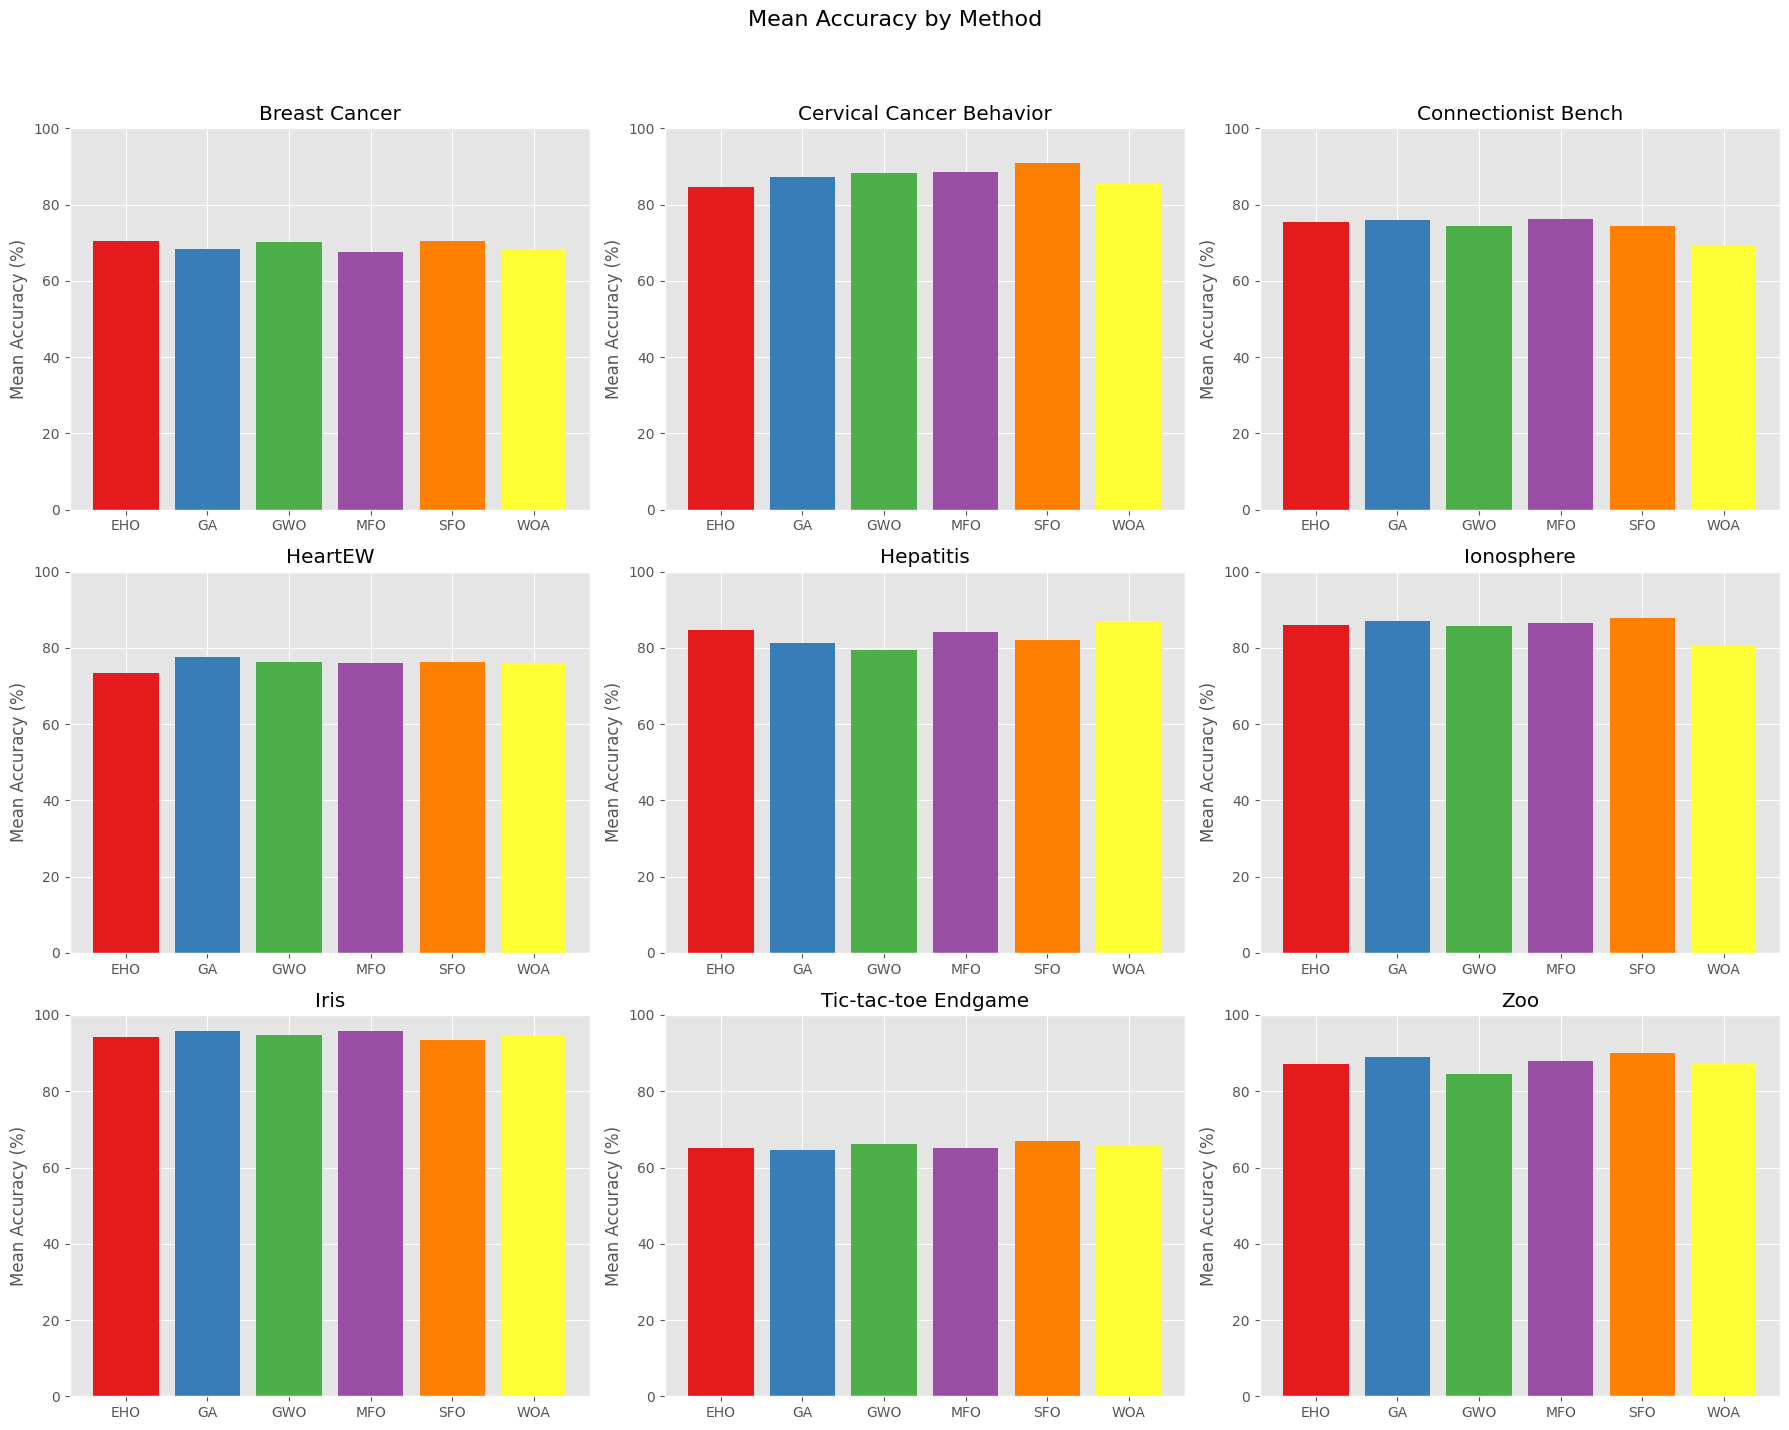

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the 'ggplot' plot style
plt.style.use('ggplot')

datasets = [
    {"name": "Breast Cancer", "csvfile": "Breast_cancer_results.csv"},
    {"name": "Cervical Cancer Behavior", "csvfile": "Cervical_cancer_behavior_risk_results.csv"},
    {"name": "Connectionist Bench", "csvfile": "Connectionist_bench_results.csv"},
    {"name": "HeartEW", "csvfile": "HeartEW_results.csv"},
    {"name": "Hepatitis", "csvfile": "Hepatitis_results.csv"},
    {"name": "Ionosphere", "csvfile": "Ionosphere_results.csv"},
    {"name": "Iris", "csvfile": "Iris_results.csv"},
    {"name": "Tic-tac-toe Endgame", "csvfile": "Tic-tac-toe_endgame_results.csv"},
    {"name": "Zoo", "csvfile": "Zoo_results.csv"},
]

# Collect all unique methods from all datasets
all_methods = set()
for dataset in datasets:
    df = pd.read_csv(f"./results/{dataset['csvfile']}")
    all_methods.update(df['Method'].unique())

# Generate a consistent color map for all methods using Set1 colormap
color_map = {method: color for method, color in zip(sorted(all_methods), plt.get_cmap('Set1').colors)}

# Create a figure with 9 subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Mean Accuracy by Method', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each dataset and plot the results
for i, dataset in enumerate(datasets):
    df = pd.read_csv(f"./results/{dataset['csvfile']}")
    
    # Calculate the mean of 'Accuracy' and convert to percentage
    grouped_df = df.groupby('Method').agg({
        'Accuracy': lambda x: x.mean() * 100
    }).reset_index()
    
    ax = axes[i]

    # Plot Accuracy with unique colors for each method
    bars = ax.bar(grouped_df['Method'], grouped_df['Accuracy'], color=[color_map[method] for method in grouped_df['Method']])
    ax.set_ylabel('Mean Accuracy (%)')
    ax.set_title(dataset["name"])
    ax.set_ylim(0, 100)  # Set y-axis to 0-100%

  
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as a PNG file
plt.savefig('mean_accuracy_by_method.png')

# Show the plot
plt.show()


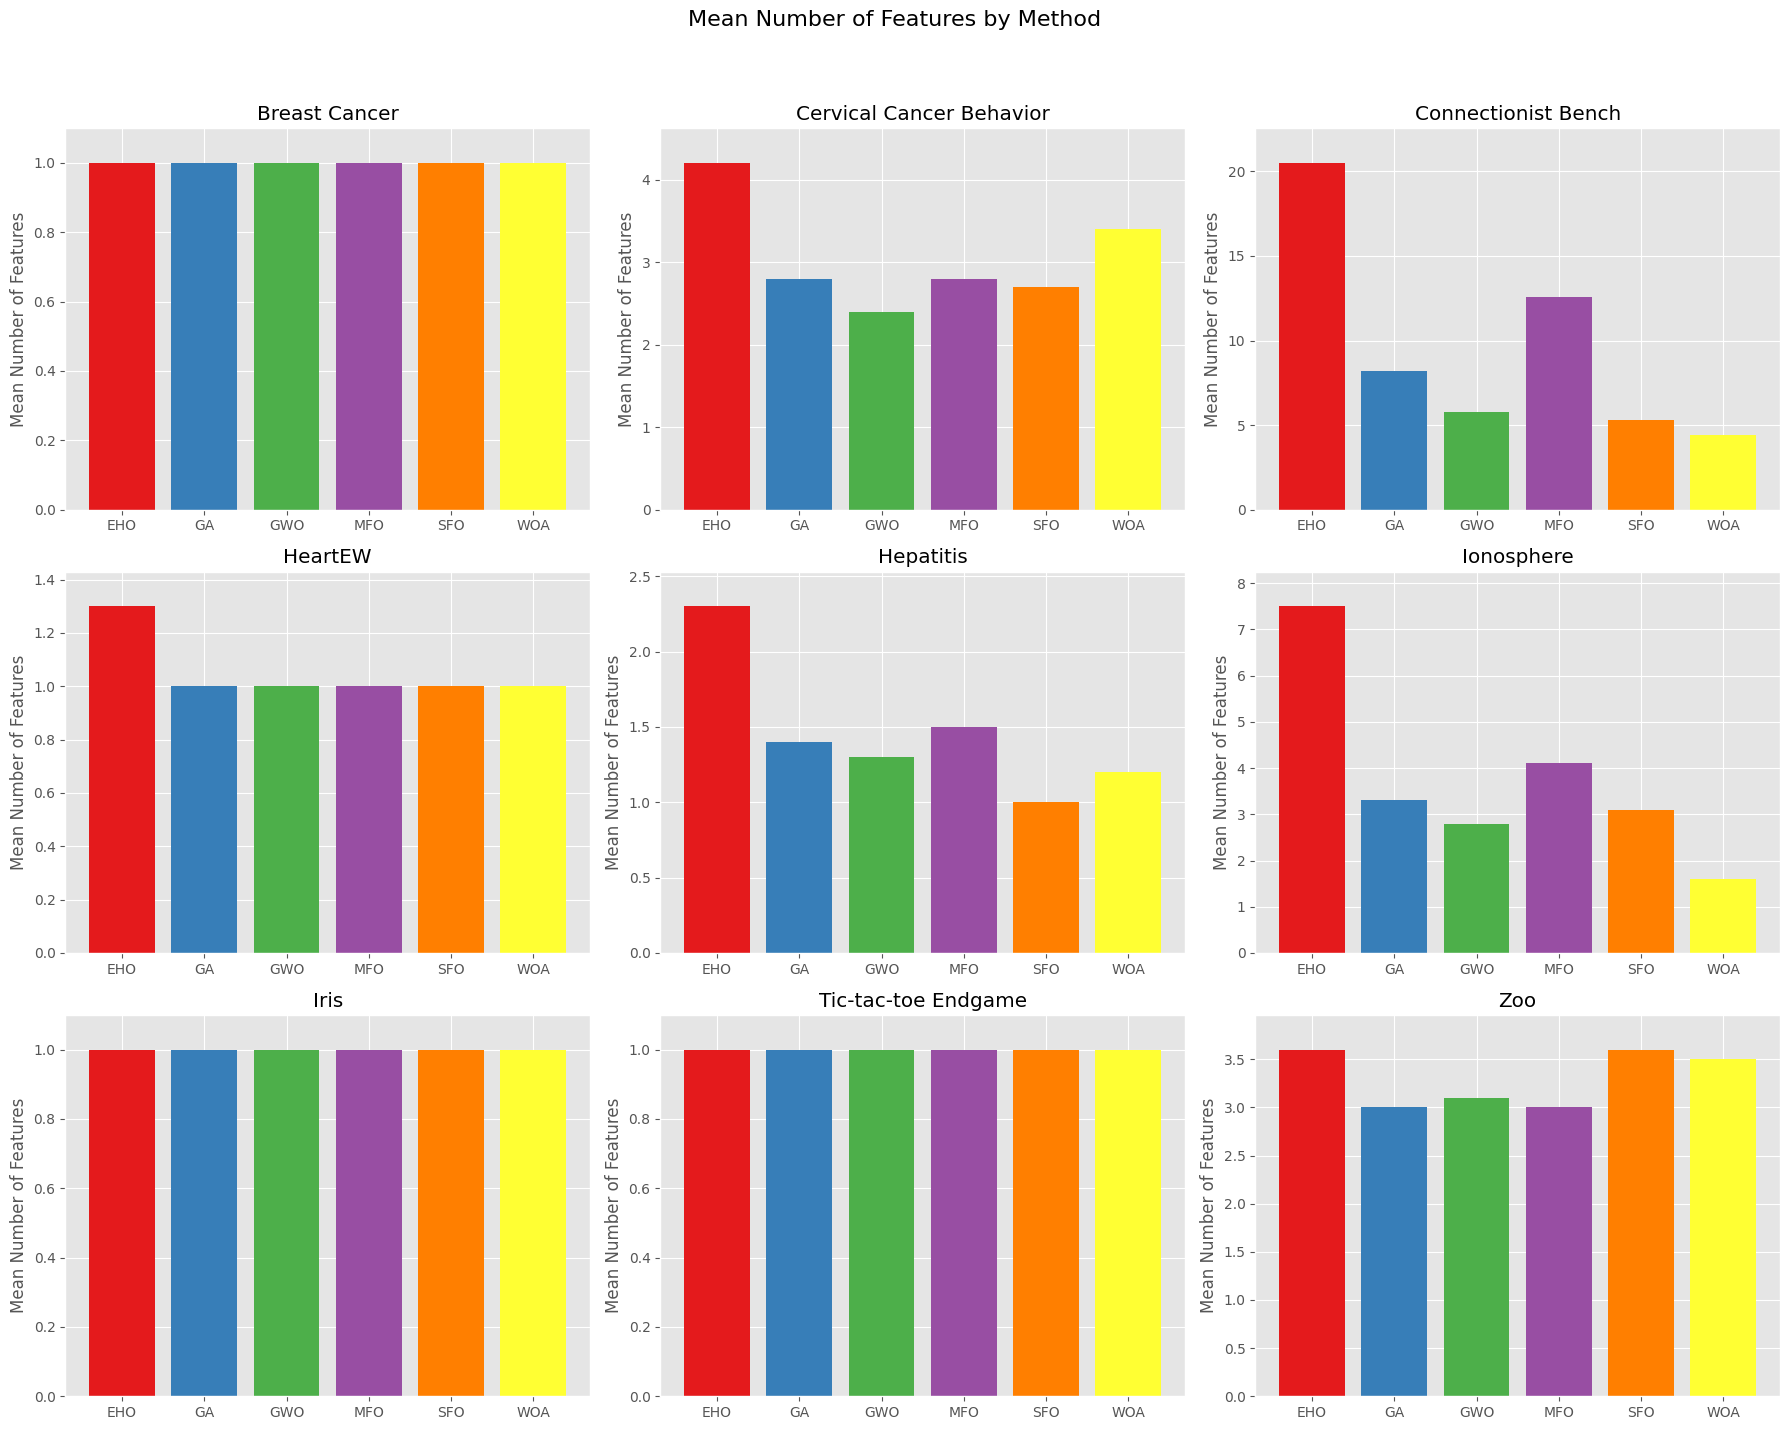

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the 'ggplot' plot style
plt.style.use('ggplot')

datasets = [
    {"name": "Breast Cancer", "csvfile": "Breast_cancer_results.csv"},
    {"name": "Cervical Cancer Behavior", "csvfile": "Cervical_cancer_behavior_risk_results.csv"},
    {"name": "Connectionist Bench", "csvfile": "Connectionist_bench_results.csv"},
    {"name": "HeartEW", "csvfile": "HeartEW_results.csv"},
    {"name": "Hepatitis", "csvfile": "Hepatitis_results.csv"},
    {"name": "Ionosphere", "csvfile": "Ionosphere_results.csv"},
    {"name": "Iris", "csvfile": "Iris_results.csv"},
    {"name": "Tic-tac-toe Endgame", "csvfile": "Tic-tac-toe_endgame_results.csv"},
    {"name": "Zoo", "csvfile": "Zoo_results.csv"},
]

# Collect all unique methods from all datasets
all_methods = set()
for dataset in datasets:
    df = pd.read_csv(f"./results/{dataset['csvfile']}")
    all_methods.update(df['Method'].unique())

# Generate a consistent color map for all methods using Set1 colormap
color_map = {method: color for method, color in zip(sorted(all_methods), plt.get_cmap('Set1').colors)}

# Create a figure with 9 subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
fig.suptitle('Mean Number of Features by Method', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each dataset and plot the results
for i, dataset in enumerate(datasets):
    df = pd.read_csv(f"./results/{dataset['csvfile']}")
    
    # Calculate the mean of 'Number of Features'
    grouped_df = df.groupby('Method').agg({
        'NumberOfFeatures': 'mean'
    }).reset_index()
    
    ax = axes[i]

    # Plot Number of Features with unique colors for each method
    bars = ax.bar(grouped_df['Method'], grouped_df['NumberOfFeatures'], color=[color_map[method] for method in grouped_df['Method']])
    ax.set_ylabel('Mean Number of Features')
    ax.set_title(dataset["name"])
    ax.set_ylim(0, grouped_df['NumberOfFeatures'].max() * 1.1)  # Set y-axis to 0-maximum number of features


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the plot as a PNG file
plt.savefig('mean_number_of_features_by_method.png')

# Show the plot
plt.show()


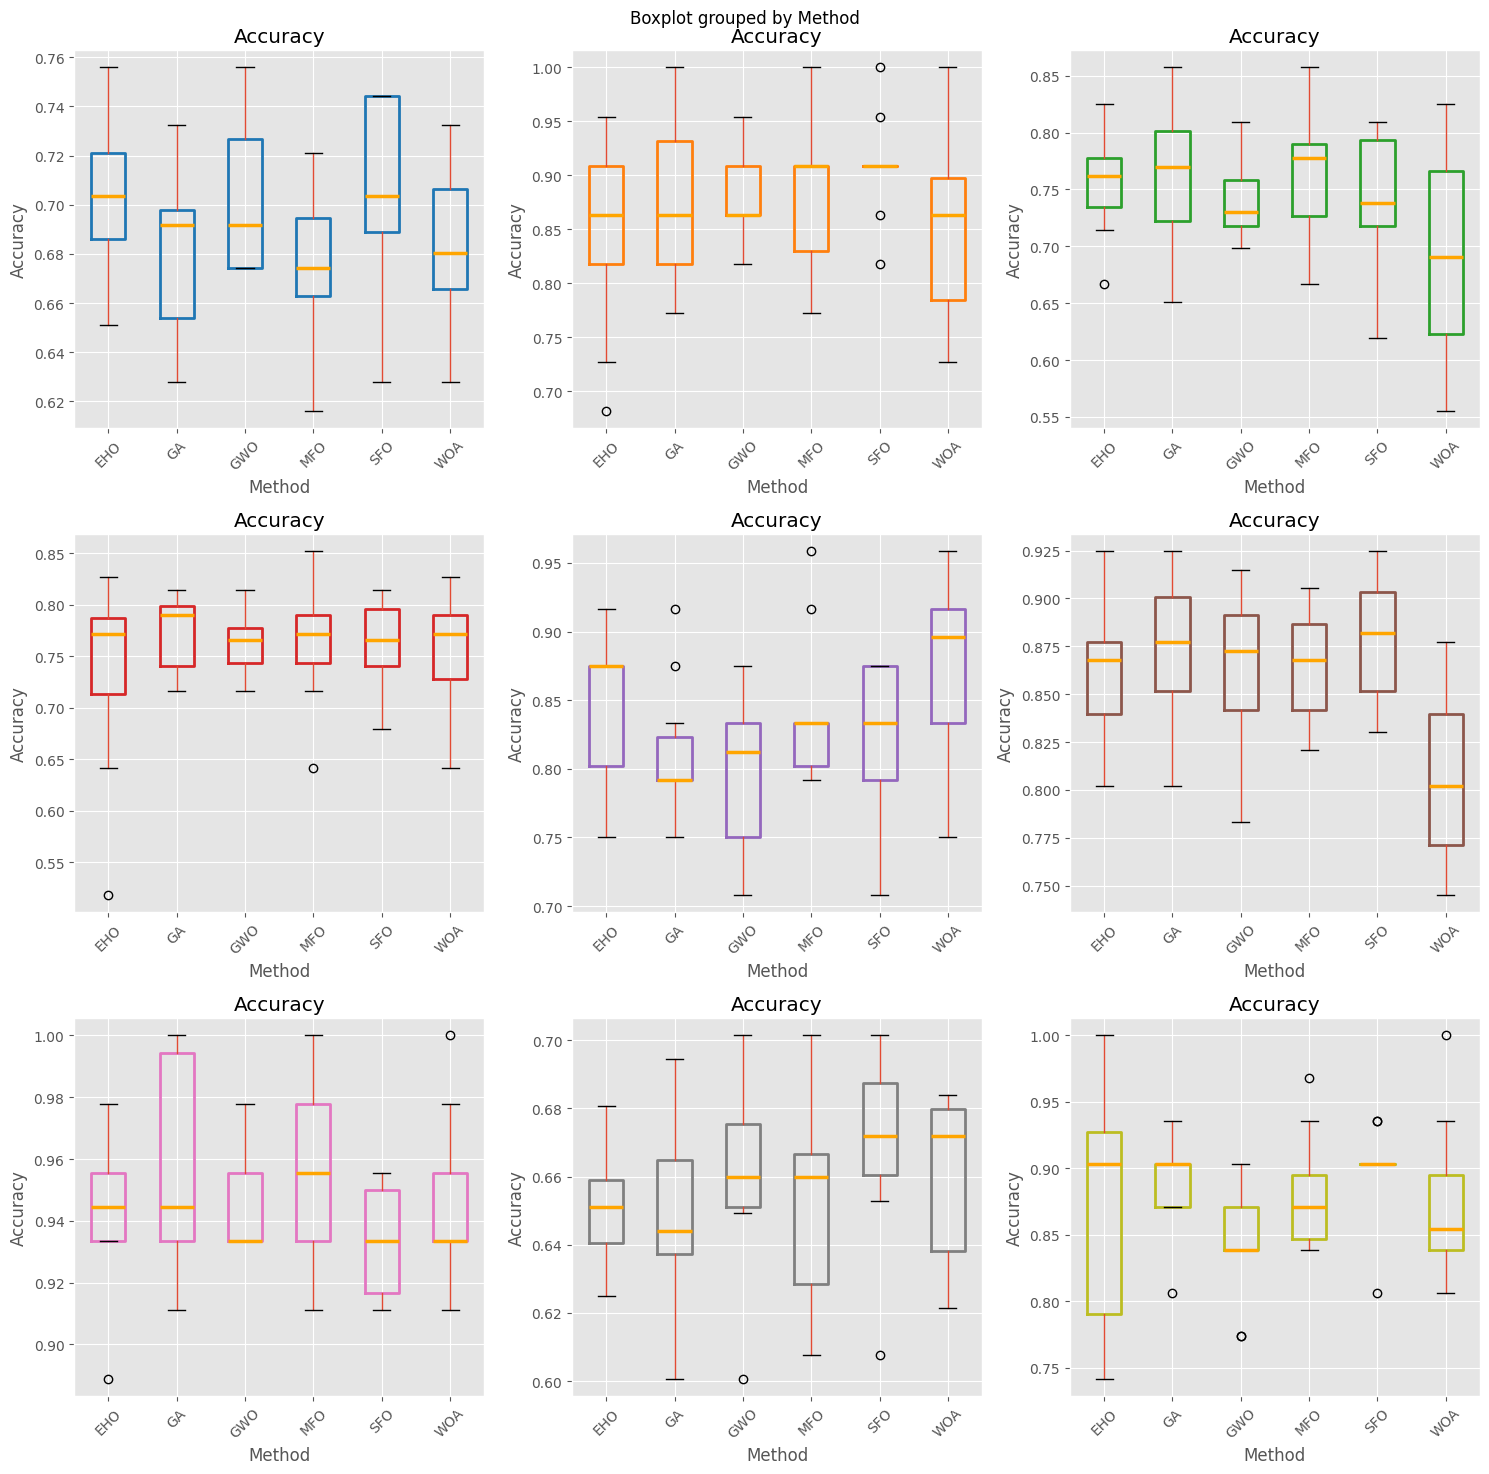

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Use a color palette suitable for publication
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

datasets = [
    {"name": "Breast Cancer", "csvfile": "Breast_cancer_results.csv"},
    {"name": "Cervical Cancer Behavior", "csvfile": "Cervical_cancer_behavior_risk_results.csv"},
    {"name": "Connectionist Bench", "csvfile": "Connectionist_bench_results.csv"},
    {"name": "HeartEW", "csvfile": "HeartEW_results.csv"},
    {"name": "Hepatitis", "csvfile": "Hepatitis_results.csv"},
    {"name": "Ionosphere", "csvfile": "Ionosphere_results.csv"},
    {"name": "Iris", "csvfile": "Iris_results.csv"},
    {"name": "Tic-tac-toe Endgame", "csvfile": "Tic-tac-toe_endgame_results.csv"},
    {"name": "Zoo", "csvfile": "Zoo_results.csv"},
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

for i, dataset in enumerate(datasets):
    df = pd.read_csv(f"./results/{dataset['csvfile']}")
    ax = axes[i]
    ax.set_title(dataset['name'], fontsize=14, fontweight='bold')  # Setting the title with dataset name
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xlabel('Method', fontsize=12)
    boxprops = dict(linestyle='-', linewidth=2, color=colors[i % len(colors)])
    medianprops = dict(linestyle='-', linewidth=2.5, color='orange')
    df.boxplot(column='Accuracy', by='Method', ax=ax, boxprops=boxprops, medianprops=medianprops)
    ax.tick_params(axis='x', rotation=45)

for j in range(len(datasets), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('mean_number_of_features_by_method.png')

plt.show()


## create tables

In [35]:
import pandas as pd

datasets = [
    {"name": "Breast Cancer", "csvfile": "Breast_cancer_results.csv"},
    {"name": "Cervical Cancer Behavior", "csvfile": "Cervical_cancer_behavior_risk_results.csv"},
    {"name": "Connectionist Bench", "csvfile": "Connectionist_bench_results.csv"},
    {"name": "HeartEW", "csvfile": "HeartEW_results.csv"},
    {"name": "Hepatitis", "csvfile": "Hepatitis_results.csv"},
    {"name": "Ionosphere", "csvfile": "Ionosphere_results.csv"},
    {"name": "Iris", "csvfile": "Iris_results.csv"},
    {"name": "Tic-tac-toe Endgame", "csvfile": "Tic-tac-toe_endgame_results.csv"},
    {"name": "Zoo", "csvfile": "Zoo_results.csv"},
]

# Initialize an empty dictionary to store results for each dataset
dataset_results = {}

# Iterate over datasets
for dataset in datasets:
    df = pd.read_csv(f"./results/{dataset['csvfile']}")
    
    # Initialize dictionaries to store accuracies for each method
    method_avg_accuracies = {}
    method_best_accuracies = {}

    # Iterate over each method
    for method in df['Method'].unique():
        method_df = df[df['Method'] == method]
        accuracies = method_df['Accuracy']
        
        # Calculate average accuracy
        avg_accuracy = accuracies.mean()
        method_avg_accuracies[method] = avg_accuracy
        
        # Calculate best accuracy
        best_accuracy = accuracies.max()
        method_best_accuracies[method] = best_accuracy

    # Create DataFrames for average and best accuracies
    avg_accuracy_df = pd.DataFrame.from_dict(method_avg_accuracies, orient='index', columns=['Average Accuracy'])
    best_accuracy_df = pd.DataFrame.from_dict(method_best_accuracies, orient='index', columns=['Best Accuracy'])
    
    # Merge DataFrames
    result_df = pd.concat([avg_accuracy_df, best_accuracy_df], axis=1)
    
    # Store results for this dataset
    dataset_results[dataset['name']] = result_df

# Print results for each dataset
for dataset_name, df in dataset_results.items():
    print(f"\nResults for {dataset_name}:")
    print(df)


Results for Breast Cancer:
     Average Accuracy  Best Accuracy
SFO          0.704651       0.744186
GA           0.682558       0.732558
EHO          0.704651       0.755814
GWO          0.701163       0.755814
WOA          0.683721       0.732558
MFO          0.676744       0.720930

Results for Cervical Cancer Behavior:
     Average Accuracy  Best Accuracy
SFO          0.909091       1.000000
GA           0.872727       1.000000
EHO          0.845455       0.954545
GWO          0.881818       0.954545
WOA          0.854545       1.000000
MFO          0.886364       1.000000

Results for Connectionist Bench:
     Average Accuracy  Best Accuracy
SFO          0.742857       0.809524
GA           0.758730       0.857143
EHO          0.755556       0.825397
GWO          0.742857       0.809524
WOA          0.692063       0.825397
MFO          0.761905       0.857143

Results for HeartEW:
     Average Accuracy  Best Accuracy
SFO          0.762963       0.814815
GA           0.775309     